In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import datetime 
import json

In [2]:
file = 'Resources/kc_house_data.csv'
df=pd.read_csv(file)
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [49]:
df["date"] = pd.to_datetime(df["date"]).dt.strftime('%Y-%m-%d')
df.sort_values('date')



id        date      price  bedrooms  bathrooms  sqft_living  \
16768  5561000190  2014-05-02   437500.0         3       2.25         1970   
9596    472000620  2014-05-02   790000.0         3       2.50         2600   
9587   1024069009  2014-05-02   675000.0         5       2.50         2820   
20602  7853361370  2014-05-02   555000.0         4       2.50         3310   
11577  5056500260  2014-05-02   440000.0         4       2.25         2160   
...           ...         ...        ...       ...        ...          ...   
7898   1422700040  2015-05-14   183000.0         3       1.00         1170   
928    8730000270  2015-05-14   359000.0         2       2.75         1370   
5637   7923600250  2015-05-15   450000.0         5       2.00         1870   
13053  5101400871  2015-05-24   445500.0         2       1.75         1390   
16594  9106000005  2015-05-27  1310000.0         4       2.25         3750   

       sqft_lot  floors  waterfront  view  ...  sqft_basement  yr_built  \
16768     35100     2.0           0     0  ...              0      1977   
9596       4750     1.0           0     0  ...            900      1951   
9587      67518     2.0           0     0  ...              0      1979   
20602      6500     2.0           0     0  ...              0      2012   
11577      8119     1.0           0     0  ...           1080      1966   
...         ...     ...         ...   ...  ...            ...       ...   
7898       7320     1.0           0     0  ...              0      1962   
928        1140     2.0           0     0  ...            290      2009   
5637       7344     1.5           0     0  ...              0      1960   
13053      6670     1.0           0     0  ...            670      1941   
16594      5000     2.0           0     0  ...           1310      1924   

       yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  \
16768             0    98027  47.4635 -121.991           2340       35100   
9596              0    98117  47.6833 -122.400           2380        4750   
9587              0    98029  47.5794 -122.025           2820       48351   
20602             0    98065  47.5150 -121.870           2380        5000   
11577             0    98006  47.5443 -122.177           1850        9000   
...             ...      ...      ...      ...            ...         ...   
7898              0    98188  47.4685 -122.282           2040        7320   
928               0    98133  47.7052 -122.343           1370        1090   
5637              0    98007  47.5951 -122.144           1870        7650   
13053             0    98115  47.6914 -122.308            920        6380   
16594             0    98115  47.6747 -122.303           2170        4590   

       date(Y/M)  date(Y)  
16768    2014-05     2014  
9596     2014-05     2014  
9587     2014-05     2014  
20602    2014-05     2014  
11577    2014-05     2014  
...          ...      ...  
7898     2015-05     2015  
928      2015-05     2015  
5637     2015-05     2015  
13053    2015-05     2015  
16594    2015-05     2015  

[21613 rows x 23 columns]

id        date      price  bedrooms  bathrooms  sqft_living  \
16768  5561000190  2014-05-02   437500.0         3       2.25         1970   
9596    472000620  2014-05-02   790000.0         3       2.50         2600   
9587   1024069009  2014-05-02   675000.0         5       2.50         2820   
20602  7853361370  2014-05-02   555000.0         4       2.50         3310   
11577  5056500260  2014-05-02   440000.0         4       2.25         2160   
...           ...         ...        ...       ...        ...          ...   
7898   1422700040  2015-05-14   183000.0         3       1.00         1170   
928    8730000270  2015-05-14   359000.0         2       2.75         1370   
5637   7923600250  2015-05-15   450000.0         5       2.00         1870   
13053  5101400871  2015-05-24   445500.0         2       1.75         1390   
16594  9106000005  2015-05-27  1310000.0         4       2.25         3750   

       sqft_lot  floors  waterfront  view  ...  sqft_basement  yr_built  \
16768     35100     2.0           0     0  ...              0      1977   
9596       4750     1.0           0     0  ...            900      1951   
9587      67518     2.0           0     0  ...              0      1979   
20602      6500     2.0           0     0  ...              0      2012   
11577      8119     1.0           0     0  ...           1080      1966   
...         ...     ...         ...   ...  ...            ...       ...   
7898       7320     1.0           0     0  ...              0      1962   
928        1140     2.0           0     0  ...            290      2009   
5637       7344     1.5           0     0  ...              0      1960   
13053      6670     1.0           0     0  ...            670      1941   
16594      5000     2.0           0     0  ...           1310      1924   

       yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  \
16768             0    98027  47.4635 -121.991           2340       35100   
9596              0    98117  47.6833 -122.400           2380        4750   
9587              0    98029  47.5794 -122.025           2820       48351   
20602             0    98065  47.5150 -121.870           2380        5000   
11577             0    98006  47.5443 -122.177           1850        9000   
...             ...      ...      ...      ...            ...         ...   
7898              0    98188  47.4685 -122.282           2040        7320   
928               0    98133  47.7052 -122.343           1370        1090   
5637              0    98007  47.5951 -122.144           1870        7650   
13053             0    98115  47.6914 -122.308            920        6380   
16594             0    98115  47.6747 -122.303           2170        4590   

       date(Y/M)  date(Y)  
16768    2014-05     2014  
9596     2014-05     2014  
9587     2014-05     2014  
20602    2014-05     2014  
11577    2014-05     2014  
...          ...      ...  
7898     2015-05     2015  
928      2015-05     2015  
5637     2015-05     2015  
13053    2015-05     2015  
16594    2015-05     2015  

[21613 rows x 23 columns]

In [50]:
dateym=[]
num = 0
for index, row in df.iterrows():
    print("working on "+ str(num))
    mdate = df['date'][num][0:7]
    dateym.append(mdate)
    num = num + 1

working on 0
working on 1
working on 2
working on 3
working on 4
working on 5
working on 6
working on 7
working on 8
working on 9
working on 10
working on 11
working on 12
working on 13
working on 14
working on 15
working on 16
working on 17
working on 18
working on 19
working on 20
working on 21
working on 22
working on 23
working on 24
working on 25
working on 26
working on 27
working on 28
working on 29
working on 30
working on 31
working on 32
working on 33
working on 34
working on 35
working on 36
working on 37
working on 38
working on 39
working on 40
working on 41
working on 42
working on 43
working on 44
working on 45
working on 46
working on 47
working on 48
working on 49
working on 50
working on 51
working on 52
working on 53
working on 54
working on 55
working on 56
working on 57
working on 58
working on 59
working on 60
working on 61
working on 62
working on 63
working on 64
working on 65
working on 66
working on 67
working on 68
working on 69
working on 70
working on 71
wo

working on 601working on 228
working on 229
working on 230
working on 231
working on 232
working on 233
working on 234
working on 235
working on 236
working on 237
working on 238
working on 239
working on 240
working on 241
working on 242
working on 243
working on 244
working on 245
working on 246
working on 247
working on 248
working on 249
working on 250
working on 251
working on 252
working on 253
working on 254
working on 255
working on 256
working on 257
working on 258
working on 259
working on 260
working on 261
working on 262
working on 263
working on 264
working on 265
working on 266
working on 267
working on 268
working on 269
working on 270
working on 271
working on 272
working on 273
working on 274
working on 275
working on 276
working on 277
working on 278
working on 279
working on 280
working on 281
working on 282
working on 283
working on 284
working on 285
working on 286
working on 287
working on 288
working on 289
working on 290
working on 291
working on 292
working on 

working on 1021
working on 602
working on 603
working on 604
working on 605
working on 606
working on 607
working on 608
working on 609
working on 610
working on 611
working on 612
working on 613
working on 614
working on 615
working on 616
working on 617
working on 618
working on 619
working on 620
working on 621
working on 622
working on 623
working on 624
working on 625
working on 626
working on 627
working on 628
working on 629
working on 630
working on 631
working on 632
working on 633
working on 634
working on 635
working on 636
working on 637
working on 638
working on 639
working on 640
working on 641
working on 642
working on 643
working on 644
working on 645
working on 646
working on 647
working on 648
working on 649
working on 650
working on 651
working on 652
working on 653
working on 654
working on 655
working on 656
working on 657
working on 658
working on 659
working on 660
working on 661
working on 662
working on 663
working on 664
working on 665
working on 666
working o


working on 1022
working on 1023
working on 1024
working on 1025
working on 1026
working on 1027
working on 1028
working on 1029
working on 1030
working on 1031
working on 1032
working on 1033
working on 1034
working on 1035
working on 1036
working on 1037
working on 1038
working on 1039
working on 1040
working on 1041
working on 1042
working on 1043
working on 1044
working on 1045
working on 1046
working on 1047
working on 1048
working on 1049
working on 1050
working on 1051
working on 1052
working on 1053
working on 1054
working on 1055
working on 1056
working on 1057
working on 1058
working on 1059
working on 1060
working on 1061
working on 1062
working on 1063
working on 1064
working on 1065
working on 1066
working on 1067
working on 1068
working on 1069
working on 1070
working on 1071
working on 1072
working on 1073
working on 1074
working on 1075
working on 1076
working on 1077
working on 1078
working on 1079
working on 1080
working on 1081
working on 1082
working on 1083
working

working on 1587working on 1268
working on 1269
working on 1270
working on 1271
working on 1272
working on 1273
working on 1274
working on 1275
working on 1276
working on 1277
working on 1278
working on 1279
working on 1280
working on 1281
working on 1282
working on 1283
working on 1284
working on 1285
working on 1286
working on 1287
working on 1288
working on 1289
working on 1290
working on 1291
working on 1292
working on 1293
working on 1294
working on 1295
working on 1296
working on 1297
working on 1298
working on 1299
working on 1300
working on 1301
working on 1302
working on 1303
working on 1304
working on 1305
working on 1306
working on 1307
working on 1308
working on 1309
working on 1310
working on 1311
working on 1312
working on 1313
working on 1314
working on 1315
working on 1316
working on 1317
working on 1318
working on 1319
working on 1320
working on 1321
working on 1322
working on 1323
working on 1324
working on 1325
working on 1326
working on 1327
working on 1328
working o

working on 1811
working on 1588
working on 1589
working on 1590
working on 1591
working on 1592
working on 1593
working on 1594
working on 1595
working on 1596
working on 1597
working on 1598
working on 1599
working on 1600
working on 1601
working on 1602
working on 1603
working on 1604
working on 1605
working on 1606
working on 1607
working on 1608
working on 1609
working on 1610
working on 1611
working on 1612
working on 1613
working on 1614
working on 1615
working on 1616
working on 1617
working on 1618
working on 1619
working on 1620
working on 1621
working on 1622
working on 1623
working on 1624
working on 1625
working on 1626
working on 1627
working on 1628
working on 1629
working on 1630
working on 1631
working on 1632
working on 1633
working on 1634
working on 1635
working on 1636
working on 1637
working on 1638
working on 1639
working on 1640
working on 1641
working on 1642
working on 1643
working on 1644
working on 1645
working on 1646
working on 1647
working on 1648
working 


working on 1812
working on 1813
working on 1814
working on 1815
working on 1816
working on 1817
working on 1818
working on 1819
working on 1820
working on 1821
working on 1822
working on 1823
working on 1824
working on 1825
working on 1826
working on 1827
working on 1828
working on 1829
working on 1830
working on 1831
working on 1832
working on 1833
working on 1834
working on 1835
working on 1836
working on 1837
working on 1838
working on 1839
working on 1840
working on 1841
working on 1842
working on 1843
working on 1844
working on 1845
working on 1846
working on 1847
working on 1848
working on 1849
working on 1850
working on 1851
working on 1852
working on 1853
working on 1854
working on 1855
working on 1856
working on 1857
working on 1858
working on 1859
working on 1860
working on 1861
working on 1862
working on 1863
working on 1864
working on 1865
working on 1866
working on 1867
working on 1868
working on 1869
working on 1870
working on 1871
working on 1872
working on 1873
working

working on 2598working on 2201
working on 2202
working on 2203
working on 2204
working on 2205
working on 2206
working on 2207
working on 2208
working on 2209
working on 2210
working on 2211
working on 2212
working on 2213
working on 2214
working on 2215
working on 2216
working on 2217
working on 2218
working on 2219
working on 2220
working on 2221
working on 2222
working on 2223
working on 2224
working on 2225
working on 2226
working on 2227
working on 2228
working on 2229
working on 2230
working on 2231
working on 2232
working on 2233
working on 2234
working on 2235
working on 2236
working on 2237
working on 2238
working on 2239
working on 2240
working on 2241
working on 2242
working on 2243
working on 2244
working on 2245
working on 2246
working on 2247
working on 2248
working on 2249
working on 2250
working on 2251
working on 2252
working on 2253
working on 2254
working on 2255
working on 2256
working on 2257
working on 2258
working on 2259
working on 2260
working on 2261
working o

working on 2873
working on 2599
working on 2600
working on 2601
working on 2602
working on 2603
working on 2604
working on 2605
working on 2606
working on 2607
working on 2608
working on 2609
working on 2610
working on 2611
working on 2612
working on 2613
working on 2614
working on 2615
working on 2616
working on 2617
working on 2618
working on 2619
working on 2620
working on 2621
working on 2622
working on 2623
working on 2624
working on 2625
working on 2626
working on 2627
working on 2628
working on 2629
working on 2630
working on 2631
working on 2632
working on 2633
working on 2634
working on 2635
working on 2636
working on 2637
working on 2638
working on 2639
working on 2640
working on 2641
working on 2642
working on 2643
working on 2644
working on 2645
working on 2646
working on 2647
working on 2648
working on 2649
working on 2650
working on 2651
working on 2652
working on 2653
working on 2654
working on 2655
working on 2656
working on 2657
working on 2658
working on 2659
working 


working on 2874
working on 2875
working on 2876
working on 2877
working on 2878
working on 2879
working on 2880
working on 2881
working on 2882
working on 2883
working on 2884
working on 2885
working on 2886
working on 2887
working on 2888
working on 2889
working on 2890
working on 2891
working on 2892
working on 2893
working on 2894
working on 2895
working on 2896
working on 2897
working on 2898
working on 2899
working on 2900
working on 2901
working on 2902
working on 2903
working on 2904
working on 2905
working on 2906
working on 2907
working on 2908
working on 2909
working on 2910
working on 2911
working on 2912
working on 2913
working on 2914
working on 2915
working on 2916
working on 2917
working on 2918
working on 2919
working on 2920
working on 2921
working on 2922
working on 2923
working on 2924
working on 2925
working on 2926
working on 2927
working on 2928
working on 2929
working on 2930
working on 2931
working on 2932
working on 2933
working on 2934
working on 2935
working

working on 3650working on 3272
working on 3273
working on 3274
working on 3275
working on 3276
working on 3277
working on 3278
working on 3279
working on 3280
working on 3281
working on 3282
working on 3283
working on 3284
working on 3285
working on 3286
working on 3287
working on 3288
working on 3289
working on 3290
working on 3291
working on 3292
working on 3293
working on 3294
working on 3295
working on 3296
working on 3297
working on 3298
working on 3299
working on 3300
working on 3301
working on 3302
working on 3303
working on 3304
working on 3305
working on 3306
working on 3307
working on 3308
working on 3309
working on 3310
working on 3311
working on 3312
working on 3313
working on 3314
working on 3315
working on 3316
working on 3317
working on 3318
working on 3319
working on 3320
working on 3321
working on 3322
working on 3323
working on 3324
working on 3325
working on 3326
working on 3327
working on 3328
working on 3329
working on 3330
working on 3331
working on 3332
working o


working on 3651
working on 3652
working on 3653
working on 3654
working on 3655
working on 3656
working on 3657
working on 3658
working on 3659
working on 3660
working on 3661
working on 3662
working on 3663
working on 3664
working on 3665
working on 3666
working on 3667
working on 3668
working on 3669
working on 3670
working on 3671
working on 3672
working on 3673
working on 3674
working on 3675
working on 3676
working on 3677
working on 3678
working on 3679
working on 3680
working on 3681
working on 3682
working on 3683
working on 3684
working on 3685
working on 3686
working on 3687
working on 3688
working on 3689
working on 3690
working on 3691
working on 3692
working on 3693
working on 3694
working on 3695
working on 3696
working on 3697
working on 3698
working on 3699
working on 3700
working on 3701
working on 3702
working on 3703
working on 3704
working on 3705
working on 3706
working on 3707
working on 3708
working on 3709
working on 3710
working on 3711
working on 3712
working

working on 4071
working on 4072
working on 4073
working on 4074
working on 4075
working on 4076
working on 4077
working on 4078
working on 4079
working on 4080
working on 4081
working on 4082
working on 4083
working on 4084
working on 4085
working on 4086
working on 4087
working on 4088
working on 4089
working on 4090
working on 4091
working on 4092
working on 4093
working on 4094
working on 4095
working on 4096
working on 4097
working on 4098
working on 4099
working on 4100
working on 4101
working on 4102
working on 4103
working on 4104
working on 4105
working on 4106
working on 4107
working on 4108
working on 4109
working on 4110
working on 4111
working on 4112
working on 4113
working on 4114
working on 4115
working on 4116
working on 4117
working on 4118
working on 4119
working on 4120
working on 4121
working on 4122
working on 4123
working on 4124
working on 4125
working on 4126
working on 4127
working on 4128
working on 4129
working on 4130
working on 4131
working on 4132
working 

working on 4549
working on 4550
working on 4551
working on 4552
working on 4553
working on 4554
working on 4555
working on 4556
working on 4557
working on 4558
working on 4559
working on 4560
working on 4561
working on 4562
working on 4563
working on 4564
working on 4565
working on 4566
working on 4567
working on 4568
working on 4569
working on 4570
working on 4571
working on 4572
working on 4573
working on 4574
working on 4575
working on 4576
working on 4577
working on 4578
working on 4579
working on 4580
working on 4581
working on 4582
working on 4583
working on 4584
working on 4585
working on 4586
working on 4587
working on 4588
working on 4589
working on 4590
working on 4591
working on 4592
working on 4593
working on 4594
working on 4595
working on 4596
working on 4597
working on 4598
working on 4599
working on 4600
working on 4601
working on 4602
working on 4603
working on 4604
working on 4605
working on 4606
working on 4607
working on 4608
working on 4609
working on 4610
working 

working on 4770
working on 4771
working on 4772
working on 4773
working on 4774
working on 4775
working on 4776
working on 4777
working on 4778
working on 4779
working on 4780
working on 4781
working on 4782
working on 4783
working on 4784
working on 4785
working on 4786
working on 4787
working on 4788
working on 4789
working on 4790
working on 4791
working on 4792
working on 4793
working on 4794
working on 4795
working on 4796
working on 4797
working on 4798
working on 4799
working on 4800
working on 4801
working on 4802
working on 4803
working on 4804
working on 4805
working on 4806
working on 4807
working on 4808
working on 4809
working on 4810
working on 4811
working on 4812
working on 4813
working on 4814
working on 4815
working on 4816
working on 4817
working on 4818
working on 4819
working on 4820
working on 4821
working on 4822
working on 4823
working on 4824
working on 4825
working on 4826
working on 4827
working on 4828
working on 4829
working on 4830
working on 4831
working 

working on 5147
working on 5148
working on 5149
working on 5150
working on 5151
working on 5152
working on 5153
working on 5154
working on 5155
working on 5156
working on 5157
working on 5158
working on 5159
working on 5160
working on 5161
working on 5162
working on 5163
working on 5164
working on 5165
working on 5166
working on 5167
working on 5168
working on 5169
working on 5170
working on 5171
working on 5172
working on 5173
working on 5174
working on 5175
working on 5176
working on 5177
working on 5178
working on 5179
working on 5180
working on 5181
working on 5182
working on 5183
working on 5184
working on 5185
working on 5186
working on 5187
working on 5188
working on 5189
working on 5190
working on 5191
working on 5192
working on 5193
working on 5194
working on 5195
working on 5196
working on 5197
working on 5198
working on 5199
working on 5200
working on 5201
working on 5202
working on 5203
working on 5204
working on 5205
working on 5206
working on 5207
working on 5208
working 

working on 5799working on 5373
working on 5374
working on 5375
working on 5376
working on 5377
working on 5378
working on 5379
working on 5380
working on 5381
working on 5382
working on 5383
working on 5384
working on 5385
working on 5386
working on 5387
working on 5388
working on 5389
working on 5390
working on 5391
working on 5392
working on 5393
working on 5394
working on 5395
working on 5396
working on 5397
working on 5398
working on 5399
working on 5400
working on 5401
working on 5402
working on 5403
working on 5404
working on 5405
working on 5406
working on 5407
working on 5408
working on 5409
working on 5410
working on 5411
working on 5412
working on 5413
working on 5414
working on 5415
working on 5416
working on 5417
working on 5418
working on 5419
working on 5420
working on 5421
working on 5422
working on 5423
working on 5424
working on 5425
working on 5426
working on 5427
working on 5428
working on 5429
working on 5430
working on 5431
working on 5432
working on 5433
working o


working on 5800
working on 5801
working on 5802
working on 5803
working on 5804
working on 5805
working on 5806
working on 5807
working on 5808
working on 5809
working on 5810
working on 5811
working on 5812
working on 5813
working on 5814
working on 5815
working on 5816
working on 5817
working on 5818
working on 5819
working on 5820
working on 5821
working on 5822
working on 5823
working on 5824
working on 5825
working on 5826
working on 5827
working on 5828
working on 5829
working on 5830
working on 5831
working on 5832
working on 5833
working on 5834
working on 5835
working on 5836
working on 5837
working on 5838
working on 5839
working on 5840
working on 5841
working on 5842
working on 5843
working on 5844
working on 5845
working on 5846
working on 5847
working on 5848
working on 5849
working on 5850
working on 5851
working on 5852
working on 5853
working on 5854
working on 5855
working on 5856
working on 5857
working on 5858
working on 5859
working on 5860
working on 5861
working

working on 6051
working on 6052
working on 6053
working on 6054
working on 6055
working on 6056
working on 6057
working on 6058
working on 6059
working on 6060
working on 6061
working on 6062
working on 6063
working on 6064
working on 6065
working on 6066
working on 6067
working on 6068
working on 6069
working on 6070
working on 6071
working on 6072
working on 6073
working on 6074
working on 6075
working on 6076
working on 6077
working on 6078
working on 6079
working on 6080
working on 6081
working on 6082
working on 6083
working on 6084
working on 6085
working on 6086
working on 6087
working on 6088
working on 6089
working on 6090
working on 6091
working on 6092
working on 6093
working on 6094
working on 6095
working on 6096
working on 6097
working on 6098
working on 6099
working on 6100
working on 6101
working on 6102
working on 6103
working on 6104
working on 6105
working on 6106
working on 6107
working on 6108
working on 6109
working on 6110
working on 6111
working on 6112
working 

working on 6408
working on 6409
working on 6410
working on 6411
working on 6412
working on 6413
working on 6414
working on 6415
working on 6416
working on 6417
working on 6418
working on 6419
working on 6420
working on 6421
working on 6422
working on 6423
working on 6424
working on 6425
working on 6426
working on 6427
working on 6428
working on 6429
working on 6430
working on 6431
working on 6432
working on 6433
working on 6434
working on 6435
working on 6436
working on 6437
working on 6438
working on 6439
working on 6440
working on 6441
working on 6442
working on 6443
working on 6444
working on 6445
working on 6446
working on 6447
working on 6448
working on 6449
working on 6450
working on 6451
working on 6452
working on 6453
working on 6454
working on 6455
working on 6456
working on 6457
working on 6458
working on 6459
working on 6460
working on 6461
working on 6462
working on 6463
working on 6464
working on 6465
working on 6466
working on 6467
working on 6468
working on 6469
working 

working on 6814
working on 6815
working on 6816
working on 6817
working on 6818
working on 6819
working on 6820
working on 6821
working on 6822
working on 6823
working on 6824
working on 6825
working on 6826
working on 6827
working on 6828
working on 6829
working on 6830
working on 6831
working on 6832
working on 6833
working on 6834
working on 6835
working on 6836
working on 6837
working on 6838
working on 6839
working on 6840
working on 6841
working on 6842
working on 6843
working on 6844
working on 6845
working on 6846
working on 6847
working on 6848
working on 6849
working on 6850
working on 6851
working on 6852
working on 6853
working on 6854
working on 6855
working on 6856
working on 6857
working on 6858
working on 6859
working on 6860
working on 6861
working on 6862
working on 6863
working on 6864
working on 6865
working on 6866
working on 6867
working on 6868
working on 6869
working on 6870
working on 6871
working on 6872
working on 6873
working on 6874
working on 6875
working 

working on 7138
working on 7139
working on 7140
working on 7141
working on 7142
working on 7143
working on 7144
working on 7145
working on 7146
working on 7147
working on 7148
working on 7149
working on 7150
working on 7151
working on 7152
working on 7153
working on 7154
working on 7155
working on 7156
working on 7157
working on 7158
working on 7159
working on 7160
working on 7161
working on 7162
working on 7163
working on 7164
working on 7165
working on 7166
working on 7167
working on 7168
working on 7169
working on 7170
working on 7171
working on 7172
working on 7173
working on 7174
working on 7175
working on 7176
working on 7177
working on 7178
working on 7179
working on 7180
working on 7181
working on 7182
working on 7183
working on 7184
working on 7185
working on 7186
working on 7187
working on 7188
working on 7189
working on 7190
working on 7191
working on 7192
working on 7193
working on 7194
working on 7195
working on 7196
working on 7197
working on 7198
working on 7199
working 

working on 7540
working on 7541
working on 7542
working on 7543
working on 7544
working on 7545
working on 7546
working on 7547
working on 7548
working on 7549
working on 7550
working on 7551
working on 7552
working on 7553
working on 7554
working on 7555
working on 7556
working on 7557
working on 7558
working on 7559
working on 7560
working on 7561
working on 7562
working on 7563
working on 7564
working on 7565
working on 7566
working on 7567
working on 7568
working on 7569
working on 7570
working on 7571
working on 7572
working on 7573
working on 7574
working on 7575
working on 7576
working on 7577
working on 7578
working on 7579
working on 7580
working on 7581
working on 7582
working on 7583
working on 7584
working on 7585
working on 7586
working on 7587
working on 7588
working on 7589
working on 7590
working on 7591
working on 7592
working on 7593
working on 7594
working on 7595
working on 7596
working on 7597
working on 7598
working on 7599
working on 7600
working on 7601
working 

working on 7989
working on 7990
working on 7991
working on 7992
working on 7993
working on 7994
working on 7995
working on 7996
working on 7997
working on 7998
working on 7999
working on 8000
working on 8001
working on 8002
working on 8003
working on 8004
working on 8005
working on 8006
working on 8007
working on 8008
working on 8009
working on 8010
working on 8011
working on 8012
working on 8013
working on 8014
working on 8015
working on 8016
working on 8017
working on 8018
working on 8019
working on 8020
working on 8021
working on 8022
working on 8023
working on 8024
working on 8025
working on 8026
working on 8027
working on 8028
working on 8029
working on 8030
working on 8031
working on 8032
working on 8033
working on 8034
working on 8035
working on 8036
working on 8037
working on 8038
working on 8039
working on 8040
working on 8041
working on 8042
working on 8043
working on 8044
working on 8045
working on 8046
working on 8047
working on 8048
working on 8049
working on 8050
working 

working on 8348
working on 8349
working on 8350
working on 8351
working on 8352
working on 8353
working on 8354
working on 8355
working on 8356
working on 8357
working on 8358
working on 8359
working on 8360
working on 8361
working on 8362
working on 8363
working on 8364
working on 8365
working on 8366
working on 8367
working on 8368
working on 8369
working on 8370
working on 8371
working on 8372
working on 8373
working on 8374
working on 8375
working on 8376
working on 8377
working on 8378
working on 8379
working on 8380
working on 8381
working on 8382
working on 8383
working on 8384
working on 8385
working on 8386
working on 8387
working on 8388
working on 8389
working on 8390
working on 8391
working on 8392
working on 8393
working on 8394
working on 8395
working on 8396
working on 8397
working on 8398
working on 8399
working on 8400
working on 8401
working on 8402
working on 8403
working on 8404
working on 8405
working on 8406
working on 8407
working on 8408
working on 8409
working 

working on 8684
working on 8685
working on 8686
working on 8687
working on 8688
working on 8689
working on 8690
working on 8691
working on 8692
working on 8693
working on 8694
working on 8695
working on 8696
working on 8697
working on 8698
working on 8699
working on 8700
working on 8701
working on 8702
working on 8703
working on 8704
working on 8705
working on 8706
working on 8707
working on 8708
working on 8709
working on 8710
working on 8711
working on 8712
working on 8713
working on 8714
working on 8715
working on 8716
working on 8717
working on 8718
working on 8719
working on 8720
working on 8721
working on 8722
working on 8723
working on 8724
working on 8725
working on 8726
working on 8727
working on 8728
working on 8729
working on 8730
working on 8731
working on 8732
working on 8733
working on 8734
working on 8735
working on 8736
working on 8737
working on 8738
working on 8739
working on 8740
working on 8741
working on 8742
working on 8743
working on 8744
working on 8745
working 

working on 9071
working on 9072
working on 9073
working on 9074
working on 9075
working on 9076
working on 9077
working on 9078
working on 9079
working on 9080
working on 9081
working on 9082
working on 9083
working on 9084
working on 9085
working on 9086
working on 9087
working on 9088
working on 9089
working on 9090
working on 9091
working on 9092
working on 9093
working on 9094
working on 9095
working on 9096
working on 9097
working on 9098
working on 9099
working on 9100
working on 9101
working on 9102
working on 9103
working on 9104
working on 9105
working on 9106
working on 9107
working on 9108
working on 9109
working on 9110
working on 9111
working on 9112
working on 9113
working on 9114
working on 9115
working on 9116
working on 9117
working on 9118
working on 9119
working on 9120
working on 9121
working on 9122
working on 9123
working on 9124
working on 9125
working on 9126
working on 9127
working on 9128
working on 9129
working on 9130
working on 9131
working on 9132
working 

working on 9425working on 9291
working on 9292
working on 9293
working on 9294
working on 9295
working on 9296
working on 9297
working on 9298
working on 9299
working on 9300
working on 9301
working on 9302
working on 9303
working on 9304
working on 9305
working on 9306
working on 9307
working on 9308
working on 9309
working on 9310
working on 9311
working on 9312
working on 9313
working on 9314
working on 9315
working on 9316
working on 9317
working on 9318
working on 9319
working on 9320
working on 9321
working on 9322
working on 9323
working on 9324
working on 9325
working on 9326
working on 9327
working on 9328
working on 9329
working on 9330
working on 9331
working on 9332
working on 9333
working on 9334
working on 9335
working on 9336
working on 9337
working on 9338
working on 9339
working on 9340
working on 9341
working on 9342
working on 9343
working on 9344
working on 9345
working on 9346
working on 9347
working on 9348
working on 9349
working on 9350
working on 9351
working o

working on 9678
working on 9610
working on 9611
working on 9612
working on 9613
working on 9614
working on 9615
working on 9616
working on 9617
working on 9618
working on 9619
working on 9620
working on 9621
working on 9622
working on 9623
working on 9624
working on 9625
working on 9626
working on 9627
working on 9628
working on 9629
working on 9630
working on 9631
working on 9632
working on 9633
working on 9634
working on 9635
working on 9636
working on 9637
working on 9638
working on 9639
working on 9640
working on 9641
working on 9642
working on 9643
working on 9644
working on 9645
working on 9646
working on 9647
working on 9648
working on 9649
working on 9650
working on 9651
working on 9652
working on 9653
working on 9654
working on 9655
working on 9656
working on 9657
working on 9658
working on 9659
working on 9660
working on 9661
working on 9662
working on 9663
working on 9664
working on 9665
working on 9666
working on 9667
working on 9668
working on 9669
working on 9670
working 

working on 9903
working on 9904
working on 9905
working on 9906
working on 9907
working on 9908
working on 9909
working on 9910
working on 9911
working on 9912
working on 9913
working on 9914
working on 9915
working on 9916
working on 9917
working on 9918
working on 9919
working on 9920
working on 9921
working on 9922
working on 9923
working on 9924
working on 9925
working on 9926
working on 9927
working on 9928
working on 9929
working on 9930
working on 9931
working on 9932
working on 9933
working on 9934
working on 9935
working on 9936
working on 9937
working on 9938
working on 9939
working on 9940
working on 9941
working on 9942
working on 9943
working on 9944
working on 9945
working on 9946
working on 9947
working on 9948
working on 9949
working on 9950
working on 9951
working on 9952
working on 9953
working on 9954
working on 9955
working on 9956
working on 9957
working on 9958
working on 9959
working on 9960
working on 9961
working on 9962
working on 9963
working on 9964
working 

working on 10231
working on 10108
working on 10109
working on 10110
working on 10111
working on 10112
working on 10113
working on 10114
working on 10115
working on 10116
working on 10117
working on 10118
working on 10119
working on 10120
working on 10121
working on 10122
working on 10123
working on 10124
working on 10125
working on 10126
working on 10127
working on 10128
working on 10129
working on 10130
working on 10131
working on 10132
working on 10133
working on 10134
working on 10135
working on 10136
working on 10137
working on 10138
working on 10139
working on 10140
working on 10141
working on 10142
working on 10143
working on 10144
working on 10145
working on 10146
working on 10147
working on 10148
working on 10149
working on 10150
working on 10151
working on 10152
working on 10153
working on 10154
working on 10155
working on 10156
working on 10157
working on 10158
working on 10159
working on 10160
working on 10161
working on 10162
working on 10163
working on 10164
working on 101


working on 10327
working on 10328
working on 10329
working on 10330
working on 10331
working on 10332
working on 10333
working on 10334
working on 10335
working on 10336
working on 10337
working on 10338
working on 10339
working on 10340
working on 10341
working on 10342
working on 10343
working on 10344
working on 10345
working on 10346
working on 10347
working on 10348
working on 10349
working on 10350
working on 10351
working on 10352
working on 10353
working on 10354
working on 10355
working on 10356
working on 10357
working on 10358
working on 10359
working on 10360
working on 10361
working on 10362
working on 10363
working on 10364
working on 10365
working on 10366
working on 10367
working on 10368
working on 10369
working on 10370
working on 10371
working on 10372
working on 10373
working on 10374
working on 10375
working on 10376
working on 10377
working on 10378
working on 10379
working on 10380
working on 10381
working on 10382
working on 10383
working on 10384
working on 10

working on 10663
working on 10664
working on 10665
working on 10666
working on 10667
working on 10668
working on 10669
working on 10670
working on 10671
working on 10672
working on 10673
working on 10674
working on 10675
working on 10676
working on 10677
working on 10678
working on 10679
working on 10680
working on 10681
working on 10682
working on 10683
working on 10684
working on 10685
working on 10686
working on 10687
working on 10688
working on 10689
working on 10690
working on 10691
working on 10692
working on 10693
working on 10694
working on 10695
working on 10696
working on 10697
working on 10698
working on 10699
working on 10700
working on 10701
working on 10702
working on 10703
working on 10704
working on 10705
working on 10706
working on 10707
working on 10708
working on 10709
working on 10710
working on 10711
working on 10712
working on 10713
working on 10714
working on 10715
working on 10716
working on 10717
working on 10718
working on 10719
working on 10720
working on 107

working on 11084
working on 11085
working on 11086
working on 11087
working on 11088
working on 11089
working on 11090
working on 11091
working on 11092
working on 11093
working on 11094
working on 11095
working on 11096
working on 11097
working on 11098
working on 11099
working on 11100
working on 11101
working on 11102
working on 11103
working on 11104
working on 11105
working on 11106
working on 11107
working on 11108
working on 11109
working on 11110
working on 11111
working on 11112
working on 11113
working on 11114
working on 11115
working on 11116
working on 11117
working on 11118
working on 11119
working on 11120
working on 11121
working on 11122
working on 11123
working on 11124
working on 11125
working on 11126
working on 11127
working on 11128
working on 11129
working on 11130
working on 11131
working on 11132
working on 11133
working on 11134
working on 11135
working on 11136
working on 11137
working on 11138
working on 11139
working on 11140
working on 11141
working on 111

working on 11361
working on 11362
working on 11363
working on 11364
working on 11365
working on 11366
working on 11367
working on 11368
working on 11369
working on 11370
working on 11371
working on 11372
working on 11373
working on 11374
working on 11375
working on 11376
working on 11377
working on 11378
working on 11379
working on 11380
working on 11381
working on 11382
working on 11383
working on 11384
working on 11385
working on 11386
working on 11387
working on 11388
working on 11389
working on 11390
working on 11391
working on 11392
working on 11393
working on 11394
working on 11395
working on 11396
working on 11397
working on 11398
working on 11399
working on 11400
working on 11401
working on 11402
working on 11403
working on 11404
working on 11405
working on 11406
working on 11407
working on 11408
working on 11409
working on 11410
working on 11411
working on 11412
working on 11413
working on 11414
working on 11415
working on 11416
working on 11417
working on 11418
working on 114

working on 11710
working on 11711
working on 11712
working on 11713
working on 11714
working on 11715
working on 11716
working on 11717
working on 11718
working on 11719
working on 11720
working on 11721
working on 11722
working on 11723
working on 11724
working on 11725
working on 11726
working on 11727
working on 11728
working on 11729
working on 11730
working on 11731
working on 11732
working on 11733
working on 11734
working on 11735
working on 11736
working on 11737
working on 11738
working on 11739
working on 11740
working on 11741
working on 11742
working on 11743
working on 11744
working on 11745
working on 11746
working on 11747
working on 11748
working on 11749
working on 11750
working on 11751
working on 11752
working on 11753
working on 11754
working on 11755
working on 11756
working on 11757
working on 11758
working on 11759
working on 11760
working on 11761
working on 11762
working on 11763
working on 11764
working on 11765
working on 11766
working on 11767
working on 117

working on 12271
working on 12272
working on 12273
working on 12274
working on 12275
working on 12276
working on 12277
working on 12278
working on 12279
working on 12280
working on 12281
working on 12282
working on 12283
working on 12284
working on 12285
working on 12286
working on 12287
working on 12288
working on 12289
working on 12290
working on 12291
working on 12292
working on 12293
working on 12294
working on 12295
working on 12296
working on 12297
working on 12298
working on 12299
working on 12300
working on 12301
working on 12302
working on 12303
working on 12304
working on 12305
working on 12306
working on 12307
working on 12308
working on 12309
working on 12310
working on 12311
working on 12312
working on 12313
working on 12314
working on 12315
working on 12316
working on 12317
working on 12318
working on 12319
working on 12320
working on 12321
working on 12322
working on 12323
working on 12324
working on 12325
working on 12326
working on 12327
working on 12328
working on 123

working on 12694
working on 12695
working on 12696
working on 12697
working on 12698
working on 12699
working on 12700
working on 12701
working on 12702
working on 12703
working on 12704
working on 12705
working on 12706
working on 12707
working on 12708
working on 12709
working on 12710
working on 12711
working on 12712
working on 12713
working on 12714
working on 12715
working on 12716
working on 12717
working on 12718
working on 12719
working on 12720
working on 12721
working on 12722
working on 12723
working on 12724
working on 12725
working on 12726
working on 12727
working on 12728
working on 12729
working on 12730
working on 12731
working on 12732
working on 12733
working on 12734
working on 12735
working on 12736
working on 12737
working on 12738
working on 12739
working on 12740
working on 12741
working on 12742
working on 12743
working on 12744
working on 12745
working on 12746
working on 12747
working on 12748
working on 12749
working on 12750
working on 12751
working on 127

working on 13092
working on 13093
working on 13094
working on 13095
working on 13096
working on 13097
working on 13098
working on 13099
working on 13100
working on 13101
working on 13102
working on 13103
working on 13104
working on 13105
working on 13106
working on 13107
working on 13108
working on 13109
working on 13110
working on 13111
working on 13112
working on 13113
working on 13114
working on 13115
working on 13116
working on 13117
working on 13118
working on 13119
working on 13120
working on 13121
working on 13122
working on 13123
working on 13124
working on 13125
working on 13126
working on 13127
working on 13128
working on 13129
working on 13130
working on 13131
working on 13132
working on 13133
working on 13134
working on 13135
working on 13136
working on 13137
working on 13138
working on 13139
working on 13140
working on 13141
working on 13142
working on 13143
working on 13144
working on 13145
working on 13146
working on 13147
working on 13148
working on 13149
working on 131

working on 13546
working on 13547
working on 13548
working on 13549
working on 13550
working on 13551
working on 13552
working on 13553
working on 13554
working on 13555
working on 13556
working on 13557
working on 13558
working on 13559
working on 13560
working on 13561
working on 13562
working on 13563
working on 13564
working on 13565
working on 13566
working on 13567
working on 13568
working on 13569
working on 13570
working on 13571
working on 13572
working on 13573
working on 13574
working on 13575
working on 13576
working on 13577
working on 13578
working on 13579
working on 13580
working on 13581
working on 13582
working on 13583
working on 13584
working on 13585
working on 13586
working on 13587
working on 13588
working on 13589
working on 13590
working on 13591
working on 13592
working on 13593
working on 13594
working on 13595
working on 13596
working on 13597
working on 13598
working on 13599
working on 13600
working on 13601
working on 13602
working on 13603
working on 136

working on 13546
working on 13547
working on 13548
working on 13549
working on 13550
working on 13551
working on 13552
working on 13553
working on 13554
working on 13555
working on 13556
working on 13557
working on 13558
working on 13559
working on 13560
working on 13561
working on 13562
working on 13563
working on 13564
working on 13565
working on 13566
working on 13567
working on 13568
working on 13569
working on 13570
working on 13571
working on 13572
working on 13573
working on 13574
working on 13575
working on 13576
working on 13577
working on 13578
working on 13579
working on 13580
working on 13581
working on 13582
working on 13583
working on 13584
working on 13585
working on 13586
working on 13587
working on 13588
working on 13589
working on 13590
working on 13591
working on 13592
working on 13593
working on 13594
working on 13595
working on 13596
working on 13597
working on 13598
working on 13599
working on 13600
working on 13601
working on 13602
working on 13603
working on 136

working on 14030
working on 14031
working on 14032
working on 14033
working on 14034
working on 14035
working on 14036
working on 14037
working on 14038
working on 14039
working on 14040
working on 14041
working on 14042
working on 14043
working on 14044
working on 14045
working on 14046
working on 14047
working on 14048
working on 14049
working on 14050
working on 14051
working on 14052
working on 14053
working on 14054
working on 14055
working on 14056
working on 14057
working on 14058
working on 14059
working on 14060
working on 14061
working on 14062
working on 14063
working on 14064
working on 14065
working on 14066
working on 14067
working on 14068
working on 14069
working on 14070
working on 14071
working on 14072
working on 14073
working on 14074
working on 14075
working on 14076
working on 14077
working on 14078
working on 14079
working on 14080
working on 14081
working on 14082
working on 14083
working on 14084
working on 14085
working on 14086
working on 14087
working on 140

working on 14426
working on 14427
working on 14428
working on 14429
working on 14430
working on 14431
working on 14432
working on 14433
working on 14434
working on 14435
working on 14436
working on 14437
working on 14438
working on 14439
working on 14440
working on 14441
working on 14442
working on 14443
working on 14444
working on 14445
working on 14446
working on 14447
working on 14448
working on 14449
working on 14450
working on 14451
working on 14452
working on 14453
working on 14454
working on 14455
working on 14456
working on 14457
working on 14458
working on 14459
working on 14460
working on 14461
working on 14462
working on 14463
working on 14464
working on 14465
working on 14466
working on 14467
working on 14468
working on 14469
working on 14470
working on 14471
working on 14472
working on 14473
working on 14474
working on 14475
working on 14476
working on 14477
working on 14478
working on 14479
working on 14480
working on 14481
working on 14482
working on 14483
working on 144

working on 14839
working on 14840
working on 14841
working on 14842
working on 14843
working on 14844
working on 14845
working on 14846
working on 14847
working on 14848
working on 14849
working on 14850
working on 14851
working on 14852
working on 14853
working on 14854
working on 14855
working on 14856
working on 14857
working on 14858
working on 14859
working on 14860
working on 14861
working on 14862
working on 14863
working on 14864
working on 14865
working on 14866
working on 14867
working on 14868
working on 14869
working on 14870
working on 14871
working on 14872
working on 14873
working on 14874
working on 14875
working on 14876
working on 14877
working on 14878
working on 14879
working on 14880
working on 14881
working on 14882
working on 14883
working on 14884
working on 14885
working on 14886
working on 14887
working on 14888
working on 14889
working on 14890
working on 14891
working on 14892
working on 14893
working on 14894
working on 14895
working on 14896
working on 148

working on 15308
working on 15309
working on 15310
working on 15311
working on 15312
working on 15313
working on 15314
working on 15315
working on 15316
working on 15317
working on 15318
working on 15319
working on 15320
working on 15321
working on 15322
working on 15323
working on 15324
working on 15325
working on 15326
working on 15327
working on 15328
working on 15329
working on 15330
working on 15331
working on 15332
working on 15333
working on 15334
working on 15335
working on 15336
working on 15337
working on 15338
working on 15339
working on 15340
working on 15341
working on 15342
working on 15343
working on 15344
working on 15345
working on 15346
working on 15347
working on 15348
working on 15349
working on 15350
working on 15351
working on 15352
working on 15353
working on 15354
working on 15355
working on 15356
working on 15357
working on 15358
working on 15359
working on 15360
working on 15361
working on 15362
working on 15363
working on 15364
working on 15365
working on 153

working on 15308
working on 15309
working on 15310
working on 15311
working on 15312
working on 15313
working on 15314
working on 15315
working on 15316
working on 15317
working on 15318
working on 15319
working on 15320
working on 15321
working on 15322
working on 15323
working on 15324
working on 15325
working on 15326
working on 15327
working on 15328
working on 15329
working on 15330
working on 15331
working on 15332
working on 15333
working on 15334
working on 15335
working on 15336
working on 15337
working on 15338
working on 15339
working on 15340
working on 15341
working on 15342
working on 15343
working on 15344
working on 15345
working on 15346
working on 15347
working on 15348
working on 15349
working on 15350
working on 15351
working on 15352
working on 15353
working on 15354
working on 15355
working on 15356
working on 15357
working on 15358
working on 15359
working on 15360
working on 15361
working on 15362
working on 15363
working on 15364
working on 15365
working on 153

working on 15828
working on 15829
working on 15830
working on 15831
working on 15832
working on 15833
working on 15834
working on 15835
working on 15836
working on 15837
working on 15838
working on 15839
working on 15840
working on 15841
working on 15842
working on 15843
working on 15844
working on 15845
working on 15846
working on 15847
working on 15848
working on 15849
working on 15850
working on 15851
working on 15852
working on 15853
working on 15854
working on 15855
working on 15856
working on 15857
working on 15858
working on 15859
working on 15860
working on 15861
working on 15862
working on 15863
working on 15864
working on 15865
working on 15866
working on 15867
working on 15868
working on 15869
working on 15870
working on 15871
working on 15872
working on 15873
working on 15874
working on 15875
working on 15876
working on 15877
working on 15878
working on 15879
working on 15880
working on 15881
working on 15882
working on 15883
working on 15884
working on 15885
working on 158

working on 16245
working on 16246
working on 16247
working on 16248
working on 16249
working on 16250
working on 16251
working on 16252
working on 16253
working on 16254
working on 16255
working on 16256
working on 16257
working on 16258
working on 16259
working on 16260
working on 16261
working on 16262
working on 16263
working on 16264
working on 16265
working on 16266
working on 16267
working on 16268
working on 16269
working on 16270
working on 16271
working on 16272
working on 16273
working on 16274
working on 16275
working on 16276
working on 16277
working on 16278
working on 16279
working on 16280
working on 16281
working on 16282
working on 16283
working on 16284
working on 16285
working on 16286
working on 16287
working on 16288
working on 16289
working on 16290
working on 16291
working on 16292
working on 16293
working on 16294
working on 16295
working on 16296
working on 16297
working on 16298
working on 16299
working on 16300
working on 16301
working on 16302
working on 163

working on 16581
working on 16582
working on 16583
working on 16584
working on 16585
working on 16586
working on 16587
working on 16588
working on 16589
working on 16590
working on 16591
working on 16592
working on 16593
working on 16594
working on 16595
working on 16596
working on 16597
working on 16598
working on 16599
working on 16600
working on 16601
working on 16602
working on 16603
working on 16604
working on 16605
working on 16606
working on 16607
working on 16608
working on 16609
working on 16610
working on 16611
working on 16612
working on 16613
working on 16614
working on 16615
working on 16616
working on 16617
working on 16618
working on 16619
working on 16620
working on 16621
working on 16622
working on 16623
working on 16624
working on 16625
working on 16626
working on 16627
working on 16628
working on 16629
working on 16630
working on 16631
working on 16632
working on 16633
working on 16634
working on 16635
working on 16636
working on 16637
working on 16638
working on 166

working on 16881
working on 16882
working on 16883
working on 16884
working on 16885
working on 16886
working on 16887
working on 16888
working on 16889
working on 16890
working on 16891
working on 16892
working on 16893
working on 16894
working on 16895
working on 16896
working on 16897
working on 16898
working on 16899
working on 16900
working on 16901
working on 16902
working on 16903
working on 16904
working on 16905
working on 16906
working on 16907
working on 16908
working on 16909
working on 16910
working on 16911
working on 16912
working on 16913
working on 16914
working on 16915
working on 16916
working on 16917
working on 16918
working on 16919
working on 16920
working on 16921
working on 16922
working on 16923
working on 16924
working on 16925
working on 16926
working on 16927
working on 16928
working on 16929
working on 16930
working on 16931
working on 16932
working on 16933
working on 16934
working on 16935
working on 16936
working on 16937
working on 16938
working on 169

working on 17312
working on 17313
working on 17314
working on 17315
working on 17316
working on 17317
working on 17318
working on 17319
working on 17320
working on 17321
working on 17322
working on 17323
working on 17324
working on 17325
working on 17326
working on 17327
working on 17328
working on 17329
working on 17330
working on 17331
working on 17332
working on 17333
working on 17334
working on 17335
working on 17336
working on 17337
working on 17338
working on 17339
working on 17340
working on 17341
working on 17342
working on 17343
working on 17344
working on 17345
working on 17346
working on 17347
working on 17348
working on 17349
working on 17350
working on 17351
working on 17352
working on 17353
working on 17354
working on 17355
working on 17356
working on 17357
working on 17358
working on 17359
working on 17360
working on 17361
working on 17362
working on 17363
working on 17364
working on 17365
working on 17366
working on 17367
working on 17368
working on 17369
working on 173

working on 17566
working on 17567
working on 17568
working on 17569
working on 17570
working on 17571
working on 17572
working on 17573
working on 17574
working on 17575
working on 17576
working on 17577
working on 17578
working on 17579
working on 17580
working on 17581
working on 17582
working on 17583
working on 17584
working on 17585
working on 17586
working on 17587
working on 17588
working on 17589
working on 17590
working on 17591
working on 17592
working on 17593
working on 17594
working on 17595
working on 17596
working on 17597
working on 17598
working on 17599
working on 17600
working on 17601
working on 17602
working on 17603
working on 17604
working on 17605
working on 17606
working on 17607
working on 17608
working on 17609
working on 17610
working on 17611
working on 17612
working on 17613
working on 17614
working on 17615
working on 17616
working on 17617
working on 17618
working on 17619
working on 17620
working on 17621
working on 17622
working on 17623
working on 176

working on 17943
working on 17944
working on 17945
working on 17946
working on 17947
working on 17948
working on 17949
working on 17950
working on 17951
working on 17952
working on 17953
working on 17954
working on 17955
working on 17956
working on 17957
working on 17958
working on 17959
working on 17960
working on 17961
working on 17962
working on 17963
working on 17964
working on 17965
working on 17966
working on 17967
working on 17968
working on 17969
working on 17970
working on 17971
working on 17972
working on 17973
working on 17974
working on 17975
working on 17976
working on 17977
working on 17978
working on 17979
working on 17980
working on 17981
working on 17982
working on 17983
working on 17984
working on 17985
working on 17986
working on 17987
working on 17988
working on 17989
working on 17990
working on 17991
working on 17992
working on 17993
working on 17994
working on 17995
working on 17996
working on 17997
working on 17998
working on 17999
working on 18000
working on 180

working on 18338
working on 18339
working on 18340
working on 18341
working on 18342
working on 18343
working on 18344
working on 18345
working on 18346
working on 18347
working on 18348
working on 18349
working on 18350
working on 18351
working on 18352
working on 18353
working on 18354
working on 18355
working on 18356
working on 18357
working on 18358
working on 18359
working on 18360
working on 18361
working on 18362
working on 18363
working on 18364
working on 18365
working on 18366
working on 18367
working on 18368
working on 18369
working on 18370
working on 18371
working on 18372
working on 18373
working on 18374
working on 18375
working on 18376
working on 18377
working on 18378
working on 18379
working on 18380
working on 18381
working on 18382
working on 18383
working on 18384
working on 18385
working on 18386
working on 18387
working on 18388
working on 18389
working on 18390
working on 18391
working on 18392
working on 18393
working on 18394
working on 18395
working on 183

working on 18642
working on 18643
working on 18644
working on 18645
working on 18646
working on 18647
working on 18648
working on 18649
working on 18650
working on 18651
working on 18652
working on 18653
working on 18654
working on 18655
working on 18656
working on 18657
working on 18658
working on 18659
working on 18660
working on 18661
working on 18662
working on 18663
working on 18664
working on 18665
working on 18666
working on 18667
working on 18668
working on 18669
working on 18670
working on 18671
working on 18672
working on 18673
working on 18674
working on 18675
working on 18676
working on 18677
working on 18678
working on 18679
working on 18680
working on 18681
working on 18682
working on 18683
working on 18684
working on 18685
working on 18686
working on 18687
working on 18688
working on 18689
working on 18690
working on 18691
working on 18692
working on 18693
working on 18694
working on 18695
working on 18696
working on 18697
working on 18698
working on 18699
working on 187

working on 18920
working on 18921
working on 18922
working on 18923
working on 18924
working on 18925
working on 18926
working on 18927
working on 18928
working on 18929
working on 18930
working on 18931
working on 18932
working on 18933
working on 18934
working on 18935
working on 18936
working on 18937
working on 18938
working on 18939
working on 18940
working on 18941
working on 18942
working on 18943
working on 18944
working on 18945
working on 18946
working on 18947
working on 18948
working on 18949
working on 18950
working on 18951
working on 18952
working on 18953
working on 18954
working on 18955
working on 18956
working on 18957
working on 18958
working on 18959
working on 18960
working on 18961
working on 18962
working on 18963
working on 18964
working on 18965
working on 18966
working on 18967
working on 18968
working on 18969
working on 18970
working on 18971
working on 18972
working on 18973
working on 18974
working on 18975
working on 18976
working on 18977
working on 189

working on 19282
working on 19283
working on 19284
working on 19285
working on 19286
working on 19287
working on 19288
working on 19289
working on 19290
working on 19291
working on 19292
working on 19293
working on 19294
working on 19295
working on 19296
working on 19297
working on 19298
working on 19299
working on 19300
working on 19301
working on 19302
working on 19303
working on 19304
working on 19305
working on 19306
working on 19307
working on 19308
working on 19309
working on 19310
working on 19311
working on 19312
working on 19313
working on 19314
working on 19315
working on 19316
working on 19317
working on 19318
working on 19319
working on 19320
working on 19321
working on 19322
working on 19323
working on 19324
working on 19325
working on 19326
working on 19327
working on 19328
working on 19329
working on 19330
working on 19331
working on 19332
working on 19333
working on 19334
working on 19335
working on 19336
working on 19337
working on 19338
working on 19339
working on 193

working on 19724
working on 19725
working on 19726
working on 19727
working on 19728
working on 19729
working on 19730
working on 19731
working on 19732
working on 19733
working on 19734
working on 19735
working on 19736
working on 19737
working on 19738
working on 19739
working on 19740
working on 19741
working on 19742
working on 19743
working on 19744
working on 19745
working on 19746
working on 19747
working on 19748
working on 19749
working on 19750
working on 19751
working on 19752
working on 19753
working on 19754
working on 19755
working on 19756
working on 19757
working on 19758
working on 19759
working on 19760
working on 19761
working on 19762
working on 19763
working on 19764
working on 19765
working on 19766
working on 19767
working on 19768
working on 19769
working on 19770
working on 19771
working on 19772
working on 19773
working on 19774
working on 19775
working on 19776
working on 19777
working on 19778
working on 19779
working on 19780
working on 19781
working on 197

working on 20081
working on 20082
working on 20083
working on 20084
working on 20085
working on 20086
working on 20087
working on 20088
working on 20089
working on 20090
working on 20091
working on 20092
working on 20093
working on 20094
working on 20095
working on 20096
working on 20097
working on 20098
working on 20099
working on 20100
working on 20101
working on 20102
working on 20103
working on 20104
working on 20105
working on 20106
working on 20107
working on 20108
working on 20109
working on 20110
working on 20111
working on 20112
working on 20113
working on 20114
working on 20115
working on 20116
working on 20117
working on 20118
working on 20119
working on 20120
working on 20121
working on 20122
working on 20123
working on 20124
working on 20125
working on 20126
working on 20127
working on 20128
working on 20129
working on 20130
working on 20131
working on 20132
working on 20133
working on 20134
working on 20135
working on 20136
working on 20137
working on 20138
working on 201

working on 20483
working on 20484
working on 20485
working on 20486
working on 20487
working on 20488
working on 20489
working on 20490
working on 20491
working on 20492
working on 20493
working on 20494
working on 20495
working on 20496
working on 20497
working on 20498
working on 20499
working on 20500
working on 20501
working on 20502
working on 20503
working on 20504
working on 20505
working on 20506
working on 20507
working on 20508
working on 20509
working on 20510
working on 20511
working on 20512
working on 20513
working on 20514
working on 20515
working on 20516
working on 20517
working on 20518
working on 20519
working on 20520
working on 20521
working on 20522
working on 20523
working on 20524
working on 20525
working on 20526
working on 20527
working on 20528
working on 20529
working on 20530
working on 20531
working on 20532
working on 20533
working on 20534
working on 20535
working on 20536
working on 20537
working on 20538
working on 20539
working on 20540
working on 205

working on 20937
working on 20938
working on 20939
working on 20940
working on 20941
working on 20942
working on 20943
working on 20944
working on 20945
working on 20946
working on 20947
working on 20948
working on 20949
working on 20950
working on 20951
working on 20952
working on 20953
working on 20954
working on 20955
working on 20956
working on 20957
working on 20958
working on 20959
working on 20960
working on 20961
working on 20962
working on 20963
working on 20964
working on 20965
working on 20966
working on 20967
working on 20968
working on 20969
working on 20970
working on 20971
working on 20972
working on 20973
working on 20974
working on 20975
working on 20976
working on 20977
working on 20978
working on 20979
working on 20980
working on 20981
working on 20982
working on 20983
working on 20984
working on 20985
working on 20986
working on 20987
working on 20988
working on 20989
working on 20990
working on 20991
working on 20992
working on 20993
working on 20994
working on 209

working on 21296
working on 21297
working on 21298
working on 21299
working on 21300
working on 21301
working on 21302
working on 21303
working on 21304
working on 21305
working on 21306
working on 21307
working on 21308
working on 21309
working on 21310
working on 21311
working on 21312
working on 21313
working on 21314
working on 21315
working on 21316
working on 21317
working on 21318
working on 21319
working on 21320
working on 21321
working on 21322
working on 21323
working on 21324
working on 21325
working on 21326
working on 21327
working on 21328
working on 21329
working on 21330
working on 21331
working on 21332
working on 21333
working on 21334
working on 21335
working on 21336
working on 21337
working on 21338
working on 21339
working on 21340
working on 21341
working on 21342
working on 21343
working on 21344
working on 21345
working on 21346
working on 21347
working on 21348
working on 21349
working on 21350
working on 21351
working on 21352
working on 21353
working on 213

In [51]:
df['date(Y/M)']=dateym

In [52]:
datey=[]
num1 = 0
for index, row in df.iterrows():
    print("working on "+ str(num1))
    ydate = df['date'][num1][0:4]
    datey.append(ydate)
    num1 = num1 + 1


working on 0
working on 1
working on 2
working on 3
working on 4
working on 5
working on 6
working on 7
working on 8
working on 9
working on 10
working on 11
working on 12
working on 13
working on 14
working on 15
working on 16
working on 17
working on 18
working on 19
working on 20
working on 21
working on 22
working on 23
working on 24
working on 25
working on 26
working on 27
working on 28
working on 29
working on 30
working on 31
working on 32
working on 33
working on 34
working on 35
working on 36
working on 37
working on 38
working on 39
working on 40
working on 41
working on 42
working on 43
working on 44
working on 45
working on 46
working on 47
working on 48
working on 49
working on 50
working on 51
working on 52
working on 53
working on 54
working on 55
working on 56
working on 57
working on 58
working on 59
working on 60
working on 61
working on 62
working on 63
working on 64
working on 65
working on 66
working on 67
working on 68
working on 69
working on 70
working on 71
wo

working on 506
working on 507
working on 508
working on 509
working on 510
working on 511
working on 512
working on 513
working on 514
working on 515
working on 516
working on 517
working on 518
working on 519
working on 520
working on 521
working on 522
working on 523
working on 524
working on 525
working on 526
working on 527
working on 528
working on 529
working on 530
working on 531
working on 532
working on 533
working on 534
working on 535
working on 536
working on 537
working on 538
working on 539
working on 540
working on 541
working on 542
working on 543
working on 544
working on 545
working on 546
working on 547
working on 548
working on 549
working on 550
working on 551
working on 552
working on 553
working on 554
working on 555
working on 556
working on 557
working on 558
working on 559
working on 560
working on 561
working on 562
working on 563
working on 564
working on 565
working on 566
working on 567
working on 568
working on 569
working on 570
working on 571
working on

working on 1030
working on 1031
working on 1032
working on 1033
working on 1034
working on 1035
working on 1036
working on 1037
working on 1038
working on 1039
working on 1040
working on 1041
working on 1042
working on 1043
working on 1044
working on 1045
working on 1046
working on 1047
working on 1048
working on 1049
working on 1050
working on 1051
working on 1052
working on 1053
working on 1054
working on 1055
working on 1056
working on 1057
working on 1058
working on 1059
working on 1060
working on 1061
working on 1062
working on 1063
working on 1064
working on 1065
working on 1066
working on 1067
working on 1068
working on 1069
working on 1070
working on 1071
working on 1072
working on 1073
working on 1074
working on 1075
working on 1076
working on 1077
working on 1078
working on 1079
working on 1080
working on 1081
working on 1082
working on 1083
working on 1084
working on 1085
working on 1086
working on 1087
working on 1088
working on 1089
working on 1090
working on 1091
working 


working on 1239
working on 1240
working on 1241
working on 1242
working on 1243
working on 1244
working on 1245
working on 1246
working on 1247
working on 1248
working on 1249
working on 1250
working on 1251
working on 1252
working on 1253
working on 1254
working on 1255
working on 1256
working on 1257
working on 1258
working on 1259
working on 1260
working on 1261
working on 1262
working on 1263
working on 1264
working on 1265
working on 1266
working on 1267
working on 1268
working on 1269
working on 1270
working on 1271
working on 1272
working on 1273
working on 1274
working on 1275
working on 1276
working on 1277
working on 1278
working on 1279
working on 1280
working on 1281
working on 1282
working on 1283
working on 1284
working on 1285
working on 1286
working on 1287
working on 1288
working on 1289
working on 1290
working on 1291
working on 1292
working on 1293
working on 1294
working on 1295
working on 1296
working on 1297
working on 1298
working on 1299
working on 1300
working

working on 1603
working on 1604
working on 1605
working on 1606
working on 1607
working on 1608
working on 1609
working on 1610
working on 1611
working on 1612
working on 1613
working on 1614
working on 1615
working on 1616
working on 1617
working on 1618
working on 1619
working on 1620
working on 1621
working on 1622
working on 1623
working on 1624
working on 1625
working on 1626
working on 1627
working on 1628
working on 1629
working on 1630
working on 1631
working on 1632
working on 1633
working on 1634
working on 1635
working on 1636
working on 1637
working on 1638
working on 1639
working on 1640
working on 1641
working on 1642
working on 1643
working on 1644
working on 1645
working on 1646
working on 1647
working on 1648
working on 1649
working on 1650
working on 1651
working on 1652
working on 1653
working on 1654
working on 1655
working on 1656
working on 1657
working on 1658
working on 1659
working on 1660
working on 1661
working on 1662
working on 1663
working on 1664
working 

working on 2025
working on 2026
working on 2027
working on 2028
working on 2029
working on 2030
working on 2031
working on 2032
working on 2033
working on 2034
working on 2035
working on 2036
working on 2037
working on 2038
working on 2039
working on 2040
working on 2041
working on 2042
working on 2043
working on 2044
working on 2045
working on 2046
working on 2047
working on 2048
working on 2049
working on 2050
working on 2051
working on 2052
working on 2053
working on 2054
working on 2055
working on 2056
working on 2057
working on 2058
working on 2059
working on 2060
working on 2061
working on 2062
working on 2063
working on 2064
working on 2065
working on 2066
working on 2067
working on 2068
working on 2069
working on 2070
working on 2071
working on 2072
working on 2073
working on 2074
working on 2075
working on 2076
working on 2077
working on 2078
working on 2079
working on 2080
working on 2081
working on 2082
working on 2083
working on 2084
working on 2085
working on 2086
working 

working on 2507
working on 2508
working on 2509
working on 2510
working on 2511
working on 2512
working on 2513
working on 2514
working on 2515
working on 2516
working on 2517
working on 2518
working on 2519
working on 2520
working on 2521
working on 2522
working on 2523
working on 2524
working on 2525
working on 2526
working on 2527
working on 2528
working on 2529
working on 2530
working on 2531
working on 2532
working on 2533
working on 2534
working on 2535
working on 2536
working on 2537
working on 2538
working on 2539
working on 2540
working on 2541
working on 2542
working on 2543
working on 2544
working on 2545
working on 2546
working on 2547
working on 2548
working on 2549
working on 2550
working on 2551
working on 2552
working on 2553
working on 2554
working on 2555
working on 2556
working on 2557
working on 2558
working on 2559
working on 2560
working on 2561
working on 2562
working on 2563
working on 2564
working on 2565
working on 2566
working on 2567
working on 2568
working 

working on 2903
working on 2904
working on 2905
working on 2906
working on 2907
working on 2908
working on 2909
working on 2910
working on 2911
working on 2912
working on 2913
working on 2914
working on 2915
working on 2916
working on 2917
working on 2918
working on 2919
working on 2920
working on 2921
working on 2922
working on 2923
working on 2924
working on 2925
working on 2926
working on 2927
working on 2928
working on 2929
working on 2930
working on 2931
working on 2932
working on 2933
working on 2934
working on 2935
working on 2936
working on 2937
working on 2938
working on 2939
working on 2940
working on 2941
working on 2942
working on 2943
working on 2944
working on 2945
working on 2946
working on 2947
working on 2948
working on 2949
working on 2950
working on 2951
working on 2952
working on 2953
working on 2954
working on 2955
working on 2956
working on 2957
working on 2958
working on 2959
working on 2960
working on 2961
working on 2962
working on 2963
working on 2964
working 

working on 3677working on 3265
working on 3266
working on 3267
working on 3268
working on 3269
working on 3270
working on 3271
working on 3272
working on 3273
working on 3274
working on 3275
working on 3276
working on 3277
working on 3278
working on 3279
working on 3280
working on 3281
working on 3282
working on 3283
working on 3284
working on 3285
working on 3286
working on 3287
working on 3288
working on 3289
working on 3290
working on 3291
working on 3292
working on 3293
working on 3294
working on 3295
working on 3296
working on 3297
working on 3298
working on 3299
working on 3300
working on 3301
working on 3302
working on 3303
working on 3304
working on 3305
working on 3306
working on 3307
working on 3308
working on 3309
working on 3310
working on 3311
working on 3312
working on 3313
working on 3314
working on 3315
working on 3316
working on 3317
working on 3318
working on 3319
working on 3320
working on 3321
working on 3322
working on 3323
working on 3324
working on 3325
working o

working on 4121
working on 3678
working on 3679
working on 3680
working on 3681
working on 3682
working on 3683
working on 3684
working on 3685
working on 3686
working on 3687
working on 3688
working on 3689
working on 3690
working on 3691
working on 3692
working on 3693
working on 3694
working on 3695
working on 3696
working on 3697
working on 3698
working on 3699
working on 3700
working on 3701
working on 3702
working on 3703
working on 3704
working on 3705
working on 3706
working on 3707
working on 3708
working on 3709
working on 3710
working on 3711
working on 3712
working on 3713
working on 3714
working on 3715
working on 3716
working on 3717
working on 3718
working on 3719
working on 3720
working on 3721
working on 3722
working on 3723
working on 3724
working on 3725
working on 3726
working on 3727
working on 3728
working on 3729
working on 3730
working on 3731
working on 3732
working on 3733
working on 3734
working on 3735
working on 3736
working on 3737
working on 3738
working 


working on 4122
working on 4123
working on 4124
working on 4125
working on 4126
working on 4127
working on 4128
working on 4129
working on 4130
working on 4131
working on 4132
working on 4133
working on 4134
working on 4135
working on 4136
working on 4137
working on 4138
working on 4139
working on 4140
working on 4141
working on 4142
working on 4143
working on 4144
working on 4145
working on 4146
working on 4147
working on 4148
working on 4149
working on 4150
working on 4151
working on 4152
working on 4153
working on 4154
working on 4155
working on 4156
working on 4157
working on 4158
working on 4159
working on 4160
working on 4161
working on 4162
working on 4163
working on 4164
working on 4165
working on 4166
working on 4167
working on 4168
working on 4169
working on 4170
working on 4171
working on 4172
working on 4173
working on 4174
working on 4175
working on 4176
working on 4177
working on 4178
working on 4179
working on 4180
working on 4181
working on 4182
working on 4183
working

working on 4390
working on 4391
working on 4392
working on 4393
working on 4394
working on 4395
working on 4396
working on 4397
working on 4398
working on 4399
working on 4400
working on 4401
working on 4402
working on 4403
working on 4404
working on 4405
working on 4406
working on 4407
working on 4408
working on 4409
working on 4410
working on 4411
working on 4412
working on 4413
working on 4414
working on 4415
working on 4416
working on 4417
working on 4418
working on 4419
working on 4420
working on 4421
working on 4422
working on 4423
working on 4424
working on 4425
working on 4426
working on 4427
working on 4428
working on 4429
working on 4430
working on 4431
working on 4432
working on 4433
working on 4434
working on 4435
working on 4436
working on 4437
working on 4438
working on 4439
working on 4440
working on 4441
working on 4442
working on 4443
working on 4444
working on 4445
working on 4446
working on 4447
working on 4448
working on 4449
working on 4450
working on 4451
working 

working on 4725
working on 4726
working on 4727
working on 4728
working on 4729
working on 4730
working on 4731
working on 4732
working on 4733
working on 4734
working on 4735
working on 4736
working on 4737
working on 4738
working on 4739
working on 4740
working on 4741
working on 4742
working on 4743
working on 4744
working on 4745
working on 4746
working on 4747
working on 4748
working on 4749
working on 4750
working on 4751
working on 4752
working on 4753
working on 4754
working on 4755
working on 4756
working on 4757
working on 4758
working on 4759
working on 4760
working on 4761
working on 4762
working on 4763
working on 4764
working on 4765
working on 4766
working on 4767
working on 4768
working on 4769
working on 4770
working on 4771
working on 4772
working on 4773
working on 4774
working on 4775
working on 4776
working on 4777
working on 4778
working on 4779
working on 4780
working on 4781
working on 4782
working on 4783
working on 4784
working on 4785
working on 4786
working 

working on 5327
working on 5328
working on 5329
working on 5330
working on 5331
working on 5332
working on 5333
working on 5334
working on 5335
working on 5336
working on 5337
working on 5338
working on 5339
working on 5340
working on 5341
working on 5342
working on 5343
working on 5344
working on 5345
working on 5346
working on 5347
working on 5348
working on 5349
working on 5350
working on 5351
working on 5352
working on 5353
working on 5354
working on 5355
working on 5356
working on 5357
working on 5358
working on 5359
working on 5360
working on 5361
working on 5362
working on 5363
working on 5364
working on 5365
working on 5366
working on 5367
working on 5368
working on 5369
working on 5370
working on 5371
working on 5372
working on 5373
working on 5374
working on 5375
working on 5376
working on 5377
working on 5378
working on 5379
working on 5380
working on 5381
working on 5382
working on 5383
working on 5384
working on 5385
working on 5386
working on 5387
working on 5388
working 

working on 5625
working on 5626
working on 5627
working on 5628
working on 5629
working on 5630
working on 5631
working on 5632
working on 5633
working on 5634
working on 5635
working on 5636
working on 5637
working on 5638
working on 5639
working on 5640
working on 5641
working on 5642
working on 5643
working on 5644
working on 5645
working on 5646
working on 5647
working on 5648
working on 5649
working on 5650
working on 5651
working on 5652
working on 5653
working on 5654
working on 5655
working on 5656
working on 5657
working on 5658
working on 5659
working on 5660
working on 5661
working on 5662
working on 5663
working on 5664
working on 5665
working on 5666
working on 5667
working on 5668
working on 5669
working on 5670
working on 5671
working on 5672
working on 5673
working on 5674
working on 5675
working on 5676
working on 5677
working on 5678
working on 5679
working on 5680
working on 5681
working on 5682
working on 5683
working on 5684
working on 5685
working on 5686
working 

working on 5625
working on 5626
working on 5627
working on 5628
working on 5629
working on 5630
working on 5631
working on 5632
working on 5633
working on 5634
working on 5635
working on 5636
working on 5637
working on 5638
working on 5639
working on 5640
working on 5641
working on 5642
working on 5643
working on 5644
working on 5645
working on 5646
working on 5647
working on 5648
working on 5649
working on 5650
working on 5651
working on 5652
working on 5653
working on 5654
working on 5655
working on 5656
working on 5657
working on 5658
working on 5659
working on 5660
working on 5661
working on 5662
working on 5663
working on 5664
working on 5665
working on 5666
working on 5667
working on 5668
working on 5669
working on 5670
working on 5671
working on 5672
working on 5673
working on 5674
working on 5675
working on 5676
working on 5677
working on 5678
working on 5679
working on 5680
working on 5681
working on 5682
working on 5683
working on 5684
working on 5685
working on 5686
working 

working on 6162
working on 6163
working on 6164
working on 6165
working on 6166
working on 6167
working on 6168
working on 6169
working on 6170
working on 6171
working on 6172
working on 6173
working on 6174
working on 6175
working on 6176
working on 6177
working on 6178
working on 6179
working on 6180
working on 6181
working on 6182
working on 6183
working on 6184
working on 6185
working on 6186
working on 6187
working on 6188
working on 6189
working on 6190
working on 6191
working on 6192
working on 6193
working on 6194
working on 6195
working on 6196
working on 6197
working on 6198
working on 6199
working on 6200
working on 6201
working on 6202
working on 6203
working on 6204
working on 6205
working on 6206
working on 6207
working on 6208
working on 6209
working on 6210
working on 6211
working on 6212
working on 6213
working on 6214
working on 6215
working on 6216
working on 6217
working on 6218
working on 6219
working on 6220
working on 6221
working on 6222
working on 6223
working 

working on 6557
working on 6558
working on 6559
working on 6560
working on 6561
working on 6562
working on 6563
working on 6564
working on 6565
working on 6566
working on 6567
working on 6568
working on 6569
working on 6570
working on 6571
working on 6572
working on 6573
working on 6574
working on 6575
working on 6576
working on 6577
working on 6578
working on 6579
working on 6580
working on 6581
working on 6582
working on 6583
working on 6584
working on 6585
working on 6586
working on 6587
working on 6588
working on 6589
working on 6590
working on 6591
working on 6592
working on 6593
working on 6594
working on 6595
working on 6596
working on 6597
working on 6598
working on 6599
working on 6600
working on 6601
working on 6602
working on 6603
working on 6604
working on 6605
working on 6606
working on 6607
working on 6608
working on 6609
working on 6610
working on 6611
working on 6612
working on 6613
working on 6614
working on 6615
working on 6616
working on 6617
working on 6618
working 

working on 7056
working on 7057
working on 7058
working on 7059
working on 7060
working on 7061
working on 7062
working on 7063
working on 7064
working on 7065
working on 7066
working on 7067
working on 7068
working on 7069
working on 7070
working on 7071
working on 7072
working on 7073
working on 7074
working on 7075
working on 7076
working on 7077
working on 7078
working on 7079
working on 7080
working on 7081
working on 7082
working on 7083
working on 7084
working on 7085
working on 7086
working on 7087
working on 7088
working on 7089
working on 7090
working on 7091
working on 7092
working on 7093
working on 7094
working on 7095
working on 7096
working on 7097
working on 7098
working on 7099
working on 7100
working on 7101
working on 7102
working on 7103
working on 7104
working on 7105
working on 7106
working on 7107
working on 7108
working on 7109
working on 7110
working on 7111
working on 7112
working on 7113
working on 7114
working on 7115
working on 7116
working on 7117
working 

working on 7313
working on 7314
working on 7315
working on 7316
working on 7317
working on 7318
working on 7319
working on 7320
working on 7321
working on 7322
working on 7323
working on 7324
working on 7325
working on 7326
working on 7327
working on 7328
working on 7329
working on 7330
working on 7331
working on 7332
working on 7333
working on 7334
working on 7335
working on 7336
working on 7337
working on 7338
working on 7339
working on 7340
working on 7341
working on 7342
working on 7343
working on 7344
working on 7345
working on 7346
working on 7347
working on 7348
working on 7349
working on 7350
working on 7351
working on 7352
working on 7353
working on 7354
working on 7355
working on 7356
working on 7357
working on 7358
working on 7359
working on 7360
working on 7361
working on 7362
working on 7363
working on 7364
working on 7365
working on 7366
working on 7367
working on 7368
working on 7369
working on 7370
working on 7371
working on 7372
working on 7373
working on 7374
working 

working on 7806
working on 7807
working on 7808
working on 7809
working on 7810
working on 7811
working on 7812
working on 7813
working on 7814
working on 7815
working on 7816
working on 7817
working on 7818
working on 7819
working on 7820
working on 7821
working on 7822
working on 7823
working on 7824
working on 7825
working on 7826
working on 7827
working on 7828
working on 7829
working on 7830
working on 7831
working on 7832
working on 7833
working on 7834
working on 7835
working on 7836
working on 7837
working on 7838
working on 7839
working on 7840
working on 7841
working on 7842
working on 7843
working on 7844
working on 7845
working on 7846
working on 7847
working on 7848
working on 7849
working on 7850
working on 7851
working on 7852
working on 7853
working on 7854
working on 7855
working on 7856
working on 7857
working on 7858
working on 7859
working on 7860
working on 7861
working on 7862
working on 7863
working on 7864
working on 7865
working on 7866
working on 7867
working 


working on 7807
working on 7808
working on 7809
working on 7810
working on 7811
working on 7812
working on 7813
working on 7814
working on 7815
working on 7816
working on 7817
working on 7818
working on 7819
working on 7820
working on 7821
working on 7822
working on 7823
working on 7824
working on 7825
working on 7826
working on 7827
working on 7828
working on 7829
working on 7830
working on 7831
working on 7832
working on 7833
working on 7834
working on 7835
working on 7836
working on 7837
working on 7838
working on 7839
working on 7840
working on 7841
working on 7842
working on 7843
working on 7844
working on 7845
working on 7846
working on 7847
working on 7848
working on 7849
working on 7850
working on 7851
working on 7852
working on 7853
working on 7854
working on 7855
working on 7856
working on 7857
working on 7858
working on 7859
working on 7860
working on 7861
working on 7862
working on 7863
working on 7864
working on 7865
working on 7866
working on 7867
working on 7868
working

working on 8361
working on 8362
working on 8363
working on 8364
working on 8365
working on 8366
working on 8367
working on 8368
working on 8369
working on 8370
working on 8371
working on 8372
working on 8373
working on 8374
working on 8375
working on 8376
working on 8377
working on 8378
working on 8379
working on 8380
working on 8381
working on 8382
working on 8383
working on 8384
working on 8385
working on 8386
working on 8387
working on 8388
working on 8389
working on 8390
working on 8391
working on 8392
working on 8393
working on 8394
working on 8395
working on 8396
working on 8397
working on 8398
working on 8399
working on 8400
working on 8401
working on 8402
working on 8403
working on 8404
working on 8405
working on 8406
working on 8407
working on 8408
working on 8409
working on 8410
working on 8411
working on 8412
working on 8413
working on 8414
working on 8415
working on 8416
working on 8417
working on 8418
working on 8419
working on 8420
working on 8421
working on 8422
working 

working on 8830
working on 8831
working on 8832
working on 8833
working on 8834
working on 8835
working on 8836
working on 8837
working on 8838
working on 8839
working on 8840
working on 8841
working on 8842
working on 8843
working on 8844
working on 8845
working on 8846
working on 8847
working on 8848
working on 8849
working on 8850
working on 8851
working on 8852
working on 8853
working on 8854
working on 8855
working on 8856
working on 8857
working on 8858
working on 8859
working on 8860
working on 8861
working on 8862
working on 8863
working on 8864
working on 8865
working on 8866
working on 8867
working on 8868
working on 8869
working on 8870
working on 8871
working on 8872
working on 8873
working on 8874
working on 8875
working on 8876
working on 8877
working on 8878
working on 8879
working on 8880
working on 8881
working on 8882
working on 8883
working on 8884
working on 8885
working on 8886
working on 8887
working on 8888
working on 8889
working on 8890
working on 8891
working 

working on 9093
working on 9094
working on 9095
working on 9096
working on 9097
working on 9098
working on 9099
working on 9100
working on 9101
working on 9102
working on 9103
working on 9104
working on 9105
working on 9106
working on 9107
working on 9108
working on 9109
working on 9110
working on 9111
working on 9112
working on 9113
working on 9114
working on 9115
working on 9116
working on 9117
working on 9118
working on 9119
working on 9120
working on 9121
working on 9122
working on 9123
working on 9124
working on 9125
working on 9126
working on 9127
working on 9128
working on 9129
working on 9130
working on 9131
working on 9132
working on 9133
working on 9134
working on 9135
working on 9136
working on 9137
working on 9138
working on 9139
working on 9140
working on 9141
working on 9142
working on 9143
working on 9144
working on 9145
working on 9146
working on 9147
working on 9148
working on 9149
working on 9150
working on 9151
working on 9152
working on 9153
working on 9154
working 

working on 9093
working on 9094
working on 9095
working on 9096
working on 9097
working on 9098
working on 9099
working on 9100
working on 9101
working on 9102
working on 9103
working on 9104
working on 9105
working on 9106
working on 9107
working on 9108
working on 9109
working on 9110
working on 9111
working on 9112
working on 9113
working on 9114
working on 9115
working on 9116
working on 9117
working on 9118
working on 9119
working on 9120
working on 9121
working on 9122
working on 9123
working on 9124
working on 9125
working on 9126
working on 9127
working on 9128
working on 9129
working on 9130
working on 9131
working on 9132
working on 9133
working on 9134
working on 9135
working on 9136
working on 9137
working on 9138
working on 9139
working on 9140
working on 9141
working on 9142
working on 9143
working on 9144
working on 9145
working on 9146
working on 9147
working on 9148
working on 9149
working on 9150
working on 9151
working on 9152
working on 9153
working on 9154
working 

working on 9653
working on 9654
working on 9655
working on 9656
working on 9657
working on 9658
working on 9659
working on 9660
working on 9661
working on 9662
working on 9663
working on 9664
working on 9665
working on 9666
working on 9667
working on 9668
working on 9669
working on 9670
working on 9671
working on 9672
working on 9673
working on 9674
working on 9675
working on 9676
working on 9677
working on 9678
working on 9679
working on 9680
working on 9681
working on 9682
working on 9683
working on 9684
working on 9685
working on 9686
working on 9687
working on 9688
working on 9689
working on 9690
working on 9691
working on 9692
working on 9693
working on 9694
working on 9695
working on 9696
working on 9697
working on 9698
working on 9699
working on 9700
working on 9701
working on 9702
working on 9703
working on 9704
working on 9705
working on 9706
working on 9707
working on 9708
working on 9709
working on 9710
working on 9711
working on 9712
working on 9713
working on 9714
working 

working on 9653
working on 9654
working on 9655
working on 9656
working on 9657
working on 9658
working on 9659
working on 9660
working on 9661
working on 9662
working on 9663
working on 9664
working on 9665
working on 9666
working on 9667
working on 9668
working on 9669
working on 9670
working on 9671
working on 9672
working on 9673
working on 9674
working on 9675
working on 9676
working on 9677
working on 9678
working on 9679
working on 9680
working on 9681
working on 9682
working on 9683
working on 9684
working on 9685
working on 9686
working on 9687
working on 9688
working on 9689
working on 9690
working on 9691
working on 9692
working on 9693
working on 9694
working on 9695
working on 9696
working on 9697
working on 9698
working on 9699
working on 9700
working on 9701
working on 9702
working on 9703
working on 9704
working on 9705
working on 9706
working on 9707
working on 9708
working on 9709
working on 9710
working on 9711
working on 9712
working on 9713
working on 9714
working 

working on 10268
working on 10269
working on 10270
working on 10271
working on 10272
working on 10273
working on 10274
working on 10275
working on 10276
working on 10277
working on 10278
working on 10279
working on 10280
working on 10281
working on 10282
working on 10283
working on 10284
working on 10285
working on 10286
working on 10287
working on 10288
working on 10289
working on 10290
working on 10291
working on 10292
working on 10293
working on 10294
working on 10295
working on 10296
working on 10297
working on 10298
working on 10299
working on 10300
working on 10301
working on 10302
working on 10303
working on 10304
working on 10305
working on 10306
working on 10307
working on 10308
working on 10309
working on 10310
working on 10311
working on 10312
working on 10313
working on 10314
working on 10315
working on 10316
working on 10317
working on 10318
working on 10319
working on 10320
working on 10321
working on 10322
working on 10323
working on 10324
working on 10325
working on 103

working on 10708
working on 10709
working on 10710
working on 10711
working on 10712
working on 10713
working on 10714
working on 10715
working on 10716
working on 10717
working on 10718
working on 10719
working on 10720
working on 10721
working on 10722
working on 10723
working on 10724
working on 10725
working on 10726
working on 10727
working on 10728
working on 10729
working on 10730
working on 10731
working on 10732
working on 10733
working on 10734
working on 10735
working on 10736
working on 10737
working on 10738
working on 10739
working on 10740
working on 10741
working on 10742
working on 10743
working on 10744
working on 10745
working on 10746
working on 10747
working on 10748
working on 10749
working on 10750
working on 10751
working on 10752
working on 10753
working on 10754
working on 10755
working on 10756
working on 10757
working on 10758
working on 10759
working on 10760
working on 10761
working on 10762
working on 10763
working on 10764
working on 10765
working on 107

working on 10972
working on 10973
working on 10974
working on 10975
working on 10976
working on 10977
working on 10978
working on 10979
working on 10980
working on 10981
working on 10982
working on 10983
working on 10984
working on 10985
working on 10986
working on 10987
working on 10988
working on 10989
working on 10990
working on 10991
working on 10992
working on 10993
working on 10994
working on 10995
working on 10996
working on 10997
working on 10998
working on 10999
working on 11000
working on 11001
working on 11002
working on 11003
working on 11004
working on 11005
working on 11006
working on 11007
working on 11008
working on 11009
working on 11010
working on 11011
working on 11012
working on 11013
working on 11014
working on 11015
working on 11016
working on 11017
working on 11018
working on 11019
working on 11020
working on 11021
working on 11022
working on 11023
working on 11024
working on 11025
working on 11026
working on 11027
working on 11028
working on 11029
working on 110

working on 11363
working on 11364
working on 11365
working on 11366
working on 11367
working on 11368
working on 11369
working on 11370
working on 11371
working on 11372
working on 11373
working on 11374
working on 11375
working on 11376
working on 11377
working on 11378
working on 11379
working on 11380
working on 11381
working on 11382
working on 11383
working on 11384
working on 11385
working on 11386
working on 11387
working on 11388
working on 11389
working on 11390
working on 11391
working on 11392
working on 11393
working on 11394
working on 11395
working on 11396
working on 11397
working on 11398
working on 11399
working on 11400
working on 11401
working on 11402
working on 11403
working on 11404
working on 11405
working on 11406
working on 11407
working on 11408
working on 11409
working on 11410
working on 11411
working on 11412
working on 11413
working on 11414
working on 11415
working on 11416
working on 11417
working on 11418
working on 11419
working on 11420
working on 114

working on 11363
working on 11364
working on 11365
working on 11366
working on 11367
working on 11368
working on 11369
working on 11370
working on 11371
working on 11372
working on 11373
working on 11374
working on 11375
working on 11376
working on 11377
working on 11378
working on 11379
working on 11380
working on 11381
working on 11382
working on 11383
working on 11384
working on 11385
working on 11386
working on 11387
working on 11388
working on 11389
working on 11390
working on 11391
working on 11392
working on 11393
working on 11394
working on 11395
working on 11396
working on 11397
working on 11398
working on 11399
working on 11400
working on 11401
working on 11402
working on 11403
working on 11404
working on 11405
working on 11406
working on 11407
working on 11408
working on 11409
working on 11410
working on 11411
working on 11412
working on 11413
working on 11414
working on 11415
working on 11416
working on 11417
working on 11418
working on 11419
working on 11420
working on 114

working on 11930
working on 11931
working on 11932
working on 11933
working on 11934
working on 11935
working on 11936
working on 11937
working on 11938
working on 11939
working on 11940
working on 11941
working on 11942
working on 11943
working on 11944
working on 11945
working on 11946
working on 11947
working on 11948
working on 11949
working on 11950
working on 11951
working on 11952
working on 11953
working on 11954
working on 11955
working on 11956
working on 11957
working on 11958
working on 11959
working on 11960
working on 11961
working on 11962
working on 11963
working on 11964
working on 11965
working on 11966
working on 11967
working on 11968
working on 11969
working on 11970
working on 11971
working on 11972
working on 11973
working on 11974
working on 11975
working on 11976
working on 11977
working on 11978
working on 11979
working on 11980
working on 11981
working on 11982
working on 11983
working on 11984
working on 11985
working on 11986
working on 11987
working on 119

working on 12314
working on 12315
working on 12316
working on 12317
working on 12318
working on 12319
working on 12320
working on 12321
working on 12322
working on 12323
working on 12324
working on 12325
working on 12326
working on 12327
working on 12328
working on 12329
working on 12330
working on 12331
working on 12332
working on 12333
working on 12334
working on 12335
working on 12336
working on 12337
working on 12338
working on 12339
working on 12340
working on 12341
working on 12342
working on 12343
working on 12344
working on 12345
working on 12346
working on 12347
working on 12348
working on 12349
working on 12350
working on 12351
working on 12352
working on 12353
working on 12354
working on 12355
working on 12356
working on 12357
working on 12358
working on 12359
working on 12360
working on 12361
working on 12362
working on 12363
working on 12364
working on 12365
working on 12366
working on 12367
working on 12368
working on 12369
working on 12370
working on 12371
working on 123

working on 12765
working on 12766
working on 12767
working on 12768
working on 12769
working on 12770
working on 12771
working on 12772
working on 12773
working on 12774
working on 12775
working on 12776
working on 12777
working on 12778
working on 12779
working on 12780
working on 12781
working on 12782
working on 12783
working on 12784
working on 12785
working on 12786
working on 12787
working on 12788
working on 12789
working on 12790
working on 12791
working on 12792
working on 12793
working on 12794
working on 12795
working on 12796
working on 12797
working on 12798
working on 12799
working on 12800
working on 12801
working on 12802
working on 12803
working on 12804
working on 12805
working on 12806
working on 12807
working on 12808
working on 12809
working on 12810
working on 12811
working on 12812
working on 12813
working on 12814
working on 12815
working on 12816
working on 12817
working on 12818
working on 12819
working on 12820
working on 12821
working on 12822
working on 128

working on 13223
working on 13224
working on 13225
working on 13226
working on 13227
working on 13228
working on 13229
working on 13230
working on 13231
working on 13232
working on 13233
working on 13234
working on 13235
working on 13236
working on 13237
working on 13238
working on 13239
working on 13240
working on 13241
working on 13242
working on 13243
working on 13244
working on 13245
working on 13246
working on 13247
working on 13248
working on 13249
working on 13250
working on 13251
working on 13252
working on 13253
working on 13254
working on 13255
working on 13256
working on 13257
working on 13258
working on 13259
working on 13260
working on 13261
working on 13262
working on 13263
working on 13264
working on 13265
working on 13266
working on 13267
working on 13268
working on 13269
working on 13270
working on 13271
working on 13272
working on 13273
working on 13274
working on 13275
working on 13276
working on 13277
working on 13278
working on 13279
working on 13280
working on 132

working on 13642
working on 13643
working on 13644
working on 13645
working on 13646
working on 13647
working on 13648
working on 13649
working on 13650
working on 13651
working on 13652
working on 13653
working on 13654
working on 13655
working on 13656
working on 13657
working on 13658
working on 13659
working on 13660
working on 13661
working on 13662
working on 13663
working on 13664
working on 13665
working on 13666
working on 13667
working on 13668
working on 13669
working on 13670
working on 13671
working on 13672
working on 13673
working on 13674
working on 13675
working on 13676
working on 13677
working on 13678
working on 13679
working on 13680
working on 13681
working on 13682
working on 13683
working on 13684
working on 13685
working on 13686
working on 13687
working on 13688
working on 13689
working on 13690
working on 13691
working on 13692
working on 13693
working on 13694
working on 13695
working on 13696
working on 13697
working on 13698
working on 13699
working on 137

working on 14113
working on 14114
working on 14115
working on 14116
working on 14117
working on 14118
working on 14119
working on 14120
working on 14121
working on 14122
working on 14123
working on 14124
working on 14125
working on 14126
working on 14127
working on 14128
working on 14129
working on 14130
working on 14131
working on 14132
working on 14133
working on 14134
working on 14135
working on 14136
working on 14137
working on 14138
working on 14139
working on 14140
working on 14141
working on 14142
working on 14143
working on 14144
working on 14145
working on 14146
working on 14147
working on 14148
working on 14149
working on 14150
working on 14151
working on 14152
working on 14153
working on 14154
working on 14155
working on 14156
working on 14157
working on 14158
working on 14159
working on 14160
working on 14161
working on 14162
working on 14163
working on 14164
working on 14165
working on 14166
working on 14167
working on 14168
working on 14169
working on 14170
working on 141

working on 14534
working on 14535
working on 14536
working on 14537
working on 14538
working on 14539
working on 14540
working on 14541
working on 14542
working on 14543
working on 14544
working on 14545
working on 14546
working on 14547
working on 14548
working on 14549
working on 14550
working on 14551
working on 14552
working on 14553
working on 14554
working on 14555
working on 14556
working on 14557
working on 14558
working on 14559
working on 14560
working on 14561
working on 14562
working on 14563
working on 14564
working on 14565
working on 14566
working on 14567
working on 14568
working on 14569
working on 14570
working on 14571
working on 14572
working on 14573
working on 14574
working on 14575
working on 14576
working on 14577
working on 14578
working on 14579
working on 14580
working on 14581
working on 14582
working on 14583
working on 14584
working on 14585
working on 14586
working on 14587
working on 14588
working on 14589
working on 14590
working on 14591
working on 145

working on 14935
working on 14936
working on 14937
working on 14938
working on 14939
working on 14940
working on 14941
working on 14942
working on 14943
working on 14944
working on 14945
working on 14946
working on 14947
working on 14948
working on 14949
working on 14950
working on 14951
working on 14952
working on 14953
working on 14954
working on 14955
working on 14956
working on 14957
working on 14958
working on 14959
working on 14960
working on 14961
working on 14962
working on 14963
working on 14964
working on 14965
working on 14966
working on 14967
working on 14968
working on 14969
working on 14970
working on 14971
working on 14972
working on 14973
working on 14974
working on 14975
working on 14976
working on 14977
working on 14978
working on 14979
working on 14980
working on 14981
working on 14982
working on 14983
working on 14984
working on 14985
working on 14986
working on 14987
working on 14988
working on 14989
working on 14990
working on 14991
working on 14992
working on 149

working on 15339
working on 15340
working on 15341
working on 15342
working on 15343
working on 15344
working on 15345
working on 15346
working on 15347
working on 15348
working on 15349
working on 15350
working on 15351
working on 15352
working on 15353
working on 15354
working on 15355
working on 15356
working on 15357
working on 15358
working on 15359
working on 15360
working on 15361
working on 15362
working on 15363
working on 15364
working on 15365
working on 15366
working on 15367
working on 15368
working on 15369
working on 15370
working on 15371
working on 15372
working on 15373
working on 15374
working on 15375
working on 15376
working on 15377
working on 15378
working on 15379
working on 15380
working on 15381
working on 15382
working on 15383
working on 15384
working on 15385
working on 15386
working on 15387
working on 15388
working on 15389
working on 15390
working on 15391
working on 15392
working on 15393
working on 15394
working on 15395
working on 15396
working on 153

working on 15816
working on 15817
working on 15818
working on 15819
working on 15820
working on 15821
working on 15822
working on 15823
working on 15824
working on 15825
working on 15826
working on 15827
working on 15828
working on 15829
working on 15830
working on 15831
working on 15832
working on 15833
working on 15834
working on 15835
working on 15836
working on 15837
working on 15838
working on 15839
working on 15840
working on 15841
working on 15842
working on 15843
working on 15844
working on 15845
working on 15846
working on 15847
working on 15848
working on 15849
working on 15850
working on 15851
working on 15852
working on 15853
working on 15854
working on 15855
working on 15856
working on 15857
working on 15858
working on 15859
working on 15860
working on 15861
working on 15862
working on 15863
working on 15864
working on 15865
working on 15866
working on 15867
working on 15868
working on 15869
working on 15870
working on 15871
working on 15872
working on 15873
working on 158

working on 16154
working on 16155
working on 16156
working on 16157
working on 16158
working on 16159
working on 16160
working on 16161
working on 16162
working on 16163
working on 16164
working on 16165
working on 16166
working on 16167
working on 16168
working on 16169
working on 16170
working on 16171
working on 16172
working on 16173
working on 16174
working on 16175
working on 16176
working on 16177
working on 16178
working on 16179
working on 16180
working on 16181
working on 16182
working on 16183
working on 16184
working on 16185
working on 16186
working on 16187
working on 16188
working on 16189
working on 16190
working on 16191
working on 16192
working on 16193
working on 16194
working on 16195
working on 16196
working on 16197
working on 16198
working on 16199
working on 16200
working on 16201
working on 16202
working on 16203
working on 16204
working on 16205
working on 16206
working on 16207
working on 16208
working on 16209
working on 16210
working on 16211
working on 162

working on 16531
working on 16532
working on 16533
working on 16534
working on 16535
working on 16536
working on 16537
working on 16538
working on 16539
working on 16540
working on 16541
working on 16542
working on 16543
working on 16544
working on 16545
working on 16546
working on 16547
working on 16548
working on 16549
working on 16550
working on 16551
working on 16552
working on 16553
working on 16554
working on 16555
working on 16556
working on 16557
working on 16558
working on 16559
working on 16560
working on 16561
working on 16562
working on 16563
working on 16564
working on 16565
working on 16566
working on 16567
working on 16568
working on 16569
working on 16570
working on 16571
working on 16572
working on 16573
working on 16574
working on 16575
working on 16576
working on 16577
working on 16578
working on 16579
working on 16580
working on 16581
working on 16582
working on 16583
working on 16584
working on 16585
working on 16586
working on 16587
working on 16588
working on 165

working on 16531
working on 16532
working on 16533
working on 16534
working on 16535
working on 16536
working on 16537
working on 16538
working on 16539
working on 16540
working on 16541
working on 16542
working on 16543
working on 16544
working on 16545
working on 16546
working on 16547
working on 16548
working on 16549
working on 16550
working on 16551
working on 16552
working on 16553
working on 16554
working on 16555
working on 16556
working on 16557
working on 16558
working on 16559
working on 16560
working on 16561
working on 16562
working on 16563
working on 16564
working on 16565
working on 16566
working on 16567
working on 16568
working on 16569
working on 16570
working on 16571
working on 16572
working on 16573
working on 16574
working on 16575
working on 16576
working on 16577
working on 16578
working on 16579
working on 16580
working on 16581
working on 16582
working on 16583
working on 16584
working on 16585
working on 16586
working on 16587
working on 16588
working on 165

working on 17019
working on 17020
working on 17021
working on 17022
working on 17023
working on 17024
working on 17025
working on 17026
working on 17027
working on 17028
working on 17029
working on 17030
working on 17031
working on 17032
working on 17033
working on 17034
working on 17035
working on 17036
working on 17037
working on 17038
working on 17039
working on 17040
working on 17041
working on 17042
working on 17043
working on 17044
working on 17045
working on 17046
working on 17047
working on 17048
working on 17049
working on 17050
working on 17051
working on 17052
working on 17053
working on 17054
working on 17055
working on 17056
working on 17057
working on 17058
working on 17059
working on 17060
working on 17061
working on 17062
working on 17063
working on 17064
working on 17065
working on 17066
working on 17067
working on 17068
working on 17069
working on 17070
working on 17071
working on 17072
working on 17073
working on 17074
working on 17075
working on 17076
working on 170

working on 17019
working on 17020
working on 17021
working on 17022
working on 17023
working on 17024
working on 17025
working on 17026
working on 17027
working on 17028
working on 17029
working on 17030
working on 17031
working on 17032
working on 17033
working on 17034
working on 17035
working on 17036
working on 17037
working on 17038
working on 17039
working on 17040
working on 17041
working on 17042
working on 17043
working on 17044
working on 17045
working on 17046
working on 17047
working on 17048
working on 17049
working on 17050
working on 17051
working on 17052
working on 17053
working on 17054
working on 17055
working on 17056
working on 17057
working on 17058
working on 17059
working on 17060
working on 17061
working on 17062
working on 17063
working on 17064
working on 17065
working on 17066
working on 17067
working on 17068
working on 17069
working on 17070
working on 17071
working on 17072
working on 17073
working on 17074
working on 17075
working on 17076
working on 170

working on 17646
working on 17647
working on 17648
working on 17649
working on 17650
working on 17651
working on 17652
working on 17653
working on 17654
working on 17655
working on 17656
working on 17657
working on 17658
working on 17659
working on 17660
working on 17661
working on 17662
working on 17663
working on 17664
working on 17665
working on 17666
working on 17667
working on 17668
working on 17669
working on 17670
working on 17671
working on 17672
working on 17673
working on 17674
working on 17675
working on 17676
working on 17677
working on 17678
working on 17679
working on 17680
working on 17681
working on 17682
working on 17683
working on 17684
working on 17685
working on 17686
working on 17687
working on 17688
working on 17689
working on 17690
working on 17691
working on 17692
working on 17693
working on 17694
working on 17695
working on 17696
working on 17697
working on 17698
working on 17699
working on 17700
working on 17701
working on 17702
working on 17703
working on 177

working on 17920
working on 17921
working on 17922
working on 17923
working on 17924
working on 17925
working on 17926
working on 17927
working on 17928
working on 17929
working on 17930
working on 17931
working on 17932
working on 17933
working on 17934
working on 17935
working on 17936
working on 17937
working on 17938
working on 17939
working on 17940
working on 17941
working on 17942
working on 17943
working on 17944
working on 17945
working on 17946
working on 17947
working on 17948
working on 17949
working on 17950
working on 17951
working on 17952
working on 17953
working on 17954
working on 17955
working on 17956
working on 17957
working on 17958
working on 17959
working on 17960
working on 17961
working on 17962
working on 17963
working on 17964
working on 17965
working on 17966
working on 17967
working on 17968
working on 17969
working on 17970
working on 17971
working on 17972
working on 17973
working on 17974
working on 17975
working on 17976
working on 17977
working on 179

working on 18351
working on 18352
working on 18353
working on 18354
working on 18355
working on 18356
working on 18357
working on 18358
working on 18359
working on 18360
working on 18361
working on 18362
working on 18363
working on 18364
working on 18365
working on 18366
working on 18367
working on 18368
working on 18369
working on 18370
working on 18371
working on 18372
working on 18373
working on 18374
working on 18375
working on 18376
working on 18377
working on 18378
working on 18379
working on 18380
working on 18381
working on 18382
working on 18383
working on 18384
working on 18385
working on 18386
working on 18387
working on 18388
working on 18389
working on 18390
working on 18391
working on 18392
working on 18393
working on 18394
working on 18395
working on 18396
working on 18397
working on 18398
working on 18399
working on 18400
working on 18401
working on 18402
working on 18403
working on 18404
working on 18405
working on 18406
working on 18407
working on 18408
working on 184


working on 18352
working on 18353
working on 18354
working on 18355
working on 18356
working on 18357
working on 18358
working on 18359
working on 18360
working on 18361
working on 18362
working on 18363
working on 18364
working on 18365
working on 18366
working on 18367
working on 18368
working on 18369
working on 18370
working on 18371
working on 18372
working on 18373
working on 18374
working on 18375
working on 18376
working on 18377
working on 18378
working on 18379
working on 18380
working on 18381
working on 18382
working on 18383
working on 18384
working on 18385
working on 18386
working on 18387
working on 18388
working on 18389
working on 18390
working on 18391
working on 18392
working on 18393
working on 18394
working on 18395
working on 18396
working on 18397
working on 18398
working on 18399
working on 18400
working on 18401
working on 18402
working on 18403
working on 18404
working on 18405
working on 18406
working on 18407
working on 18408
working on 18409
working on 18

working on 18842
working on 18843
working on 18844
working on 18845
working on 18846
working on 18847
working on 18848
working on 18849
working on 18850
working on 18851
working on 18852
working on 18853
working on 18854
working on 18855
working on 18856
working on 18857
working on 18858
working on 18859
working on 18860
working on 18861
working on 18862
working on 18863
working on 18864
working on 18865
working on 18866
working on 18867
working on 18868
working on 18869
working on 18870
working on 18871
working on 18872
working on 18873
working on 18874
working on 18875
working on 18876
working on 18877
working on 18878
working on 18879
working on 18880
working on 18881
working on 18882
working on 18883
working on 18884
working on 18885
working on 18886
working on 18887
working on 18888
working on 18889
working on 18890
working on 18891
working on 18892
working on 18893
working on 18894
working on 18895
working on 18896
working on 18897
working on 18898
working on 18899
working on 189

working on 18842
working on 18843
working on 18844
working on 18845
working on 18846
working on 18847
working on 18848
working on 18849
working on 18850
working on 18851
working on 18852
working on 18853
working on 18854
working on 18855
working on 18856
working on 18857
working on 18858
working on 18859
working on 18860
working on 18861
working on 18862
working on 18863
working on 18864
working on 18865
working on 18866
working on 18867
working on 18868
working on 18869
working on 18870
working on 18871
working on 18872
working on 18873
working on 18874
working on 18875
working on 18876
working on 18877
working on 18878
working on 18879
working on 18880
working on 18881
working on 18882
working on 18883
working on 18884
working on 18885
working on 18886
working on 18887
working on 18888
working on 18889
working on 18890
working on 18891
working on 18892
working on 18893
working on 18894
working on 18895
working on 18896
working on 18897
working on 18898
working on 18899
working on 189

working on 19328
working on 19329
working on 19330
working on 19331
working on 19332
working on 19333
working on 19334
working on 19335
working on 19336
working on 19337
working on 19338
working on 19339
working on 19340
working on 19341
working on 19342
working on 19343
working on 19344
working on 19345
working on 19346
working on 19347
working on 19348
working on 19349
working on 19350
working on 19351
working on 19352
working on 19353
working on 19354
working on 19355
working on 19356
working on 19357
working on 19358
working on 19359
working on 19360
working on 19361
working on 19362
working on 19363
working on 19364
working on 19365
working on 19366
working on 19367
working on 19368
working on 19369
working on 19370
working on 19371
working on 19372
working on 19373
working on 19374
working on 19375
working on 19376
working on 19377
working on 19378
working on 19379
working on 19380
working on 19381
working on 19382
working on 19383
working on 19384
working on 19385
working on 193

working on 19328
working on 19329
working on 19330
working on 19331
working on 19332
working on 19333
working on 19334
working on 19335
working on 19336
working on 19337
working on 19338
working on 19339
working on 19340
working on 19341
working on 19342
working on 19343
working on 19344
working on 19345
working on 19346
working on 19347
working on 19348
working on 19349
working on 19350
working on 19351
working on 19352
working on 19353
working on 19354
working on 19355
working on 19356
working on 19357
working on 19358
working on 19359
working on 19360
working on 19361
working on 19362
working on 19363
working on 19364
working on 19365
working on 19366
working on 19367
working on 19368
working on 19369
working on 19370
working on 19371
working on 19372
working on 19373
working on 19374
working on 19375
working on 19376
working on 19377
working on 19378
working on 19379
working on 19380
working on 19381
working on 19382
working on 19383
working on 19384
working on 19385
working on 193

working on 19821
working on 19822
working on 19823
working on 19824
working on 19825
working on 19826
working on 19827
working on 19828
working on 19829
working on 19830
working on 19831
working on 19832
working on 19833
working on 19834
working on 19835
working on 19836
working on 19837
working on 19838
working on 19839
working on 19840
working on 19841
working on 19842
working on 19843
working on 19844
working on 19845
working on 19846
working on 19847
working on 19848
working on 19849
working on 19850
working on 19851
working on 19852
working on 19853
working on 19854
working on 19855
working on 19856
working on 19857
working on 19858
working on 19859
working on 19860
working on 19861
working on 19862
working on 19863
working on 19864
working on 19865
working on 19866
working on 19867
working on 19868
working on 19869
working on 19870
working on 19871
working on 19872
working on 19873
working on 19874
working on 19875
working on 19876
working on 19877
working on 19878
working on 198

working on 20196
working on 20197
working on 20198
working on 20199
working on 20200
working on 20201
working on 20202
working on 20203
working on 20204
working on 20205
working on 20206
working on 20207
working on 20208
working on 20209
working on 20210
working on 20211
working on 20212
working on 20213
working on 20214
working on 20215
working on 20216
working on 20217
working on 20218
working on 20219
working on 20220
working on 20221
working on 20222
working on 20223
working on 20224
working on 20225
working on 20226
working on 20227
working on 20228
working on 20229
working on 20230
working on 20231
working on 20232
working on 20233
working on 20234
working on 20235
working on 20236
working on 20237
working on 20238
working on 20239
working on 20240
working on 20241
working on 20242
working on 20243
working on 20244
working on 20245
working on 20246
working on 20247
working on 20248
working on 20249
working on 20250
working on 20251
working on 20252
working on 20253
working on 202

working on 20524
working on 20525
working on 20526
working on 20527
working on 20528
working on 20529
working on 20530
working on 20531
working on 20532
working on 20533
working on 20534
working on 20535
working on 20536
working on 20537
working on 20538
working on 20539
working on 20540
working on 20541
working on 20542
working on 20543
working on 20544
working on 20545
working on 20546
working on 20547
working on 20548
working on 20549
working on 20550
working on 20551
working on 20552
working on 20553
working on 20554
working on 20555
working on 20556
working on 20557
working on 20558
working on 20559
working on 20560
working on 20561
working on 20562
working on 20563
working on 20564
working on 20565
working on 20566
working on 20567
working on 20568
working on 20569
working on 20570
working on 20571
working on 20572
working on 20573
working on 20574
working on 20575
working on 20576
working on 20577
working on 20578
working on 20579
working on 20580
working on 20581
working on 205

working on 20524
working on 20525
working on 20526
working on 20527
working on 20528
working on 20529
working on 20530
working on 20531
working on 20532
working on 20533
working on 20534
working on 20535
working on 20536
working on 20537
working on 20538
working on 20539
working on 20540
working on 20541
working on 20542
working on 20543
working on 20544
working on 20545
working on 20546
working on 20547
working on 20548
working on 20549
working on 20550
working on 20551
working on 20552
working on 20553
working on 20554
working on 20555
working on 20556
working on 20557
working on 20558
working on 20559
working on 20560
working on 20561
working on 20562
working on 20563
working on 20564
working on 20565
working on 20566
working on 20567
working on 20568
working on 20569
working on 20570
working on 20571
working on 20572
working on 20573
working on 20574
working on 20575
working on 20576
working on 20577
working on 20578
working on 20579
working on 20580
working on 20581
working on 205

working on 21098
working on 21099
working on 21100
working on 21101
working on 21102
working on 21103
working on 21104
working on 21105
working on 21106
working on 21107
working on 21108
working on 21109
working on 21110
working on 21111
working on 21112
working on 21113
working on 21114
working on 21115
working on 21116
working on 21117
working on 21118
working on 21119
working on 21120
working on 21121
working on 21122
working on 21123
working on 21124
working on 21125
working on 21126
working on 21127
working on 21128
working on 21129
working on 21130
working on 21131
working on 21132
working on 21133
working on 21134
working on 21135
working on 21136
working on 21137
working on 21138
working on 21139
working on 21140
working on 21141
working on 21142
working on 21143
working on 21144
working on 21145
working on 21146
working on 21147
working on 21148
working on 21149
working on 21150
working on 21151
working on 21152
working on 21153
working on 21154
working on 21155
working on 211

working on 21098
working on 21099
working on 21100
working on 21101
working on 21102
working on 21103
working on 21104
working on 21105
working on 21106
working on 21107
working on 21108
working on 21109
working on 21110
working on 21111
working on 21112
working on 21113
working on 21114
working on 21115
working on 21116
working on 21117
working on 21118
working on 21119
working on 21120
working on 21121
working on 21122
working on 21123
working on 21124
working on 21125
working on 21126
working on 21127
working on 21128
working on 21129
working on 21130
working on 21131
working on 21132
working on 21133
working on 21134
working on 21135
working on 21136
working on 21137
working on 21138
working on 21139
working on 21140
working on 21141
working on 21142
working on 21143
working on 21144
working on 21145
working on 21146
working on 21147
working on 21148
working on 21149
working on 21150
working on 21151
working on 21152
working on 21153
working on 21154
working on 21155
working on 211

In [53]:
df['date(Y)']=datey

In [54]:
housesalebymonthszc=df.groupby(['zipcode', 'date(Y/M)']).mean()
housesalebymonthszc

id          price  bedrooms  bathrooms  \
zipcode date(Y/M)                                                     
98001   2014-05    4.188183e+09  242414.696970  3.212121   1.856061   
        2014-06    4.630127e+09  268583.580645  3.419355   1.967742   
        2014-07    4.763346e+09  280404.878049  3.243902   2.024390   
        2014-08    4.764057e+09  281358.000000  3.400000   1.950000   
        2014-09    5.334568e+09  298152.257143  3.628571   2.142857   
...                         ...            ...       ...        ...   
98199   2015-01    3.161592e+09  692500.000000  3.000000   1.925000   
        2015-02    4.023540e+09  709165.217391  2.913043   2.032609   
        2015-03    3.985691e+09  792118.392857  3.250000   2.160714   
        2015-04    3.327672e+09  862715.151515  3.272727   2.303030   
        2015-05    4.008323e+09  892277.777778  3.333333   2.083333   

                   sqft_living      sqft_lot    floors  waterfront      view  \
zipcode date(Y/M)                                                              
98001   2014-05    1718.090909  14026.878788  1.287879         0.0  0.000000   
        2014-06    1777.290323  14105.645161  1.451613         0.0  0.225806   
        2014-07    1963.878049  18358.512195  1.390244         0.0  0.341463   
        2014-08    1903.440000  12966.640000  1.320000         0.0  0.120000   
        2014-09    2124.257143  20230.028571  1.428571         0.0  0.057143   
...                        ...           ...       ...         ...       ...   
98199   2015-01    2015.000000   5251.100000  1.400000         0.0  0.300000   
        2015-02    1974.782609   5168.695652  1.413043         0.0  0.521739   
        2015-03    2223.214286   5258.321429  1.446429         0.0  0.392857   
        2015-04    2151.818182   5472.909091  1.575758         0.0  0.212121   
        2015-05    2302.222222   5588.777778  1.333333         0.0  1.000000   

                   condition     grade   sqft_above  sqft_basement  \
zipcode date(Y/M)                                                    
98001   2014-05     3.454545  6.969697  1543.848485     174.242424   
        2014-06     3.258065  7.258065  1626.322581     150.967742   
        2014-07     3.439024  7.341463  1728.804878     235.073171   
        2014-08     3.360000  7.320000  1693.680000     209.760000   
        2014-09     3.285714  7.400000  1895.971429     228.285714   
...                      ...       ...          ...            ...   
98199   2015-01     3.500000  7.700000  1520.000000     495.000000   
        2015-02     3.434783  7.739130  1400.434783     574.347826   
        2015-03     3.464286  7.928571  1631.428571     591.785714   
        2015-04     3.545455  8.272727  1666.060606     485.757576   
        2015-05     3.666667  8.222222  1525.555556     776.666667   

                      yr_built  yr_renovated        lat        long  \
zipcode date(Y/M)                                                     
98001   2014-05    1978.636364      0.000000  47.305942 -122.270909   
        2014-06    1980.935484      0.000000  47.311277 -122.274452   
        2014-07    1978.951220      0.000000  47.304263 -122.267024   
        2014-08    1978.320000      0.000000  47.309600 -122.270000   
        2014-09    1984.200000      0.000000  47.309689 -122.267629   
...                        ...           ...        ...         ...   
98199   2015-01    1946.700000      0.000000  47.644050 -122.398000   
        2015-02    1956.956522      0.000000  47.647600 -122.399043   
        2015-03    1953.964286    215.428571  47.648771 -122.395679   
        2015-04    1964.757576      0.000000  47.647539 -122.396273   
        2015-05    1945.777778    223.888889  47.645722 -122.399667   

                   sqft_living15    sqft_lot15  
zipcode date(Y/M)                               
98001   2014-05      1670.939394  10686.090909  
        2014-06      1837.225806  10817.000000  
        2014-07      1778.804878 

id          price  bedrooms  bathrooms  \
zipcode date(Y/M)                                                     
98001   2014-05    4.188183e+09  242414.696970  3.212121   1.856061   
        2014-06    4.630127e+09  268583.580645  3.419355   1.967742   
        2014-07    4.763346e+09  280404.878049  3.243902   2.024390   
        2014-08    4.764057e+09  281358.000000  3.400000   1.950000   
        2014-09    5.334568e+09  298152.257143  3.628571   2.142857   
...                         ...            ...       ...        ...   
98199   2015-01    3.161592e+09  692500.000000  3.000000   1.925000   
        2015-02    4.023540e+09  709165.217391  2.913043   2.032609   
        2015-03    3.985691e+09  792118.392857  3.250000   2.160714   
        2015-04    3.327672e+09  862715.151515  3.272727   2.303030   
        2015-05    4.008323e+09  892277.777778  3.333333   2.083333   

                   sqft_living      sqft_lot    floors  waterfront      view  \
zipcode date(Y/M)                                                              
98001   2014-05    1718.090909  14026.878788  1.287879         0.0  0.000000   
        2014-06    1777.290323  14105.645161  1.451613         0.0  0.225806   
        2014-07    1963.878049  18358.512195  1.390244         0.0  0.341463   
        2014-08    1903.440000  12966.640000  1.320000         0.0  0.120000   
        2014-09    2124.257143  20230.028571  1.428571         0.0  0.057143   
...                        ...           ...       ...         ...       ...   
98199   2015-01    2015.000000   5251.100000  1.400000         0.0  0.300000   
        2015-02    1974.782609   5168.695652  1.413043         0.0  0.521739   
        2015-03    2223.214286   5258.321429  1.446429         0.0  0.392857   
        2015-04    2151.818182   5472.909091  1.575758         0.0  0.212121   
        2015-05    2302.222222   5588.777778  1.333333         0.0  1.000000   

                   condition     grade   sqft_above  sqft_basement  \
zipcode date(Y/M)                                                    
98001   2014-05     3.454545  6.969697  1543.848485     174.242424   
        2014-06     3.258065  7.258065  1626.322581     150.967742   
        2014-07     3.439024  7.341463  1728.804878     235.073171   
        2014-08     3.360000  7.320000  1693.680000     209.760000   
        2014-09     3.285714  7.400000  1895.971429     228.285714   
...                      ...       ...          ...            ...   
98199   2015-01     3.500000  7.700000  1520.000000     495.000000   
        2015-02     3.434783  7.739130  1400.434783     574.347826   
        2015-03     3.464286  7.928571  1631.428571     591.785714   
        2015-04     3.545455  8.272727  1666.060606     485.757576   
        2015-05     3.666667  8.222222  1525.555556     776.666667   

                      yr_built  yr_renovated        lat        long  \
zipcode date(Y/M)                                                     
98001   2014-05    1978.636364      0.000000  47.305942 -122.270909   
        2014-06    1980.935484      0.000000  47.311277 -122.274452   
        2014-07    1978.951220      0.000000  47.304263 -122.267024   
        2014-08    1978.320000      0.000000  47.309600 -122.270000   
        2014-09    1984.200000      0.000000  47.309689 -122.267629   
...                        ...           ...        ...         ...   
98199   2015-01    1946.700000      0.000000  47.644050 -122.398000   
        2015-02    1956.956522      0.000000  47.647600 -122.399043   
        2015-03    1953.964286    215.428571  47.648771 -122.395679   
        2015-04    1964.757576      0.000000  47.647539 -122.396273   
        2015-05    1945.777778    223.888889  47.645722 -122.399667   

                   sqft_living15    sqft_lot15  
zipcode date(Y/M)                               
98001   2014-05      1670.939394  10686.090909  
        2014-06      1837.225806  10817.000000  
        2014-07      1778.804878 

In [55]:
housesalebyyearszc=df.groupby(['zipcode', 'date(Y)']).mean()
housesalebyyearszc

id          price  bedrooms  bathrooms  \
zipcode date(Y)                                                     
98001   2014     4.634582e+09  275250.869388  3.355102   2.005102   
        2015     4.728035e+09  292434.487179  3.444444   2.008547   
98002   2014     4.827524e+09  234215.780303  3.371212   1.884470   
        2015     4.896937e+09  234418.507463  3.238806   1.750000   
98003   2014     4.439307e+09  292311.717391  3.342391   2.051630   
...                       ...            ...       ...        ...   
98188   2015     4.702387e+09  303355.188679  3.358491   1.882075   
98198   2014     4.912983e+09  310049.021978  3.192308   1.815934   
        2015     5.596721e+09  289613.928571  3.163265   1.737245   
98199   2014     3.267926e+09  790693.182243  3.233645   2.177570   
        2015     3.705289e+09  795293.349515  3.165049   2.148058   

                 sqft_living      sqft_lot    floors  waterfront      view  \
zipcode date(Y)                                                              
98001   2014     1889.016327  16177.853061  1.408163    0.000000  0.142857   
        2015     1925.649573  12340.025641  1.474359    0.000000  0.017094   
98002   2014     1640.143939   7465.681818  1.352273    0.000000  0.000000   
        2015     1603.313433   7619.985075  1.298507    0.000000  0.029851   
98003   2014     1930.500000  11223.744565  1.309783    0.000000  0.217391   
...                      ...           ...       ...         ...       ...   
98188   2015     1835.849057  10153.188679  1.254717    0.000000  0.169811   
98198   2014     1792.686813  10805.120879  1.214286    0.043956  0.697802   
        2015     1657.469388  10007.571429  1.244898    0.020408  0.397959   
98199   2014     2176.355140   5484.920561  1.469626    0.004673  0.621495   
        2015     2131.553398   5335.233010  1.466019    0.000000  0.407767   

                 condition     grade   sqft_above  sqft_basement     yr_built  \
zipcode date(Y)                                                                 
98001   2014      3.338776  7.285714  1698.885714     190.130612  1979.934694   
        2015      3.333333  7.316239  1768.316239     157.333333  1982.239316   
98002   2014      3.765152  6.712121  1526.916667     113.227273  1967.643939   
        2015      3.701493  6.656716  1513.910448      89.402985  1968.029851   
98003   2014      3.380435  7.527174  1663.706522     266.793478  1976.826087   
...                    ...       ...          ...            ...          ...   
98188   2015      3.339623  7.113208  1557.924528     277.924528  1967.169811   
98198   2014      3.461538  7.170330  1503.730769     288.956044  1966.225275   
        2015      3.408163  6.979592  1425.224490     232.244898  1967.683673   
98199   2014      3.509346  8.018692  1602.056075     574.299065  1956.457944   
        2015      3.504854  8.000000  1570.873786     560.679612  1956.669903   

                 yr_renovated        lat        long  sqft_living15  \
zipcode date(Y)                                                       
98001   2014        40.338776  47.309013 -122.270588    1804.359184   
        2015        51.051282  47.309034 -122.270769    1880.153846   
98002   2014        75.128788  47.310525 -122.212629    1524.962121   
        2015        29.865672  47.305342 -122.214791    1388.537313   
98003   2014        21.576087  47.315979 -122.310326    1848.831522   
...                       ...        ...         ...            ...   
98188   2015        74.377358  47.446996 -122.280943    1599.396226   
98198   2014       109.543956  47.389870 -122.315962    1728.895604   
        2015        40.826531  47.392493 -122.315337    1679.397959   
98199   2014       186.457944  47.648439 -122.399070    2016.158879   
        2015        78.126214  47.647390 -122.397194    1939.242718   

                   sqft_lot15  
zipcode date(Y)                
98001   2014     11782.314286  
        2015     10025.188034  
98002   

id          price  bedrooms  bathrooms  \
zipcode date(Y)                                                     
98001   2014     4.634582e+09  275250.869388  3.355102   2.005102   
        2015     4.728035e+09  292434.487179  3.444444   2.008547   
98002   2014     4.827524e+09  234215.780303  3.371212   1.884470   
        2015     4.896937e+09  234418.507463  3.238806   1.750000   
98003   2014     4.439307e+09  292311.717391  3.342391   2.051630   
...                       ...            ...       ...        ...   
98188   2015     4.702387e+09  303355.188679  3.358491   1.882075   
98198   2014     4.912983e+09  310049.021978  3.192308   1.815934   
        2015     5.596721e+09  289613.928571  3.163265   1.737245   
98199   2014     3.267926e+09  790693.182243  3.233645   2.177570   
        2015     3.705289e+09  795293.349515  3.165049   2.148058   

                 sqft_living      sqft_lot    floors  waterfront      view  \
zipcode date(Y)                                                              
98001   2014     1889.016327  16177.853061  1.408163    0.000000  0.142857   
        2015     1925.649573  12340.025641  1.474359    0.000000  0.017094   
98002   2014     1640.143939   7465.681818  1.352273    0.000000  0.000000   
        2015     1603.313433   7619.985075  1.298507    0.000000  0.029851   
98003   2014     1930.500000  11223.744565  1.309783    0.000000  0.217391   
...                      ...           ...       ...         ...       ...   
98188   2015     1835.849057  10153.188679  1.254717    0.000000  0.169811   
98198   2014     1792.686813  10805.120879  1.214286    0.043956  0.697802   
        2015     1657.469388  10007.571429  1.244898    0.020408  0.397959   
98199   2014     2176.355140   5484.920561  1.469626    0.004673  0.621495   
        2015     2131.553398   5335.233010  1.466019    0.000000  0.407767   

                 condition     grade   sqft_above  sqft_basement     yr_built  \
zipcode date(Y)                                                                 
98001   2014      3.338776  7.285714  1698.885714     190.130612  1979.934694   
        2015      3.333333  7.316239  1768.316239     157.333333  1982.239316   
98002   2014      3.765152  6.712121  1526.916667     113.227273  1967.643939   
        2015      3.701493  6.656716  1513.910448      89.402985  1968.029851   
98003   2014      3.380435  7.527174  1663.706522     266.793478  1976.826087   
...                    ...       ...          ...            ...          ...   
98188   2015      3.339623  7.113208  1557.924528     277.924528  1967.169811   
98198   2014      3.461538  7.170330  1503.730769     288.956044  1966.225275   
        2015      3.408163  6.979592  1425.224490     232.244898  1967.683673   
98199   2014      3.509346  8.018692  1602.056075     574.299065  1956.457944   
        2015      3.504854  8.000000  1570.873786     560.679612  1956.669903   

                 yr_renovated        lat        long  sqft_living15  \
zipcode date(Y)                                                       
98001   2014        40.338776  47.309013 -122.270588    1804.359184   
        2015        51.051282  47.309034 -122.270769    1880.153846   
98002   2014        75.128788  47.310525 -122.212629    1524.962121   
        2015        29.865672  47.305342 -122.214791    1388.537313   
98003   2014        21.576087  47.315979 -122.310326    1848.831522   
...                       ...        ...         ...            ...   
98188   2015        74.377358  47.446996 -122.280943    1599.396226   
98198   2014       109.543956  47.389870 -122.315962    1728.895604   
        2015        40.826531  47.392493 -122.315337    1679.397959   
98199   2014       186.457944  47.648439 -122.399070    2016.158879   
        2015        78.126214  47.647390 -122.397194    1939.242718   

                   sqft_lot15  
zipcode date(Y)                
98001   2014     11782.314286  
        2015     10025.188034  
98002   

Current size: [10.0, 8.0]
Current size: [10.0, 8.0]


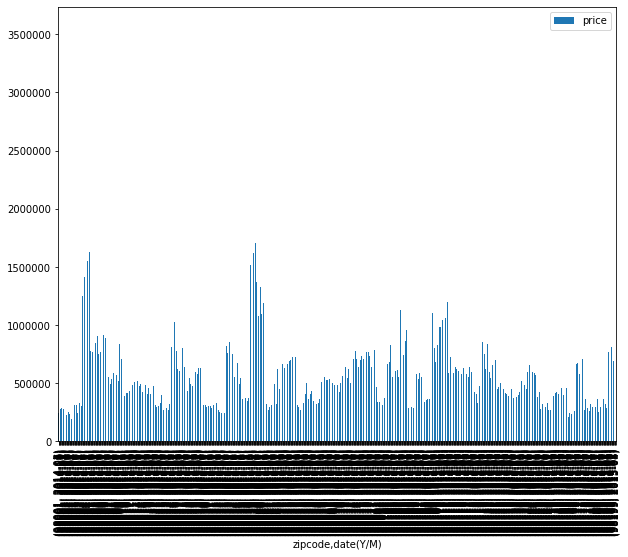

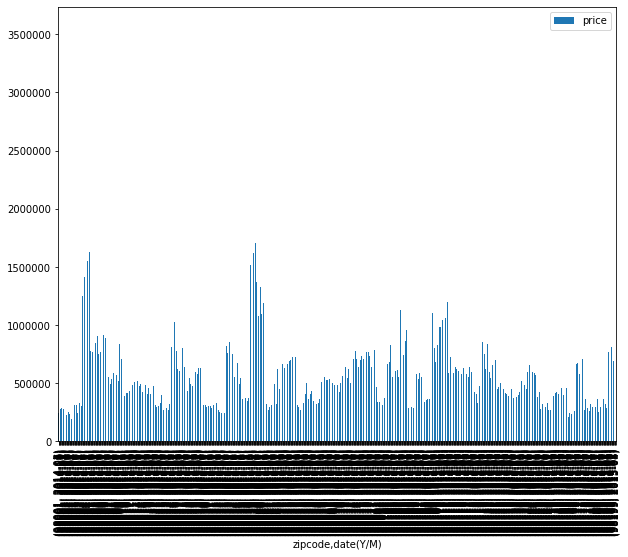

In [29]:
housesalebymonthszc.plot(kind='bar', y='price')

fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 25
fig_size[1] = 15
plt.rcParams["figure.figsize"] = fig_size

Current size: [25.0, 15.0]
Current size: [25.0, 15.0]


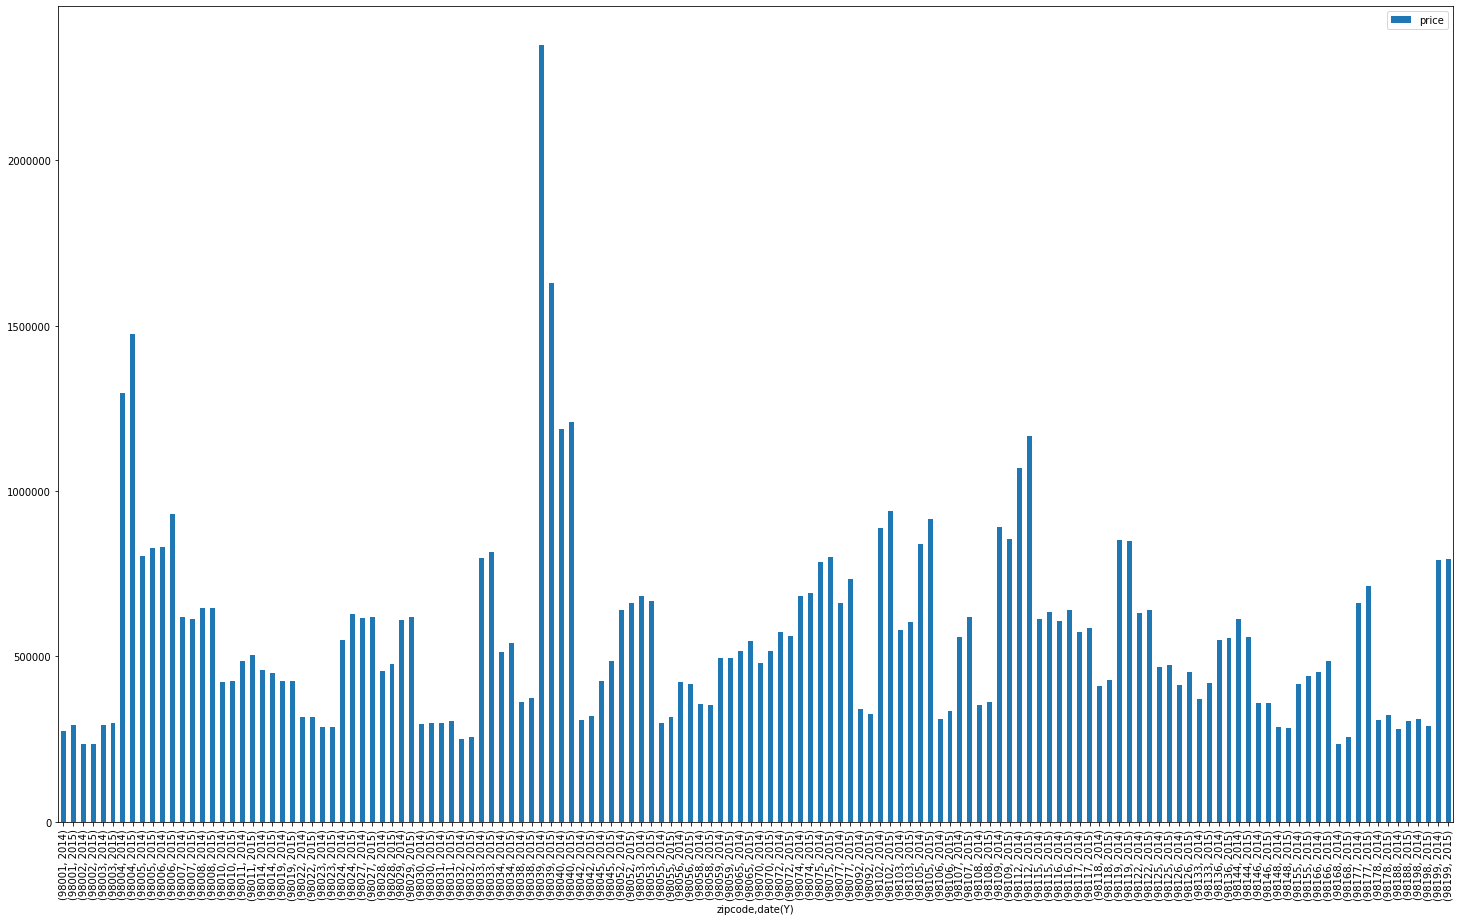

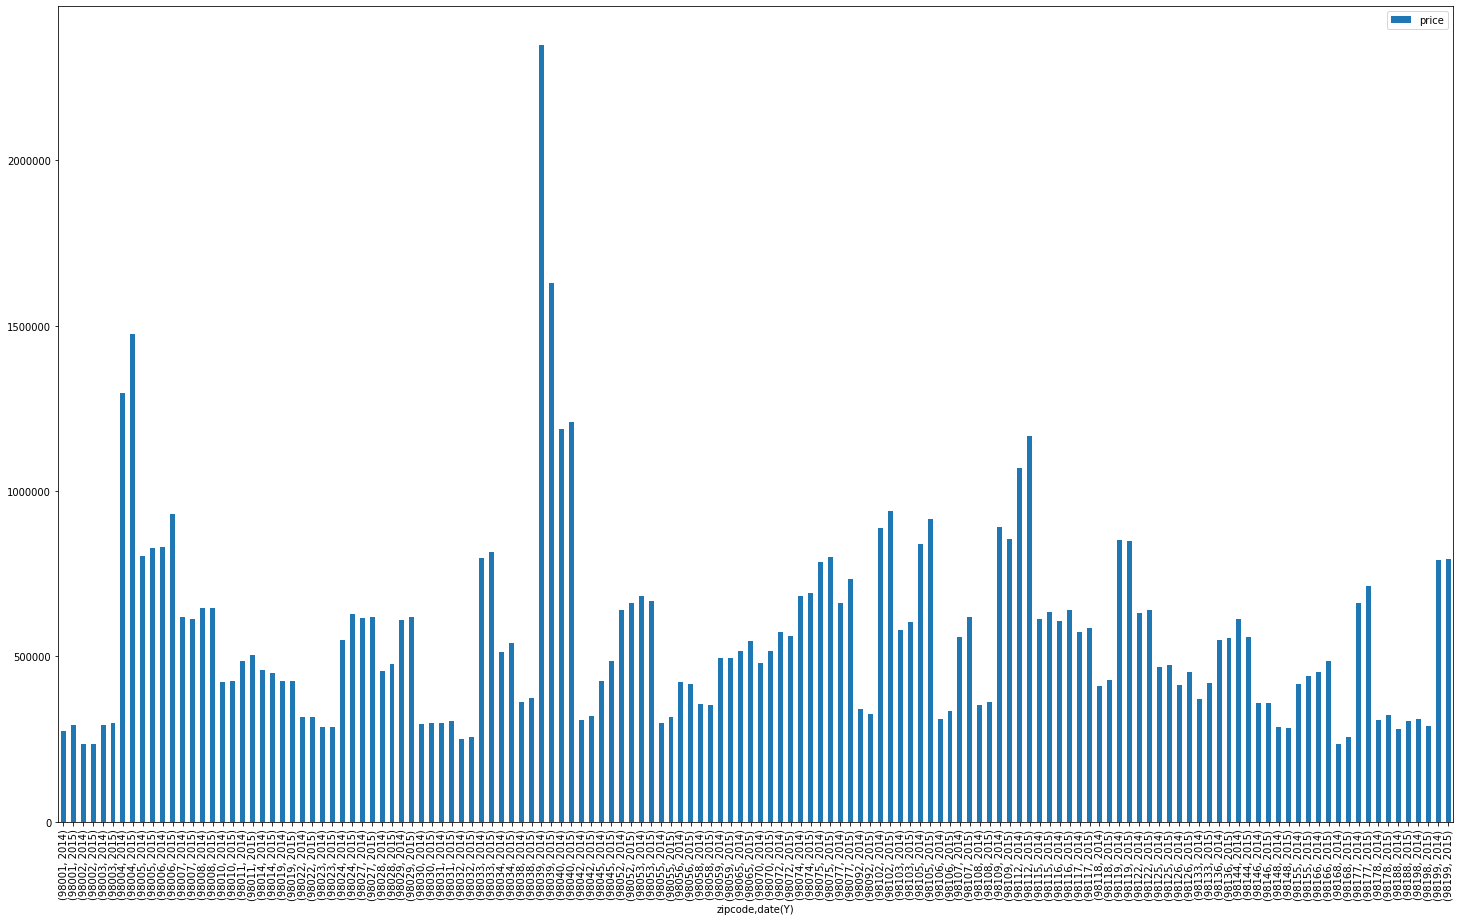

In [32]:
housesalebyyearszc.plot(kind='bar', y='price')

fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 25
fig_size[1] = 15
plt.rcParams["figure.figsize"] = fig_size


Current size: [25.0, 15.0]
Current size: [25.0, 15.0]


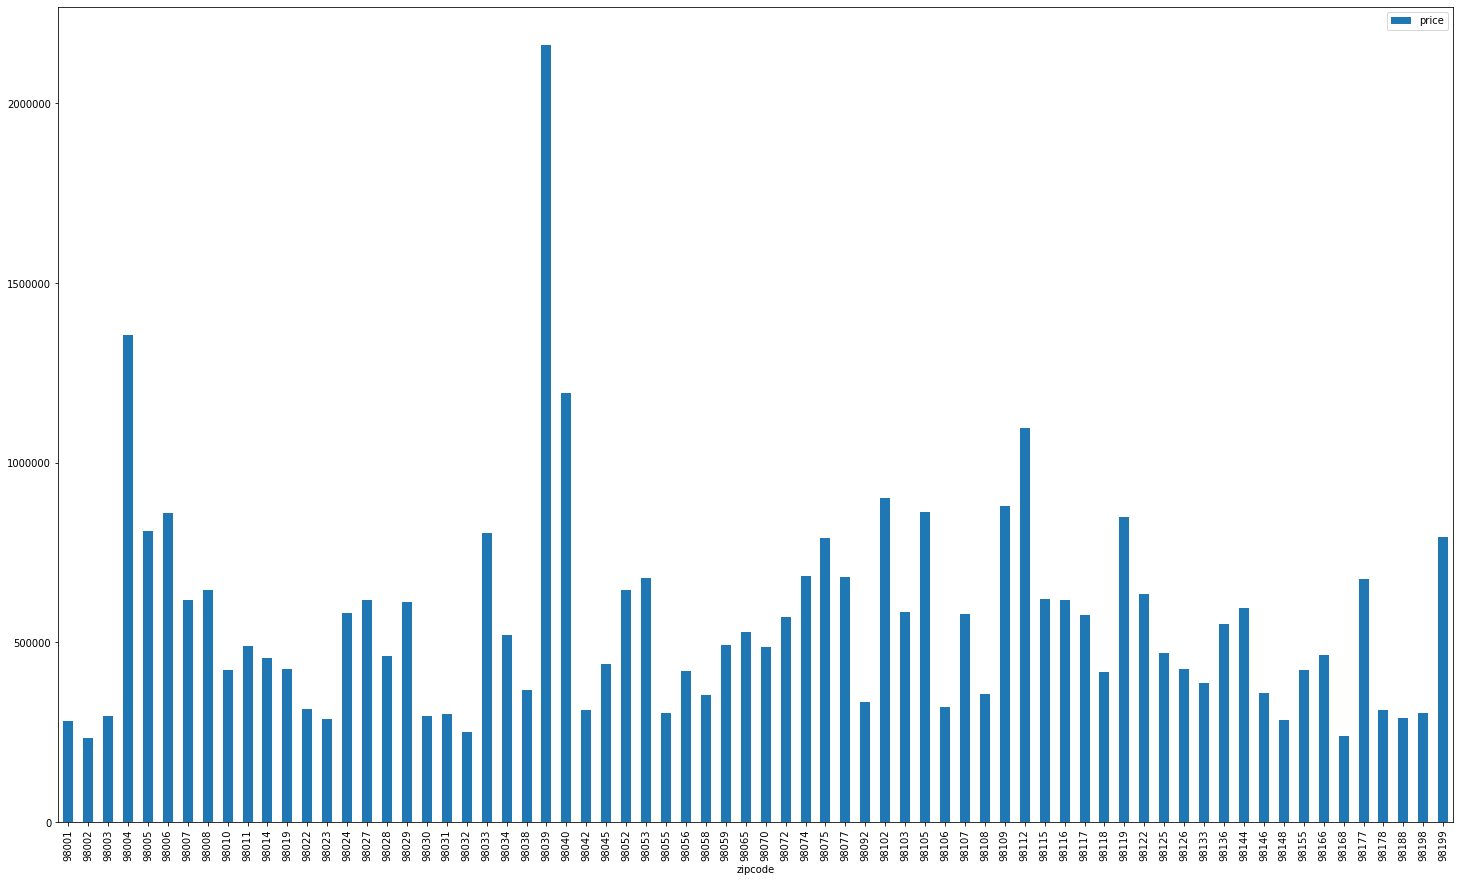

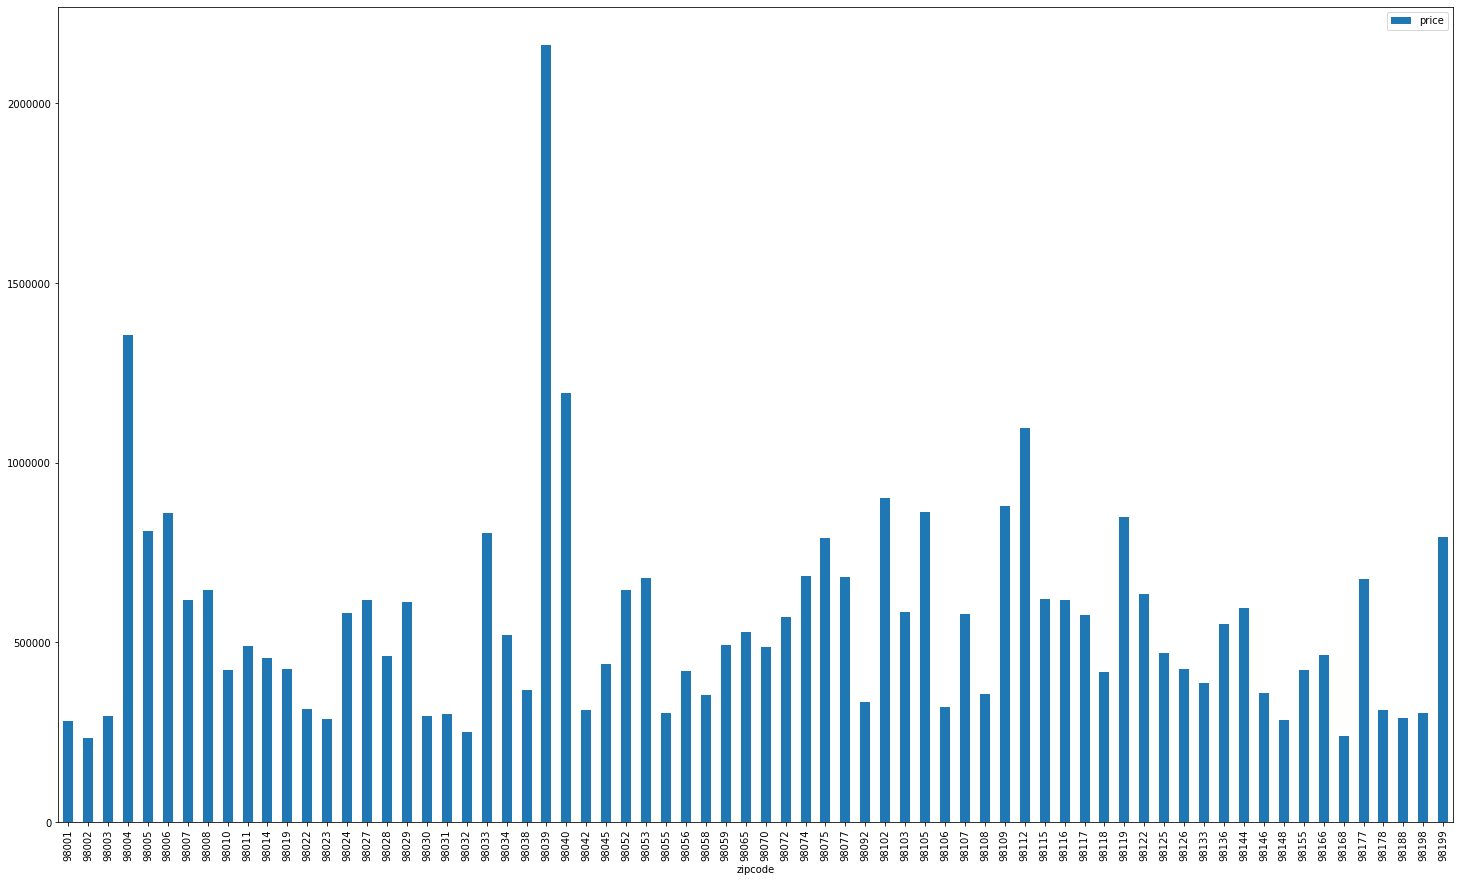

In [34]:
byzipcode=df.groupby('zipcode').mean()

byzipcode.plot(kind='bar', y='price')

fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 25
fig_size[1] = 15
plt.rcParams["figure.figsize"] = fig_size


In [35]:
weatherdata = pd.read_json('Resources/23075d28543cff25d003a483a55b9d88.json')
weatherdata



city_id                                               main  \
0      5799783  {'temp': 275.62, 'temp_min': 271.48, 'temp_max...   
1      5799783  {'temp': 275.61, 'temp_min': 273.71, 'temp_max...   
2      5799783  {'temp': 274.23, 'temp_min': 270.37, 'temp_max...   
3      5799783  {'temp': 273.95, 'temp_min': 270.37, 'temp_max...   
4      5799783  {'temp': 273.55, 'temp_min': 269.82, 'temp_max...   
...        ...                                                ...   
26272  5799783  {'temp': 275.5, 'temp_min': 272.15, 'temp_max'...   
26273  5799783  {'temp': 277.2, 'temp_min': 275.15, 'temp_max'...   
26274  5799783  {'temp': 277.525, 'temp_min': 277.525, 'temp_m...   
26275  5799783  {'temp': 277.85, 'temp_min': 276.55, 'temp_max...   
26276  5799783  {'temp': 276.98, 'temp_min': 276.98, 'temp_max...   

                           wind       clouds  \
0      {'speed': 1, 'deg': 350}   {'all': 1}   
1        {'speed': 0, 'deg': 0}   {'all': 1}   
2        {'speed': 0, 'deg': 0}  {'all': 20}   
3        {'speed': 0, 'deg': 0}   {'all': 1}   
4        {'speed': 0, 'deg': 0}  {'all': 75}   
...                         ...          ...   
26272   {'speed': 1, 'deg': 98}   {'all': 1}   
26273  {'speed': 2, 'deg': 330}   {'all': 1}   
26274  {'speed': 1, 'deg': 210}   {'all': 1}   
26275   {'speed': 0, 'deg': 90}   {'all': 1}   
26276   {'speed': 0, 'deg': 90}   {'all': 1}   

                                                 weather          dt  \
0      [{'id': 800, 'main': 'Clear', 'description': '...  1356998400   
1      [{'id': 800, 'main': 'Clear', 'description': '...  1357002000   
2      [{'id': 801, 'main': 'Clouds', 'description': ...  1357005600   
3      [{'id': 701, 'main': 'Mist', 'description': 'm...  1357009200   
4      [{'id': 701, 'main': 'Mist', 'description': 'm...  1357012800   
...                                                  ...         ...   
26272  [{'id': 500, 'main': 'Rain', 'description': 'l...  1451592000   
26273  [{'id': 800, 'main': 'Clear', 'description': '...  1451595600   
26274  [{'id': 800, 'main': 'Clear', 'description': '...  1451599200   
26275  [{'id': 800, 'main': 'Clear', 'description': '...  1451602800   
26276  [{'id': 800, 'main': 'Clear', 'description': '...  1451606400   

                              dt_iso                         rain snow  
0      2013-01-01 00:00:00 +0000 UTC                          NaN  NaN  
1      2013-01-01 01:00:00 +0000 UTC                          NaN  NaN  
2      2013-01-01 02:00:00 +0000 UTC                          NaN  NaN  
3      2013-01-01 03:00:00 +0000 UTC                          NaN  NaN  
4      2013-01-01 04:00:00 +0000 UTC                          NaN  NaN  
...                              ...                          ...  ...  
26272  2015-12-31 20:00:00 +0000 UTC  {'1h': 0.30000000000000004}  NaN  
26273  2015-12-31 21:00:00 +0000 UTC                          NaN  NaN  
26274  2015-12-31 22:00:00 +0000 UTC                          NaN  NaN  
26275  2015-12-31 23:00:00 +0000 UTC                          NaN  NaN  
26276  2016-01-01 00:00:00 +0000 UTC                          NaN  NaN  

[26277 rows x 9 columns]

city_id                                               main  \
0      5799783  {'temp': 275.62, 'temp_min': 271.48, 'temp_max...   
1      5799783  {'temp': 275.61, 'temp_min': 273.71, 'temp_max...   
2      5799783  {'temp': 274.23, 'temp_min': 270.37, 'temp_max...   
3      5799783  {'temp': 273.95, 'temp_min': 270.37, 'temp_max...   
4      5799783  {'temp': 273.55, 'temp_min': 269.82, 'temp_max...   
...        ...                                                ...   
26272  5799783  {'temp': 275.5, 'temp_min': 272.15, 'temp_max'...   
26273  5799783  {'temp': 277.2, 'temp_min': 275.15, 'temp_max'...   
26274  5799783  {'temp': 277.525, 'temp_min': 277.525, 'temp_m...   
26275  5799783  {'temp': 277.85, 'temp_min': 276.55, 'temp_max...   
26276  5799783  {'temp': 276.98, 'temp_min': 276.98, 'temp_max...   

                           wind       clouds  \
0      {'speed': 1, 'deg': 350}   {'all': 1}   
1        {'speed': 0, 'deg': 0}   {'all': 1}   
2        {'speed': 0, 'deg': 0}  {'all': 20}   
3        {'speed': 0, 'deg': 0}   {'all': 1}   
4        {'speed': 0, 'deg': 0}  {'all': 75}   
...                         ...          ...   
26272   {'speed': 1, 'deg': 98}   {'all': 1}   
26273  {'speed': 2, 'deg': 330}   {'all': 1}   
26274  {'speed': 1, 'deg': 210}   {'all': 1}   
26275   {'speed': 0, 'deg': 90}   {'all': 1}   
26276   {'speed': 0, 'deg': 90}   {'all': 1}   

                                                 weather          dt  \
0      [{'id': 800, 'main': 'Clear', 'description': '...  1356998400   
1      [{'id': 800, 'main': 'Clear', 'description': '...  1357002000   
2      [{'id': 801, 'main': 'Clouds', 'description': ...  1357005600   
3      [{'id': 701, 'main': 'Mist', 'description': 'm...  1357009200   
4      [{'id': 701, 'main': 'Mist', 'description': 'm...  1357012800   
...                                                  ...         ...   
26272  [{'id': 500, 'main': 'Rain', 'description': 'l...  1451592000   
26273  [{'id': 800, 'main': 'Clear', 'description': '...  1451595600   
26274  [{'id': 800, 'main': 'Clear', 'description': '...  1451599200   
26275  [{'id': 800, 'main': 'Clear', 'description': '...  1451602800   
26276  [{'id': 800, 'main': 'Clear', 'description': '...  1451606400   

                              dt_iso                         rain snow  
0      2013-01-01 00:00:00 +0000 UTC                          NaN  NaN  
1      2013-01-01 01:00:00 +0000 UTC                          NaN  NaN  
2      2013-01-01 02:00:00 +0000 UTC                          NaN  NaN  
3      2013-01-01 03:00:00 +0000 UTC                          NaN  NaN  
4      2013-01-01 04:00:00 +0000 UTC                          NaN  NaN  
...                              ...                          ...  ...  
26272  2015-12-31 20:00:00 +0000 UTC  {'1h': 0.30000000000000004}  NaN  
26273  2015-12-31 21:00:00 +0000 UTC                          NaN  NaN  
26274  2015-12-31 22:00:00 +0000 UTC                          NaN  NaN  
26275  2015-12-31 23:00:00 +0000 UTC                          NaN  NaN  
26276  2016-01-01 00:00:00 +0000 UTC                          NaN  NaN  

[26277 rows x 9 columns]

In [36]:
date=[]
num = 0
for index, row in weatherdata.iterrows():
    print("working on "+ str(num))
    sdate = weatherdata['dt_iso'].str.split(" ")[num][0]
    date.append(sdate)
    num = num + 1

working on 0
working on 1
working on 2
working on 3
working on 4
working on 0
working on 1
working on 2
working on 3
working on 4
working on 5
working on 6
working on 7
working on 8
working on 9
working on 5
working on 6
working on 7
working on 8
working on 9
working on 10
working on 11
working on 12
working on 13
working on 14
working on 15
working on 10
working on 11
working on 12
working on 13
working on 14
working on 15
working on 16
working on 17
working on 18
working on 19
working on 20
working on 21
working on 22working on 16
working on 17
working on 18
working on 19
working on 20
working on 21
working on 22
working on 23
working on 24
working on 25
working on 26
working on 27

working on 23
working on 24
working on 25
working on 26
working on 27
working on 28
working on 29
working on 30
working on 28
working on 29
working on 30
working on 31
working on 32
working on 31
working on 32
working on 33
working on 34
working on 35
working on 36
working on 37
working on 38
working on 3

working on 278
working on 279
working on 280
working on 281
working on 282
working on 283
working on 284
working on 285
working on 286
working on 287
working on 288
working on 289
working on 290
working on 284
working on 285
working on 286
working on 287
working on 288
working on 289
working on 290
working on 291
working on 292
working on 293
working on 294
working on 295
working on 296
working on 291
working on 292
working on 293
working on 294
working on 295
working on 296
working on 297
working on 298
working on 299
working on 300
working on 301
working on 302
working on 297
working on 298
working on 299
working on 300
working on 301
working on 302
working on 303
working on 304
working on 305
working on 306
working on 307
working on 308
working on 309
working on 310
working on 303
working on 304
working on 305
working on 306
working on 307
working on 308
working on 309
working on 310
working on 311
working on 312
working on 313
working on 314
working on 315
working on 311
working on

working on 551
working on 552
working on 553
working on 554
working on 555
working on 556
working on 557
working on 558
working on 559
working on 560
working on 561
working on 562
working on 559
working on 560
working on 561
working on 562
working on 563
working on 564
working on 565
working on 566
working on 567
working on 568
working on 569
working on 563
working on 564
working on 565
working on 566
working on 567
working on 568
working on 569
working on 570
working on 571
working on 572
working on 573
working on 574
working on 575
working on 570
working on 571
working on 572
working on 573
working on 574
working on 575
working on 576
working on 577
working on 578
working on 579
working on 580
working on 581
working on 576
working on 577
working on 578
working on 579
working on 580
working on 581
working on 582
working on 583
working on 584
working on 585
working on 586
working on 587
working on 588
working on 589
working on 582
working on 583
working on 584
working on 585
working on

working on 829
working on 830
working on 831
working on 832
working on 833
working on 829
working on 830
working on 831
working on 832
working on 833
working on 834
working on 835
working on 836
working on 837
working on 838
working on 839
working on 840
working on 834
working on 835
working on 836
working on 837
working on 838
working on 839
working on 840
working on 841
working on 842
working on 843
working on 844
working on 845
working on 846
working on 841
working on 842
working on 843
working on 844
working on 845
working on 846
working on 847
working on 848
working on 849
working on 850
working on 851
working on 852
working on 847
working on 848
working on 849
working on 850
working on 851
working on 852
working on 853
working on 854
working on 855
working on 856
working on 857
working on 858
working on 853
working on 854
working on 855
working on 856
working on 857
working on 858
working on 859
working on 860
working on 861
working on 862
working on 863
working on 859
working on

working on 1095
working on 1096
working on 1097
working on 1098
working on 1099
working on 1100
working on 1101
working on 1102
working on 1103
working on 1104
working on 1105
working on 1101
working on 1102
working on 1103
working on 1104
working on 1105
working on 1106
working on 1107
working on 1108
working on 1109
working on 1110
working on 1111
working on 1112
working on 1113
working on 1106
working on 1107
working on 1108
working on 1109
working on 1110
working on 1111
working on 1112
working on 1113
working on 1114
working on 1115
working on 1116
working on 1117
working on 1118
working on 1119
working on 1114
working on 1115
working on 1116
working on 1117
working on 1118
working on 1119
working on 1120
working on 1121
working on 1122
working on 1123
working on 1124
working on 1125
working on 1120
working on 1121
working on 1122
working on 1123
working on 1124
working on 1125
working on 1126
working on 1127
working on 1128
working on 1129
working on 1130
working on 1131
working 

working on 1357working on 1352
working on 1353
working on 1354
working on 1355
working on 1356
working on 1357
working on 1358
working on 1359
working on 1360

working on 1358
working on 1359
working on 1360
working on 1361
working on 1362
working on 1363
working on 1364
working on 1365
working on 1366
working on 1361
working on 1362
working on 1363
working on 1364
working on 1365
working on 1366
working on 1367
working on 1368
working on 1369
working on 1370
working on 1371
working on 1372
working on 1367
working on 1368
working on 1369
working on 1370
working on 1371
working on 1372
working on 1373
working on 1374
working on 1375
working on 1376
working on 1377
working on 1378
working on 1379
working on 1373
working on 1374
working on 1375
working on 1376
working on 1377
working on 1378
working on 1379
working on 1380
working on 1381
working on 1382
working on 1383
working on 1384
working on 1380
working on 1381
working on 1382
working on 1383
working on 1384
working on 1385
working 

working on 1608
working on 1609
working on 1610
working on 1611
working on 1612
working on 1613
working on 1614
working on 1615
working on 1616
working on 1617
working on 1618
working on 1619
working on 1620
working on 1614
working on 1615
working on 1616
working on 1617
working on 1618
working on 1619
working on 1620
working on 1621
working on 1622
working on 1623
working on 1624
working on 1625
working on 1626
working on 1621
working on 1622
working on 1623
working on 1624
working on 1625
working on 1626
working on 1627
working on 1628
working on 1629
working on 1630
working on 1631
working on 1632
working on 1627
working on 1628
working on 1629
working on 1630
working on 1631
working on 1632
working on 1633
working on 1634
working on 1635
working on 1636
working on 1637
working on 1638
working on 1639
working on 1633
working on 1634
working on 1635
working on 1636
working on 1637
working on 1638
working on 1639
working on 1640
working on 1641
working on 1642
working on 1643
working 

working on 1866
working on 1867
working on 1868
working on 1869
working on 1870
working on 1871
working on 1872
working on 1873
working on 1873
working on 1874
working on 1875
working on 1876
working on 1877
working on 1878
working on 1874
working on 1875
working on 1876
working on 1877
working on 1878
working on 1879
working on 1880
working on 1881
working on 1882
working on 1883
working on 1884
working on 1885
working on 1879
working on 1880
working on 1881
working on 1882
working on 1883
working on 1884
working on 1885
working on 1886
working on 1887
working on 1888
working on 1889
working on 1890
working on 1886
working on 1887
working on 1888
working on 1889
working on 1890
working on 1891
working on 1892
working on 1891
working on 1892
working on 1893
working on 1894
working on 1895
working on 1896
working on 1897
working on 1898
working on 1899
working on 1900
working on 1893
working on 1894
working on 1895
working on 1896
working on 1897
working on 1898
working on 1899
working 

working on 2128
working on 2129
working on 2130
working on 2131
working on 2132
working on 2133
working on 2128
working on 2129
working on 2130
working on 2131
working on 2132
working on 2133
working on 2134
working on 2135
working on 2136
working on 2137
working on 2138
working on 2139
working on 2134
working on 2135
working on 2136
working on 2137
working on 2138
working on 2139
working on 2140
working on 2141
working on 2142
working on 2143
working on 2144
working on 2145
working on 2140
working on 2141
working on 2142
working on 2143
working on 2144
working on 2145
working on 2146
working on 2147
working on 2148
working on 2149
working on 2150
working on 2151
working on 2146
working on 2147
working on 2148
working on 2149
working on 2150
working on 2151
working on 2152
working on 2153
working on 2154
working on 2155
working on 2156
working on 2157
working on 2152
working on 2153
working on 2154
working on 2155
working on 2156
working on 2157
working on 2158
working on 2158
working 

working on 2382
working on 2383
working on 2384
working on 2385
working on 2386
working on 2387
working on 2388
working on 2389
working on 2390
working on 2391
working on 2392
working on 2387
working on 2388
working on 2389
working on 2390
working on 2391
working on 2392
working on 2393
working on 2394
working on 2395
working on 2396
working on 2397
working on 2398
working on 2399
working on 2393
working on 2394
working on 2395
working on 2396
working on 2397
working on 2398
working on 2399
working on 2400
working on 2401
working on 2402
working on 2403
working on 2404
working on 2405
working on 2400
working on 2401
working on 2402
working on 2403
working on 2404
working on 2405
working on 2406
working on 2407
working on 2408
working on 2409
working on 2410
working on 2411
working on 2412
working on 2406
working on 2407
working on 2408
working on 2409
working on 2410
working on 2411
working on 2412
working on 2413
working on 2414
working on 2415
working on 2416
working on 2417
working 

working on 2640
working on 2641
working on 2642
working on 2643
working on 2644
working on 2645

working on 2641
working on 2642
working on 2643
working on 2644
working on 2645
working on 2646
working on 2647
working on 2648
working on 2649
working on 2650
working on 2651
working on 2652
working on 2646
working on 2647
working on 2648
working on 2649
working on 2650
working on 2651
working on 2652
working on 2653
working on 2654
working on 2655
working on 2656
working on 2657
working on 2658
working on 2653
working on 2654
working on 2655
working on 2656
working on 2657
working on 2658
working on 2659
working on 2660
working on 2661
working on 2662
working on 2663
working on 2664
working on 2665
working on 2659
working on 2660
working on 2661
working on 2662
working on 2663
working on 2664
working on 2665
working on 2666
working on 2667
working on 2668
working on 2669
working on 2670
working on 2671
working on 2666
working on 2667
working on 2668
working on 2669
working on 2670
working

working on 2893
working on 2894
working on 2895
working on 2896
working on 2897
working on 2898
working on 2899
working on 2900
working on 2901
working on 2902
working on 2903
working on 2904
working on 2905
working on 2900
working on 2901
working on 2902
working on 2903
working on 2904
working on 2905
working on 2906
working on 2907
working on 2908
working on 2909
working on 2910
working on 2911
working on 2906
working on 2907
working on 2908
working on 2909
working on 2910
working on 2911
working on 2912
working on 2913
working on 2914
working on 2915
working on 2916
working on 2917
working on 2918
working on 2912
working on 2913
working on 2914
working on 2915
working on 2916
working on 2917
working on 2918
working on 2919
working on 2920
working on 2921
working on 2922
working on 2923
working on 2924
working on 2925
working on 2919
working on 2920
working on 2921
working on 2922
working on 2923
working on 2924
working on 2925
working on 2926
working on 2927
working on 2928
working 

working on 3154
working on 3155
working on 3156
working on 3157
working on 3158
working on 3159
working on 3160
working on 3154
working on 3155
working on 3156
working on 3157
working on 3158
working on 3159
working on 3160
working on 3161
working on 3162
working on 3163
working on 3164
working on 3165
working on 3161
working on 3162
working on 3163
working on 3164
working on 3165
working on 3166
working on 3167
working on 3168
working on 3169
working on 3170
working on 3171
working on 3166
working on 3167
working on 3168
working on 3169
working on 3170
working on 3171
working on 3172
working on 3173
working on 3174
working on 3175
working on 3176
working on 3177
working on 3172
working on 3173
working on 3174
working on 3175
working on 3176
working on 3177
working on 3178
working on 3179
working on 3180
working on 3181
working on 3182
working on 3183
working on 3184
working on 3178
working on 3179
working on 3180
working on 3181
working on 3182
working on 3183
working on 3184
working 

working on 3412
working on 3413
working on 3414
working on 3415
working on 3416
working on 3412
working on 3413
working on 3414
working on 3415
working on 3416
working on 3417
working on 3418
working on 3419
working on 3420
working on 3421
working on 3422
working on 3417
working on 3418
working on 3419
working on 3420
working on 3421
working on 3422
working on 3423
working on 3424
working on 3425
working on 3426
working on 3427working on 3423
working on 3424
working on 3425
working on 3426
working on 3427
working on 3428
working on 3429
working on 3430
working on 3431

working on 3428
working on 3429
working on 3430
working on 3431
working on 3432
working on 3433
working on 3434
working on 3435
working on 3436working on 3432
working on 3433
working on 3434
working on 3435
working on 3436
working on 3437
working on 3438
working on 3439
working on 3440
working on 3441
working on 3437
working on 3438
working on 3439
working on 3440
working on 3441
working on 3442
working on 3443
working o

working on 3666
working on 3667
working on 3668
working on 3669
working on 3670
working on 3671
working on 3672
working on 3673
working on 3674
working on 3675
working on 3676
working on 3671
working on 3672
working on 3673
working on 3674
working on 3675
working on 3676
working on 3677
working on 3678
working on 3677
working on 3678
working on 3679
working on 3680
working on 3681
working on 3682
working on 3683
working on 3684
working on 3679
working on 3680
working on 3681
working on 3682
working on 3683
working on 3684
working on 3685
working on 3686
working on 3687
working on 3688
working on 3689
working on 3690
working on 3691
working on 3685
working on 3686
working on 3687
working on 3688
working on 3689
working on 3690
working on 3691
working on 3692
working on 3693
working on 3694
working on 3695
working on 3696
working on 3697
working on 3692
working on 3693
working on 3694
working on 3695
working on 3696
working on 3697
working on 3698
working on 3699
working on 3700
working 

working on 3926
working on 3927
working on 3928
working on 3929
working on 3930
working on 3931
working on 3926
working on 3927
working on 3928
working on 3929
working on 3930
working on 3931
working on 3932
working on 3933
working on 3934
working on 3935
working on 3936
working on 3937
working on 3938
working on 3939
working on 3932
working on 3933
working on 3934
working on 3935
working on 3936
working on 3937
working on 3938
working on 3939
working on 3940
working on 3941
working on 3942
working on 3943
working on 3944
working on 3940
working on 3941
working on 3942
working on 3943
working on 3944
working on 3945
working on 3946
working on 3947
working on 3948
working on 3949
working on 3950
working on 3951
working on 3945
working on 3946
working on 3947
working on 3948
working on 3949
working on 3950
working on 3951
working on 3952
working on 3953
working on 3954
working on 3955
working on 3956
working on 3957
working on 3952
working on 3953
working on 3954
working on 3955
working 

working on 4185
working on 4186
working on 4187
working on 4188
working on 4189
working on 4190
working on 4185
working on 4186
working on 4187
working on 4188
working on 4189
working on 4190
working on 4191
working on 4191
working on 4192
working on 4193
working on 4194
working on 4195
working on 4196
working on 4197
working on 4192
working on 4193
working on 4194
working on 4195
working on 4196
working on 4197
working on 4198
working on 4199
working on 4200
working on 4201
working on 4202
working on 4203
working on 4204
working on 4198
working on 4199
working on 4200
working on 4201
working on 4202
working on 4203
working on 4204
working on 4205
working on 4206
working on 4207
working on 4208
working on 4209
working on 4210working on 4205
working on 4206
working on 4207
working on 4208
working on 4209
working on 4210
working on 4211
working on 4212
working on 4213
working on 4214
working on 4215

working on 4211
working on 4212
working on 4213
working on 4214
working on 4215
working 

working on 4439
working on 4440
working on 4441
working on 4442
working on 4443
working on 4444
working on 4445
working on 4446
working on 4447
working on 4448
working on 4449
working on 4450
working on 4451
working on 4445
working on 4446
working on 4447
working on 4448
working on 4449
working on 4450
working on 4451
working on 4452
working on 4453
working on 4454
working on 4455
working on 4456
working on 4457
working on 4452
working on 4453
working on 4454
working on 4455
working on 4456
working on 4457
working on 4458
working on 4459
working on 4460
working on 4461
working on 4462
working on 4458
working on 4459
working on 4460
working on 4461
working on 4462
working on 4463
working on 4464
working on 4465
working on 4466
working on 4467
working on 4468
working on 4469
working on 4463
working on 4464
working on 4465
working on 4466
working on 4467
working on 4468
working on 4469
working on 4470
working on 4471
working on 4472
working on 4473
working on 4474
working on 4475
working 

working on 4698
working on 4699
working on 4700
working on 4701
working on 4702
working on 4703
working on 4704
working on 4705
working on 4706
working on 4707
working on 4708
working on 4709
working on 4705
working on 4706
working on 4707
working on 4708
working on 4709
working on 4710
working on 4711
working on 4712
working on 4713
working on 4714
working on 4715
working on 4716
working on 4710
working on 4711
working on 4712
working on 4713
working on 4714
working on 4715
working on 4716
working on 4717
working on 4718
working on 4719
working on 4720
working on 4721
working on 4722
working on 4717
working on 4718
working on 4719
working on 4720
working on 4721
working on 4722
working on 4723
working on 4723
working on 4724
working on 4725
working on 4726
working on 4727
working on 4728
working on 4729
working on 4724
working on 4725
working on 4726
working on 4727
working on 4728
working on 4729
working on 4730
working on 4731
working on 4732
working on 4733
working on 4734
working 

working on 4960
working on 4961
working on 4962
working on 4963
working on 4964
working on 4965
working on 4966
working on 4960
working on 4961
working on 4962
working on 4963
working on 4964
working on 4965
working on 4966
working on 4967
working on 4968
working on 4969
working on 4970
working on 4967
working on 4968
working on 4969
working on 4970
working on 4971
working on 4972
working on 4973
working on 4974
working on 4975
working on 4976
working on 4971
working on 4972
working on 4973
working on 4974
working on 4975
working on 4976
working on 4977
working on 4978
working on 4979
working on 4980
working on 4981
working on 4982
working on 4983
working on 4984
working on 4977
working on 4978
working on 4979
working on 4980
working on 4981
working on 4982
working on 4983
working on 4984
working on 4985
working on 4986
working on 4987
working on 4988
working on 4989
working on 4985
working on 4986
working on 4987
working on 4988
working on 4989
working on 4990
working on 4991
working 

working on 5218
working on 5219
working on 5220
working on 5221
working on 5222
working on 5223
working on 5224
working on 5218
working on 5219
working on 5220
working on 5221
working on 5222
working on 5223
working on 5224
working on 5225
working on 5226
working on 5227
working on 5228
working on 5229
working on 5230
working on 5225
working on 5226
working on 5227
working on 5228
working on 5229
working on 5230
working on 5231
working on 5232
working on 5233
working on 5234
working on 5235
working on 5236
working on 5231
working on 5232
working on 5233
working on 5234
working on 5235
working on 5236
working on 5237
working on 5238
working on 5239
working on 5240
working on 5241
working on 5242
working on 5237
working on 5238
working on 5239
working on 5240
working on 5241
working on 5242
working on 5243
working on 5244
working on 5245
working on 5246
working on 5247
working on 5248
working on 5249
working on 5243
working on 5244
working on 5245
working on 5246
working on 5247
working 

working on 5471
working on 5472
working on 5473
working on 5474
working on 5475
working on 5476
working on 5477
working on 5478
working on 5479
working on 5480
working on 5481
working on 5482
working on 5478
working on 5479
working on 5480
working on 5481
working on 5482
working on 5483
working on 5483
working on 5484
working on 5485
working on 5486
working on 5487
working on 5488
working on 5489
working on 5484
working on 5485
working on 5486
working on 5487
working on 5488
working on 5489
working on 5490
working on 5491
working on 5492
working on 5493
working on 5494
working on 5495
working on 5490
working on 5491
working on 5492
working on 5493
working on 5494
working on 5495
working on 5496
working on 5497
working on 5498
working on 5499
working on 5500
working on 5501
working on 5502
working on 5496
working on 5497
working on 5498
working on 5499
working on 5500
working on 5501
working on 5502
working on 5503
working on 5504
working on 5505
working on 5506
working on 5507
working 

working on 5731
working on 5732
working on 5733
working on 5734
working on 5735
working on 5736
working on 5737
working on 5731
working on 5732
working on 5733
working on 5734
working on 5735
working on 5736
working on 5737
working on 5738
working on 5739
working on 5740
working on 5741
working on 5742
working on 5743
working on 5744
working on 5745
working on 5738
working on 5739
working on 5740
working on 5741
working on 5742
working on 5743
working on 5744
working on 5745
working on 5746
working on 5747
working on 5748
working on 5749
working on 5746
working on 5747
working on 5748
working on 5749
working on 5750
working on 5751
working on 5752
working on 5753
working on 5754
working on 5750
working on 5751
working on 5752
working on 5753
working on 5754
working on 5755
working on 5756
working on 5757
working on 5758
working on 5759
working on 5760
working on 5761
working on 5755
working on 5756
working on 5757
working on 5758
working on 5759
working on 5760
working on 5761
working 

working on 5990
working on 5991
working on 5992
working on 5993
working on 5994
working on 5995working on 5990
working on 5991
working on 5992
working on 5993
working on 5994
working on 5995
working on 5996
working on 5997
working on 5998
working on 5999
working on 6000
working on 6001
working on 6002

working on 5996
working on 5997
working on 5998
working on 5999
working on 6000
working on 6001
working on 6002
working on 6003
working on 6004
working on 6005
working on 6006
working on 6007
working on 6008
working on 6009
working on 6003
working on 6004
working on 6005
working on 6006
working on 6007
working on 6008
working on 6009
working on 6010
working on 6011
working on 6012
working on 6013
working on 6014
working on 6010
working on 6011
working on 6012
working on 6013
working on 6014
working on 6015
working on 6016
working on 6017
working on 6018
working on 6019
working on 6020
working on 6021
working on 6015
working on 6016
working on 6017
working on 6018
working on 6019
working 

working on 6244
working on 6245
working on 6246
working on 6247
working on 6248
working on 6249
working on 6250
working on 6251
working on 6252
working on 6253
working on 6254
working on 6255
working on 6249
working on 6250
working on 6251
working on 6252
working on 6253
working on 6254
working on 6255
working on 6256
working on 6257
working on 6258
working on 6259
working on 6260
working on 6261
working on 6256
working on 6257
working on 6258
working on 6259
working on 6260
working on 6261
working on 6262
working on 6263
working on 6264
working on 6265
working on 6266
working on 6267
working on 6268
working on 6262
working on 6263
working on 6264
working on 6265
working on 6266
working on 6267
working on 6268
working on 6269
working on 6270
working on 6271
working on 6272
working on 6273
working on 6274
working on 6275
working on 6269
working on 6270
working on 6271
working on 6272
working on 6273
working on 6274
working on 6275
working on 6276
working on 6277
working on 6278
working 

working on 6503
working on 6504
working on 6505
working on 6506
working on 6507
working on 6508
working on 6503
working on 6504
working on 6505
working on 6506
working on 6507
working on 6508
working on 6509
working on 6510
working on 6511
working on 6512
working on 6513
working on 6514
working on 6515
working on 6509
working on 6510
working on 6511
working on 6512
working on 6513
working on 6514
working on 6515
working on 6516
working on 6517
working on 6518
working on 6519
working on 6520
working on 6521
working on 6516
working on 6517
working on 6518
working on 6519
working on 6520
working on 6521
working on 6522
working on 6523
working on 6524
working on 6525
working on 6526
working on 6527
working on 6522
working on 6523
working on 6524
working on 6525
working on 6526
working on 6527
working on 6528
working on 6528
working on 6529
working on 6530
working on 6531
working on 6532
working on 6533
working on 6534
working on 6529
working on 6530
working on 6531
working on 6532
working 

working on 6757
working on 6758
working on 6759
working on 6760
working on 6761
working on 6762
working on 6763
working on 6764
working on 6765
working on 6766
working on 6767
working on 6768
working on 6763
working on 6764
working on 6765
working on 6766
working on 6767
working on 6768
working on 6769
working on 6770
working on 6771
working on 6772
working on 6773
working on 6774
working on 6769
working on 6770
working on 6771
working on 6772
working on 6773
working on 6774
working on 6775
working on 6775
working on 6776
working on 6777
working on 6778
working on 6779
working on 6780
working on 6781
working on 6776
working on 6777
working on 6778
working on 6779
working on 6780
working on 6781
working on 6782
working on 6783
working on 6784
working on 6785
working on 6786
working on 6787
working on 6788working on 6782
working on 6783
working on 6784
working on 6785
working on 6786
working on 6787
working on 6788
working on 6789
working on 6790
working on 6791
working on 6792
working o

working on 7016
working on 7017
working on 7018
working on 7019
working on 7020
working on 7021
working on 7022
working on 7022
working on 7023
working on 7024
working on 7025
working on 7026
working on 7027
working on 7028working on 7023
working on 7024
working on 7025
working on 7026
working on 7027
working on 7028
working on 7029
working on 7030
working on 7031
working on 7032
working on 7033
working on 7034
working on 7035

working on 7029
working on 7030
working on 7031
working on 7032
working on 7033
working on 7034
working on 7035
working on 7036
working on 7037
working on 7038
working on 7039
working on 7040
working on 7041
working on 7036
working on 7037
working on 7038
working on 7039
working on 7040
working on 7041
working on 7042
working on 7043
working on 7044
working on 7045
working on 7046
working on 7042
working on 7043
working on 7044
working on 7045
working on 7046
working on 7047
working on 7048
working on 7049
working on 7050
working on 7051
working on 7052
working 

working on 7275
working on 7276
working on 7277
working on 7278
working on 7279
working on 7280
working on 7281
working on 7282
working on 7283

working on 7276
working on 7277
working on 7278
working on 7279
working on 7280
working on 7281
working on 7282
working on 7283
working on 7284
working on 7285
working on 7286
working on 7287
working on 7288
working on 7284
working on 7285
working on 7286
working on 7287
working on 7288
working on 7289
working on 7290
working on 7291
working on 7292
working on 7293
working on 7294
working on 7289
working on 7290
working on 7291
working on 7292
working on 7293
working on 7294
working on 7295
working on 7296
working on 7297
working on 7298
working on 7299
working on 7300
working on 7295
working on 7296
working on 7297
working on 7298
working on 7299
working on 7300
working on 7301
working on 7302
working on 7303
working on 7304
working on 7305
working on 7306
working on 7307
working on 7301
working on 7302
working on 7303
working on 7304
working

working on 7529
working on 7530
working on 7531
working on 7532
working on 7533
working on 7534
working on 7535
working on 7536
working on 7537
working on 7538
working on 7539
working on 7540
working on 7541
working on 7535
working on 7536
working on 7537
working on 7538
working on 7539
working on 7540
working on 7541
working on 7542
working on 7543
working on 7544
working on 7545
working on 7546
working on 7547
working on 7548working on 7542
working on 7543
working on 7544
working on 7545
working on 7546
working on 7547
working on 7548
working on 7549
working on 7550
working on 7551
working on 7552
working on 7553

working on 7549
working on 7550
working on 7551
working on 7552
working on 7553
working on 7554
working on 7555
working on 7556
working on 7557
working on 7558
working on 7559
working on 7560
working on 7554
working on 7555
working on 7556
working on 7557
working on 7558
working on 7559
working on 7560
working on 7561
working on 7562
working on 7563
working on 7564
working 

working on 7791
working on 7792
working on 7793
working on 7794
working on 7795
working on 7791
working on 7792
working on 7793
working on 7794
working on 7795
working on 7796
working on 7797
working on 7798
working on 7799
working on 7800
working on 7801
working on 7796
working on 7797
working on 7798
working on 7799
working on 7800
working on 7801
working on 7802
working on 7803
working on 7804
working on 7805
working on 7806
working on 7807
working on 7802
working on 7803
working on 7804
working on 7805
working on 7806
working on 7807
working on 7808
working on 7809
working on 7810
working on 7811
working on 7812
working on 7813
working on 7814
working on 7808
working on 7809
working on 7810
working on 7811
working on 7812
working on 7813
working on 7814
working on 7815
working on 7816
working on 7817
working on 7818
working on 7819
working on 7820
working on 7815
working on 7816
working on 7817
working on 7818
working on 7819
working on 7820
working on 7821
working on 7822
working 

working on 8048
working on 8049
working on 8050
working on 8051
working on 8052
working on 8053
working on 8054
working on 8048
working on 8049
working on 8050
working on 8051
working on 8052
working on 8053
working on 8054
working on 8055
working on 8056
working on 8057
working on 8058
working on 8059
working on 8060working on 8055
working on 8056
working on 8057
working on 8058
working on 8059
working on 8060
working on 8061
working on 8062
working on 8063
working on 8064
working on 8065
working on 8066

working on 8061
working on 8062
working on 8063
working on 8064
working on 8065
working on 8066
working on 8067
working on 8067
working on 8068
working on 8069
working on 8070
working on 8071
working on 8072
working on 8073
working on 8068
working on 8069
working on 8070
working on 8071
working on 8072
working on 8073
working on 8074
working on 8075
working on 8076
working on 8077
working on 8078
working on 8079
working on 8074
working on 8075
working on 8076
working on 8077
working 

working on 8302
working on 8303
working on 8304
working on 8305
working on 8306
working on 8307
working on 8308
working on 8309
working on 8310
working on 8311
working on 8312
working on 8313
working on 8314
working on 8308
working on 8309
working on 8310
working on 8311
working on 8312
working on 8313
working on 8314
working on 8315
working on 8316
working on 8317
working on 8318
working on 8319
working on 8315
working on 8316
working on 8317
working on 8318
working on 8319
working on 8320
working on 8321
working on 8322
working on 8323
working on 8324
working on 8325working on 8320
working on 8321
working on 8322
working on 8323
working on 8324
working on 8325
working on 8326
working on 8327
working on 8328
working on 8329
working on 8330
working on 8331

working on 8326
working on 8327
working on 8328
working on 8329
working on 8330
working on 8331
working on 8332
working on 8333
working on 8332
working on 8333
working on 8334
working on 8335
working on 8336
working on 8337
working 

working on 8562
working on 8563
working on 8564
working on 8565
working on 8566
working on 8567
working on 8562
working on 8563
working on 8564
working on 8565
working on 8566
working on 8567
working on 8568
working on 8569
working on 8570
working on 8571
working on 8572
working on 8568
working on 8569
working on 8570
working on 8571
working on 8572
working on 8573
working on 8574
working on 8575
working on 8576
working on 8577
working on 8578
working on 8579
working on 8580
working on 8573
working on 8574
working on 8575
working on 8576
working on 8577
working on 8578
working on 8579
working on 8580
working on 8581
working on 8582
working on 8583
working on 8584
working on 8585
working on 8586
working on 8581
working on 8582
working on 8583
working on 8584
working on 8585
working on 8586
working on 8587
working on 8588
working on 8589
working on 8590
working on 8591
working on 8592
working on 8587
working on 8588
working on 8589
working on 8590
working on 8591
working on 8592
working 

working on 8815
working on 8816
working on 8817
working on 8818
working on 8819
working on 8820
working on 8821
working on 8822
working on 8823
working on 8824
working on 8825
working on 8826
working on 8827
working on 8822
working on 8823
working on 8824
working on 8825
working on 8826
working on 8827
working on 8828
working on 8829
working on 8830
working on 8831
working on 8832
working on 8833
working on 8828
working on 8829
working on 8830
working on 8831
working on 8832
working on 8833
working on 8834
working on 8835
working on 8836
working on 8837
working on 8838
working on 8839
working on 8834
working on 8835
working on 8836
working on 8837
working on 8838
working on 8839
working on 8840
working on 8841
working on 8842
working on 8843
working on 8844
working on 8845
working on 8840
working on 8841
working on 8842
working on 8843
working on 8844
working on 8845
working on 8846
working on 8846
working on 8847
working on 8848
working on 8849
working on 8850
working on 8851
working 

working on 9073
working on 9074
working on 9075
working on 9076
working on 9077
working on 9078
working on 9079
working on 9080
working on 9081
working on 9082
working on 9083
working on 9084
working on 9085
working on 9086
working on 9080
working on 9081
working on 9082
working on 9083
working on 9084
working on 9085
working on 9086
working on 9087
working on 9088
working on 9089
working on 9090
working on 9091
working on 9092
working on 9093
working on 9087
working on 9088
working on 9089
working on 9090
working on 9091
working on 9092
working on 9093
working on 9094
working on 9095
working on 9096
working on 9097
working on 9098
working on 9094
working on 9095
working on 9096
working on 9097
working on 9098
working on 9099
working on 9100
working on 9101
working on 9102
working on 9103
working on 9104
working on 9105
working on 9099
working on 9100
working on 9101
working on 9102
working on 9103
working on 9104
working on 9105
working on 9106
working on 9107
working on 9108
working 

working on 9333
working on 9334
working on 9335
working on 9336
working on 9337
working on 9338
working on 9339

working on 9334
working on 9335
working on 9336
working on 9337
working on 9338
working on 9339
working on 9340
working on 9341
working on 9342
working on 9343
working on 9344
working on 9345
working on 9340
working on 9341
working on 9342
working on 9343
working on 9344
working on 9345
working on 9346
working on 9347
working on 9348
working on 9349
working on 9350
working on 9351
working on 9352working on 9346
working on 9347
working on 9348
working on 9349
working on 9350
working on 9351
working on 9352
working on 9353
working on 9354
working on 9355
working on 9356
working on 9357
working on 9358

working on 9353
working on 9354
working on 9355
working on 9356
working on 9357
working on 9358
working on 9359
working on 9360
working on 9361
working on 9362
working on 9363
working on 9364
working on 9365
working on 9366
working on 9359
working on 9360
working on 9361
working

working on 9588
working on 9589
working on 9590
working on 9591
working on 9592
working on 9593
working on 9594
working on 9595
working on 9596
working on 9597
working on 9598
working on 9599
working on 9594
working on 9595
working on 9596
working on 9597
working on 9598
working on 9599
working on 9600
working on 9601
working on 9602
working on 9603
working on 9604
working on 9605
working on 9600
working on 9601
working on 9602
working on 9603
working on 9604
working on 9605
working on 9606
working on 9606
working on 9607
working on 9608
working on 9609
working on 9610
working on 9611
working on 9612
working on 9613
working on 9607
working on 9608
working on 9609
working on 9610
working on 9611
working on 9612
working on 9613
working on 9614
working on 9615
working on 9616
working on 9617
working on 9618
working on 9619
working on 9620
working on 9614
working on 9615
working on 9616
working on 9617
working on 9618
working on 9619
working on 9620
working on 9621
working on 9622
working 

working on 9846
working on 9847
working on 9848
working on 9849
working on 9850
working on 9851
working on 9852
working on 9853
working on 9853
working on 9854
working on 9855
working on 9856
working on 9857
working on 9858
working on 9859
working on 9854
working on 9855
working on 9856
working on 9857
working on 9858
working on 9859
working on 9860
working on 9861
working on 9862
working on 9863
working on 9864
working on 9865
working on 9866
working on 9860
working on 9861
working on 9862
working on 9863
working on 9864
working on 9865
working on 9866
working on 9867
working on 9868
working on 9869
working on 9870
working on 9871
working on 9872
working on 9867
working on 9868
working on 9869
working on 9870
working on 9871
working on 9872
working on 9873
working on 9874
working on 9875
working on 9876
working on 9877
working on 9878
working on 9873
working on 9874
working on 9875
working on 9876
working on 9877
working on 9878
working on 9879
working on 9880
working on 9881
working 

working on 10101
working on 10102
working on 10103
working on 10104
working on 10105
working on 10106
working on 10101
working on 10102
working on 10103
working on 10104
working on 10105
working on 10106
working on 10107
working on 10108
working on 10109
working on 10110
working on 10111
working on 10112
working on 10107
working on 10108
working on 10109
working on 10110
working on 10111
working on 10112
working on 10113
working on 10114
working on 10115
working on 10116
working on 10117
working on 10118
working on 10119
working on 10113
working on 10114
working on 10115
working on 10116
working on 10117
working on 10118
working on 10119
working on 10120
working on 10121
working on 10122
working on 10123
working on 10124
working on 10125
working on 10120
working on 10121
working on 10122
working on 10123
working on 10124
working on 10125
working on 10126
working on 10127
working on 10128
working on 10129
working on 10130
working on 10126
working on 10127
working on 10128
working on 101

working on 10341
working on 10342
working on 10343
working on 10344
working on 10345
working on 10346
working on 10347
working on 10348
working on 10349
working on 10350
working on 10351
working on 10352
working on 10346
working on 10347
working on 10348
working on 10349
working on 10350
working on 10351
working on 10352
working on 10353
working on 10354
working on 10355
working on 10356
working on 10357
working on 10358
working on 10359
working on 10353
working on 10354
working on 10355
working on 10356
working on 10357
working on 10358
working on 10359
working on 10360
working on 10361
working on 10362
working on 10363
working on 10364
working on 10365
working on 10366
working on 10360
working on 10361
working on 10362
working on 10363
working on 10364
working on 10365
working on 10366
working on 10367
working on 10368
working on 10369
working on 10370
working on 10371
working on 10372working on 10367
working on 10368
working on 10369
working on 10370
working on 10371
working on 1037

working on 10582
working on 10583
working on 10584
working on 10585
working on 10586
working on 10587
working on 10588
working on 10589
working on 10590
working on 10591
working on 10592
working on 10593
working on 10588
working on 10589
working on 10590
working on 10591
working on 10592
working on 10593
working on 10594
working on 10594
working on 10595
working on 10596
working on 10597
working on 10598
working on 10599
working on 10600
working on 10595
working on 10596
working on 10597
working on 10598
working on 10599
working on 10600
working on 10601
working on 10602
working on 10603
working on 10604
working on 10605
working on 10606
working on 10607
working on 10601
working on 10602
working on 10603
working on 10604
working on 10605
working on 10606
working on 10607
working on 10608
working on 10609
working on 10610
working on 10611
working on 10612
working on 10608
working on 10609
working on 10610
working on 10611
working on 10612
working on 10613
working on 10613
working on 106

working on 10823
working on 10824
working on 10825
working on 10826
working on 10827
working on 10828
working on 10829
working on 10830
working on 10831
working on 10832
working on 10833
working on 10834
working on 10835
working on 10831
working on 10832
working on 10833
working on 10834
working on 10835
working on 10836
working on 10837
working on 10838
working on 10839
working on 10840
working on 10841
working on 10836
working on 10837
working on 10838
working on 10839
working on 10840
working on 10841
working on 10842
working on 10843
working on 10844
working on 10845
working on 10846
working on 10847
working on 10842
working on 10843
working on 10844
working on 10845
working on 10846
working on 10847
working on 10848
working on 10849
working on 10850
working on 10851
working on 10852
working on 10853
working on 10848
working on 10849
working on 10850
working on 10851
working on 10852
working on 10853
working on 10854
working on 10855
working on 10856
working on 10857
working on 108

working on 11069
working on 11070
working on 11071
working on 11072
working on 11073
working on 11074
working on 11069
working on 11070
working on 11071
working on 11072
working on 11073
working on 11074
working on 11075
working on 11076
working on 11077
working on 11078
working on 11079
working on 11080
working on 11081
working on 11075
working on 11076
working on 11077
working on 11078
working on 11079
working on 11080
working on 11081
working on 11082
working on 11083
working on 11084
working on 11085
working on 11086
working on 11087
working on 11088
working on 11082
working on 11083
working on 11084
working on 11085
working on 11086
working on 11087
working on 11088
working on 11089
working on 11090
working on 11091
working on 11092
working on 11093
working on 11094
working on 11095
working on 11089
working on 11090
working on 11091
working on 11092
working on 11093
working on 11094
working on 11095
working on 11096
working on 11097
working on 11098
working on 11099
working on 111

working on 11311
working on 11312
working on 11313
working on 11314
working on 11315
working on 11316
working on 11311
working on 11312
working on 11313
working on 11314
working on 11315
working on 11316
working on 11317
working on 11318
working on 11319
working on 11320
working on 11321
working on 11322
working on 11317
working on 11318
working on 11319
working on 11320
working on 11321
working on 11322
working on 11323
working on 11324
working on 11325
working on 11326
working on 11327
working on 11328
working on 11323
working on 11324
working on 11325
working on 11326
working on 11327
working on 11328
working on 11329
working on 11330
working on 11331
working on 11332
working on 11333
working on 11329
working on 11330
working on 11331
working on 11332
working on 11333
working on 11334
working on 11335
working on 11334
working on 11335
working on 11336
working on 11337
working on 11338
working on 11339
working on 11340
working on 11341
working on 11336
working on 11337
working on 113

working on 11551
working on 11552
working on 11553
working on 11554
working on 11555
working on 11556
working on 11557
working on 11558
working on 11559
working on 11560
working on 11561
working on 11562
working on 11563
working on 11556
working on 11557
working on 11558
working on 11559
working on 11560
working on 11561
working on 11562
working on 11563
working on 11564
working on 11565
working on 11566
working on 11567
working on 11568
working on 11569
working on 11564
working on 11565
working on 11566
working on 11567
working on 11568
working on 11569
working on 11570
working on 11571
working on 11572
working on 11573
working on 11574
working on 11575
working on 11576
working on 11570
working on 11571
working on 11572
working on 11573
working on 11574
working on 11575
working on 11576
working on 11577
working on 11578
working on 11579
working on 11580
working on 11581
working on 11582
working on 11577
working on 11578
working on 11579
working on 11580
working on 11581
working on 115

working on 11792
working on 11793
working on 11794
working on 11795
working on 11796
working on 11797
working on 11798
working on 11799
working on 11800
working on 11801
working on 11802
working on 11803
working on 11804
working on 11805
working on 11798
working on 11799
working on 11800
working on 11801
working on 11802
working on 11803
working on 11804
working on 11805
working on 11806
working on 11807
working on 11808
working on 11809
working on 11810
working on 11806
working on 11807
working on 11808
working on 11809
working on 11810
working on 11811
working on 11812
working on 11813
working on 11814
working on 11815
working on 11816
working on 11811
working on 11812
working on 11813
working on 11814
working on 11815
working on 11816
working on 11817
working on 11818
working on 11819
working on 11820
working on 11821
working on 11822
working on 11823
working on 11817
working on 11818
working on 11819
working on 11820
working on 11821
working on 11822
working on 11823
working on 118

working on 12037
working on 12038
working on 12037
working on 12038
working on 12039
working on 12040
working on 12041
working on 12042
working on 12043
working on 12044
working on 12039
working on 12040
working on 12041
working on 12042
working on 12043
working on 12044
working on 12045
working on 12046
working on 12047
working on 12048
working on 12049
working on 12050
working on 12051
working on 12052
working on 12045
working on 12046
working on 12047
working on 12048
working on 12049
working on 12050
working on 12051
working on 12052
working on 12053
working on 12054
working on 12055
working on 12056
working on 12057
working on 12053
working on 12054
working on 12055
working on 12056
working on 12057
working on 12058
working on 12059
working on 12060
working on 12061
working on 12062
working on 12063
working on 12058
working on 12059
working on 12060
working on 12061
working on 12062
working on 12063
working on 12064
working on 12065
working on 12066
working on 12067
working on 120

working on 12280
working on 12281
working on 12282
working on 12283
working on 12284
working on 12280
working on 12281
working on 12282
working on 12283
working on 12284
working on 12285
working on 12286
working on 12287
working on 12288
working on 12289
working on 12290
working on 12291
working on 12292
working on 12285
working on 12286
working on 12287
working on 12288
working on 12289
working on 12290
working on 12291
working on 12292
working on 12293
working on 12294
working on 12295
working on 12296
working on 12297
working on 12298
working on 12293
working on 12294
working on 12295
working on 12296
working on 12297
working on 12298
working on 12299
working on 12300
working on 12301
working on 12302
working on 12303
working on 12304
working on 12299
working on 12300
working on 12301
working on 12302
working on 12303
working on 12304
working on 12305
working on 12306
working on 12307
working on 12308
working on 12309
working on 12310
working on 12305
working on 12306
working on 123

working on 12520
working on 12521
working on 12522
working on 12523
working on 12524
working on 12525
working on 12526
working on 12527
working on 12528
working on 12529
working on 12530
working on 12525
working on 12526
working on 12527
working on 12528
working on 12529
working on 12530
working on 12531
working on 12532
working on 12533
working on 12534
working on 12535
working on 12536
working on 12537
working on 12538
working on 12531
working on 12532
working on 12533
working on 12534
working on 12535
working on 12536
working on 12537
working on 12538
working on 12539
working on 12540
working on 12541
working on 12542
working on 12543
working on 12544
working on 12539
working on 12540
working on 12541
working on 12542
working on 12543
working on 12544
working on 12545
working on 12546
working on 12547
working on 12548
working on 12549
working on 12545
working on 12546
working on 12547
working on 12548
working on 12549
working on 12550
working on 12551
working on 12550
working on 125

working on 12761
working on 12762
working on 12763
working on 12764
working on 12765
working on 12766
working on 12767
working on 12768
working on 12769
working on 12770
working on 12771
working on 12767
working on 12768
working on 12769
working on 12770
working on 12771
working on 12772
working on 12773
working on 12774
working on 12775
working on 12776
working on 12777
working on 12772
working on 12773
working on 12774
working on 12775
working on 12776
working on 12777
working on 12778
working on 12779
working on 12780
working on 12781
working on 12782
working on 12783
working on 12784
working on 12785
working on 12778
working on 12779
working on 12780
working on 12781
working on 12782
working on 12783
working on 12784
working on 12785
working on 12786
working on 12787
working on 12788
working on 12789
working on 12790
working on 12791
working on 12792
working on 12793
working on 12786
working on 12787
working on 12788
working on 12789
working on 12790
working on 12791
working on 127

working on 13002
working on 13003
working on 13004
working on 13005
working on 13006
working on 13007
working on 13008
working on 13009
working on 13010
working on 13011
working on 13012
working on 13013
working on 13014
working on 13008
working on 13009
working on 13010
working on 13011
working on 13012
working on 13013
working on 13014
working on 13015
working on 13016
working on 13017
working on 13018
working on 13019
working on 13020
working on 13021
working on 13015
working on 13016
working on 13017
working on 13018
working on 13019
working on 13020
working on 13021
working on 13022
working on 13023
working on 13024
working on 13025
working on 13026
working on 13022
working on 13023
working on 13024
working on 13025
working on 13026
working on 13027
working on 13028
working on 13029
working on 13030
working on 13031
working on 13032
working on 13027
working on 13028
working on 13029
working on 13030
working on 13031
working on 13032
working on 13033
working on 13034
working on 130

working on 13248
working on 13249
working on 13250
working on 13251
working on 13252
working on 13253
working on 13248
working on 13249
working on 13250
working on 13251
working on 13252
working on 13253
working on 13254
working on 13255
working on 13256
working on 13257
working on 13258
working on 13259
working on 13260
working on 13254
working on 13255
working on 13256
working on 13257
working on 13258
working on 13259
working on 13260
working on 13261
working on 13262
working on 13263
working on 13264
working on 13265
working on 13266
working on 13267
working on 13261
working on 13262
working on 13263
working on 13264
working on 13265
working on 13266
working on 13267
working on 13268
working on 13269
working on 13270
working on 13271
working on 13272
working on 13273
working on 13268
working on 13269
working on 13270
working on 13271
working on 13272
working on 13273
working on 13274
working on 13275
working on 13276
working on 13277
working on 13278
working on 13274
working on 132

working on 13488
working on 13489
working on 13490
working on 13491
working on 13492
working on 13493
working on 13494
working on 13495
working on 13496
working on 13497
working on 13498
working on 13499
working on 13500
working on 13501
working on 13496
working on 13497
working on 13498
working on 13499
working on 13500
working on 13501
working on 13502
working on 13503
working on 13504
working on 13505
working on 13506
working on 13507
working on 13502
working on 13503
working on 13504
working on 13505
working on 13506
working on 13507
working on 13508
working on 13509
working on 13510
working on 13511
working on 13512
working on 13513
working on 13508
working on 13509
working on 13510
working on 13511
working on 13512
working on 13513
working on 13514
working on 13515
working on 13516
working on 13517
working on 13518
working on 13519
working on 13520
working on 13514
working on 13515
working on 13516
working on 13517
working on 13518
working on 13519
working on 13520
working on 135

working on 13730
working on 13731
working on 13732
working on 13733
working on 13734
working on 13735
working on 13736
working on 13737
working on 13738
working on 13739
working on 13740
working on 13741
working on 13742
working on 13736
working on 13737
working on 13738
working on 13739
working on 13740
working on 13741
working on 13742
working on 13743
working on 13744
working on 13745
working on 13746
working on 13747
working on 13748
working on 13743
working on 13744
working on 13745
working on 13746
working on 13747
working on 13748
working on 13749
working on 13750
working on 13751
working on 13752
working on 13753
working on 13754
working on 13749
working on 13750
working on 13751
working on 13752
working on 13753
working on 13754
working on 13755
working on 13756
working on 13757
working on 13758
working on 13759
working on 13760
working on 13755
working on 13756
working on 13757
working on 13758
working on 13759
working on 13760
working on 13761
working on 13762
working on 137

working on 13973
working on 13974
working on 13975
working on 13976
working on 13977
working on 13978
working on 13979
working on 13980
working on 13981
working on 13982working on 13977
working on 13978
working on 13979
working on 13980
working on 13981
working on 13982
working on 13983
working on 13984
working on 13985
working on 13986
working on 13987

working on 13983
working on 13984
working on 13985
working on 13986
working on 13987
working on 13988
working on 13989
working on 13990
working on 13991
working on 13988
working on 13989
working on 13990
working on 13991
working on 13992
working on 13993
working on 13994
working on 13995
working on 13992
working on 13993
working on 13994
working on 13995
working on 13996
working on 13997
working on 13998
working on 13999
working on 14000
working on 13996
working on 13997
working on 13998
working on 13999
working on 14000
working on 14001
working on 14002
working on 14003
working on 14004
working on 14005
working on 14006
working on 140

working on 14217
working on 14218
working on 14219
working on 14220
working on 14221
working on 14222
working on 14217
working on 14218
working on 14219
working on 14220
working on 14221
working on 14222
working on 14223
working on 14223
working on 14224
working on 14225
working on 14226
working on 14227
working on 14228
working on 14224
working on 14225
working on 14226
working on 14227
working on 14228
working on 14229
working on 14230
working on 14231
working on 14232
working on 14233
working on 14234
working on 14235
working on 14236
working on 14229
working on 14230
working on 14231
working on 14232
working on 14233
working on 14234
working on 14235
working on 14236
working on 14237
working on 14238
working on 14239
working on 14240
working on 14241
working on 14237
working on 14238
working on 14239
working on 14240
working on 14241
working on 14242
working on 14243
working on 14244
working on 14245
working on 14246
working on 14247
working on 14248working on 14242
working on 1424

working on 14458
working on 14459
working on 14460
working on 14461
working on 14462
working on 14463
working on 14464
working on 14458
working on 14459
working on 14460
working on 14461
working on 14462
working on 14463
working on 14464
working on 14465
working on 14466
working on 14467
working on 14468
working on 14469
working on 14470
working on 14465
working on 14466
working on 14467
working on 14468
working on 14469
working on 14470
working on 14471
working on 14472
working on 14473
working on 14474
working on 14475
working on 14471
working on 14472
working on 14473
working on 14474
working on 14475
working on 14476
working on 14477
working on 14478
working on 14479
working on 14480
working on 14481
working on 14482working on 14476
working on 14477
working on 14478
working on 14479
working on 14480
working on 14481
working on 14482
working on 14483
working on 14484

working on 14483
working on 14484
working on 14485
working on 14486
working on 14487
working on 14488
working on 144

working on 14699
working on 14700
working on 14701
working on 14702
working on 14703
working on 14704
working on 14699
working on 14700
working on 14701
working on 14702
working on 14703
working on 14704
working on 14705
working on 14706
working on 14707
working on 14708
working on 14709
working on 14710
working on 14705
working on 14706
working on 14707
working on 14708
working on 14709
working on 14710
working on 14711
working on 14712
working on 14713
working on 14714
working on 14715
working on 14716
working on 14717
working on 14711
working on 14712
working on 14713
working on 14714
working on 14715
working on 14716
working on 14717
working on 14718
working on 14719
working on 14720
working on 14721
working on 14722
working on 14723
working on 14718
working on 14719
working on 14720
working on 14721
working on 14722
working on 14723
working on 14724
working on 14725
working on 14726
working on 14727
working on 14728
working on 14729
working on 14724
working on 14725
working on 147

working on 14938
working on 14939
working on 14940
working on 14941
working on 14942
working on 14943
working on 14944
working on 14945
working on 14944
working on 14945
working on 14946
working on 14947
working on 14948
working on 14949
working on 14950
working on 14951
working on 14946
working on 14947
working on 14948
working on 14949
working on 14950
working on 14951
working on 14952
working on 14953
working on 14954
working on 14955
working on 14956
working on 14957
working on 14952
working on 14953
working on 14954
working on 14955
working on 14956
working on 14957
working on 14958
working on 14959
working on 14960
working on 14961
working on 14962
working on 14963
working on 14964
working on 14958
working on 14959
working on 14960
working on 14961
working on 14962
working on 14963
working on 14964
working on 14965
working on 14966
working on 14967
working on 14968
working on 14969
working on 14970
working on 14965
working on 14966
working on 14967
working on 14968
working on 149

working on 15180
working on 15181
working on 15182
working on 15183
working on 15184
working on 15185
working on 15186
working on 15187
working on 15188
working on 15189
working on 15190
working on 15191
working on 15185
working on 15186
working on 15187
working on 15188
working on 15189
working on 15190
working on 15191
working on 15192
working on 15193
working on 15194
working on 15195
working on 15196
working on 15197
working on 15198
working on 15192
working on 15193
working on 15194
working on 15195
working on 15196
working on 15197
working on 15198
working on 15199
working on 15200
working on 15201
working on 15202
working on 15203
working on 15204
working on 15205
working on 15206
working on 15199
working on 15200
working on 15201
working on 15202
working on 15203
working on 15204
working on 15205
working on 15206
working on 15207
working on 15208
working on 15209
working on 15210
working on 15211
working on 15207
working on 15208
working on 15209
working on 15210
working on 152

working on 15421
working on 15422
working on 15423
working on 15424
working on 15425
working on 15426
working on 15427
working on 15428
working on 15429
working on 15430
working on 15427
working on 15428
working on 15429
working on 15430
working on 15431
working on 15432
working on 15433
working on 15434
working on 15435
working on 15431
working on 15432
working on 15433
working on 15434
working on 15435
working on 15436
working on 15437
working on 15438
working on 15439
working on 15436
working on 15437
working on 15438
working on 15439
working on 15440
working on 15441
working on 15442
working on 15443
working on 15444
working on 15445
working on 15440
working on 15441
working on 15442
working on 15443
working on 15444
working on 15445
working on 15446
working on 15447
working on 15448
working on 15449
working on 15450
working on 15446
working on 15447
working on 15448
working on 15449
working on 15450
working on 15451
working on 15452
working on 15453
working on 15454
working on 154

working on 15668
working on 15669
working on 15670
working on 15671
working on 15672
working on 15673working on 15668
working on 15669
working on 15670
working on 15671
working on 15672
working on 15673
working on 15674
working on 15675
working on 15676
working on 15677
working on 15678
working on 15679
working on 15680

working on 15674
working on 15675
working on 15676
working on 15677
working on 15678
working on 15679
working on 15680
working on 15681
working on 15682
working on 15683
working on 15684
working on 15685
working on 15686
working on 15681
working on 15682
working on 15683
working on 15684
working on 15685
working on 15686
working on 15687
working on 15688
working on 15689
working on 15690
working on 15691
working on 15687
working on 15688
working on 15689
working on 15690
working on 15691
working on 15692
working on 15693
working on 15694
working on 15695
working on 15696
working on 15697
working on 15692
working on 15693
working on 15694
working on 15695
working on 156

working on 15908
working on 15909
working on 15910
working on 15911
working on 15912
working on 15913
working on 15914
working on 15915
working on 15916
working on 15917
working on 15918
working on 15919
working on 15915
working on 15916
working on 15917
working on 15918
working on 15919
working on 15920
working on 15921
working on 15922
working on 15923
working on 15924
working on 15925
working on 15926
working on 15920
working on 15921
working on 15922
working on 15923
working on 15924
working on 15925
working on 15926
working on 15927
working on 15928
working on 15929
working on 15930
working on 15931
working on 15932
working on 15933
working on 15927
working on 15928
working on 15929
working on 15930
working on 15931
working on 15932
working on 15933
working on 15934
working on 15935
working on 15936
working on 15937
working on 15938
working on 15939
working on 15934
working on 15935
working on 15936
working on 15937
working on 15938
working on 15939
working on 15940
working on 159

working on 16155
working on 16156
working on 16157
working on 16158
working on 16159
working on 16160
working on 16155
working on 16156
working on 16157
working on 16158
working on 16159
working on 16160
working on 16161
working on 16161
working on 16162
working on 16163
working on 16164
working on 16165
working on 16166
working on 16167
working on 16162
working on 16163
working on 16164
working on 16165
working on 16166
working on 16167
working on 16168
working on 16169
working on 16170
working on 16171
working on 16172
working on 16168
working on 16169
working on 16170
working on 16171
working on 16172
working on 16173
working on 16174
working on 16175
working on 16176
working on 16177
working on 16178
working on 16173
working on 16174
working on 16175
working on 16176
working on 16177
working on 16178
working on 16179
working on 16180
working on 16179
working on 16180
working on 16181
working on 16182
working on 16183
working on 16184
working on 16185
working on 16186
working on 161

working on 16395
working on 16396
working on 16397
working on 16398
working on 16399
working on 16400
working on 16401
working on 16402
working on 16403
working on 16404
working on 16405
working on 16406
working on 16407
working on 16408
working on 16402
working on 16403
working on 16404
working on 16405
working on 16406
working on 16407
working on 16408
working on 16409
working on 16410
working on 16411
working on 16412
working on 16413
working on 16414working on 16409
working on 16410
working on 16411
working on 16412
working on 16413
working on 16414
working on 16415
working on 16416
working on 16417
working on 16418
working on 16419

working on 16415
working on 16416
working on 16417
working on 16418
working on 16419
working on 16420
working on 16421
working on 16422
working on 16423
working on 16424
working on 16425
working on 16426
working on 16427working on 16420
working on 16421
working on 16422
working on 16423
working on 16424
working on 16425
working on 16426
working on 1642

working on 16637
working on 16638
working on 16639
working on 16640
working on 16641
working on 16642
working on 16643
working on 16644
working on 16645
working on 16646
working on 16647
working on 16648working on 16643
working on 16644
working on 16645
working on 16646
working on 16647
working on 16648
working on 16649
working on 16650
working on 16651
working on 16652
working on 16653
working on 16654

working on 16649
working on 16650
working on 16651
working on 16652
working on 16653
working on 16654
working on 16655
working on 16656
working on 16657
working on 16658
working on 16659
working on 16660working on 16655
working on 16656
working on 16657
working on 16658
working on 16659
working on 16660
working on 16661
working on 16662
working on 16663
working on 16664
working on 16665
working on 16666

working on 16661
working on 16662
working on 16663
working on 16664
working on 16665
working on 16666
working on 16667
working on 16668
working on 16669
working on 16670
working on 166

working on 16882
working on 16883
working on 16882
working on 16883
working on 16884
working on 16885
working on 16886
working on 16887
working on 16888
working on 16889
working on 16890
working on 16884
working on 16885
working on 16886
working on 16887
working on 16888
working on 16889
working on 16890
working on 16891
working on 16892
working on 16893
working on 16894
working on 16895
working on 16896
working on 16891
working on 16892
working on 16893
working on 16894
working on 16895
working on 16896
working on 16897
working on 16898
working on 16899
working on 16900
working on 16901
working on 16902
working on 16897
working on 16898
working on 16899
working on 16900
working on 16901
working on 16902
working on 16903
working on 16904
working on 16905
working on 16906
working on 16907
working on 16908
working on 16903
working on 16904
working on 16905
working on 16906
working on 16907
working on 16908
working on 16909
working on 16910
working on 16911
working on 16912
working on 169

working on 17125
working on 17126
working on 17127
working on 17128
working on 17129
working on 17130
working on 17125
working on 17126
working on 17127
working on 17128
working on 17129
working on 17130
working on 17131
working on 17132
working on 17133
working on 17134
working on 17135
working on 17136
working on 17131
working on 17132
working on 17133
working on 17134
working on 17135
working on 17136
working on 17137
working on 17138
working on 17139
working on 17140
working on 17141
working on 17137
working on 17138
working on 17139
working on 17140
working on 17141
working on 17142
working on 17143
working on 17144
working on 17145
working on 17146
working on 17147
working on 17142
working on 17143
working on 17144
working on 17145
working on 17146
working on 17147
working on 17148
working on 17149
working on 17148
working on 17149
working on 17150
working on 17151
working on 17152
working on 17153
working on 17154
working on 17155
working on 17150
working on 17151
working on 171

working on 17364
working on 17365
working on 17366
working on 17367
working on 17368
working on 17369
working on 17370
working on 17371
working on 17372
working on 17373
working on 17374
working on 17375
working on 17376
working on 17377
working on 17372
working on 17373
working on 17374
working on 17375
working on 17376
working on 17377
working on 17378
working on 17379
working on 17380
working on 17381
working on 17382
working on 17383
working on 17378
working on 17379
working on 17380
working on 17381
working on 17382
working on 17383
working on 17384
working on 17385
working on 17386
working on 17387
working on 17388
working on 17389
working on 17384
working on 17385
working on 17386
working on 17387
working on 17388
working on 17389
working on 17390
working on 17391
working on 17392
working on 17393
working on 17394
working on 17395
working on 17396
working on 17390
working on 17391
working on 17392
working on 17393
working on 17394
working on 17395
working on 17396
working on 173

working on 17606
working on 17607
working on 17608
working on 17609
working on 17610
working on 17611
working on 17612
working on 17613
working on 17614
working on 17615
working on 17616
working on 17617
working on 17618
working on 17619
working on 17612
working on 17613
working on 17614
working on 17615
working on 17616
working on 17617
working on 17618
working on 17619
working on 17620
working on 17621
working on 17622
working on 17623
working on 17624
working on 17620
working on 17621
working on 17622
working on 17623
working on 17624
working on 17625
working on 17626
working on 17627
working on 17628
working on 17629
working on 17630
working on 17625
working on 17626
working on 17627
working on 17628
working on 17629
working on 17630
working on 17631
working on 17632
working on 17633
working on 17634
working on 17635
working on 17631
working on 17632
working on 17633
working on 17634
working on 17635
working on 17636
working on 17637
working on 17638
working on 17639
working on 176

working on 17850
working on 17851
working on 17852
working on 17850
working on 17851
working on 17852
working on 17853
working on 17854
working on 17855
working on 17856
working on 17857
working on 17858
working on 17853
working on 17854
working on 17855
working on 17856
working on 17857
working on 17858
working on 17859
working on 17860
working on 17861
working on 17862
working on 17863
working on 17864working on 17859
working on 17860
working on 17861
working on 17862
working on 17863
working on 17864
working on 17865
working on 17866
working on 17867
working on 17868
working on 17869
working on 17870

working on 17865
working on 17866
working on 17867
working on 17868
working on 17869
working on 17870
working on 17871
working on 17872
working on 17873
working on 17874
working on 17871
working on 17872
working on 17873
working on 17874
working on 17875
working on 17876
working on 17877
working on 17878working on 17875
working on 17876
working on 17877
working on 17878
working on 1787

working on 18093
working on 18094
working on 18095
working on 18096
working on 18097
working on 18093
working on 18094
working on 18095
working on 18096
working on 18097
working on 18098
working on 18099
working on 18098
working on 18099
working on 18100
working on 18101
working on 18102
working on 18103
working on 18104
working on 18105
working on 18100
working on 18101
working on 18102
working on 18103
working on 18104
working on 18105
working on 18106
working on 18107
working on 18108
working on 18109
working on 18110
working on 18106
working on 18107
working on 18108
working on 18109
working on 18110
working on 18111
working on 18112
working on 18113
working on 18114
working on 18115
working on 18116
working on 18111
working on 18112
working on 18113
working on 18114
working on 18115
working on 18116
working on 18117
working on 18118
working on 18117
working on 18118
working on 18119
working on 18120
working on 18121
working on 18122
working on 18123
working on 18119
working on 181

working on 18334
working on 18335
working on 18336
working on 18337
working on 18338
working on 18334
working on 18335
working on 18336
working on 18337
working on 18338
working on 18339
working on 18340
working on 18341
working on 18342
working on 18343
working on 18344
working on 18345
working on 18339
working on 18340
working on 18341
working on 18342
working on 18343
working on 18344
working on 18345
working on 18346
working on 18346
working on 18347
working on 18348
working on 18349
working on 18350
working on 18351
working on 18352
working on 18347
working on 18348
working on 18349
working on 18350
working on 18351
working on 18352
working on 18353
working on 18354
working on 18355
working on 18356
working on 18357
working on 18358
working on 18353
working on 18354
working on 18355
working on 18356
working on 18357
working on 18358
working on 18359
working on 18360
working on 18361
working on 18362
working on 18363
working on 18364
working on 18359
working on 18360
working on 183

working on 18575
working on 18576
working on 18577
working on 18578
working on 18579
working on 18580
working on 18575
working on 18576
working on 18577
working on 18578
working on 18579
working on 18580
working on 18581
working on 18582
working on 18583
working on 18584
working on 18585
working on 18586
working on 18581
working on 18582
working on 18583
working on 18584
working on 18585
working on 18586
working on 18587
working on 18588
working on 18589
working on 18590
working on 18591
working on 18592
working on 18587
working on 18588
working on 18589
working on 18590
working on 18591
working on 18592
working on 18593
working on 18594
working on 18595
working on 18596
working on 18597
working on 18598
working on 18593
working on 18594
working on 18595
working on 18596
working on 18597
working on 18598
working on 18599
working on 18600
working on 18601
working on 18602
working on 18603
working on 18604
working on 18605
working on 18599
working on 18600
working on 18601
working on 186

working on 18814
working on 18815
working on 18816
working on 18817
working on 18818
working on 18819
working on 18820
working on 18821
working on 18819
working on 18820
working on 18821
working on 18822
working on 18823
working on 18824
working on 18825
working on 18826
working on 18822
working on 18823
working on 18824
working on 18825
working on 18826
working on 18827
working on 18828
working on 18829
working on 18830
working on 18831
working on 18832
working on 18827
working on 18828
working on 18829
working on 18830
working on 18831
working on 18832
working on 18833
working on 18834
working on 18835
working on 18836
working on 18837
working on 18833
working on 18834
working on 18835
working on 18836
working on 18837
working on 18838
working on 18839
working on 18840
working on 18838
working on 18839
working on 18840
working on 18841
working on 18842
working on 18843
working on 18844
working on 18845
working on 18846
working on 18841
working on 18842
working on 18843
working on 188

working on 19056
working on 19057
working on 19058
working on 19059
working on 19060
working on 19061
working on 19062
working on 19063
working on 19064
working on 19065
working on 19066
working on 19061
working on 19062
working on 19063
working on 19064
working on 19065
working on 19066
working on 19067
working on 19068
working on 19067
working on 19068
working on 19069
working on 19070
working on 19071
working on 19072
working on 19073
working on 19074
working on 19069
working on 19070
working on 19071
working on 19072
working on 19073
working on 19074
working on 19075
working on 19076
working on 19077
working on 19078
working on 19079
working on 19080
working on 19075
working on 19076
working on 19077
working on 19078
working on 19079
working on 19080
working on 19081
working on 19082
working on 19083
working on 19084
working on 19085
working on 19081
working on 19082
working on 19083
working on 19084
working on 19085
working on 19086
working on 19087
working on 19086
working on 190

working on 19297
working on 19298
working on 19299
working on 19300
working on 19301
working on 19302
working on 19303
working on 19304
working on 19305
working on 19306
working on 19302
working on 19303
working on 19304
working on 19305
working on 19306
working on 19307
working on 19308
working on 19309
working on 19310
working on 19307
working on 19308
working on 19309
working on 19310
working on 19311
working on 19312
working on 19313
working on 19314
working on 19315
working on 19311
working on 19312
working on 19313
working on 19314
working on 19315
working on 19316
working on 19317
working on 19318
working on 19319
working on 19320
working on 19316
working on 19317
working on 19318
working on 19319
working on 19320
working on 19321
working on 19322
working on 19323
working on 19324
working on 19325
working on 19326
working on 19327
working on 19321
working on 19322
working on 19323
working on 19324
working on 19325
working on 19326
working on 19327
working on 19328
working on 193

working on 19538
working on 19539
working on 19540
working on 19541
working on 19542
working on 19543
working on 19543
working on 19544
working on 19545
working on 19546
working on 19547
working on 19548
working on 19544
working on 19545
working on 19546
working on 19547
working on 19548
working on 19549
working on 19550
working on 19551
working on 19552
working on 19553
working on 19554
working on 19555
working on 19549
working on 19550
working on 19551
working on 19552
working on 19553
working on 19554
working on 19555
working on 19556
working on 19557
working on 19558
working on 19559
working on 19560
working on 19561
working on 19562
working on 19556
working on 19557
working on 19558
working on 19559
working on 19560
working on 19561
working on 19562
working on 19563
working on 19564
working on 19565
working on 19566
working on 19567
working on 19563
working on 19564
working on 19565
working on 19566
working on 19567
working on 19568
working on 19569
working on 19570
working on 195

working on 19779
working on 19780
working on 19781
working on 19782
working on 19783
working on 19784
working on 19785
working on 19786
working on 19787
working on 19788
working on 19789
working on 19790
working on 19786
working on 19787
working on 19788
working on 19789
working on 19790
working on 19791
working on 19792
working on 19793
working on 19794
working on 19795
working on 19796
working on 19791
working on 19792
working on 19793
working on 19794
working on 19795
working on 19796
working on 19797
working on 19798
working on 19799
working on 19800
working on 19801
working on 19797
working on 19798
working on 19799
working on 19800
working on 19801
working on 19802
working on 19803
working on 19804
working on 19805
working on 19806
working on 19807
working on 19808
working on 19802
working on 19803
working on 19804
working on 19805
working on 19806
working on 19807
working on 19808
working on 19809
working on 19809
working on 19810
working on 19811
working on 19812
working on 198

working on 20026
working on 20027
working on 20028
working on 20029
working on 20030
working on 20026
working on 20027
working on 20028
working on 20029
working on 20030
working on 20031
working on 20032
working on 20033
working on 20034
working on 20035
working on 20036
working on 20031
working on 20032
working on 20033
working on 20034
working on 20035
working on 20036
working on 20037
working on 20038
working on 20039
working on 20040
working on 20041
working on 20042
working on 20037
working on 20038
working on 20039
working on 20040
working on 20041
working on 20042
working on 20043
working on 20044
working on 20045
working on 20046
working on 20047
working on 20043
working on 20044
working on 20045
working on 20046
working on 20047
working on 20048
working on 20049
working on 20050
working on 20051
working on 20052
working on 20053
working on 20054
working on 20048
working on 20049
working on 20050
working on 20051
working on 20052
working on 20053
working on 20054
working on 200

working on 20266
working on 20267
working on 20268
working on 20269
working on 20270
working on 20271
working on 20272
working on 20273
working on 20274
working on 20275
working on 20276
working on 20271
working on 20272
working on 20273
working on 20274
working on 20275
working on 20276
working on 20277
working on 20278
working on 20279
working on 20280
working on 20281
working on 20282
working on 20283
working on 20277
working on 20278
working on 20279
working on 20280
working on 20281
working on 20282
working on 20283
working on 20284
working on 20284
working on 20285
working on 20286
working on 20287
working on 20288
working on 20289
working on 20290
working on 20285
working on 20286
working on 20287
working on 20288
working on 20289
working on 20290
working on 20291
working on 20292
working on 20293
working on 20294
working on 20295
working on 20296
working on 20297
working on 20291
working on 20292
working on 20293
working on 20294
working on 20295
working on 20296
working on 202

working on 20512
working on 20513
working on 20514
working on 20515
working on 20516
working on 20517
working on 20518
working on 20519
working on 20512
working on 20513
working on 20514
working on 20515
working on 20516
working on 20517
working on 20518
working on 20519
working on 20520
working on 20521
working on 20522
working on 20523
working on 20524
working on 20520
working on 20521
working on 20522
working on 20523
working on 20524
working on 20525
working on 20526
working on 20527
working on 20528
working on 20529
working on 20530
working on 20525
working on 20526
working on 20527
working on 20528
working on 20529
working on 20530
working on 20531
working on 20531
working on 20532
working on 20533
working on 20534
working on 20535
working on 20536
working on 20537
working on 20532
working on 20533
working on 20534
working on 20535
working on 20536
working on 20537
working on 20538
working on 20539
working on 20540
working on 20541
working on 20542
working on 20543
working on 205

working on 20753
working on 20754
working on 20755
working on 20756
working on 20757
working on 20758
working on 20759
working on 20760
working on 20753
working on 20754
working on 20755
working on 20756
working on 20757
working on 20758
working on 20759
working on 20760
working on 20761
working on 20762
working on 20763
working on 20764
working on 20765
working on 20766
working on 20761
working on 20762
working on 20763
working on 20764
working on 20765
working on 20766
working on 20767
working on 20768
working on 20769
working on 20770
working on 20771
working on 20772
working on 20767
working on 20768
working on 20769
working on 20770
working on 20771
working on 20772
working on 20773
working on 20774
working on 20775
working on 20776
working on 20777
working on 20778
working on 20773
working on 20774
working on 20775
working on 20776
working on 20777
working on 20778
working on 20779
working on 20780
working on 20781
working on 20782
working on 20783
working on 20784
working on 207

working on 20993
working on 20994
working on 20995
working on 20996
working on 20997
working on 20998
working on 20999
working on 21000
working on 21001
working on 21002
working on 21003
working on 20999
working on 21000
working on 21001
working on 21002
working on 21003
working on 21004
working on 21005
working on 21006
working on 21004
working on 21005
working on 21006
working on 21007
working on 21008
working on 21009
working on 21010
working on 21011
working on 21012
working on 21007
working on 21008
working on 21009
working on 21010
working on 21011
working on 21012
working on 21013
working on 21014
working on 21015
working on 21016
working on 21017
working on 21018
working on 21013
working on 21014
working on 21015
working on 21016
working on 21017
working on 21018
working on 21019
working on 21020
working on 21021
working on 21022
working on 21023
working on 21024
working on 21025
working on 21019
working on 21020
working on 21021
working on 21022
working on 21023
working on 210

working on 21235
working on 21236
working on 21237
working on 21238
working on 21239
working on 21240
working on 21241
working on 21242
working on 21243
working on 21244
working on 21245
working on 21246
working on 21247working on 21242
working on 21243
working on 21244
working on 21245
working on 21246
working on 21247
working on 21248
working on 21249
working on 21250
working on 21251
working on 21252
working on 21253

working on 21248
working on 21249
working on 21250
working on 21251
working on 21252
working on 21253
working on 21254
working on 21255
working on 21256
working on 21257
working on 21258
working on 21254
working on 21255
working on 21256
working on 21257
working on 21258
working on 21259
working on 21260
working on 21261
working on 21262
working on 21263
working on 21264
working on 21259
working on 21260
working on 21261
working on 21262
working on 21263
working on 21264
working on 21265
working on 21266
working on 21267
working on 21268
working on 21269
working on 212

working on 21482
working on 21483
working on 21484
working on 21485
working on 21486
working on 21487
working on 21482
working on 21483
working on 21484
working on 21485
working on 21486
working on 21487
working on 21488
working on 21489
working on 21490
working on 21491
working on 21492
working on 21493
working on 21494
working on 21488
working on 21489
working on 21490
working on 21491
working on 21492
working on 21493
working on 21494
working on 21495
working on 21496
working on 21497
working on 21498
working on 21499
working on 21500
working on 21495
working on 21496
working on 21497
working on 21498
working on 21499
working on 21500
working on 21501
working on 21502
working on 21503
working on 21504
working on 21505
working on 21501
working on 21502
working on 21503
working on 21504
working on 21505
working on 21506
working on 21507
working on 21508
working on 21509
working on 21510
working on 21511
working on 21512
working on 21506
working on 21507
working on 21508
working on 215

working on 21726
working on 21721
working on 21722
working on 21723
working on 21724
working on 21725
working on 21726
working on 21727
working on 21728

working on 21727
working on 21728
working on 21729
working on 21730
working on 21731
working on 21732
working on 21729
working on 21730
working on 21731
working on 21732
working on 21733
working on 21734
working on 21735
working on 21736
working on 21737
working on 21733
working on 21734
working on 21735
working on 21736
working on 21737
working on 21738
working on 21739
working on 21740
working on 21741
working on 21742
working on 21743
working on 21744
working on 21738
working on 21739
working on 21740
working on 21741
working on 21742
working on 21743
working on 21744
working on 21745
working on 21746
working on 21747
working on 21745
working on 21746
working on 21747
working on 21748
working on 21749
working on 21750
working on 21751
working on 21752
working on 21753
working on 21748
working on 21749
working on 21750
working on 21

working on 21962
working on 21963
working on 21964
working on 21965
working on 21966
working on 21967
working on 21968
working on 21969
working on 21970
working on 21971
working on 21972
working on 21967
working on 21968
working on 21969
working on 21970
working on 21971
working on 21972
working on 21973
working on 21974
working on 21975
working on 21973
working on 21974
working on 21975
working on 21976
working on 21977
working on 21978
working on 21979
working on 21980
working on 21981
working on 21976
working on 21977
working on 21978
working on 21979
working on 21980
working on 21981
working on 21982
working on 21983
working on 21984
working on 21985
working on 21986
working on 21987
working on 21988
working on 21982
working on 21983
working on 21984
working on 21985
working on 21986
working on 21987
working on 21988
working on 21989
working on 21990
working on 21991
working on 21992
working on 21993
working on 21994
working on 21989
working on 21990
working on 21991
working on 219

working on 22204
working on 22205
working on 22206
working on 22207
working on 22208
working on 22209
working on 22210
working on 22211
working on 22212
working on 22213
working on 22214
working on 22209
working on 22210
working on 22211
working on 22212
working on 22213
working on 22214
working on 22215
working on 22216
working on 22217
working on 22218
working on 22219
working on 22220
working on 22221
working on 22215
working on 22216
working on 22217
working on 22218
working on 22219
working on 22220
working on 22221
working on 22222
working on 22223
working on 22224
working on 22225
working on 22226
working on 22222
working on 22223
working on 22224
working on 22225
working on 22226
working on 22227
working on 22228
working on 22229
working on 22230
working on 22227
working on 22228
working on 22229
working on 22230
working on 22231
working on 22232
working on 22233
working on 22234
working on 22235
working on 22236working on 22231
working on 22232
working on 22233
working on 2223

working on 22444
working on 22445
working on 22446
working on 22447
working on 22448
working on 22449
working on 22450
working on 22451
working on 22452
working on 22453
working on 22454
working on 22455
working on 22456working on 22451
working on 22452
working on 22453
working on 22454
working on 22455
working on 22456
working on 22457
working on 22458
working on 22459
working on 22460
working on 22461

working on 22457
working on 22458
working on 22459
working on 22460
working on 22461
working on 22462
working on 22463
working on 22464
working on 22465
working on 22466
working on 22467
working on 22462
working on 22463
working on 22464
working on 22465
working on 22466
working on 22467
working on 22468
working on 22469
working on 22470
working on 22471
working on 22472
working on 22473
working on 22474
working on 22475
working on 22468
working on 22469
working on 22470
working on 22471
working on 22472
working on 22473
working on 22474
working on 22475
working on 22476
working on 224

working on 22687
working on 22688
working on 22689
working on 22690
working on 22691
working on 22692
working on 22693
working on 22694
working on 22695
working on 22696
working on 22697
working on 22692
working on 22693
working on 22694
working on 22695
working on 22696
working on 22697
working on 22698
working on 22699
working on 22700
working on 22701
working on 22702
working on 22703
working on 22698
working on 22699
working on 22700
working on 22701
working on 22702
working on 22703
working on 22704
working on 22705
working on 22706
working on 22707
working on 22708
working on 22709
working on 22704
working on 22705
working on 22706
working on 22707
working on 22708
working on 22709
working on 22710
working on 22711
working on 22712
working on 22713
working on 22714
working on 22715
working on 22710
working on 22711
working on 22712
working on 22713
working on 22714
working on 22715
working on 22716
working on 22717
working on 22718
working on 22719
working on 22720
working on 227

working on 22932
working on 22933
working on 22934
working on 22935
working on 22936
working on 22937working on 22932
working on 22933
working on 22934
working on 22935
working on 22936
working on 22937
working on 22938
working on 22939
working on 22940
working on 22941
working on 22942
working on 22943
working on 22944

working on 22938
working on 22939
working on 22940
working on 22941
working on 22942
working on 22943
working on 22944
working on 22945
working on 22946
working on 22947
working on 22948
working on 22949
working on 22950working on 22945
working on 22946
working on 22947
working on 22948
working on 22949
working on 22950
working on 22951
working on 22952
working on 22953
working on 22954
working on 22955
working on 22956

working on 22951
working on 22952
working on 22953
working on 22954
working on 22955
working on 22956
working on 22957
working on 22958
working on 22959
working on 22960
working on 22961
working on 22962
working on 22957
working on 22958
working on 229

working on 23173
working on 23174
working on 23175
working on 23176
working on 23177
working on 23178
working on 23173
working on 23174
working on 23175
working on 23176
working on 23177
working on 23178
working on 23179
working on 23180
working on 23181
working on 23182
working on 23183
working on 23184
working on 23185
working on 23186
working on 23179
working on 23180
working on 23181
working on 23182
working on 23183
working on 23184
working on 23185
working on 23186
working on 23187
working on 23188
working on 23189
working on 23190
working on 23191
working on 23187
working on 23188
working on 23189
working on 23190
working on 23191
working on 23192
working on 23193
working on 23194
working on 23195
working on 23196
working on 23197
working on 23198
working on 23192
working on 23193
working on 23194
working on 23195
working on 23196
working on 23197
working on 23198
working on 23199
working on 23200
working on 23201
working on 23202
working on 23203
working on 23204
working on 232

working on 23413
working on 23414
working on 23415
working on 23416
working on 23417
working on 23418
working on 23419
working on 23420
working on 23421
working on 23422
working on 23423
working on 23424
working on 23425
working on 23420
working on 23421
working on 23422
working on 23423
working on 23424
working on 23425
working on 23426
working on 23427
working on 23428
working on 23429
working on 23430
working on 23431
working on 23432working on 23426
working on 23427
working on 23428
working on 23429
working on 23430
working on 23431
working on 23432
working on 23433
working on 23434
working on 23435
working on 23436
working on 23437
working on 23438

working on 23433
working on 23434
working on 23435
working on 23436
working on 23437
working on 23438
working on 23439
working on 23440
working on 23441
working on 23442
working on 23443
working on 23444
working on 23439
working on 23440
working on 23441
working on 23442
working on 23443
working on 23444
working on 23445
working on 234

working on 23658
working on 23659
working on 23660
working on 23658
working on 23659
working on 23660
working on 23661
working on 23662
working on 23663
working on 23664
working on 23665
working on 23661
working on 23662
working on 23663
working on 23664
working on 23665
working on 23666
working on 23666
working on 23667
working on 23668
working on 23669
working on 23670
working on 23671
working on 23672
working on 23667
working on 23668
working on 23669
working on 23670
working on 23671
working on 23672
working on 23673
working on 23674
working on 23675
working on 23676
working on 23677
working on 23678
working on 23673
working on 23674
working on 23675
working on 23676
working on 23677
working on 23678
working on 23679
working on 23680
working on 23681
working on 23682
working on 23679
working on 23680
working on 23681
working on 23682
working on 23683
working on 23684
working on 23685
working on 23683
working on 23684
working on 23685
working on 23686
working on 23687
working on 236

working on 23900
working on 23901
working on 23902
working on 23903
working on 23904
working on 23905
working on 23906
working on 23900
working on 23901
working on 23902
working on 23903
working on 23904
working on 23905
working on 23906
working on 23907
working on 23908
working on 23909
working on 23910
working on 23911
working on 23912
working on 23907
working on 23908
working on 23909
working on 23910
working on 23911
working on 23912
working on 23913
working on 23914
working on 23915
working on 23916
working on 23917
working on 23918
working on 23913
working on 23914
working on 23915
working on 23916
working on 23917
working on 23918
working on 23919
working on 23920
working on 23921
working on 23922
working on 23923
working on 23924
working on 23919
working on 23920
working on 23921
working on 23922
working on 23923
working on 23924
working on 23925
working on 23926
working on 23927
working on 23928
working on 23929
working on 23930
working on 23931
working on 23925
working on 239

working on 24142
working on 24143
working on 24144
working on 24145
working on 24146
working on 24147
working on 24142
working on 24143
working on 24144
working on 24145
working on 24146
working on 24147
working on 24148
working on 24149
working on 24150
working on 24151
working on 24152
working on 24148
working on 24149
working on 24150
working on 24151
working on 24152
working on 24153
working on 24154
working on 24155
working on 24156
working on 24157
working on 24158
working on 24159
working on 24160
working on 24153
working on 24154
working on 24155
working on 24156
working on 24157
working on 24158
working on 24159
working on 24160
working on 24161
working on 24162
working on 24163
working on 24164
working on 24165
working on 24166
working on 24167
working on 24161
working on 24162
working on 24163
working on 24164
working on 24165
working on 24166
working on 24167
working on 24168
working on 24169
working on 24170
working on 24171
working on 24168
working on 24169
working on 241

working on 24382
working on 24383
working on 24384
working on 24385
working on 24386
working on 24387
working on 24388
working on 24387
working on 24388
working on 24389
working on 24390
working on 24391
working on 24392
working on 24393
working on 24394
working on 24395
working on 24389
working on 24390
working on 24391
working on 24392
working on 24393
working on 24394
working on 24395
working on 24396
working on 24397
working on 24398
working on 24399
working on 24400
working on 24401
working on 24402
working on 24396
working on 24397
working on 24398
working on 24399
working on 24400
working on 24401
working on 24402
working on 24403
working on 24404
working on 24405
working on 24406
working on 24407
working on 24403
working on 24404
working on 24405
working on 24406
working on 24407
working on 24408
working on 24409
working on 24410
working on 24411
working on 24412
working on 24408
working on 24409
working on 24410
working on 24411
working on 24412
working on 24413
working on 244

working on 24627
working on 24628
working on 24629
working on 24627
working on 24628
working on 24629
working on 24630
working on 24631
working on 24632
working on 24633
working on 24634
working on 24630
working on 24631
working on 24632
working on 24633
working on 24634
working on 24635
working on 24635
working on 24636
working on 24637
working on 24638
working on 24639
working on 24640
working on 24636
working on 24637
working on 24638
working on 24639
working on 24640
working on 24641
working on 24642
working on 24643
working on 24644
working on 24645
working on 24646
working on 24647
working on 24641
working on 24642
working on 24643
working on 24644
working on 24645
working on 24646
working on 24647
working on 24648
working on 24649
working on 24650
working on 24651
working on 24652
working on 24648
working on 24649
working on 24650
working on 24651
working on 24652
working on 24653
working on 24654
working on 24653
working on 24654
working on 24655
working on 24656
working on 246

working on 24869
working on 24870
working on 24871
working on 24872
working on 24873
working on 24869
working on 24870
working on 24871
working on 24872
working on 24873
working on 24874
working on 24875
working on 24876
working on 24877
working on 24874
working on 24875
working on 24876
working on 24877
working on 24878
working on 24879
working on 24880
working on 24881
working on 24882
working on 24878
working on 24879
working on 24880
working on 24881
working on 24882
working on 24883
working on 24884
working on 24885
working on 24886
working on 24887
working on 24888
working on 24883
working on 24884
working on 24885
working on 24886
working on 24887
working on 24888
working on 24889
working on 24890
working on 24891
working on 24892
working on 24893
working on 24894
working on 24889
working on 24890
working on 24891
working on 24892
working on 24893
working on 24894
working on 24895
working on 24896
working on 24897
working on 24898
working on 24899
working on 24900
working on 249

working on 25111
working on 25112
working on 25113
working on 25114
working on 25115
working on 25116
working on 25111
working on 25112
working on 25113
working on 25114
working on 25115
working on 25116
working on 25117
working on 25118
working on 25119
working on 25120
working on 25121
working on 25122
working on 25117
working on 25118
working on 25119
working on 25120
working on 25121
working on 25122
working on 25123
working on 25124
working on 25125
working on 25126
working on 25127
working on 25128
working on 25123
working on 25124
working on 25125
working on 25126
working on 25127
working on 25128
working on 25129
working on 25129
working on 25130
working on 25131
working on 25132
working on 25133
working on 25134
working on 25135
working on 25130
working on 25131
working on 25132
working on 25133
working on 25134
working on 25135
working on 25136
working on 25137
working on 25138
working on 25139
working on 25140
working on 25141
working on 25136
working on 25137
working on 251

working on 25351
working on 25352
working on 25353
working on 25354
working on 25355
working on 25356
working on 25357
working on 25358
working on 25359
working on 25360
working on 25361
working on 25362
working on 25358
working on 25359
working on 25360
working on 25361
working on 25362
working on 25363
working on 25364
working on 25365
working on 25366
working on 25367
working on 25368
working on 25363
working on 25364
working on 25365
working on 25366
working on 25367
working on 25368
working on 25369
working on 25370
working on 25371
working on 25372
working on 25373
working on 25374
working on 25369
working on 25370
working on 25371
working on 25372
working on 25373
working on 25374
working on 25375
working on 25376
working on 25375
working on 25376
working on 25377
working on 25378
working on 25379
working on 25380
working on 25381
working on 25382
working on 25383
working on 25377
working on 25378
working on 25379
working on 25380
working on 25381
working on 25382
working on 253

working on 25599
working on 25600
working on 25601
working on 25602
working on 25603
working on 25604
working on 25599
working on 25600
working on 25601
working on 25602
working on 25603
working on 25604
working on 25605
working on 25606
working on 25607
working on 25608
working on 25609
working on 25610
working on 25611
working on 25612
working on 25605
working on 25606
working on 25607
working on 25608
working on 25609
working on 25610
working on 25611
working on 25612
working on 25613
working on 25614
working on 25615
working on 25616
working on 25617
working on 25618
working on 25613
working on 25614
working on 25615
working on 25616
working on 25617
working on 25618
working on 25619
working on 25620
working on 25621
working on 25622
working on 25623
working on 25619
working on 25620
working on 25621
working on 25622
working on 25623
working on 25624
working on 25625
working on 25626
working on 25627
working on 25628
working on 25629
working on 25624
working on 25625
working on 256

working on 25838
working on 25839
working on 25840
working on 25841
working on 25842
working on 25843
working on 25844
working on 25845
working on 25846
working on 25847
working on 25848
working on 25849
working on 25844
working on 25845
working on 25846
working on 25847
working on 25848
working on 25849
working on 25850
working on 25851
working on 25850
working on 25851
working on 25852
working on 25853
working on 25854
working on 25855
working on 25856
working on 25857working on 25852
working on 25853
working on 25854
working on 25855
working on 25856
working on 25857
working on 25858
working on 25859
working on 25860
working on 25861
working on 25862

working on 25858
working on 25859
working on 25860
working on 25861
working on 25862
working on 25863
working on 25864
working on 25865
working on 25866
working on 25867
working on 25868working on 25863
working on 25864
working on 25865
working on 25866
working on 25867
working on 25868
working on 25869
working on 25870

working on 258

working on 26080
working on 26081
working on 26082
working on 26083
working on 26084
working on 26085
working on 26086
working on 26087
working on 26088
working on 26089
working on 26090
working on 26091
working on 26086
working on 26087
working on 26088
working on 26089
working on 26090
working on 26091
working on 26092
working on 26093
working on 26094
working on 26095
working on 26096
working on 26097
working on 26092
working on 26093
working on 26094
working on 26095
working on 26096
working on 26097
working on 26098
working on 26099
working on 26100
working on 26101
working on 26102
working on 26103
working on 26104
working on 26098
working on 26099
working on 26100
working on 26101
working on 26102
working on 26103
working on 26104
working on 26105
working on 26106
working on 26107
working on 26108
working on 26109
working on 26110
working on 26111
working on 26112working on 26105
working on 26106
working on 26107
working on 26108
working on 26109
working on 26110
working on 2611

In [37]:
weatherdata['date']= date
weatherdata

city_id                                               main  \
0      5799783  {'temp': 275.62, 'temp_min': 271.48, 'temp_max...   
1      5799783  {'temp': 275.61, 'temp_min': 273.71, 'temp_max...   
2      5799783  {'temp': 274.23, 'temp_min': 270.37, 'temp_max...   
3      5799783  {'temp': 273.95, 'temp_min': 270.37, 'temp_max...   
4      5799783  {'temp': 273.55, 'temp_min': 269.82, 'temp_max...   
...        ...                                                ...   
26272  5799783  {'temp': 275.5, 'temp_min': 272.15, 'temp_max'...   
26273  5799783  {'temp': 277.2, 'temp_min': 275.15, 'temp_max'...   
26274  5799783  {'temp': 277.525, 'temp_min': 277.525, 'temp_m...   
26275  5799783  {'temp': 277.85, 'temp_min': 276.55, 'temp_max...   
26276  5799783  {'temp': 276.98, 'temp_min': 276.98, 'temp_max...   

                           wind       clouds  \
0      {'speed': 1, 'deg': 350}   {'all': 1}   
1        {'speed': 0, 'deg': 0}   {'all': 1}   
2        {'speed': 0, 'deg': 0}  {'all': 20}   
3        {'speed': 0, 'deg': 0}   {'all': 1}   
4        {'speed': 0, 'deg': 0}  {'all': 75}   
...                         ...          ...   
26272   {'speed': 1, 'deg': 98}   {'all': 1}   
26273  {'speed': 2, 'deg': 330}   {'all': 1}   
26274  {'speed': 1, 'deg': 210}   {'all': 1}   
26275   {'speed': 0, 'deg': 90}   {'all': 1}   
26276   {'speed': 0, 'deg': 90}   {'all': 1}   

                                                 weather          dt  \
0      [{'id': 800, 'main': 'Clear', 'description': '...  1356998400   
1      [{'id': 800, 'main': 'Clear', 'description': '...  1357002000   
2      [{'id': 801, 'main': 'Clouds', 'description': ...  1357005600   
3      [{'id': 701, 'main': 'Mist', 'description': 'm...  1357009200   
4      [{'id': 701, 'main': 'Mist', 'description': 'm...  1357012800   
...                                                  ...         ...   
26272  [{'id': 500, 'main': 'Rain', 'description': 'l...  1451592000   
26273  [{'id': 800, 'main': 'Clear', 'description': '...  1451595600   
26274  [{'id': 800, 'main': 'Clear', 'description': '...  1451599200   
26275  [{'id': 800, 'main': 'Clear', 'description': '...  1451602800   
26276  [{'id': 800, 'main': 'Clear', 'description': '...  1451606400   

                              dt_iso                         rain snow  \
0      2013-01-01 00:00:00 +0000 UTC                          NaN  NaN   
1      2013-01-01 01:00:00 +0000 UTC                          NaN  NaN   
2      2013-01-01 02:00:00 +0000 UTC                          NaN  NaN   
3      2013-01-01 03:00:00 +0000 UTC                          NaN  NaN   
4      2013-01-01 04:00:00 +0000 UTC                          NaN  NaN   
...                              ...                          ...  ...   
26272  2015-12-31 20:00:00 +0000 UTC  {'1h': 0.30000000000000004}  NaN   
26273  2015-12-31 21:00:00 +0000 UTC                          NaN  NaN   
26274  2015-12-31 22:00:00 +0000 UTC                          NaN  NaN   
26275  2015-12-31 23:00:00 +0000 UTC                          NaN  NaN   
26276  2016-01-01 00:00:00 +0000 UTC                          NaN  NaN   

             date  
0      2013-01-01  
1      2013-01-01  
2      2013-01-01  
3      2013-01-01  
4      2013-01-01  
...           ...  
26272  2015-12-31  
26273  2015-12-31  
26274  2015-12-31  
26275  2015-12-31  
26276  2016-01-01  

[26277 rows x 10 columns]

city_id                                               main  \
0      5799783  {'temp': 275.62, 'temp_min': 271.48, 'temp_max...   
1      5799783  {'temp': 275.61, 'temp_min': 273.71, 'temp_max...   
2      5799783  {'temp': 274.23, 'temp_min': 270.37, 'temp_max...   
3      5799783  {'temp': 273.95, 'temp_min': 270.37, 'temp_max...   
4      5799783  {'temp': 273.55, 'temp_min': 269.82, 'temp_max...   
...        ...                                                ...   
26272  5799783  {'temp': 275.5, 'temp_min': 272.15, 'temp_max'...   
26273  5799783  {'temp': 277.2, 'temp_min': 275.15, 'temp_max'...   
26274  5799783  {'temp': 277.525, 'temp_min': 277.525, 'temp_m...   
26275  5799783  {'temp': 277.85, 'temp_min': 276.55, 'temp_max...   
26276  5799783  {'temp': 276.98, 'temp_min': 276.98, 'temp_max...   

                           wind       clouds  \
0      {'speed': 1, 'deg': 350}   {'all': 1}   
1        {'speed': 0, 'deg': 0}   {'all': 1}   
2        {'speed': 0, 'deg': 0}  {'all': 20}   
3        {'speed': 0, 'deg': 0}   {'all': 1}   
4        {'speed': 0, 'deg': 0}  {'all': 75}   
...                         ...          ...   
26272   {'speed': 1, 'deg': 98}   {'all': 1}   
26273  {'speed': 2, 'deg': 330}   {'all': 1}   
26274  {'speed': 1, 'deg': 210}   {'all': 1}   
26275   {'speed': 0, 'deg': 90}   {'all': 1}   
26276   {'speed': 0, 'deg': 90}   {'all': 1}   

                                                 weather          dt  \
0      [{'id': 800, 'main': 'Clear', 'description': '...  1356998400   
1      [{'id': 800, 'main': 'Clear', 'description': '...  1357002000   
2      [{'id': 801, 'main': 'Clouds', 'description': ...  1357005600   
3      [{'id': 701, 'main': 'Mist', 'description': 'm...  1357009200   
4      [{'id': 701, 'main': 'Mist', 'description': 'm...  1357012800   
...                                                  ...         ...   
26272  [{'id': 500, 'main': 'Rain', 'description': 'l...  1451592000   
26273  [{'id': 800, 'main': 'Clear', 'description': '...  1451595600   
26274  [{'id': 800, 'main': 'Clear', 'description': '...  1451599200   
26275  [{'id': 800, 'main': 'Clear', 'description': '...  1451602800   
26276  [{'id': 800, 'main': 'Clear', 'description': '...  1451606400   

                              dt_iso                         rain snow  \
0      2013-01-01 00:00:00 +0000 UTC                          NaN  NaN   
1      2013-01-01 01:00:00 +0000 UTC                          NaN  NaN   
2      2013-01-01 02:00:00 +0000 UTC                          NaN  NaN   
3      2013-01-01 03:00:00 +0000 UTC                          NaN  NaN   
4      2013-01-01 04:00:00 +0000 UTC                          NaN  NaN   
...                              ...                          ...  ...   
26272  2015-12-31 20:00:00 +0000 UTC  {'1h': 0.30000000000000004}  NaN   
26273  2015-12-31 21:00:00 +0000 UTC                          NaN  NaN   
26274  2015-12-31 22:00:00 +0000 UTC                          NaN  NaN   
26275  2015-12-31 23:00:00 +0000 UTC                          NaN  NaN   
26276  2016-01-01 00:00:00 +0000 UTC                          NaN  NaN   

             date  
0      2013-01-01  
1      2013-01-01  
2      2013-01-01  
3      2013-01-01  
4      2013-01-01  
...           ...  
26272  2015-12-31  
26273  2015-12-31  
26274  2015-12-31  
26275  2015-12-31  
26276  2016-01-01  

[26277 rows x 10 columns]

In [38]:
weatherdata.sort_values('date')


city_id                                               main  \
0      5799783  {'temp': 275.62, 'temp_min': 271.48, 'temp_max...   
23     5799783  {'temp': 276.67, 'temp_min': 275.37, 'temp_max...   
22     5799783  {'temp': 275.94, 'temp_min': 270.93, 'temp_max...   
21     5799783  {'temp': 275.66, 'temp_min': 272.04, 'temp_max...   
20     5799783  {'temp': 275.39, 'temp_min': 272.04, 'temp_max...   
...        ...                                                ...   
26253  5799783  {'temp': 273.1445, 'temp_min': 273.1445, 'temp...   
26252  5799783  {'temp': 277.51, 'temp_min': 275.15, 'temp_max...   
26275  5799783  {'temp': 277.85, 'temp_min': 276.55, 'temp_max...   
26263  5799783  {'temp': 270.22, 'temp_min': 266.15, 'temp_max...   
26276  5799783  {'temp': 276.98, 'temp_min': 276.98, 'temp_max...   

                           wind       clouds  \
0      {'speed': 1, 'deg': 350}   {'all': 1}   
23     {'speed': 1, 'deg': 320}  {'all': 90}   
22       {'speed': 0, 'deg': 0}  {'all': 75}   
21     {'speed': 1, 'deg': 290}  {'all': 90}   
20       {'speed': 0, 'deg': 0}   {'all': 1}   
...                         ...          ...   
26253   {'speed': 0, 'deg': 85}   {'all': 0}   
26252   {'speed': 0, 'deg': 86}   {'all': 1}   
26275   {'speed': 0, 'deg': 90}   {'all': 1}   
26263   {'speed': 0, 'deg': 96}   {'all': 1}   
26276   {'speed': 0, 'deg': 90}   {'all': 1}   

                                                 weather          dt  \
0      [{'id': 800, 'main': 'Clear', 'description': '...  1356998400   
23     [{'id': 804, 'main': 'Clouds', 'description': ...  1357081200   
22     [{'id': 803, 'main': 'Clouds', 'description': ...  1357077600   
21     [{'id': 804, 'main': 'Clouds', 'description': ...  1357074000   
20     [{'id': 800, 'main': 'Clear', 'description': '...  1357070400   
...                                                  ...         ...   
26253  [{'id': 800, 'main': 'Clear', 'description': '...  1451523600   
26252  [{'id': 800, 'main': 'Clear', 'description': '...  1451520000   
26275  [{'id': 800, 'main': 'Clear', 'description': '...  1451602800   
26263  [{'id': 800, 'main': 'Clear', 'description': '...  1451559600   
26276  [{'id': 800, 'main': 'Clear', 'description': '...  1451606400   

                              dt_iso       rain       snow        date  
0      2013-01-01 00:00:00 +0000 UTC        NaN        NaN  2013-01-01  
23     2013-01-01 23:00:00 +0000 UTC        NaN        NaN  2013-01-01  
22     2013-01-01 22:00:00 +0000 UTC        NaN        NaN  2013-01-01  
21     2013-01-01 21:00:00 +0000 UTC        NaN        NaN  2013-01-01  
20     2013-01-01 20:00:00 +0000 UTC        NaN        NaN  2013-01-01  
...                              ...        ...        ...         ...  
26253  2015-12-31 01:00:00 +0000 UTC  {'3h': 0}  {'3h': 0}  2015-12-31  
26252  2015-12-31 00:00:00 +0000 UTC        NaN        NaN  2015-12-31  
26275  2015-12-31 23:00:00 +0000 UTC        NaN        NaN  2015-12-31  
26263  2015-12-31 11:00:00 +0000 UTC        NaN        NaN  2015-12-31  
26276  2016-01-01 00:00:00 +0000 UTC        NaN        NaN  2016-01-01  

[26277 rows x 10 columns]

city_id                                               main  \
0      5799783  {'temp': 275.62, 'temp_min': 271.48, 'temp_max...   
23     5799783  {'temp': 276.67, 'temp_min': 275.37, 'temp_max...   
22     5799783  {'temp': 275.94, 'temp_min': 270.93, 'temp_max...   
21     5799783  {'temp': 275.66, 'temp_min': 272.04, 'temp_max...   
20     5799783  {'temp': 275.39, 'temp_min': 272.04, 'temp_max...   
...        ...                                                ...   
26253  5799783  {'temp': 273.1445, 'temp_min': 273.1445, 'temp...   
26252  5799783  {'temp': 277.51, 'temp_min': 275.15, 'temp_max...   
26275  5799783  {'temp': 277.85, 'temp_min': 276.55, 'temp_max...   
26263  5799783  {'temp': 270.22, 'temp_min': 266.15, 'temp_max...   
26276  5799783  {'temp': 276.98, 'temp_min': 276.98, 'temp_max...   

                           wind       clouds  \
0      {'speed': 1, 'deg': 350}   {'all': 1}   
23     {'speed': 1, 'deg': 320}  {'all': 90}   
22       {'speed': 0, 'deg': 0}  {'all': 75}   
21     {'speed': 1, 'deg': 290}  {'all': 90}   
20       {'speed': 0, 'deg': 0}   {'all': 1}   
...                         ...          ...   
26253   {'speed': 0, 'deg': 85}   {'all': 0}   
26252   {'speed': 0, 'deg': 86}   {'all': 1}   
26275   {'speed': 0, 'deg': 90}   {'all': 1}   
26263   {'speed': 0, 'deg': 96}   {'all': 1}   
26276   {'speed': 0, 'deg': 90}   {'all': 1}   

                                                 weather          dt  \
0      [{'id': 800, 'main': 'Clear', 'description': '...  1356998400   
23     [{'id': 804, 'main': 'Clouds', 'description': ...  1357081200   
22     [{'id': 803, 'main': 'Clouds', 'description': ...  1357077600   
21     [{'id': 804, 'main': 'Clouds', 'description': ...  1357074000   
20     [{'id': 800, 'main': 'Clear', 'description': '...  1357070400   
...                                                  ...         ...   
26253  [{'id': 800, 'main': 'Clear', 'description': '...  1451523600   
26252  [{'id': 800, 'main': 'Clear', 'description': '...  1451520000   
26275  [{'id': 800, 'main': 'Clear', 'description': '...  1451602800   
26263  [{'id': 800, 'main': 'Clear', 'description': '...  1451559600   
26276  [{'id': 800, 'main': 'Clear', 'description': '...  1451606400   

                              dt_iso       rain       snow        date  
0      2013-01-01 00:00:00 +0000 UTC        NaN        NaN  2013-01-01  
23     2013-01-01 23:00:00 +0000 UTC        NaN        NaN  2013-01-01  
22     2013-01-01 22:00:00 +0000 UTC        NaN        NaN  2013-01-01  
21     2013-01-01 21:00:00 +0000 UTC        NaN        NaN  2013-01-01  
20     2013-01-01 20:00:00 +0000 UTC        NaN        NaN  2013-01-01  
...                              ...        ...        ...         ...  
26253  2015-12-31 01:00:00 +0000 UTC  {'3h': 0}  {'3h': 0}  2015-12-31  
26252  2015-12-31 00:00:00 +0000 UTC        NaN        NaN  2015-12-31  
26275  2015-12-31 23:00:00 +0000 UTC        NaN        NaN  2015-12-31  
26263  2015-12-31 11:00:00 +0000 UTC        NaN        NaN  2015-12-31  
26276  2016-01-01 00:00:00 +0000 UTC        NaN        NaN  2016-01-01  

[26277 rows x 10 columns]

In [39]:
weatherdata = weatherdata.drop(weatherdata.columns[[0, 5, 6, 7, 8]], axis=1)
weatherdata

main  \
0      {'temp': 275.62, 'temp_min': 271.48, 'temp_max...   
1      {'temp': 275.61, 'temp_min': 273.71, 'temp_max...   
2      {'temp': 274.23, 'temp_min': 270.37, 'temp_max...   
3      {'temp': 273.95, 'temp_min': 270.37, 'temp_max...   
4      {'temp': 273.55, 'temp_min': 269.82, 'temp_max...   
...                                                  ...   
26272  {'temp': 275.5, 'temp_min': 272.15, 'temp_max'...   
26273  {'temp': 277.2, 'temp_min': 275.15, 'temp_max'...   
26274  {'temp': 277.525, 'temp_min': 277.525, 'temp_m...   
26275  {'temp': 277.85, 'temp_min': 276.55, 'temp_max...   
26276  {'temp': 276.98, 'temp_min': 276.98, 'temp_max...   

                           wind       clouds  \
0      {'speed': 1, 'deg': 350}   {'all': 1}   
1        {'speed': 0, 'deg': 0}   {'all': 1}   
2        {'speed': 0, 'deg': 0}  {'all': 20}   
3        {'speed': 0, 'deg': 0}   {'all': 1}   
4        {'speed': 0, 'deg': 0}  {'all': 75}   
...                         ...          ...   
26272   {'speed': 1, 'deg': 98}   {'all': 1}   
26273  {'speed': 2, 'deg': 330}   {'all': 1}   
26274  {'speed': 1, 'deg': 210}   {'all': 1}   
26275   {'speed': 0, 'deg': 90}   {'all': 1}   
26276   {'speed': 0, 'deg': 90}   {'all': 1}   

                                                 weather        date  
0      [{'id': 800, 'main': 'Clear', 'description': '...  2013-01-01  
1      [{'id': 800, 'main': 'Clear', 'description': '...  2013-01-01  
2      [{'id': 801, 'main': 'Clouds', 'description': ...  2013-01-01  
3      [{'id': 701, 'main': 'Mist', 'description': 'm...  2013-01-01  
4      [{'id': 701, 'main': 'Mist', 'description': 'm...  2013-01-01  
...                                                  ...         ...  
26272  [{'id': 500, 'main': 'Rain', 'description': 'l...  2015-12-31  
26273  [{'id': 800, 'main': 'Clear', 'description': '...  2015-12-31  
26274  [{'id': 800, 'main': 'Clear', 'description': '...  2015-12-31  
26275  [{'id': 800, 'main': 'Clear', 'description': '...  2015-12-31  
26276  [{'id': 800, 'main': 'Clear', 'description': '...  2016-01-01  

[26277 rows x 5 columns]

main  \
0      {'temp': 275.62, 'temp_min': 271.48, 'temp_max...   
1      {'temp': 275.61, 'temp_min': 273.71, 'temp_max...   
2      {'temp': 274.23, 'temp_min': 270.37, 'temp_max...   
3      {'temp': 273.95, 'temp_min': 270.37, 'temp_max...   
4      {'temp': 273.55, 'temp_min': 269.82, 'temp_max...   
...                                                  ...   
26272  {'temp': 275.5, 'temp_min': 272.15, 'temp_max'...   
26273  {'temp': 277.2, 'temp_min': 275.15, 'temp_max'...   
26274  {'temp': 277.525, 'temp_min': 277.525, 'temp_m...   
26275  {'temp': 277.85, 'temp_min': 276.55, 'temp_max...   
26276  {'temp': 276.98, 'temp_min': 276.98, 'temp_max...   

                           wind       clouds  \
0      {'speed': 1, 'deg': 350}   {'all': 1}   
1        {'speed': 0, 'deg': 0}   {'all': 1}   
2        {'speed': 0, 'deg': 0}  {'all': 20}   
3        {'speed': 0, 'deg': 0}   {'all': 1}   
4        {'speed': 0, 'deg': 0}  {'all': 75}   
...                         ...          ...   
26272   {'speed': 1, 'deg': 98}   {'all': 1}   
26273  {'speed': 2, 'deg': 330}   {'all': 1}   
26274  {'speed': 1, 'deg': 210}   {'all': 1}   
26275   {'speed': 0, 'deg': 90}   {'all': 1}   
26276   {'speed': 0, 'deg': 90}   {'all': 1}   

                                                 weather        date  
0      [{'id': 800, 'main': 'Clear', 'description': '...  2013-01-01  
1      [{'id': 800, 'main': 'Clear', 'description': '...  2013-01-01  
2      [{'id': 801, 'main': 'Clouds', 'description': ...  2013-01-01  
3      [{'id': 701, 'main': 'Mist', 'description': 'm...  2013-01-01  
4      [{'id': 701, 'main': 'Mist', 'description': 'm...  2013-01-01  
...                                                  ...         ...  
26272  [{'id': 500, 'main': 'Rain', 'description': 'l...  2015-12-31  
26273  [{'id': 800, 'main': 'Clear', 'description': '...  2015-12-31  
26274  [{'id': 800, 'main': 'Clear', 'description': '...  2015-12-31  
26275  [{'id': 800, 'main': 'Clear', 'description': '...  2015-12-31  
26276  [{'id': 800, 'main': 'Clear', 'description': '...  2016-01-01  

[26277 rows x 5 columns]

In [40]:
weatherdata['weather'][0][0]['main']

'Clear'

'Clear'

In [41]:
temp=[]
humidity=[]
windspeed = []
clouds = []
weathercondition =[]

num1 = 0
for index, row in weatherdata.iterrows():
    print("working on "+ str(num1))
    stemp = weatherdata['main'][num1]['temp']
    shumidity = weatherdata['main'][num1]['humidity']
    swind = weatherdata['wind'][num1]['speed']
    sclouds = weatherdata['clouds'][num1]['all']
    sweathercondition = weatherdata['weather'][num1][0]['main']
    temp.append(stemp)
    humidity.append(shumidity)
    windspeed.append(swind)
    clouds.append(sclouds)
    weathercondition.append(sweathercondition)
    num1 = num1 + 1

working on 0
working on 1
working on 2
working on 3
working on 4
working on 5
working on 6
working on 7
working on 8
working on 9
working on 10
working on 11
working on 12
working on 13
working on 14
working on 15
working on 16
working on 17
working on 18
working on 19
working on 20
working on 21
working on 22
working on 23
working on 24
working on 25
working on 26
working on 27
working on 28
working on 29
working on 30
working on 31
working on 32
working on 33
working on 34
working on 35
working on 36
working on 37
working on 38
working on 39
working on 40
working on 41
working on 42
working on 43
working on 44
working on 45
working on 46
working on 47
working on 48
working on 49
working on 50
working on 51
working on 52
working on 53
working on 54
working on 55
working on 56
working on 57
working on 58
working on 59
working on 60
working on 61
working on 62
working on 63
working on 64
working on 65
working on 66
working on 67
working on 68
working on 69
working on 70
working on 71
wo

working on 384
working on 385
working on 386
working on 387
working on 388
working on 389
working on 390
working on 391
working on 392
working on 393
working on 394
working on 395
working on 396
working on 397
working on 398
working on 399
working on 400
working on 401
working on 402
working on 403
working on 404
working on 405
working on 406
working on 407
working on 408
working on 409
working on 410
working on 411
working on 412
working on 413
working on 414
working on 415
working on 416
working on 417
working on 418
working on 419
working on 420
working on 421
working on 422
working on 423
working on 424
working on 425
working on 426
working on 427
working on 428
working on 429
working on 430
working on 431
working on 432
working on 433
working on 434
working on 435
working on 436
working on 437
working on 438
working on 439
working on 440
working on 441
working on 442
working on 443
working on 444
working on 445
working on 446
working on 447
working on 448
working on 449
working on

working on 789working on 576
working on 577
working on 578
working on 579
working on 580
working on 581
working on 582
working on 583
working on 584
working on 585
working on 586
working on 587
working on 588
working on 589
working on 590
working on 591
working on 592
working on 593
working on 594
working on 595
working on 596
working on 597
working on 598
working on 599
working on 600
working on 601
working on 602
working on 603
working on 604
working on 605
working on 606
working on 607
working on 608
working on 609
working on 610
working on 611
working on 612
working on 613
working on 614
working on 615
working on 616
working on 617
working on 618
working on 619
working on 620
working on 621
working on 622
working on 623
working on 624
working on 625
working on 626
working on 627
working on 628
working on 629
working on 630
working on 631
working on 632
working on 633
working on 634
working on 635
working on 636
working on 637
working on 638
working on 639
working on 640
working on 

working on 1028
working on 1029
working on 1030
working on 1031
working on 1032
working on 1033
working on 1034
working on 1035
working on 1036
working on 1037
working on 1038
working on 1039
working on 1040
working on 1041
working on 1042
working on 1043
working on 1044
working on 1045
working on 1046
working on 1047
working on 1048
working on 1049
working on 1050
working on 1051
working on 1052
working on 1053
working on 1054
working on 1055
working on 1056
working on 1057
working on 1058
working on 1059
working on 1060
working on 1061
working on 1062
working on 1063
working on 1064
working on 1065
working on 1066
working on 1067
working on 1068
working on 1069
working on 1070
working on 1071
working on 1072
working on 1073
working on 1074
working on 1075
working on 1076
working on 1077
working on 1078
working on 1079
working on 1080
working on 1081
working on 1082
working on 1083
working on 1084
working on 1085
working on 1086
working on 1087
working on 1088
working on 1089
working 

working on 1367
working on 1368
working on 1369
working on 1370
working on 1371
working on 1372
working on 1373
working on 1374
working on 1375
working on 1376
working on 1377
working on 1378
working on 1379
working on 1380
working on 1381
working on 1382
working on 1383
working on 1384
working on 1385
working on 1386
working on 1387
working on 1388
working on 1389
working on 1390
working on 1391
working on 1392
working on 1393
working on 1394
working on 1395
working on 1396
working on 1397
working on 1398
working on 1399
working on 1400
working on 1401
working on 1402
working on 1403
working on 1404
working on 1405
working on 1406
working on 1407
working on 1408
working on 1409
working on 1410
working on 1411
working on 1412
working on 1413
working on 1414
working on 1415
working on 1416
working on 1417
working on 1418
working on 1419
working on 1420
working on 1421
working on 1422
working on 1423
working on 1424
working on 1425
working on 1426
working on 1427
working on 1428
working 

working on 1687
working on 1688
working on 1689
working on 1690
working on 1691
working on 1692
working on 1693
working on 1694
working on 1695
working on 1696
working on 1697
working on 1698
working on 1699
working on 1700
working on 1701
working on 1702
working on 1703
working on 1704
working on 1705
working on 1706
working on 1707
working on 1708
working on 1709
working on 1710
working on 1711
working on 1712
working on 1713
working on 1714
working on 1715
working on 1716
working on 1717
working on 1718
working on 1719
working on 1720
working on 1721
working on 1722
working on 1723
working on 1724
working on 1725
working on 1726
working on 1727
working on 1728
working on 1729
working on 1730
working on 1731
working on 1732
working on 1733
working on 1734
working on 1735
working on 1736
working on 1737
working on 1738
working on 1739
working on 1740
working on 1741
working on 1742
working on 1743
working on 1744
working on 1745
working on 1746
working on 1747
working on 1748
working 

working on 2010
working on 2011
working on 2012
working on 2013
working on 2014
working on 2015
working on 2016
working on 2017
working on 2018
working on 2019
working on 2020
working on 2021
working on 2022
working on 2023
working on 2024
working on 2025
working on 2026
working on 2027
working on 2028
working on 2029
working on 2030
working on 2031
working on 2032
working on 2033
working on 2034
working on 2035
working on 2036
working on 2037
working on 2038
working on 2039
working on 2040
working on 2041
working on 2042
working on 2043
working on 2044
working on 2045
working on 2046
working on 2047
working on 2048
working on 2049
working on 2050
working on 2051
working on 2052
working on 2053
working on 2054
working on 2055
working on 2056
working on 2057
working on 2058
working on 2059
working on 2060
working on 2061
working on 2062
working on 2063
working on 2064
working on 2065
working on 2066
working on 2067
working on 2068
working on 2069
working on 2070
working on 2071
working 

working on 2306
working on 2307
working on 2308
working on 2309
working on 2310
working on 2311
working on 2312
working on 2313
working on 2314
working on 2315
working on 2316
working on 2317
working on 2318
working on 2319
working on 2320
working on 2321
working on 2322
working on 2323
working on 2324
working on 2325
working on 2326
working on 2327
working on 2328
working on 2329
working on 2330
working on 2331
working on 2332
working on 2333
working on 2334
working on 2335
working on 2336
working on 2337
working on 2338
working on 2339
working on 2340
working on 2341
working on 2342
working on 2343
working on 2344
working on 2345
working on 2346
working on 2347
working on 2348
working on 2349
working on 2350
working on 2351
working on 2352
working on 2353
working on 2354
working on 2355
working on 2356
working on 2357
working on 2358
working on 2359
working on 2360
working on 2361
working on 2362
working on 2363
working on 2364
working on 2365
working on 2366
working on 2367
working 

working on 2608
working on 2609
working on 2610
working on 2611
working on 2612
working on 2613
working on 2614
working on 2615
working on 2616
working on 2617
working on 2618
working on 2619
working on 2620
working on 2621
working on 2622
working on 2623
working on 2624
working on 2625
working on 2626
working on 2627
working on 2628
working on 2629
working on 2630
working on 2631
working on 2632
working on 2633
working on 2634
working on 2635
working on 2636
working on 2637
working on 2638
working on 2639
working on 2640
working on 2641
working on 2642
working on 2643
working on 2644
working on 2645
working on 2646
working on 2647
working on 2648
working on 2649
working on 2650
working on 2651
working on 2652
working on 2653
working on 2654
working on 2655
working on 2656
working on 2657
working on 2658
working on 2659
working on 2660
working on 2661
working on 2662
working on 2663
working on 2664
working on 2665
working on 2666
working on 2667
working on 2668
working on 2669
working 

working on 2942
working on 2943
working on 2944
working on 2945
working on 2946
working on 2947
working on 2948
working on 2949
working on 2950
working on 2951
working on 2952
working on 2953
working on 2954
working on 2955
working on 2956
working on 2957
working on 2958
working on 2959
working on 2960
working on 2961
working on 2962
working on 2963
working on 2964
working on 2965
working on 2966
working on 2967
working on 2968
working on 2969
working on 2970
working on 2971
working on 2972
working on 2973
working on 2974
working on 2975
working on 2976
working on 2977
working on 2978
working on 2979
working on 2980
working on 2981
working on 2982
working on 2983
working on 2984
working on 2985
working on 2986
working on 2987
working on 2988
working on 2989
working on 2990
working on 2991
working on 2992
working on 2993
working on 2994
working on 2995
working on 2996
working on 2997
working on 2998
working on 2999
working on 3000
working on 3001
working on 3002
working on 3003
working 

working on 3278
working on 3279
working on 3280
working on 3281
working on 3282
working on 3283
working on 3284
working on 3285
working on 3286
working on 3287
working on 3288
working on 3289
working on 3290
working on 3291
working on 3292
working on 3293
working on 3294
working on 3295
working on 3296
working on 3297
working on 3298
working on 3299
working on 3300
working on 3301
working on 3302
working on 3303
working on 3304
working on 3305
working on 3306
working on 3307
working on 3308
working on 3309
working on 3310
working on 3311
working on 3312
working on 3313
working on 3314
working on 3315
working on 3316
working on 3317
working on 3318
working on 3319
working on 3320
working on 3321
working on 3322
working on 3323
working on 3324
working on 3325
working on 3326
working on 3327
working on 3328
working on 3329
working on 3330
working on 3331
working on 3332
working on 3333
working on 3334
working on 3335
working on 3336
working on 3337
working on 3338
working on 3339
working 

working on 3619
working on 3620
working on 3621
working on 3622
working on 3623
working on 3624
working on 3625
working on 3626
working on 3627
working on 3628
working on 3629
working on 3630
working on 3631
working on 3632
working on 3633
working on 3634
working on 3635
working on 3636
working on 3637
working on 3638
working on 3639
working on 3640
working on 3641
working on 3642
working on 3643
working on 3644
working on 3645
working on 3646
working on 3647
working on 3648
working on 3649
working on 3650
working on 3651
working on 3652
working on 3653
working on 3654
working on 3655
working on 3656
working on 3657
working on 3658
working on 3659
working on 3660
working on 3661
working on 3662
working on 3663
working on 3664
working on 3665
working on 3666
working on 3667
working on 3668
working on 3669
working on 3670
working on 3671
working on 3672
working on 3673
working on 3674
working on 3675
working on 3676
working on 3677
working on 3678
working on 3679
working on 3680
working 

working on 3939
working on 3940
working on 3941
working on 3942
working on 3943
working on 3944
working on 3945
working on 3946
working on 3947
working on 3948
working on 3949
working on 3950
working on 3951
working on 3952
working on 3953
working on 3954
working on 3955
working on 3956
working on 3957
working on 3958
working on 3959
working on 3960
working on 3961
working on 3962
working on 3963
working on 3964
working on 3965
working on 3966
working on 3967
working on 3968
working on 3969
working on 3970
working on 3971
working on 3972
working on 3973
working on 3974
working on 3975
working on 3976
working on 3977
working on 3978
working on 3979
working on 3980
working on 3981
working on 3982
working on 3983
working on 3984
working on 3985
working on 3986
working on 3987
working on 3988
working on 3989
working on 3990
working on 3991
working on 3992
working on 3993
working on 3994
working on 3995
working on 3996
working on 3997
working on 3998
working on 3999
working on 4000
working 

working on 4317
working on 4318
working on 4319
working on 4320
working on 4321
working on 4322
working on 4323
working on 4324
working on 4325
working on 4326
working on 4327
working on 4328
working on 4329
working on 4330
working on 4331
working on 4332
working on 4333
working on 4334
working on 4335
working on 4336
working on 4337
working on 4338
working on 4339
working on 4340
working on 4341
working on 4342
working on 4343
working on 4344
working on 4345
working on 4346
working on 4347
working on 4348
working on 4349
working on 4350
working on 4351
working on 4352
working on 4353
working on 4354
working on 4355
working on 4356
working on 4357
working on 4358
working on 4359
working on 4360
working on 4361
working on 4362
working on 4363
working on 4364
working on 4365
working on 4366
working on 4367
working on 4368
working on 4369
working on 4370
working on 4371
working on 4372
working on 4373
working on 4374
working on 4375
working on 4376
working on 4377
working on 4378
working 

working on 4690
working on 4691
working on 4692
working on 4693
working on 4694
working on 4695
working on 4696
working on 4697
working on 4698
working on 4699
working on 4700
working on 4701
working on 4702
working on 4703
working on 4704
working on 4705
working on 4706
working on 4707
working on 4708
working on 4709
working on 4710
working on 4711
working on 4712
working on 4713
working on 4714
working on 4715
working on 4716
working on 4717
working on 4718
working on 4719
working on 4720
working on 4721
working on 4722
working on 4723
working on 4724
working on 4725
working on 4726
working on 4727
working on 4728
working on 4729
working on 4730
working on 4731
working on 4732
working on 4733
working on 4734
working on 4735
working on 4736
working on 4737
working on 4738
working on 4739
working on 4740
working on 4741
working on 4742
working on 4743
working on 4744
working on 4745
working on 4746
working on 4747
working on 4748
working on 4749
working on 4750
working on 4751
working 

working on 4973
working on 4974
working on 4975
working on 4976
working on 4977
working on 4978
working on 4979
working on 4980
working on 4981
working on 4982
working on 4983
working on 4984
working on 4985
working on 4986
working on 4987
working on 4988
working on 4989
working on 4990
working on 4991
working on 4992
working on 4993
working on 4994
working on 4995
working on 4996
working on 4997
working on 4998
working on 4999
working on 5000
working on 5001
working on 5002
working on 5003
working on 5004
working on 5005
working on 5006
working on 5007
working on 5008
working on 5009
working on 5010
working on 5011
working on 5012
working on 5013
working on 5014
working on 5015
working on 5016
working on 5017
working on 5018
working on 5019
working on 5020
working on 5021
working on 5022
working on 5023
working on 5024
working on 5025
working on 5026
working on 5027
working on 5028
working on 5029
working on 5030
working on 5031
working on 5032
working on 5033
working on 5034
working 

working on 5244
working on 5245
working on 5246
working on 5247
working on 5248
working on 5249
working on 5250
working on 5251
working on 5252
working on 5253
working on 5254
working on 5255
working on 5256
working on 5257
working on 5258
working on 5259
working on 5260
working on 5261
working on 5262
working on 5263
working on 5264
working on 5265
working on 5266
working on 5267
working on 5268
working on 5269
working on 5270
working on 5271
working on 5272
working on 5273
working on 5274
working on 5275
working on 5276
working on 5277
working on 5278
working on 5279
working on 5280
working on 5281
working on 5282
working on 5283
working on 5284
working on 5285
working on 5286
working on 5287
working on 5288
working on 5289
working on 5290
working on 5291
working on 5292
working on 5293
working on 5294
working on 5295
working on 5296
working on 5297
working on 5298
working on 5299
working on 5300
working on 5301
working on 5302
working on 5303
working on 5304
working on 5305
working 

working on 5506
working on 5507
working on 5508
working on 5509
working on 5510
working on 5511
working on 5512
working on 5513
working on 5514
working on 5515
working on 5516
working on 5517
working on 5518
working on 5519
working on 5520
working on 5521
working on 5522
working on 5523
working on 5524
working on 5525
working on 5526
working on 5527
working on 5528
working on 5529
working on 5530
working on 5531
working on 5532
working on 5533
working on 5534
working on 5535
working on 5536
working on 5537
working on 5538
working on 5539
working on 5540
working on 5541
working on 5542
working on 5543
working on 5544
working on 5545
working on 5546
working on 5547
working on 5548
working on 5549
working on 5550
working on 5551
working on 5552
working on 5553
working on 5554
working on 5555
working on 5556
working on 5557
working on 5558
working on 5559
working on 5560
working on 5561
working on 5562
working on 5563
working on 5564
working on 5565
working on 5566
working on 5567
working 

working on 5821
working on 5822
working on 5823
working on 5824
working on 5825
working on 5826
working on 5827
working on 5828
working on 5829
working on 5830
working on 5831
working on 5832
working on 5833
working on 5834
working on 5835
working on 5836
working on 5837
working on 5838
working on 5839
working on 5840
working on 5841
working on 5842
working on 5843
working on 5844
working on 5845
working on 5846
working on 5847
working on 5848
working on 5849
working on 5850
working on 5851
working on 5852
working on 5853
working on 5854
working on 5855
working on 5856
working on 5857
working on 5858
working on 5859
working on 5860
working on 5861
working on 5862
working on 5863
working on 5864
working on 5865
working on 5866
working on 5867
working on 5868
working on 5869
working on 5870
working on 5871
working on 5872
working on 5873
working on 5874
working on 5875
working on 5876
working on 5877
working on 5878
working on 5879
working on 5880
working on 5881
working on 5882
working 


working on 6021
working on 6022
working on 6023
working on 6024
working on 6025
working on 6026
working on 6027
working on 6028
working on 6029
working on 6030
working on 6031
working on 6032
working on 6033
working on 6034
working on 6035
working on 6036
working on 6037
working on 6038
working on 6039
working on 6040
working on 6041
working on 6042
working on 6043
working on 6044
working on 6045
working on 6046
working on 6047
working on 6048
working on 6049
working on 6050
working on 6051
working on 6052
working on 6053
working on 6054
working on 6055
working on 6056
working on 6057
working on 6058
working on 6059
working on 6060
working on 6061
working on 6062
working on 6063
working on 6064
working on 6065
working on 6066
working on 6067
working on 6068
working on 6069
working on 6070
working on 6071
working on 6072
working on 6073
working on 6074
working on 6075
working on 6076
working on 6077
working on 6078
working on 6079
working on 6080
working on 6081
working on 6082
working

working on 6465
working on 6466
working on 6467
working on 6468
working on 6469
working on 6470
working on 6471
working on 6472
working on 6473
working on 6474
working on 6475
working on 6476
working on 6477
working on 6478
working on 6479
working on 6480
working on 6481
working on 6482
working on 6483
working on 6484
working on 6485
working on 6486
working on 6487
working on 6488
working on 6489
working on 6490
working on 6491
working on 6492
working on 6493
working on 6494
working on 6495
working on 6496
working on 6497
working on 6498
working on 6499
working on 6500
working on 6501
working on 6502
working on 6503
working on 6504
working on 6505
working on 6506
working on 6507
working on 6508
working on 6509
working on 6510
working on 6511
working on 6512
working on 6513
working on 6514
working on 6515
working on 6516
working on 6517
working on 6518
working on 6519
working on 6520
working on 6521
working on 6522
working on 6523
working on 6524
working on 6525
working on 6526
working 

working on 6925
working on 6657
working on 6658
working on 6659
working on 6660
working on 6661
working on 6662
working on 6663
working on 6664
working on 6665
working on 6666
working on 6667
working on 6668
working on 6669
working on 6670
working on 6671
working on 6672
working on 6673
working on 6674
working on 6675
working on 6676
working on 6677
working on 6678
working on 6679
working on 6680
working on 6681
working on 6682
working on 6683
working on 6684
working on 6685
working on 6686
working on 6687
working on 6688
working on 6689
working on 6690
working on 6691
working on 6692
working on 6693
working on 6694
working on 6695
working on 6696
working on 6697
working on 6698
working on 6699
working on 6700
working on 6701
working on 6702
working on 6703
working on 6704
working on 6705
working on 6706
working on 6707
working on 6708
working on 6709
working on 6710
working on 6711
working on 6712
working on 6713
working on 6714
working on 6715
working on 6716
working on 6717
working 

working on 7157
working on 7158
working on 7159
working on 7160
working on 7161
working on 7162
working on 7163
working on 7164
working on 7165
working on 7166
working on 7167
working on 7168
working on 7169
working on 7170
working on 7171
working on 7172
working on 7173
working on 7174
working on 7175
working on 7176
working on 7177
working on 7178
working on 7179
working on 7180
working on 7181
working on 7182
working on 7183
working on 7184
working on 7185
working on 7186
working on 7187
working on 7188
working on 7189
working on 7190
working on 7191
working on 7192
working on 7193
working on 7194
working on 7195
working on 7196
working on 7197
working on 7198
working on 7199
working on 7200
working on 7201
working on 7202
working on 7203
working on 7204
working on 7205
working on 7206
working on 7207
working on 7208
working on 7209
working on 7210
working on 7211
working on 7212
working on 7213
working on 7214
working on 7215
working on 7216
working on 7217
working on 7218
working 

working on 7509
working on 7344
working on 7345
working on 7346
working on 7347
working on 7348
working on 7349
working on 7350
working on 7351
working on 7352
working on 7353
working on 7354
working on 7355
working on 7356
working on 7357
working on 7358
working on 7359
working on 7360
working on 7361
working on 7362
working on 7363
working on 7364
working on 7365
working on 7366
working on 7367
working on 7368
working on 7369
working on 7370
working on 7371
working on 7372
working on 7373
working on 7374
working on 7375
working on 7376
working on 7377
working on 7378
working on 7379
working on 7380
working on 7381
working on 7382
working on 7383
working on 7384
working on 7385
working on 7386
working on 7387
working on 7388
working on 7389
working on 7390
working on 7391
working on 7392
working on 7393
working on 7394
working on 7395
working on 7396
working on 7397
working on 7398
working on 7399
working on 7400
working on 7401
working on 7402
working on 7403
working on 7404
working 

working on 7726
working on 7727
working on 7728
working on 7729
working on 7730
working on 7731
working on 7732
working on 7733
working on 7734
working on 7735
working on 7736
working on 7737
working on 7738
working on 7739
working on 7740
working on 7741
working on 7742
working on 7743
working on 7744
working on 7745
working on 7746
working on 7747
working on 7748
working on 7749
working on 7750
working on 7751
working on 7752
working on 7753
working on 7754
working on 7755
working on 7756
working on 7757
working on 7758
working on 7759
working on 7760
working on 7761
working on 7762
working on 7763
working on 7764
working on 7765
working on 7766
working on 7767
working on 7768
working on 7769
working on 7770
working on 7771
working on 7772
working on 7773
working on 7774
working on 7775
working on 7776
working on 7777
working on 7778
working on 7779
working on 7780
working on 7781
working on 7782
working on 7783
working on 7784
working on 7785
working on 7786
working on 7787
working 

working on 8062
working on 8063
working on 8064
working on 8065
working on 8066
working on 8067
working on 8068
working on 8069
working on 8070
working on 8071
working on 8072
working on 8073
working on 8074
working on 8075
working on 8076
working on 8077
working on 8078
working on 8079
working on 8080
working on 8081
working on 8082
working on 8083
working on 8084
working on 8085
working on 8086
working on 8087
working on 8088
working on 8089
working on 8090
working on 8091
working on 8092
working on 8093
working on 8094
working on 8095
working on 8096
working on 8097
working on 8098
working on 8099
working on 8100
working on 8101
working on 8102
working on 8103
working on 8104
working on 8105
working on 8106
working on 8107
working on 8108
working on 8109
working on 8110
working on 8111
working on 8112
working on 8113
working on 8114
working on 8115
working on 8116
working on 8117
working on 8118
working on 8119
working on 8120
working on 8121
working on 8122
working on 8123
working 

working on 8550
working on 8291
working on 8292
working on 8293
working on 8294
working on 8295
working on 8296
working on 8297
working on 8298
working on 8299
working on 8300
working on 8301
working on 8302
working on 8303
working on 8304
working on 8305
working on 8306
working on 8307
working on 8308
working on 8309
working on 8310
working on 8311
working on 8312
working on 8313
working on 8314
working on 8315
working on 8316
working on 8317
working on 8318
working on 8319
working on 8320
working on 8321
working on 8322
working on 8323
working on 8324
working on 8325
working on 8326
working on 8327
working on 8328
working on 8329
working on 8330
working on 8331
working on 8332
working on 8333
working on 8334
working on 8335
working on 8336
working on 8337
working on 8338
working on 8339
working on 8340
working on 8341
working on 8342
working on 8343
working on 8344
working on 8345
working on 8346
working on 8347
working on 8348
working on 8349
working on 8350
working on 8351
working 


working on 8551
working on 8552
working on 8553
working on 8554
working on 8555
working on 8556
working on 8557
working on 8558
working on 8559
working on 8560
working on 8561
working on 8562
working on 8563
working on 8564
working on 8565
working on 8566
working on 8567
working on 8568
working on 8569
working on 8570
working on 8571
working on 8572
working on 8573
working on 8574
working on 8575
working on 8576
working on 8577
working on 8578
working on 8579
working on 8580
working on 8581
working on 8582
working on 8583
working on 8584
working on 8585
working on 8586
working on 8587
working on 8588
working on 8589
working on 8590
working on 8591
working on 8592
working on 8593
working on 8594
working on 8595
working on 8596
working on 8597
working on 8598
working on 8599
working on 8600
working on 8601
working on 8602
working on 8603
working on 8604
working on 8605
working on 8606
working on 8607
working on 8608
working on 8609
working on 8610
working on 8611
working on 8612
working

working on 9218working on 8936
working on 8937
working on 8938
working on 8939
working on 8940
working on 8941
working on 8942
working on 8943
working on 8944
working on 8945
working on 8946
working on 8947
working on 8948
working on 8949
working on 8950
working on 8951
working on 8952
working on 8953
working on 8954
working on 8955
working on 8956
working on 8957
working on 8958
working on 8959
working on 8960
working on 8961
working on 8962
working on 8963
working on 8964
working on 8965
working on 8966
working on 8967
working on 8968
working on 8969
working on 8970
working on 8971
working on 8972
working on 8973
working on 8974
working on 8975
working on 8976
working on 8977
working on 8978
working on 8979
working on 8980
working on 8981
working on 8982
working on 8983
working on 8984
working on 8985
working on 8986
working on 8987
working on 8988
working on 8989
working on 8990
working on 8991
working on 8992
working on 8993
working on 8994
working on 8995
working on 8996
working o


working on 9219
working on 9220
working on 9221
working on 9222
working on 9223
working on 9224
working on 9225
working on 9226
working on 9227
working on 9228
working on 9229
working on 9230
working on 9231
working on 9232
working on 9233
working on 9234
working on 9235
working on 9236
working on 9237
working on 9238
working on 9239
working on 9240
working on 9241
working on 9242
working on 9243
working on 9244
working on 9245
working on 9246
working on 9247
working on 9248
working on 9249
working on 9250
working on 9251
working on 9252
working on 9253
working on 9254
working on 9255
working on 9256
working on 9257
working on 9258
working on 9259
working on 9260
working on 9261
working on 9262
working on 9263
working on 9264
working on 9265
working on 9266
working on 9267
working on 9268
working on 9269
working on 9270
working on 9271
working on 9272
working on 9273
working on 9274
working on 9275
working on 9276
working on 9277
working on 9278
working on 9279
working on 9280
working

working on 9544
working on 9545
working on 9546
working on 9547
working on 9548
working on 9549
working on 9550
working on 9551
working on 9552
working on 9553
working on 9554
working on 9555
working on 9556
working on 9557
working on 9558
working on 9559
working on 9560
working on 9561
working on 9562
working on 9563
working on 9564
working on 9565
working on 9566
working on 9567
working on 9568
working on 9569
working on 9570
working on 9571
working on 9572
working on 9573
working on 9574
working on 9575
working on 9576
working on 9577
working on 9578
working on 9579
working on 9580
working on 9581
working on 9582
working on 9583
working on 9584
working on 9585
working on 9586
working on 9587
working on 9588
working on 9589
working on 9590
working on 9591
working on 9592
working on 9593
working on 9594
working on 9595
working on 9596
working on 9597
working on 9598
working on 9599
working on 9600
working on 9601
working on 9602
working on 9603
working on 9604
working on 9605
working 

working on 9986
working on 9987
working on 9988
working on 9989
working on 9990
working on 9991
working on 9992
working on 9993
working on 9994
working on 9995
working on 9996
working on 9997
working on 9998
working on 9999
working on 10000
working on 10001
working on 10002
working on 10003
working on 10004
working on 10005
working on 10006
working on 10007
working on 10008
working on 10009
working on 10010
working on 10011
working on 10012
working on 10013
working on 10014
working on 10015
working on 10016
working on 10017
working on 10018
working on 10019
working on 10020
working on 10021
working on 10022
working on 10023
working on 10024
working on 10025
working on 10026
working on 10027
working on 10028
working on 10029
working on 10030
working on 10031
working on 10032
working on 10033
working on 10034
working on 10035
working on 10036
working on 10037
working on 10038
working on 10039
working on 10040
working on 10041
working on 10042
working on 10043
working on 10044
working on 

working on 10274
working on 10275
working on 10276
working on 10277
working on 10278
working on 10279
working on 10280
working on 10281
working on 10282
working on 10283
working on 10284
working on 10285
working on 10286
working on 10287
working on 10288
working on 10289
working on 10290
working on 10291
working on 10292
working on 10293
working on 10294
working on 10295
working on 10296
working on 10297
working on 10298
working on 10299
working on 10300
working on 10301
working on 10302
working on 10303
working on 10304
working on 10305
working on 10306
working on 10307
working on 10308
working on 10309
working on 10310
working on 10311
working on 10312
working on 10313
working on 10314
working on 10315
working on 10316
working on 10317
working on 10318
working on 10319
working on 10320
working on 10321
working on 10322
working on 10323
working on 10324
working on 10325
working on 10326
working on 10327
working on 10328
working on 10329
working on 10330
working on 10331
working on 103

working on 10965working on 10578
working on 10579
working on 10580
working on 10581
working on 10582
working on 10583
working on 10584
working on 10585
working on 10586
working on 10587
working on 10588
working on 10589
working on 10590
working on 10591
working on 10592
working on 10593
working on 10594
working on 10595
working on 10596
working on 10597
working on 10598
working on 10599
working on 10600
working on 10601
working on 10602
working on 10603
working on 10604
working on 10605
working on 10606
working on 10607
working on 10608
working on 10609
working on 10610
working on 10611
working on 10612
working on 10613
working on 10614
working on 10615
working on 10616
working on 10617
working on 10618
working on 10619
working on 10620
working on 10621
working on 10622
working on 10623
working on 10624
working on 10625
working on 10626
working on 10627
working on 10628
working on 10629
working on 10630
working on 10631
working on 10632
working on 10633
working on 10634
working on 1063


working on 10966
working on 10967
working on 10968
working on 10969
working on 10970
working on 10971
working on 10972
working on 10973
working on 10974
working on 10975
working on 10976
working on 10977
working on 10978
working on 10979
working on 10980
working on 10981
working on 10982
working on 10983
working on 10984
working on 10985
working on 10986
working on 10987
working on 10988
working on 10989
working on 10990
working on 10991
working on 10992
working on 10993
working on 10994
working on 10995
working on 10996
working on 10997
working on 10998
working on 10999
working on 11000
working on 11001
working on 11002
working on 11003
working on 11004
working on 11005
working on 11006
working on 11007
working on 11008
working on 11009
working on 11010
working on 11011
working on 11012
working on 11013
working on 11014
working on 11015
working on 11016
working on 11017
working on 11018
working on 11019
working on 11020
working on 11021
working on 11022
working on 11023
working on 11

working on 11231
working on 11232
working on 11233
working on 11234
working on 11235
working on 11236
working on 11237
working on 11238
working on 11239
working on 11240
working on 11241
working on 11242
working on 11243
working on 11244
working on 11245
working on 11246
working on 11247
working on 11248
working on 11249
working on 11250
working on 11251
working on 11252
working on 11253
working on 11254
working on 11255
working on 11256
working on 11257
working on 11258
working on 11259
working on 11260
working on 11261
working on 11262
working on 11263
working on 11264
working on 11265
working on 11266
working on 11267
working on 11268
working on 11269
working on 11270
working on 11271
working on 11272
working on 11273
working on 11274
working on 11275
working on 11276
working on 11277
working on 11278
working on 11279
working on 11280
working on 11281
working on 11282
working on 11283
working on 11284
working on 11285
working on 11286
working on 11287
working on 11288
working on 112

working on 11655
working on 11656
working on 11657
working on 11658
working on 11659
working on 11660
working on 11661
working on 11662
working on 11663
working on 11664
working on 11665
working on 11666
working on 11667
working on 11668
working on 11669
working on 11670
working on 11671
working on 11672
working on 11673
working on 11674
working on 11675
working on 11676
working on 11677
working on 11678
working on 11679
working on 11680
working on 11681
working on 11682
working on 11683
working on 11684
working on 11685
working on 11686
working on 11687
working on 11688
working on 11689
working on 11690
working on 11691
working on 11692
working on 11693
working on 11694
working on 11695
working on 11696
working on 11697
working on 11698
working on 11699
working on 11700
working on 11701
working on 11702
working on 11703
working on 11704
working on 11705
working on 11706
working on 11707
working on 11708
working on 11709
working on 11710
working on 11711
working on 11712
working on 117

working on 12250working on 11962
working on 11963
working on 11964
working on 11965
working on 11966
working on 11967
working on 11968
working on 11969
working on 11970
working on 11971
working on 11972
working on 11973
working on 11974
working on 11975
working on 11976
working on 11977
working on 11978
working on 11979
working on 11980
working on 11981
working on 11982
working on 11983
working on 11984
working on 11985
working on 11986
working on 11987
working on 11988
working on 11989
working on 11990
working on 11991
working on 11992
working on 11993
working on 11994
working on 11995
working on 11996
working on 11997
working on 11998
working on 11999
working on 12000
working on 12001
working on 12002
working on 12003
working on 12004
working on 12005
working on 12006
working on 12007
working on 12008
working on 12009
working on 12010
working on 12011
working on 12012
working on 12013
working on 12014
working on 12015
working on 12016
working on 12017
working on 12018
working on 1201

working on 12582
working on 12251
working on 12252
working on 12253
working on 12254
working on 12255
working on 12256
working on 12257
working on 12258
working on 12259
working on 12260
working on 12261
working on 12262
working on 12263
working on 12264
working on 12265
working on 12266
working on 12267
working on 12268
working on 12269
working on 12270
working on 12271
working on 12272
working on 12273
working on 12274
working on 12275
working on 12276
working on 12277
working on 12278
working on 12279
working on 12280
working on 12281
working on 12282
working on 12283
working on 12284
working on 12285
working on 12286
working on 12287
working on 12288
working on 12289
working on 12290
working on 12291
working on 12292
working on 12293
working on 12294
working on 12295
working on 12296
working on 12297
working on 12298
working on 12299
working on 12300
working on 12301
working on 12302
working on 12303
working on 12304
working on 12305
working on 12306
working on 12307
working on 123


working on 12583
working on 12584
working on 12585
working on 12586
working on 12587
working on 12588
working on 12589
working on 12590
working on 12591
working on 12592
working on 12593
working on 12594
working on 12595
working on 12596
working on 12597
working on 12598
working on 12599
working on 12600
working on 12601
working on 12602
working on 12603
working on 12604
working on 12605
working on 12606
working on 12607
working on 12608
working on 12609
working on 12610
working on 12611
working on 12612
working on 12613
working on 12614
working on 12615
working on 12616
working on 12617
working on 12618
working on 12619
working on 12620
working on 12621
working on 12622
working on 12623
working on 12624
working on 12625
working on 12626
working on 12627
working on 12628
working on 12629
working on 12630
working on 12631
working on 12632
working on 12633
working on 12634
working on 12635
working on 12636
working on 12637
working on 12638
working on 12639
working on 12640
working on 12

working on 13276working on 12927
working on 12928
working on 12929
working on 12930
working on 12931
working on 12932
working on 12933
working on 12934
working on 12935
working on 12936
working on 12937
working on 12938
working on 12939
working on 12940
working on 12941
working on 12942
working on 12943
working on 12944
working on 12945
working on 12946
working on 12947
working on 12948
working on 12949
working on 12950
working on 12951
working on 12952
working on 12953
working on 12954
working on 12955
working on 12956
working on 12957
working on 12958
working on 12959
working on 12960
working on 12961
working on 12962
working on 12963
working on 12964
working on 12965
working on 12966
working on 12967
working on 12968
working on 12969
working on 12970
working on 12971
working on 12972
working on 12973
working on 12974
working on 12975
working on 12976
working on 12977
working on 12978
working on 12979
working on 12980
working on 12981
working on 12982
working on 12983
working on 1298

working on 13613
working on 13277
working on 13278
working on 13279
working on 13280
working on 13281
working on 13282
working on 13283
working on 13284
working on 13285
working on 13286
working on 13287
working on 13288
working on 13289
working on 13290
working on 13291
working on 13292
working on 13293
working on 13294
working on 13295
working on 13296
working on 13297
working on 13298
working on 13299
working on 13300
working on 13301
working on 13302
working on 13303
working on 13304
working on 13305
working on 13306
working on 13307
working on 13308
working on 13309
working on 13310
working on 13311
working on 13312
working on 13313
working on 13314
working on 13315
working on 13316
working on 13317
working on 13318
working on 13319
working on 13320
working on 13321
working on 13322
working on 13323
working on 13324
working on 13325
working on 13326
working on 13327
working on 13328
working on 13329
working on 13330
working on 13331
working on 13332
working on 13333
working on 133

working on 13863
working on 13614
working on 13615
working on 13616
working on 13617
working on 13618
working on 13619
working on 13620
working on 13621
working on 13622
working on 13623
working on 13624
working on 13625
working on 13626
working on 13627
working on 13628
working on 13629
working on 13630
working on 13631
working on 13632
working on 13633
working on 13634
working on 13635
working on 13636
working on 13637
working on 13638
working on 13639
working on 13640
working on 13641
working on 13642
working on 13643
working on 13644
working on 13645
working on 13646
working on 13647
working on 13648
working on 13649
working on 13650
working on 13651
working on 13652
working on 13653
working on 13654
working on 13655
working on 13656
working on 13657
working on 13658
working on 13659
working on 13660
working on 13661
working on 13662
working on 13663
working on 13664
working on 13665
working on 13666
working on 13667
working on 13668
working on 13669
working on 13670
working on 136


working on 13864
working on 13865
working on 13866
working on 13867
working on 13868
working on 13869
working on 13870
working on 13871
working on 13872
working on 13873
working on 13874
working on 13875
working on 13876
working on 13877
working on 13878
working on 13879
working on 13880
working on 13881
working on 13882
working on 13883
working on 13884
working on 13885
working on 13886
working on 13887
working on 13888
working on 13889
working on 13890
working on 13891
working on 13892
working on 13893
working on 13894
working on 13895
working on 13896
working on 13897
working on 13898
working on 13899
working on 13900
working on 13901
working on 13902
working on 13903
working on 13904
working on 13905
working on 13906
working on 13907
working on 13908
working on 13909
working on 13910
working on 13911
working on 13912
working on 13913
working on 13914
working on 13915
working on 13916
working on 13917
working on 13918
working on 13919
working on 13920
working on 13921
working on 13

working on 14529working on 14192
working on 14193
working on 14194
working on 14195
working on 14196
working on 14197
working on 14198
working on 14199
working on 14200
working on 14201
working on 14202
working on 14203
working on 14204
working on 14205
working on 14206
working on 14207
working on 14208
working on 14209
working on 14210
working on 14211
working on 14212
working on 14213
working on 14214
working on 14215
working on 14216
working on 14217
working on 14218
working on 14219
working on 14220
working on 14221
working on 14222
working on 14223
working on 14224
working on 14225
working on 14226
working on 14227
working on 14228
working on 14229
working on 14230
working on 14231
working on 14232
working on 14233
working on 14234
working on 14235
working on 14236
working on 14237
working on 14238
working on 14239
working on 14240
working on 14241
working on 14242
working on 14243
working on 14244
working on 14245
working on 14246
working on 14247
working on 14248
working on 1424


working on 14530
working on 14531
working on 14532
working on 14533
working on 14534
working on 14535
working on 14536
working on 14537
working on 14538
working on 14539
working on 14540
working on 14541
working on 14542
working on 14543
working on 14544
working on 14545
working on 14546
working on 14547
working on 14548
working on 14549
working on 14550
working on 14551
working on 14552
working on 14553
working on 14554
working on 14555
working on 14556
working on 14557
working on 14558
working on 14559
working on 14560
working on 14561
working on 14562
working on 14563
working on 14564
working on 14565
working on 14566
working on 14567
working on 14568
working on 14569
working on 14570
working on 14571
working on 14572
working on 14573
working on 14574
working on 14575
working on 14576
working on 14577
working on 14578
working on 14579
working on 14580
working on 14581
working on 14582
working on 14583
working on 14584
working on 14585
working on 14586
working on 14587
working on 14

working on 15159working on 14839
working on 14840
working on 14841
working on 14842
working on 14843
working on 14844
working on 14845
working on 14846
working on 14847
working on 14848
working on 14849
working on 14850
working on 14851
working on 14852
working on 14853
working on 14854
working on 14855
working on 14856
working on 14857
working on 14858
working on 14859
working on 14860
working on 14861
working on 14862
working on 14863
working on 14864
working on 14865
working on 14866
working on 14867
working on 14868
working on 14869
working on 14870
working on 14871
working on 14872
working on 14873
working on 14874
working on 14875
working on 14876
working on 14877
working on 14878
working on 14879
working on 14880
working on 14881
working on 14882
working on 14883
working on 14884
working on 14885
working on 14886
working on 14887
working on 14888
working on 14889
working on 14890
working on 14891
working on 14892
working on 14893
working on 14894
working on 14895
working on 1489

working on 15467
working on 15160
working on 15161
working on 15162
working on 15163
working on 15164
working on 15165
working on 15166
working on 15167
working on 15168
working on 15169
working on 15170
working on 15171
working on 15172
working on 15173
working on 15174
working on 15175
working on 15176
working on 15177
working on 15178
working on 15179
working on 15180
working on 15181
working on 15182
working on 15183
working on 15184
working on 15185
working on 15186
working on 15187
working on 15188
working on 15189
working on 15190
working on 15191
working on 15192
working on 15193
working on 15194
working on 15195
working on 15196
working on 15197
working on 15198
working on 15199
working on 15200
working on 15201
working on 15202
working on 15203
working on 15204
working on 15205
working on 15206
working on 15207
working on 15208
working on 15209
working on 15210
working on 15211
working on 15212
working on 15213
working on 15214
working on 15215
working on 15216
working on 152


working on 15468
working on 15469
working on 15470
working on 15471
working on 15472
working on 15473
working on 15474
working on 15475
working on 15476
working on 15477
working on 15478
working on 15479
working on 15480
working on 15481
working on 15482
working on 15483
working on 15484
working on 15485
working on 15486
working on 15487
working on 15488
working on 15489
working on 15490
working on 15491
working on 15492
working on 15493
working on 15494
working on 15495
working on 15496
working on 15497
working on 15498
working on 15499
working on 15500
working on 15501
working on 15502
working on 15503
working on 15504
working on 15505
working on 15506
working on 15507
working on 15508
working on 15509
working on 15510
working on 15511
working on 15512
working on 15513
working on 15514
working on 15515
working on 15516
working on 15517
working on 15518
working on 15519
working on 15520
working on 15521
working on 15522
working on 15523
working on 15524
working on 15525
working on 15

working on 15760
working on 15761
working on 15762
working on 15763
working on 15764
working on 15765
working on 15766
working on 15767
working on 15768
working on 15769
working on 15770
working on 15771
working on 15772
working on 15773
working on 15774
working on 15775
working on 15776
working on 15777
working on 15778
working on 15779
working on 15780
working on 15781
working on 15782
working on 15783
working on 15784
working on 15785
working on 15786
working on 15787
working on 15788
working on 15789
working on 15790
working on 15791
working on 15792
working on 15793
working on 15794
working on 15795
working on 15796
working on 15797
working on 15798
working on 15799
working on 15800
working on 15801
working on 15802
working on 15803
working on 15804
working on 15805
working on 15806
working on 15807
working on 15808
working on 15809
working on 15810
working on 15811
working on 15812
working on 15813
working on 15814
working on 15815
working on 15816
working on 15817
working on 158

working on 16331working on 16101
working on 16102
working on 16103
working on 16104
working on 16105
working on 16106
working on 16107
working on 16108
working on 16109
working on 16110
working on 16111
working on 16112
working on 16113
working on 16114
working on 16115
working on 16116
working on 16117
working on 16118
working on 16119
working on 16120
working on 16121
working on 16122
working on 16123
working on 16124
working on 16125
working on 16126
working on 16127
working on 16128
working on 16129
working on 16130
working on 16131
working on 16132
working on 16133
working on 16134
working on 16135
working on 16136
working on 16137
working on 16138
working on 16139
working on 16140
working on 16141
working on 16142
working on 16143
working on 16144
working on 16145
working on 16146
working on 16147
working on 16148
working on 16149
working on 16150
working on 16151
working on 16152
working on 16153
working on 16154
working on 16155
working on 16156
working on 16157
working on 1615

working on 16647
working on 16332
working on 16333
working on 16334
working on 16335
working on 16336
working on 16337
working on 16338
working on 16339
working on 16340
working on 16341
working on 16342
working on 16343
working on 16344
working on 16345
working on 16346
working on 16347
working on 16348
working on 16349
working on 16350
working on 16351
working on 16352
working on 16353
working on 16354
working on 16355
working on 16356
working on 16357
working on 16358
working on 16359
working on 16360
working on 16361
working on 16362
working on 16363
working on 16364
working on 16365
working on 16366
working on 16367
working on 16368
working on 16369
working on 16370
working on 16371
working on 16372
working on 16373
working on 16374
working on 16375
working on 16376
working on 16377
working on 16378
working on 16379
working on 16380
working on 16381
working on 16382
working on 16383
working on 16384
working on 16385
working on 16386
working on 16387
working on 16388
working on 163


working on 16648
working on 16649
working on 16650
working on 16651
working on 16652
working on 16653
working on 16654
working on 16655
working on 16656
working on 16657
working on 16658
working on 16659
working on 16660
working on 16661
working on 16662
working on 16663
working on 16664
working on 16665
working on 16666
working on 16667
working on 16668
working on 16669
working on 16670
working on 16671
working on 16672
working on 16673
working on 16674
working on 16675
working on 16676
working on 16677
working on 16678
working on 16679
working on 16680
working on 16681
working on 16682
working on 16683
working on 16684
working on 16685
working on 16686
working on 16687
working on 16688
working on 16689
working on 16690
working on 16691
working on 16692
working on 16693
working on 16694
working on 16695
working on 16696
working on 16697
working on 16698
working on 16699
working on 16700
working on 16701
working on 16702
working on 16703
working on 16704
working on 16705
working on 16

working on 17396working on 17013
working on 17014
working on 17015
working on 17016
working on 17017
working on 17018
working on 17019
working on 17020
working on 17021
working on 17022
working on 17023
working on 17024
working on 17025
working on 17026
working on 17027
working on 17028
working on 17029
working on 17030
working on 17031
working on 17032
working on 17033
working on 17034
working on 17035
working on 17036
working on 17037
working on 17038
working on 17039
working on 17040
working on 17041
working on 17042
working on 17043
working on 17044
working on 17045
working on 17046
working on 17047
working on 17048
working on 17049
working on 17050
working on 17051
working on 17052
working on 17053
working on 17054
working on 17055
working on 17056
working on 17057
working on 17058
working on 17059
working on 17060
working on 17061
working on 17062
working on 17063
working on 17064
working on 17065
working on 17066
working on 17067
working on 17068
working on 17069
working on 1707

working on 17603
working on 17397
working on 17398
working on 17399
working on 17400
working on 17401
working on 17402
working on 17403
working on 17404
working on 17405
working on 17406
working on 17407
working on 17408
working on 17409
working on 17410
working on 17411
working on 17412
working on 17413
working on 17414
working on 17415
working on 17416
working on 17417
working on 17418
working on 17419
working on 17420
working on 17421
working on 17422
working on 17423
working on 17424
working on 17425
working on 17426
working on 17427
working on 17428
working on 17429
working on 17430
working on 17431
working on 17432
working on 17433
working on 17434
working on 17435
working on 17436
working on 17437
working on 17438
working on 17439
working on 17440
working on 17441
working on 17442
working on 17443
working on 17444
working on 17445
working on 17446
working on 17447
working on 17448
working on 17449
working on 17450
working on 17451
working on 17452
working on 17453
working on 174


working on 17604
working on 17605
working on 17606
working on 17607
working on 17608
working on 17609
working on 17610
working on 17611
working on 17612
working on 17613
working on 17614
working on 17615
working on 17616
working on 17617
working on 17618
working on 17619
working on 17620
working on 17621
working on 17622
working on 17623
working on 17624
working on 17625
working on 17626
working on 17627
working on 17628
working on 17629
working on 17630
working on 17631
working on 17632
working on 17633
working on 17634
working on 17635
working on 17636
working on 17637
working on 17638
working on 17639
working on 17640
working on 17641
working on 17642
working on 17643
working on 17644
working on 17645
working on 17646
working on 17647
working on 17648
working on 17649
working on 17650
working on 17651
working on 17652
working on 17653
working on 17654
working on 17655
working on 17656
working on 17657
working on 17658
working on 17659
working on 17660
working on 17661
working on 17

working on 17906
working on 17907
working on 17908
working on 17909
working on 17910
working on 17911
working on 17912
working on 17913
working on 17914
working on 17915
working on 17916
working on 17917
working on 17918
working on 17919
working on 17920
working on 17921
working on 17922
working on 17923
working on 17924
working on 17925
working on 17926
working on 17927
working on 17928
working on 17929
working on 17930
working on 17931
working on 17932
working on 17933
working on 17934
working on 17935
working on 17936
working on 17937
working on 17938
working on 17939
working on 17940
working on 17941
working on 17942
working on 17943
working on 17944
working on 17945
working on 17946
working on 17947
working on 17948
working on 17949
working on 17950
working on 17951
working on 17952
working on 17953
working on 17954
working on 17955
working on 17956
working on 17957
working on 17958
working on 17959
working on 17960
working on 17961
working on 17962
working on 17963
working on 179

working on 18651working on 18338
working on 18339
working on 18340
working on 18341
working on 18342
working on 18343
working on 18344
working on 18345
working on 18346
working on 18347
working on 18348
working on 18349
working on 18350
working on 18351
working on 18352
working on 18353
working on 18354
working on 18355
working on 18356
working on 18357
working on 18358
working on 18359
working on 18360
working on 18361
working on 18362
working on 18363
working on 18364
working on 18365
working on 18366
working on 18367
working on 18368
working on 18369
working on 18370
working on 18371
working on 18372
working on 18373
working on 18374
working on 18375
working on 18376
working on 18377
working on 18378
working on 18379
working on 18380
working on 18381
working on 18382
working on 18383
working on 18384
working on 18385
working on 18386
working on 18387
working on 18388
working on 18389
working on 18390
working on 18391
working on 18392
working on 18393
working on 18394
working on 1839

working on 18904
working on 18652
working on 18653
working on 18654
working on 18655
working on 18656
working on 18657
working on 18658
working on 18659
working on 18660
working on 18661
working on 18662
working on 18663
working on 18664
working on 18665
working on 18666
working on 18667
working on 18668
working on 18669
working on 18670
working on 18671
working on 18672
working on 18673
working on 18674
working on 18675
working on 18676
working on 18677
working on 18678
working on 18679
working on 18680
working on 18681
working on 18682
working on 18683
working on 18684
working on 18685
working on 18686
working on 18687
working on 18688
working on 18689
working on 18690
working on 18691
working on 18692
working on 18693
working on 18694
working on 18695
working on 18696
working on 18697
working on 18698
working on 18699
working on 18700
working on 18701
working on 18702
working on 18703
working on 18704
working on 18705
working on 18706
working on 18707
working on 18708
working on 187


working on 18905
working on 18906
working on 18907
working on 18908
working on 18909
working on 18910
working on 18911
working on 18912
working on 18913
working on 18914
working on 18915
working on 18916
working on 18917
working on 18918
working on 18919
working on 18920
working on 18921
working on 18922
working on 18923
working on 18924
working on 18925
working on 18926
working on 18927
working on 18928
working on 18929
working on 18930
working on 18931
working on 18932
working on 18933
working on 18934
working on 18935
working on 18936
working on 18937
working on 18938
working on 18939
working on 18940
working on 18941
working on 18942
working on 18943
working on 18944
working on 18945
working on 18946
working on 18947
working on 18948
working on 18949
working on 18950
working on 18951
working on 18952
working on 18953
working on 18954
working on 18955
working on 18956
working on 18957
working on 18958
working on 18959
working on 18960
working on 18961
working on 18962
working on 18

working on 19517working on 19254
working on 19255
working on 19256
working on 19257
working on 19258
working on 19259
working on 19260
working on 19261
working on 19262
working on 19263
working on 19264
working on 19265
working on 19266
working on 19267
working on 19268
working on 19269
working on 19270
working on 19271
working on 19272
working on 19273
working on 19274
working on 19275
working on 19276
working on 19277
working on 19278
working on 19279
working on 19280
working on 19281
working on 19282
working on 19283
working on 19284
working on 19285
working on 19286
working on 19287
working on 19288
working on 19289
working on 19290
working on 19291
working on 19292
working on 19293
working on 19294
working on 19295
working on 19296
working on 19297
working on 19298
working on 19299
working on 19300
working on 19301
working on 19302
working on 19303
working on 19304
working on 19305
working on 19306
working on 19307
working on 19308
working on 19309
working on 19310
working on 1931

working on 19788
working on 19518
working on 19519
working on 19520
working on 19521
working on 19522
working on 19523
working on 19524
working on 19525
working on 19526
working on 19527
working on 19528
working on 19529
working on 19530
working on 19531
working on 19532
working on 19533
working on 19534
working on 19535
working on 19536
working on 19537
working on 19538
working on 19539
working on 19540
working on 19541
working on 19542
working on 19543
working on 19544
working on 19545
working on 19546
working on 19547
working on 19548
working on 19549
working on 19550
working on 19551
working on 19552
working on 19553
working on 19554
working on 19555
working on 19556
working on 19557
working on 19558
working on 19559
working on 19560
working on 19561
working on 19562
working on 19563
working on 19564
working on 19565
working on 19566
working on 19567
working on 19568
working on 19569
working on 19570
working on 19571
working on 19572
working on 19573
working on 19574
working on 195

working on 20083
working on 19789
working on 19790
working on 19791
working on 19792
working on 19793
working on 19794
working on 19795
working on 19796
working on 19797
working on 19798
working on 19799
working on 19800
working on 19801
working on 19802
working on 19803
working on 19804
working on 19805
working on 19806
working on 19807
working on 19808
working on 19809
working on 19810
working on 19811
working on 19812
working on 19813
working on 19814
working on 19815
working on 19816
working on 19817
working on 19818
working on 19819
working on 19820
working on 19821
working on 19822
working on 19823
working on 19824
working on 19825
working on 19826
working on 19827
working on 19828
working on 19829
working on 19830
working on 19831
working on 19832
working on 19833
working on 19834
working on 19835
working on 19836
working on 19837
working on 19838
working on 19839
working on 19840
working on 19841
working on 19842
working on 19843
working on 19844
working on 19845
working on 198


working on 20084
working on 20085
working on 20086
working on 20087
working on 20088
working on 20089
working on 20090
working on 20091
working on 20092
working on 20093
working on 20094
working on 20095
working on 20096
working on 20097
working on 20098
working on 20099
working on 20100
working on 20101
working on 20102
working on 20103
working on 20104
working on 20105
working on 20106
working on 20107
working on 20108
working on 20109
working on 20110
working on 20111
working on 20112
working on 20113
working on 20114
working on 20115
working on 20116
working on 20117
working on 20118
working on 20119
working on 20120
working on 20121
working on 20122
working on 20123
working on 20124
working on 20125
working on 20126
working on 20127
working on 20128
working on 20129
working on 20130
working on 20131
working on 20132
working on 20133
working on 20134
working on 20135
working on 20136
working on 20137
working on 20138
working on 20139
working on 20140
working on 20141
working on 20

working on 20402
working on 20403
working on 20404
working on 20405
working on 20406
working on 20407
working on 20408
working on 20409
working on 20410
working on 20411
working on 20412
working on 20413
working on 20414
working on 20415
working on 20416
working on 20417
working on 20418
working on 20419
working on 20420
working on 20421
working on 20422
working on 20423
working on 20424
working on 20425
working on 20426
working on 20427
working on 20428
working on 20429
working on 20430
working on 20431
working on 20432
working on 20433
working on 20434
working on 20435
working on 20436
working on 20437
working on 20438
working on 20439
working on 20440
working on 20441
working on 20442
working on 20443
working on 20444
working on 20445
working on 20446
working on 20447
working on 20448
working on 20449
working on 20450
working on 20451
working on 20452
working on 20453
working on 20454
working on 20455
working on 20456
working on 20457
working on 20458
working on 20459
working on 204

working on 20733
working on 20734
working on 20735
working on 20736
working on 20737
working on 20738
working on 20739
working on 20740
working on 20741
working on 20742
working on 20743
working on 20744
working on 20745
working on 20746
working on 20747
working on 20748
working on 20749
working on 20750
working on 20751
working on 20752
working on 20753
working on 20754
working on 20755
working on 20756
working on 20757
working on 20758
working on 20759
working on 20760
working on 20761
working on 20762
working on 20763
working on 20764
working on 20765
working on 20766
working on 20767
working on 20768
working on 20769
working on 20770
working on 20771
working on 20772
working on 20773
working on 20774
working on 20775
working on 20776
working on 20777
working on 20778
working on 20779
working on 20780
working on 20781
working on 20782
working on 20783
working on 20784
working on 20785
working on 20786
working on 20787
working on 20788
working on 20789
working on 20790
working on 207

working on 20993
working on 20994
working on 20995
working on 20996
working on 20997
working on 20998
working on 20999
working on 21000
working on 21001
working on 21002
working on 21003
working on 21004
working on 21005
working on 21006
working on 21007
working on 21008
working on 21009
working on 21010
working on 21011
working on 21012
working on 21013
working on 21014
working on 21015
working on 21016
working on 21017
working on 21018
working on 21019
working on 21020
working on 21021
working on 21022
working on 21023
working on 21024
working on 21025
working on 21026
working on 21027
working on 21028
working on 21029
working on 21030
working on 21031
working on 21032
working on 21033
working on 21034
working on 21035
working on 21036
working on 21037
working on 21038
working on 21039
working on 21040
working on 21041
working on 21042
working on 21043
working on 21044
working on 21045
working on 21046
working on 21047
working on 21048
working on 21049
working on 21050
working on 210

working on 21384
working on 21385
working on 21386
working on 21387
working on 21388
working on 21389
working on 21390
working on 21391
working on 21392
working on 21393
working on 21394
working on 21395
working on 21396
working on 21397
working on 21398
working on 21399
working on 21400
working on 21401
working on 21402
working on 21403
working on 21404
working on 21405
working on 21406
working on 21407
working on 21408
working on 21409
working on 21410
working on 21411
working on 21412
working on 21413
working on 21414
working on 21415
working on 21416
working on 21417
working on 21418
working on 21419
working on 21420
working on 21421
working on 21422
working on 21423
working on 21424
working on 21425
working on 21426
working on 21427
working on 21428
working on 21429
working on 21430
working on 21431
working on 21432
working on 21433
working on 21434
working on 21435
working on 21436
working on 21437
working on 21438
working on 21439
working on 21440
working on 21441
working on 214

working on 21770
working on 21771
working on 21772
working on 21773
working on 21774
working on 21775
working on 21776
working on 21777
working on 21778
working on 21779
working on 21780
working on 21781
working on 21782
working on 21783
working on 21784
working on 21785
working on 21786
working on 21787
working on 21788
working on 21789
working on 21790
working on 21791
working on 21792
working on 21793
working on 21794
working on 21795
working on 21796
working on 21797
working on 21798
working on 21799
working on 21800
working on 21801
working on 21802
working on 21803
working on 21804
working on 21805
working on 21806
working on 21807
working on 21808
working on 21809
working on 21810
working on 21811
working on 21812
working on 21813
working on 21814
working on 21815
working on 21816
working on 21817
working on 21818
working on 21819
working on 21820
working on 21821
working on 21822
working on 21823
working on 21824
working on 21825
working on 21826
working on 21827
working on 218

working on 22420working on 22190
working on 22191
working on 22192
working on 22193
working on 22194
working on 22195
working on 22196
working on 22197
working on 22198
working on 22199
working on 22200
working on 22201
working on 22202
working on 22203
working on 22204
working on 22205
working on 22206
working on 22207
working on 22208
working on 22209
working on 22210
working on 22211
working on 22212
working on 22213
working on 22214
working on 22215
working on 22216
working on 22217
working on 22218
working on 22219
working on 22220
working on 22221
working on 22222
working on 22223
working on 22224
working on 22225
working on 22226
working on 22227
working on 22228
working on 22229
working on 22230
working on 22231
working on 22232
working on 22233
working on 22234
working on 22235
working on 22236
working on 22237
working on 22238
working on 22239
working on 22240
working on 22241
working on 22242
working on 22243
working on 22244
working on 22245
working on 22246
working on 2224


working on 22421
working on 22422
working on 22423
working on 22424
working on 22425
working on 22426
working on 22427
working on 22428
working on 22429
working on 22430
working on 22431
working on 22432
working on 22433
working on 22434
working on 22435
working on 22436
working on 22437
working on 22438
working on 22439
working on 22440
working on 22441
working on 22442
working on 22443
working on 22444
working on 22445
working on 22446
working on 22447
working on 22448
working on 22449
working on 22450
working on 22451
working on 22452
working on 22453
working on 22454
working on 22455
working on 22456
working on 22457
working on 22458
working on 22459
working on 22460
working on 22461
working on 22462
working on 22463
working on 22464
working on 22465
working on 22466
working on 22467
working on 22468
working on 22469
working on 22470
working on 22471
working on 22472
working on 22473
working on 22474
working on 22475
working on 22476
working on 22477
working on 22478
working on 22

working on 23051working on 22747
working on 22748
working on 22749
working on 22750
working on 22751
working on 22752
working on 22753
working on 22754
working on 22755
working on 22756
working on 22757
working on 22758
working on 22759
working on 22760
working on 22761
working on 22762
working on 22763
working on 22764
working on 22765
working on 22766
working on 22767
working on 22768
working on 22769
working on 22770
working on 22771
working on 22772
working on 22773
working on 22774
working on 22775
working on 22776
working on 22777
working on 22778
working on 22779
working on 22780
working on 22781
working on 22782
working on 22783
working on 22784
working on 22785
working on 22786
working on 22787
working on 22788
working on 22789
working on 22790
working on 22791
working on 22792
working on 22793
working on 22794
working on 22795
working on 22796
working on 22797
working on 22798
working on 22799
working on 22800
working on 22801
working on 22802
working on 22803
working on 2280


working on 23052
working on 23053
working on 23054
working on 23055
working on 23056
working on 23057
working on 23058
working on 23059
working on 23060
working on 23061
working on 23062
working on 23063
working on 23064
working on 23065
working on 23066
working on 23067
working on 23068
working on 23069
working on 23070
working on 23071
working on 23072
working on 23073
working on 23074
working on 23075
working on 23076
working on 23077
working on 23078
working on 23079
working on 23080
working on 23081
working on 23082
working on 23083
working on 23084
working on 23085
working on 23086
working on 23087
working on 23088
working on 23089
working on 23090
working on 23091
working on 23092
working on 23093
working on 23094
working on 23095
working on 23096
working on 23097
working on 23098
working on 23099
working on 23100
working on 23101
working on 23102
working on 23103
working on 23104
working on 23105
working on 23106
working on 23107
working on 23108
working on 23109
working on 23

working on 23388
working on 23389
working on 23390
working on 23391
working on 23392
working on 23393
working on 23394
working on 23395
working on 23396
working on 23397
working on 23398
working on 23399
working on 23400
working on 23401
working on 23402
working on 23403
working on 23404
working on 23405
working on 23406
working on 23407
working on 23408
working on 23409
working on 23410
working on 23411
working on 23412
working on 23413
working on 23414
working on 23415
working on 23416
working on 23417
working on 23418
working on 23419
working on 23420
working on 23421
working on 23422
working on 23423
working on 23424
working on 23425
working on 23426
working on 23427
working on 23428
working on 23429
working on 23430
working on 23431
working on 23432
working on 23433
working on 23434
working on 23435
working on 23436
working on 23437
working on 23438
working on 23439
working on 23440
working on 23441
working on 23442
working on 23443
working on 23444
working on 23445
working on 234

working on 23648
working on 23649
working on 23650
working on 23651
working on 23652
working on 23653
working on 23654
working on 23655
working on 23656
working on 23657
working on 23658
working on 23659
working on 23660
working on 23661
working on 23662
working on 23663
working on 23664
working on 23665
working on 23666
working on 23667
working on 23668
working on 23669
working on 23670
working on 23671
working on 23672
working on 23673
working on 23674
working on 23675
working on 23676
working on 23677
working on 23678
working on 23679
working on 23680
working on 23681
working on 23682
working on 23683
working on 23684
working on 23685
working on 23686
working on 23687
working on 23688
working on 23689
working on 23690
working on 23691
working on 23692
working on 23693
working on 23694
working on 23695
working on 23696
working on 23697
working on 23698
working on 23699
working on 23700
working on 23701
working on 23702
working on 23703
working on 23704
working on 23705
working on 237

working on 24300working on 24003
working on 24004
working on 24005
working on 24006
working on 24007
working on 24008
working on 24009
working on 24010
working on 24011
working on 24012
working on 24013
working on 24014
working on 24015
working on 24016
working on 24017
working on 24018
working on 24019
working on 24020
working on 24021
working on 24022
working on 24023
working on 24024
working on 24025
working on 24026
working on 24027
working on 24028
working on 24029
working on 24030
working on 24031
working on 24032
working on 24033
working on 24034
working on 24035
working on 24036
working on 24037
working on 24038
working on 24039
working on 24040
working on 24041
working on 24042
working on 24043
working on 24044
working on 24045
working on 24046
working on 24047
working on 24048
working on 24049
working on 24050
working on 24051
working on 24052
working on 24053
working on 24054
working on 24055
working on 24056
working on 24057
working on 24058
working on 24059
working on 2406


working on 24301
working on 24302
working on 24303
working on 24304
working on 24305
working on 24306
working on 24307
working on 24308
working on 24309
working on 24310
working on 24311
working on 24312
working on 24313
working on 24314
working on 24315
working on 24316
working on 24317
working on 24318
working on 24319
working on 24320
working on 24321
working on 24322
working on 24323
working on 24324
working on 24325
working on 24326
working on 24327
working on 24328
working on 24329
working on 24330
working on 24331
working on 24332
working on 24333
working on 24334
working on 24335
working on 24336
working on 24337
working on 24338
working on 24339
working on 24340
working on 24341
working on 24342
working on 24343
working on 24344
working on 24345
working on 24346
working on 24347
working on 24348
working on 24349
working on 24350
working on 24351
working on 24352
working on 24353
working on 24354
working on 24355
working on 24356
working on 24357
working on 24358
working on 24

working on 24973working on 24629
working on 24630
working on 24631
working on 24632
working on 24633
working on 24634
working on 24635
working on 24636
working on 24637
working on 24638
working on 24639
working on 24640
working on 24641
working on 24642
working on 24643
working on 24644
working on 24645
working on 24646
working on 24647
working on 24648
working on 24649
working on 24650
working on 24651
working on 24652
working on 24653
working on 24654
working on 24655
working on 24656
working on 24657
working on 24658
working on 24659
working on 24660
working on 24661
working on 24662
working on 24663
working on 24664
working on 24665
working on 24666
working on 24667
working on 24668
working on 24669
working on 24670
working on 24671
working on 24672
working on 24673
working on 24674
working on 24675
working on 24676
working on 24677
working on 24678
working on 24679
working on 24680
working on 24681
working on 24682
working on 24683
working on 24684
working on 24685
working on 2468


working on 24974
working on 24975
working on 24976
working on 24977
working on 24978
working on 24979
working on 24980
working on 24981
working on 24982
working on 24983
working on 24984
working on 24985
working on 24986
working on 24987
working on 24988
working on 24989
working on 24990
working on 24991
working on 24992
working on 24993
working on 24994
working on 24995
working on 24996
working on 24997
working on 24998
working on 24999
working on 25000
working on 25001
working on 25002
working on 25003
working on 25004
working on 25005
working on 25006
working on 25007
working on 25008
working on 25009
working on 25010
working on 25011
working on 25012
working on 25013
working on 25014
working on 25015
working on 25016
working on 25017
working on 25018
working on 25019
working on 25020
working on 25021
working on 25022
working on 25023
working on 25024
working on 25025
working on 25026
working on 25027
working on 25028
working on 25029
working on 25030
working on 25031
working on 25

working on 25224
working on 25225
working on 25226
working on 25227
working on 25228
working on 25229
working on 25230
working on 25231
working on 25232
working on 25233
working on 25234
working on 25235
working on 25236
working on 25237
working on 25238
working on 25239
working on 25240
working on 25241
working on 25242
working on 25243
working on 25244
working on 25245
working on 25246
working on 25247
working on 25248
working on 25249
working on 25250
working on 25251
working on 25252
working on 25253
working on 25254
working on 25255
working on 25256
working on 25257
working on 25258
working on 25259
working on 25260
working on 25261
working on 25262
working on 25263
working on 25264
working on 25265
working on 25266
working on 25267
working on 25268
working on 25269
working on 25270
working on 25271
working on 25272
working on 25273
working on 25274
working on 25275
working on 25276
working on 25277
working on 25278
working on 25279
working on 25280
working on 25281
working on 252

working on 25536
working on 25537
working on 25538
working on 25539
working on 25540
working on 25541
working on 25542
working on 25543
working on 25544
working on 25545
working on 25546
working on 25547
working on 25548
working on 25549
working on 25550
working on 25551
working on 25552
working on 25553
working on 25554
working on 25555
working on 25556
working on 25557
working on 25558
working on 25559
working on 25560
working on 25561
working on 25562
working on 25563
working on 25564
working on 25565
working on 25566
working on 25567
working on 25568
working on 25569
working on 25570
working on 25571
working on 25572
working on 25573
working on 25574
working on 25575
working on 25576
working on 25577
working on 25578
working on 25579
working on 25580
working on 25581
working on 25582
working on 25583
working on 25584
working on 25585
working on 25586
working on 25587
working on 25588
working on 25589
working on 25590
working on 25591
working on 25592
working on 25593
working on 255

working on 26194working on 25894
working on 25895
working on 25896
working on 25897
working on 25898
working on 25899
working on 25900
working on 25901
working on 25902
working on 25903
working on 25904
working on 25905
working on 25906
working on 25907
working on 25908
working on 25909
working on 25910
working on 25911
working on 25912
working on 25913
working on 25914
working on 25915
working on 25916
working on 25917
working on 25918
working on 25919
working on 25920
working on 25921
working on 25922
working on 25923
working on 25924
working on 25925
working on 25926
working on 25927
working on 25928
working on 25929
working on 25930
working on 25931
working on 25932
working on 25933
working on 25934
working on 25935
working on 25936
working on 25937
working on 25938
working on 25939
working on 25940
working on 25941
working on 25942
working on 25943
working on 25944
working on 25945
working on 25946
working on 25947
working on 25948
working on 25949
working on 25950
working on 2595

In [42]:
weatherdata['Temperature']=temp
weatherdata['Humidity']=humidity
weatherdata['Cloudliness']=clouds
weatherdata['Weather Condition']=weathercondition
weatherdata['Wind Speed']=windspeed
weatherdata

main  \
0      {'temp': 275.62, 'temp_min': 271.48, 'temp_max...   
1      {'temp': 275.61, 'temp_min': 273.71, 'temp_max...   
2      {'temp': 274.23, 'temp_min': 270.37, 'temp_max...   
3      {'temp': 273.95, 'temp_min': 270.37, 'temp_max...   
4      {'temp': 273.55, 'temp_min': 269.82, 'temp_max...   
...                                                  ...   
26272  {'temp': 275.5, 'temp_min': 272.15, 'temp_max'...   
26273  {'temp': 277.2, 'temp_min': 275.15, 'temp_max'...   
26274  {'temp': 277.525, 'temp_min': 277.525, 'temp_m...   
26275  {'temp': 277.85, 'temp_min': 276.55, 'temp_max...   
26276  {'temp': 276.98, 'temp_min': 276.98, 'temp_max...   

                           wind       clouds  \
0      {'speed': 1, 'deg': 350}   {'all': 1}   
1        {'speed': 0, 'deg': 0}   {'all': 1}   
2        {'speed': 0, 'deg': 0}  {'all': 20}   
3        {'speed': 0, 'deg': 0}   {'all': 1}   
4        {'speed': 0, 'deg': 0}  {'all': 75}   
...                         ...          ...   
26272   {'speed': 1, 'deg': 98}   {'all': 1}   
26273  {'speed': 2, 'deg': 330}   {'all': 1}   
26274  {'speed': 1, 'deg': 210}   {'all': 1}   
26275   {'speed': 0, 'deg': 90}   {'all': 1}   
26276   {'speed': 0, 'deg': 90}   {'all': 1}   

                                                 weather        date  \
0      [{'id': 800, 'main': 'Clear', 'description': '...  2013-01-01   
1      [{'id': 800, 'main': 'Clear', 'description': '...  2013-01-01   
2      [{'id': 801, 'main': 'Clouds', 'description': ...  2013-01-01   
3      [{'id': 701, 'main': 'Mist', 'description': 'm...  2013-01-01   
4      [{'id': 701, 'main': 'Mist', 'description': 'm...  2013-01-01   
...                                                  ...         ...   
26272  [{'id': 500, 'main': 'Rain', 'description': 'l...  2015-12-31   
26273  [{'id': 800, 'main': 'Clear', 'description': '...  2015-12-31   
26274  [{'id': 800, 'main': 'Clear', 'description': '...  2015-12-31   
26275  [{'id': 800, 'main': 'Clear', 'description': '...  2015-12-31   
26276  [{'id': 800, 'main': 'Clear', 'description': '...  2016-01-01   

       Temperature  Humidity  Cloudliness Weather Condition  Wind Speed  
0          275.620        93            1             Clear           1  
1          275.610        93            1             Clear           0  
2          274.230        93           20            Clouds           0  
3          273.950         0            1              Mist           0  
4          273.550         0           75              Mist           0  
...            ...       ...          ...               ...         ...  
26272      275.500        74            1              Rain           1  
26273      277.200        41            1             Clear           2  
26274      277.525        44            1             Clear           1  
26275      277.850        48            1             Clear           0  
26276      276.980        56            1             Clear           0  

[26277 rows x 10 columns]

main  \
0      {'temp': 275.62, 'temp_min': 271.48, 'temp_max...   
1      {'temp': 275.61, 'temp_min': 273.71, 'temp_max...   
2      {'temp': 274.23, 'temp_min': 270.37, 'temp_max...   
3      {'temp': 273.95, 'temp_min': 270.37, 'temp_max...   
4      {'temp': 273.55, 'temp_min': 269.82, 'temp_max...   
...                                                  ...   
26272  {'temp': 275.5, 'temp_min': 272.15, 'temp_max'...   
26273  {'temp': 277.2, 'temp_min': 275.15, 'temp_max'...   
26274  {'temp': 277.525, 'temp_min': 277.525, 'temp_m...   
26275  {'temp': 277.85, 'temp_min': 276.55, 'temp_max...   
26276  {'temp': 276.98, 'temp_min': 276.98, 'temp_max...   

                           wind       clouds  \
0      {'speed': 1, 'deg': 350}   {'all': 1}   
1        {'speed': 0, 'deg': 0}   {'all': 1}   
2        {'speed': 0, 'deg': 0}  {'all': 20}   
3        {'speed': 0, 'deg': 0}   {'all': 1}   
4        {'speed': 0, 'deg': 0}  {'all': 75}   
...                         ...          ...   
26272   {'speed': 1, 'deg': 98}   {'all': 1}   
26273  {'speed': 2, 'deg': 330}   {'all': 1}   
26274  {'speed': 1, 'deg': 210}   {'all': 1}   
26275   {'speed': 0, 'deg': 90}   {'all': 1}   
26276   {'speed': 0, 'deg': 90}   {'all': 1}   

                                                 weather        date  \
0      [{'id': 800, 'main': 'Clear', 'description': '...  2013-01-01   
1      [{'id': 800, 'main': 'Clear', 'description': '...  2013-01-01   
2      [{'id': 801, 'main': 'Clouds', 'description': ...  2013-01-01   
3      [{'id': 701, 'main': 'Mist', 'description': 'm...  2013-01-01   
4      [{'id': 701, 'main': 'Mist', 'description': 'm...  2013-01-01   
...                                                  ...         ...   
26272  [{'id': 500, 'main': 'Rain', 'description': 'l...  2015-12-31   
26273  [{'id': 800, 'main': 'Clear', 'description': '...  2015-12-31   
26274  [{'id': 800, 'main': 'Clear', 'description': '...  2015-12-31   
26275  [{'id': 800, 'main': 'Clear', 'description': '...  2015-12-31   
26276  [{'id': 800, 'main': 'Clear', 'description': '...  2016-01-01   

       Temperature  Humidity  Cloudliness Weather Condition  Wind Speed  
0          275.620        93            1             Clear           1  
1          275.610        93            1             Clear           0  
2          274.230        93           20            Clouds           0  
3          273.950         0            1              Mist           0  
4          273.550         0           75              Mist           0  
...            ...       ...          ...               ...         ...  
26272      275.500        74            1              Rain           1  
26273      277.200        41            1             Clear           2  
26274      277.525        44            1             Clear           1  
26275      277.850        48            1             Clear           0  
26276      276.980        56            1             Clear           0  

[26277 rows x 10 columns]

In [43]:
tempc = []
num2 = 0
for index, row in weatherdata.iterrows():
    print("working on "+ str(num2))
    ctemp = weatherdata['Temperature'] - 273.15
    tempc.append(ctemp)
    num2=num2+1

working on 0
working on 0
working on 1
working on 2
working on 3
working on 4
working on 5
working on 6
working on 7
working on 8
working on 9
working on 10
working on 11
working on 12
working on 13
working on 14
working on 15
working on 16
working on 17
working on 18
working on 19
working on 20
working on 21
working on 22
working on 23
working on 24
working on 25
working on 26
working on 27
working on 28
working on 29
working on 30
working on 31
working on 32
working on 33
working on 34
working on 35
working on 36
working on 37
working on 38
working on 39
working on 40
working on 41
working on 42
working on 43
working on 44
working on 45
working on 46
working on 47
working on 48
working on 49
working on 50
working on 51
working on 52
working on 53
working on 54
working on 55
working on 56
working on 57
working on 58
working on 59
working on 60
working on 61
working on 62
working on 63
working on 64
working on 65
working on 66
working on 67
working on 68
working on 69
working on 70
wor

working on 374working on 251
working on 252
working on 253
working on 254
working on 255
working on 256
working on 257
working on 258
working on 259
working on 260
working on 261
working on 262
working on 263
working on 264
working on 265
working on 266
working on 267
working on 268
working on 269
working on 270
working on 271
working on 272
working on 273
working on 274
working on 275
working on 276
working on 277
working on 278
working on 279
working on 280
working on 281
working on 282
working on 283
working on 284
working on 285
working on 286
working on 287
working on 288
working on 289
working on 290
working on 291
working on 292
working on 293
working on 294
working on 295
working on 296
working on 297
working on 298
working on 299
working on 300
working on 301
working on 302
working on 303
working on 304
working on 305
working on 306
working on 307
working on 308
working on 309
working on 310
working on 311
working on 312
working on 313
working on 314
working on 315
working on 

working on 698
working on 573
working on 574
working on 575
working on 576
working on 577
working on 578
working on 579
working on 580
working on 581
working on 582
working on 583
working on 584
working on 585
working on 586
working on 587
working on 588
working on 589
working on 590
working on 591
working on 592
working on 593
working on 594
working on 595
working on 596
working on 597
working on 598
working on 599
working on 600
working on 601
working on 602
working on 603
working on 604
working on 605
working on 606
working on 607
working on 608
working on 609
working on 610
working on 611
working on 612
working on 613
working on 614
working on 615
working on 616
working on 617
working on 618
working on 619
working on 620
working on 621
working on 622
working on 623
working on 624
working on 625
working on 626
working on 627
working on 628
working on 629
working on 630
working on 631
working on 632
working on 633
working on 634
working on 635
working on 636
working on 637
working on

working on 963
working on 964
working on 965
working on 966
working on 967
working on 968
working on 969
working on 970
working on 971
working on 972
working on 973
working on 974
working on 975
working on 976
working on 977
working on 978
working on 979
working on 980
working on 981
working on 982
working on 983
working on 984
working on 985
working on 986
working on 987
working on 988
working on 989
working on 990
working on 991
working on 992
working on 993
working on 994
working on 995
working on 996
working on 997
working on 998
working on 999
working on 1000
working on 1001
working on 1002
working on 1003
working on 1004
working on 1005
working on 1006
working on 1007
working on 1008
working on 1009
working on 1010
working on 1011
working on 1012
working on 1013
working on 1014
working on 1015
working on 1016
working on 1017
working on 1018
working on 1019
working on 1020
working on 1021
working on 1022
working on 1023
working on 1024
working on 1025
working on 1026
working on 10

working on 1289
working on 1153
working on 1154
working on 1155
working on 1156
working on 1157
working on 1158
working on 1159
working on 1160
working on 1161
working on 1162
working on 1163
working on 1164
working on 1165
working on 1166
working on 1167
working on 1168
working on 1169
working on 1170
working on 1171
working on 1172
working on 1173
working on 1174
working on 1175
working on 1176
working on 1177
working on 1178
working on 1179
working on 1180
working on 1181
working on 1182
working on 1183
working on 1184
working on 1185
working on 1186
working on 1187
working on 1188
working on 1189
working on 1190
working on 1191
working on 1192
working on 1193
working on 1194
working on 1195
working on 1196
working on 1197
working on 1198
working on 1199
working on 1200
working on 1201
working on 1202
working on 1203
working on 1204
working on 1205
working on 1206
working on 1207
working on 1208
working on 1209
working on 1210
working on 1211
working on 1212
working on 1213
working 

working on 1550
working on 1422
working on 1423
working on 1424
working on 1425
working on 1426
working on 1427
working on 1428
working on 1429
working on 1430
working on 1431
working on 1432
working on 1433
working on 1434
working on 1435
working on 1436
working on 1437
working on 1438
working on 1439
working on 1440
working on 1441
working on 1442
working on 1443
working on 1444
working on 1445
working on 1446
working on 1447
working on 1448
working on 1449
working on 1450
working on 1451
working on 1452
working on 1453
working on 1454
working on 1455
working on 1456
working on 1457
working on 1458
working on 1459
working on 1460
working on 1461
working on 1462
working on 1463
working on 1464
working on 1465
working on 1466
working on 1467
working on 1468
working on 1469
working on 1470
working on 1471
working on 1472
working on 1473
working on 1474
working on 1475
working on 1476
working on 1477
working on 1478
working on 1479
working on 1480
working on 1481
working on 1482
working 

working on 1759
working on 1760
working on 1761
working on 1762
working on 1763
working on 1764
working on 1765
working on 1766
working on 1767
working on 1768
working on 1769
working on 1770
working on 1771
working on 1772
working on 1773
working on 1774
working on 1775
working on 1776
working on 1777
working on 1778
working on 1779
working on 1780
working on 1781
working on 1782
working on 1783
working on 1784
working on 1785
working on 1786
working on 1787
working on 1788
working on 1789
working on 1790
working on 1791
working on 1792
working on 1793
working on 1794
working on 1795
working on 1796
working on 1797
working on 1798
working on 1799
working on 1800
working on 1801
working on 1802
working on 1803
working on 1804
working on 1805
working on 1806
working on 1807
working on 1808
working on 1809
working on 1810
working on 1811
working on 1812
working on 1813
working on 1814
working on 1815
working on 1816
working on 1817
working on 1818
working on 1819
working on 1820
working 


working on 1964
working on 1965
working on 1966
working on 1967
working on 1968
working on 1969
working on 1970
working on 1971
working on 1972
working on 1973
working on 1974
working on 1975
working on 1976
working on 1977
working on 1978
working on 1979
working on 1980
working on 1981
working on 1982
working on 1983
working on 1984
working on 1985
working on 1986
working on 1987
working on 1988
working on 1989
working on 1990
working on 1991
working on 1992
working on 1993
working on 1994
working on 1995
working on 1996
working on 1997
working on 1998
working on 1999
working on 2000
working on 2001
working on 2002
working on 2003
working on 2004
working on 2005
working on 2006
working on 2007
working on 2008
working on 2009
working on 2010
working on 2011
working on 2012
working on 2013
working on 2014
working on 2015
working on 2016
working on 2017
working on 2018
working on 2019
working on 2020
working on 2021
working on 2022
working on 2023
working on 2024
working on 2025
working


working on 2240
working on 2241
working on 2242
working on 2243
working on 2244
working on 2245
working on 2246
working on 2247
working on 2248
working on 2249
working on 2250
working on 2251
working on 2252
working on 2253
working on 2254
working on 2255
working on 2256
working on 2257
working on 2258
working on 2259
working on 2260
working on 2261
working on 2262
working on 2263
working on 2264
working on 2265
working on 2266
working on 2267
working on 2268
working on 2269
working on 2270
working on 2271
working on 2272
working on 2273
working on 2274
working on 2275
working on 2276
working on 2277
working on 2278
working on 2279
working on 2280
working on 2281
working on 2282
working on 2283
working on 2284
working on 2285
working on 2286
working on 2287
working on 2288
working on 2289
working on 2290
working on 2291
working on 2292
working on 2293
working on 2294
working on 2295
working on 2296
working on 2297
working on 2298
working on 2299
working on 2300
working on 2301
working

working on 2653working on 2523
working on 2524
working on 2525
working on 2526
working on 2527
working on 2528
working on 2529
working on 2530
working on 2531
working on 2532
working on 2533
working on 2534
working on 2535
working on 2536
working on 2537
working on 2538
working on 2539
working on 2540
working on 2541
working on 2542
working on 2543
working on 2544
working on 2545
working on 2546
working on 2547
working on 2548
working on 2549
working on 2550
working on 2551
working on 2552
working on 2553
working on 2554
working on 2555
working on 2556
working on 2557
working on 2558
working on 2559
working on 2560
working on 2561
working on 2562
working on 2563
working on 2564
working on 2565
working on 2566
working on 2567
working on 2568
working on 2569
working on 2570
working on 2571
working on 2572
working on 2573
working on 2574
working on 2575
working on 2576
working on 2577
working on 2578
working on 2579
working on 2580
working on 2581
working on 2582
working on 2583
working o

working on 2891
working on 2892
working on 2893
working on 2894
working on 2895
working on 2896
working on 2897
working on 2898
working on 2899
working on 2900
working on 2901
working on 2902
working on 2903
working on 2904
working on 2905
working on 2906
working on 2907
working on 2908
working on 2909
working on 2910
working on 2911
working on 2912
working on 2913
working on 2914
working on 2915
working on 2916
working on 2917
working on 2918
working on 2919
working on 2920
working on 2921
working on 2922
working on 2923
working on 2924
working on 2925
working on 2926
working on 2927
working on 2928
working on 2929
working on 2930
working on 2931
working on 2932
working on 2933
working on 2934
working on 2935
working on 2936
working on 2937
working on 2938
working on 2939
working on 2940
working on 2941
working on 2942
working on 2943
working on 2944
working on 2945
working on 2946
working on 2947
working on 2948
working on 2949
working on 2950
working on 2951
working on 2952
working 

working on 3215
working on 3100
working on 3101
working on 3102
working on 3103
working on 3104
working on 3105
working on 3106
working on 3107
working on 3108
working on 3109
working on 3110
working on 3111
working on 3112
working on 3113
working on 3114
working on 3115
working on 3116
working on 3117
working on 3118
working on 3119
working on 3120
working on 3121
working on 3122
working on 3123
working on 3124
working on 3125
working on 3126
working on 3127
working on 3128
working on 3129
working on 3130
working on 3131
working on 3132
working on 3133
working on 3134
working on 3135
working on 3136
working on 3137
working on 3138
working on 3139
working on 3140
working on 3141
working on 3142
working on 3143
working on 3144
working on 3145
working on 3146
working on 3147
working on 3148
working on 3149
working on 3150
working on 3151
working on 3152
working on 3153
working on 3154
working on 3155
working on 3156
working on 3157
working on 3158
working on 3159
working on 3160
working 

working on 3440
working on 3441
working on 3442
working on 3443
working on 3444
working on 3445
working on 3446
working on 3447
working on 3448
working on 3449
working on 3450
working on 3451
working on 3452
working on 3453
working on 3454
working on 3455
working on 3456
working on 3457
working on 3458
working on 3459
working on 3460
working on 3461
working on 3462
working on 3463
working on 3464
working on 3465
working on 3466
working on 3467
working on 3468
working on 3469
working on 3470
working on 3471
working on 3472
working on 3473
working on 3474
working on 3475
working on 3476
working on 3477
working on 3478
working on 3479
working on 3480
working on 3481
working on 3482
working on 3483
working on 3484
working on 3485
working on 3486
working on 3487
working on 3488
working on 3489
working on 3490
working on 3491
working on 3492
working on 3493
working on 3494
working on 3495
working on 3496
working on 3497
working on 3498
working on 3499
working on 3500
working on 3501
working 

working on 3759
working on 3656
working on 3657
working on 3658
working on 3659
working on 3660
working on 3661
working on 3662
working on 3663
working on 3664
working on 3665
working on 3666
working on 3667
working on 3668
working on 3669
working on 3670
working on 3671
working on 3672
working on 3673
working on 3674
working on 3675
working on 3676
working on 3677
working on 3678
working on 3679
working on 3680
working on 3681
working on 3682
working on 3683
working on 3684
working on 3685
working on 3686
working on 3687
working on 3688
working on 3689
working on 3690
working on 3691
working on 3692
working on 3693
working on 3694
working on 3695
working on 3696
working on 3697
working on 3698
working on 3699
working on 3700
working on 3701
working on 3702
working on 3703
working on 3704
working on 3705
working on 3706
working on 3707
working on 3708
working on 3709
working on 3710
working on 3711
working on 3712
working on 3713
working on 3714
working on 3715
working on 3716
working 

working on 4016
working on 4017
working on 4018
working on 4019
working on 4020
working on 4021
working on 4022
working on 4023
working on 4024
working on 4025
working on 4026
working on 4027
working on 4028
working on 4029
working on 4030
working on 4031
working on 4032
working on 4033
working on 4034
working on 4035
working on 4036
working on 4037
working on 4038
working on 4039
working on 4040
working on 4041
working on 4042
working on 4043
working on 4044
working on 4045
working on 4046
working on 4047
working on 4048
working on 4049
working on 4050
working on 4051
working on 4052
working on 4053
working on 4054
working on 4055
working on 4056
working on 4057
working on 4058
working on 4059
working on 4060
working on 4061
working on 4062
working on 4063
working on 4064
working on 4065
working on 4066
working on 4067
working on 4068
working on 4069
working on 4070
working on 4071
working on 4072
working on 4073
working on 4074
working on 4075
working on 4076
working on 4077
working 

working on 4313
working on 4314
working on 4315
working on 4316
working on 4317
working on 4318
working on 4319
working on 4320
working on 4321
working on 4322
working on 4323
working on 4324
working on 4325
working on 4326
working on 4327
working on 4328
working on 4329
working on 4330
working on 4331
working on 4332
working on 4333
working on 4334
working on 4335
working on 4336
working on 4337
working on 4338
working on 4339
working on 4340
working on 4341
working on 4342
working on 4343
working on 4344
working on 4345
working on 4346
working on 4347
working on 4348
working on 4349
working on 4350
working on 4351
working on 4352
working on 4353
working on 4354
working on 4355
working on 4356
working on 4357
working on 4358
working on 4359
working on 4360
working on 4361
working on 4362
working on 4363
working on 4364
working on 4365
working on 4366
working on 4367
working on 4368
working on 4369
working on 4370
working on 4371
working on 4372
working on 4373
working on 4374
working 

working on 4664
working on 4562
working on 4563
working on 4564
working on 4565
working on 4566
working on 4567
working on 4568
working on 4569
working on 4570
working on 4571
working on 4572
working on 4573
working on 4574
working on 4575
working on 4576
working on 4577
working on 4578
working on 4579
working on 4580
working on 4581
working on 4582
working on 4583
working on 4584
working on 4585
working on 4586
working on 4587
working on 4588
working on 4589
working on 4590
working on 4591
working on 4592
working on 4593
working on 4594
working on 4595
working on 4596
working on 4597
working on 4598
working on 4599
working on 4600
working on 4601
working on 4602
working on 4603
working on 4604
working on 4605
working on 4606
working on 4607
working on 4608
working on 4609
working on 4610
working on 4611
working on 4612
working on 4613
working on 4614
working on 4615
working on 4616
working on 4617
working on 4618
working on 4619
working on 4620
working on 4621
working on 4622
working 


working on 4850
working on 4851
working on 4852
working on 4853
working on 4854
working on 4855
working on 4856
working on 4857
working on 4858
working on 4859
working on 4860
working on 4861
working on 4862
working on 4863
working on 4864
working on 4865
working on 4866
working on 4867
working on 4868
working on 4869
working on 4870
working on 4871
working on 4872
working on 4873
working on 4874
working on 4875
working on 4876
working on 4877
working on 4878
working on 4879
working on 4880
working on 4881
working on 4882
working on 4883
working on 4884
working on 4885
working on 4886
working on 4887
working on 4888
working on 4889
working on 4890
working on 4891
working on 4892
working on 4893
working on 4894
working on 4895
working on 4896
working on 4897
working on 4898
working on 4899
working on 4900
working on 4901
working on 4902
working on 4903
working on 4904
working on 4905
working on 4906
working on 4907
working on 4908
working on 4909
working on 4910
working on 4911
working

working on 5215
working on 5116
working on 5117
working on 5118
working on 5119
working on 5120
working on 5121
working on 5122
working on 5123
working on 5124
working on 5125
working on 5126
working on 5127
working on 5128
working on 5129
working on 5130
working on 5131
working on 5132
working on 5133
working on 5134
working on 5135
working on 5136
working on 5137
working on 5138
working on 5139
working on 5140
working on 5141
working on 5142
working on 5143
working on 5144
working on 5145
working on 5146
working on 5147
working on 5148
working on 5149
working on 5150
working on 5151
working on 5152
working on 5153
working on 5154
working on 5155
working on 5156
working on 5157
working on 5158
working on 5159
working on 5160
working on 5161
working on 5162
working on 5163
working on 5164
working on 5165
working on 5166
working on 5167
working on 5168
working on 5169
working on 5170
working on 5171
working on 5172
working on 5173
working on 5174
working on 5175
working on 5176
working 

working on 5495working on 5392
working on 5393
working on 5394
working on 5395
working on 5396
working on 5397
working on 5398
working on 5399
working on 5400
working on 5401
working on 5402
working on 5403
working on 5404
working on 5405
working on 5406
working on 5407
working on 5408
working on 5409
working on 5410
working on 5411
working on 5412
working on 5413
working on 5414
working on 5415
working on 5416
working on 5417
working on 5418
working on 5419
working on 5420
working on 5421
working on 5422
working on 5423
working on 5424
working on 5425
working on 5426
working on 5427
working on 5428
working on 5429
working on 5430
working on 5431
working on 5432
working on 5433
working on 5434
working on 5435
working on 5436
working on 5437
working on 5438
working on 5439
working on 5440
working on 5441
working on 5442
working on 5443
working on 5444
working on 5445
working on 5446
working on 5447
working on 5448
working on 5449
working on 5450
working on 5451
working on 5452
working o

working on 5764
working on 5641
working on 5642
working on 5643
working on 5644
working on 5645
working on 5646
working on 5647
working on 5648
working on 5649
working on 5650
working on 5651
working on 5652
working on 5653
working on 5654
working on 5655
working on 5656
working on 5657
working on 5658
working on 5659
working on 5660
working on 5661
working on 5662
working on 5663
working on 5664
working on 5665
working on 5666
working on 5667
working on 5668
working on 5669
working on 5670
working on 5671
working on 5672
working on 5673
working on 5674
working on 5675
working on 5676
working on 5677
working on 5678
working on 5679
working on 5680
working on 5681
working on 5682
working on 5683
working on 5684
working on 5685
working on 5686
working on 5687
working on 5688
working on 5689
working on 5690
working on 5691
working on 5692
working on 5693
working on 5694
working on 5695
working on 5696
working on 5697
working on 5698
working on 5699
working on 5700
working on 5701
working 

working on 6025
working on 5927
working on 5928
working on 5929
working on 5930
working on 5931
working on 5932
working on 5933
working on 5934
working on 5935
working on 5936
working on 5937
working on 5938
working on 5939
working on 5940
working on 5941
working on 5942
working on 5943
working on 5944
working on 5945
working on 5946
working on 5947
working on 5948
working on 5949
working on 5950
working on 5951
working on 5952
working on 5953
working on 5954
working on 5955
working on 5956
working on 5957
working on 5958
working on 5959
working on 5960
working on 5961
working on 5962
working on 5963
working on 5964
working on 5965
working on 5966
working on 5967
working on 5968
working on 5969
working on 5970
working on 5971
working on 5972
working on 5973
working on 5974
working on 5975
working on 5976
working on 5977
working on 5978
working on 5979
working on 5980
working on 5981
working on 5982
working on 5983
working on 5984
working on 5985
working on 5986
working on 5987
working 

working on 6243
working on 6244
working on 6245
working on 6246
working on 6247
working on 6248
working on 6249
working on 6250
working on 6251
working on 6252
working on 6253
working on 6254
working on 6255
working on 6256
working on 6257
working on 6258
working on 6259
working on 6260
working on 6261
working on 6262
working on 6263
working on 6264
working on 6265
working on 6266
working on 6267
working on 6268
working on 6269
working on 6270
working on 6271
working on 6272
working on 6273
working on 6274
working on 6275
working on 6276
working on 6277
working on 6278
working on 6279
working on 6280
working on 6281
working on 6282
working on 6283
working on 6284
working on 6285
working on 6286
working on 6287
working on 6288
working on 6289
working on 6290
working on 6291
working on 6292
working on 6293
working on 6294
working on 6295
working on 6296
working on 6297
working on 6298
working on 6299
working on 6300
working on 6301
working on 6302
working on 6303
working on 6244
working 

working on 6464
working on 6465
working on 6466
working on 6467
working on 6468
working on 6469
working on 6470
working on 6471
working on 6472
working on 6473
working on 6474
working on 6475
working on 6476
working on 6477
working on 6478
working on 6479
working on 6480
working on 6481
working on 6482
working on 6483
working on 6484
working on 6485
working on 6486
working on 6487
working on 6488
working on 6489
working on 6490
working on 6491
working on 6492
working on 6493
working on 6494
working on 6495
working on 6496
working on 6497
working on 6498
working on 6499
working on 6500
working on 6501
working on 6502
working on 6503
working on 6504
working on 6505
working on 6506
working on 6507
working on 6508
working on 6509
working on 6510
working on 6511
working on 6512
working on 6513
working on 6514
working on 6515
working on 6516
working on 6517
working on 6518
working on 6519
working on 6520
working on 6521
working on 6522
working on 6523
working on 6524
working on 6525
working 

working on 6765
working on 6766
working on 6767
working on 6768
working on 6769
working on 6770
working on 6771
working on 6772
working on 6773
working on 6774
working on 6775
working on 6776
working on 6777
working on 6778
working on 6779
working on 6780
working on 6781
working on 6782
working on 6783
working on 6784
working on 6785
working on 6786
working on 6787
working on 6788
working on 6789
working on 6790
working on 6791
working on 6792
working on 6793
working on 6794
working on 6795
working on 6796
working on 6797
working on 6798
working on 6799
working on 6800
working on 6801
working on 6802
working on 6803
working on 6804
working on 6805
working on 6806
working on 6807
working on 6808
working on 6809
working on 6810
working on 6811
working on 6812
working on 6813
working on 6814
working on 6815
working on 6816
working on 6817
working on 6818
working on 6819
working on 6820
working on 6821
working on 6822
working on 6823
working on 6824
working on 6825
working on 6826
working 


working on 7003
working on 7004
working on 7005
working on 7006
working on 7007
working on 7008
working on 7009
working on 7010
working on 7011
working on 7012
working on 7013
working on 7014
working on 7015
working on 7016
working on 7017
working on 7018
working on 7019
working on 7020
working on 7021
working on 7022
working on 7023
working on 7024
working on 7025
working on 7026
working on 7027
working on 7028
working on 7029
working on 7030
working on 7031
working on 7032
working on 7033
working on 7034
working on 7035
working on 7036
working on 7037
working on 7038
working on 7039
working on 7040
working on 7041
working on 7042
working on 7043
working on 7044
working on 7045
working on 7046
working on 7047
working on 7048
working on 7049
working on 7050
working on 7051
working on 7052
working on 7053
working on 7054
working on 7055
working on 7056
working on 7057
working on 7058
working on 7059
working on 7060
working on 7061
working on 7062
working on 7063
working on 7064
working

working on 7391working on 7302
working on 7303
working on 7304
working on 7305
working on 7306
working on 7307
working on 7308
working on 7309
working on 7310
working on 7311
working on 7312
working on 7313
working on 7314
working on 7315
working on 7316
working on 7317
working on 7318
working on 7319
working on 7320
working on 7321
working on 7322
working on 7323
working on 7324
working on 7325
working on 7326
working on 7327
working on 7328
working on 7329
working on 7330
working on 7331
working on 7332
working on 7333
working on 7334
working on 7335
working on 7336
working on 7337
working on 7338
working on 7339
working on 7340
working on 7341
working on 7342
working on 7343
working on 7344
working on 7345
working on 7346
working on 7347
working on 7348
working on 7349
working on 7350
working on 7351
working on 7352
working on 7353
working on 7354
working on 7355
working on 7356
working on 7357
working on 7358
working on 7359
working on 7360
working on 7361
working on 7362
working o


working on 7577
working on 7578
working on 7579
working on 7580
working on 7581
working on 7582
working on 7583
working on 7584
working on 7585
working on 7586
working on 7587
working on 7588
working on 7589
working on 7590
working on 7591
working on 7592
working on 7593
working on 7594
working on 7595
working on 7596
working on 7597
working on 7598
working on 7599
working on 7600
working on 7601
working on 7602
working on 7603
working on 7604
working on 7605
working on 7606
working on 7607
working on 7608
working on 7609
working on 7610
working on 7611
working on 7612
working on 7613
working on 7614
working on 7615
working on 7616
working on 7617
working on 7618
working on 7619
working on 7620
working on 7621
working on 7622
working on 7623
working on 7624
working on 7625
working on 7626
working on 7627
working on 7628
working on 7629
working on 7630
working on 7631
working on 7632
working on 7633
working on 7634
working on 7635
working on 7636
working on 7637
working on 7638
working

working on 7947
working on 7891
working on 7892
working on 7893
working on 7894
working on 7895
working on 7896
working on 7897
working on 7898
working on 7899
working on 7900
working on 7901
working on 7902
working on 7903
working on 7904
working on 7905
working on 7906
working on 7907
working on 7908
working on 7909
working on 7910
working on 7911
working on 7912
working on 7913
working on 7914
working on 7915
working on 7916
working on 7917
working on 7918
working on 7919
working on 7920
working on 7921
working on 7922
working on 7923
working on 7924
working on 7925
working on 7926
working on 7927
working on 7928
working on 7929
working on 7930
working on 7931
working on 7932
working on 7933
working on 7934
working on 7935
working on 7936
working on 7937
working on 7938
working on 7939
working on 7940
working on 7941
working on 7942
working on 7943
working on 7944
working on 7945
working on 7946
working on 7947
working on 7948
working on 7949
working on 7950
working on 7951
working 

working on 8191
working on 8192
working on 8193
working on 8194
working on 8195
working on 8196
working on 8197
working on 8198
working on 8199
working on 8200
working on 8201
working on 8202
working on 8203
working on 8204
working on 8205
working on 8206
working on 8207
working on 8208
working on 8209
working on 8210
working on 8211
working on 8212
working on 8213
working on 8214
working on 8215
working on 8216
working on 8217
working on 8218
working on 8219
working on 8220
working on 8221
working on 8222
working on 8223
working on 8224
working on 8225
working on 8226
working on 8227
working on 8228
working on 8229
working on 8230
working on 8231
working on 8232
working on 8233
working on 8234
working on 8235
working on 8236
working on 8237
working on 8238
working on 8239
working on 8240
working on 8241
working on 8242
working on 8243
working on 8244
working on 8245
working on 8246
working on 8247
working on 8248
working on 8249
working on 8250
working on 8251
working on 8252
working 

working on 8446
working on 8447
working on 8448
working on 8449
working on 8450
working on 8451
working on 8452
working on 8453
working on 8454
working on 8455
working on 8456
working on 8457
working on 8458
working on 8459
working on 8460
working on 8461
working on 8462
working on 8463
working on 8464
working on 8465
working on 8466
working on 8467
working on 8468
working on 8469
working on 8470
working on 8471
working on 8472
working on 8473
working on 8474
working on 8475
working on 8476
working on 8477
working on 8478
working on 8479
working on 8480
working on 8481
working on 8482
working on 8483
working on 8484
working on 8485
working on 8486
working on 8487
working on 8488
working on 8489
working on 8490
working on 8491
working on 8492
working on 8493
working on 8494
working on 8495
working on 8496
working on 8497
working on 8498
working on 8499
working on 8500
working on 8501
working on 8502
working on 8503
working on 8504
working on 8505
working on 8506
working on 8507
working 

working on 8776
working on 8777
working on 8778
working on 8779
working on 8780
working on 8781
working on 8782
working on 8783
working on 8784
working on 8785
working on 8786
working on 8787
working on 8788
working on 8789
working on 8790
working on 8791
working on 8792
working on 8793
working on 8794
working on 8795
working on 8796
working on 8797
working on 8798
working on 8799
working on 8800
working on 8801
working on 8802
working on 8803
working on 8804
working on 8805
working on 8806
working on 8807
working on 8808
working on 8809
working on 8810
working on 8811
working on 8812
working on 8813
working on 8814
working on 8815
working on 8816
working on 8817
working on 8818
working on 8819
working on 8820
working on 8821
working on 8822
working on 8823
working on 8824
working on 8825
working on 8826
working on 8827
working on 8828
working on 8829
working on 8830
working on 8831
working on 8832
working on 8833
working on 8834
working on 8835
working on 8836
working on 8837
working 

working on 9123
working on 9004
working on 9005
working on 9006
working on 9007
working on 9008
working on 9009
working on 9010
working on 9011
working on 9012
working on 9013
working on 9014
working on 9015
working on 9016
working on 9017
working on 9018
working on 9019
working on 9020
working on 9021
working on 9022
working on 9023
working on 9024
working on 9025
working on 9026
working on 9027
working on 9028
working on 9029
working on 9030
working on 9031
working on 9032
working on 9033
working on 9034
working on 9035
working on 9036
working on 9037
working on 9038
working on 9039
working on 9040
working on 9041
working on 9042
working on 9043
working on 9044
working on 9045
working on 9046
working on 9047
working on 9048
working on 9049
working on 9050
working on 9051
working on 9052
working on 9053
working on 9054
working on 9055
working on 9056
working on 9057
working on 9058
working on 9059
working on 9060
working on 9061
working on 9062
working on 9063
working on 9064
working 

working on 9365
working on 9307
working on 9308
working on 9309
working on 9310
working on 9311
working on 9312
working on 9313
working on 9314
working on 9315
working on 9316
working on 9317
working on 9318
working on 9319
working on 9320
working on 9321
working on 9322
working on 9323
working on 9324
working on 9325
working on 9326
working on 9327
working on 9328
working on 9329
working on 9330
working on 9331
working on 9332
working on 9333
working on 9334
working on 9335
working on 9336
working on 9337
working on 9338
working on 9339
working on 9340
working on 9341
working on 9342
working on 9343
working on 9344
working on 9345
working on 9346
working on 9347
working on 9348
working on 9349
working on 9350
working on 9351
working on 9352
working on 9353
working on 9354
working on 9355
working on 9356
working on 9357
working on 9358
working on 9359
working on 9360
working on 9361
working on 9362
working on 9363
working on 9364
working on 9365
working on 9366
working on 9367
working 

working on 9674
working on 9551
working on 9552
working on 9553
working on 9554
working on 9555
working on 9556
working on 9557
working on 9558
working on 9559
working on 9560
working on 9561
working on 9562
working on 9563
working on 9564
working on 9565
working on 9566
working on 9567
working on 9568
working on 9569
working on 9570
working on 9571
working on 9572
working on 9573
working on 9574
working on 9575
working on 9576
working on 9577
working on 9578
working on 9579
working on 9580
working on 9581
working on 9582
working on 9583
working on 9584
working on 9585
working on 9586
working on 9587
working on 9588
working on 9589
working on 9590
working on 9591
working on 9592
working on 9593
working on 9594
working on 9595
working on 9596
working on 9597
working on 9598
working on 9599
working on 9600
working on 9601
working on 9602
working on 9603
working on 9604
working on 9605
working on 9606
working on 9607
working on 9608
working on 9609
working on 9610
working on 9611
working 

working on 9918
working on 9862
working on 9863
working on 9864
working on 9865
working on 9866
working on 9867
working on 9868
working on 9869
working on 9870
working on 9871
working on 9872
working on 9873
working on 9874
working on 9875
working on 9876
working on 9877
working on 9878
working on 9879
working on 9880
working on 9881
working on 9882
working on 9883
working on 9884
working on 9885
working on 9886
working on 9887
working on 9888
working on 9889
working on 9890
working on 9891
working on 9892
working on 9893
working on 9894
working on 9895
working on 9896
working on 9897
working on 9898
working on 9899
working on 9900
working on 9901
working on 9902
working on 9903
working on 9904
working on 9905
working on 9906
working on 9907
working on 9908
working on 9909
working on 9910
working on 9911
working on 9912
working on 9913
working on 9914
working on 9915
working on 9916
working on 9917
working on 9918
working on 9919
working on 9920
working on 9921
working on 9922
working 

working on 10197
working on 10100
working on 10101
working on 10102
working on 10103
working on 10104
working on 10105
working on 10106
working on 10107
working on 10108
working on 10109
working on 10110
working on 10111
working on 10112
working on 10113
working on 10114
working on 10115
working on 10116
working on 10117
working on 10118
working on 10119
working on 10120
working on 10121
working on 10122
working on 10123
working on 10124
working on 10125
working on 10126
working on 10127
working on 10128
working on 10129
working on 10130
working on 10131
working on 10132
working on 10133
working on 10134
working on 10135
working on 10136
working on 10137
working on 10138
working on 10139
working on 10140
working on 10141
working on 10142
working on 10143
working on 10144
working on 10145
working on 10146
working on 10147
working on 10148
working on 10149
working on 10150
working on 10151
working on 10152
working on 10153
working on 10154
working on 10155
working on 10156
working on 101

working on 10439
working on 10382
working on 10383
working on 10384
working on 10385
working on 10386
working on 10387
working on 10388
working on 10389
working on 10390
working on 10391
working on 10392
working on 10393
working on 10394
working on 10395
working on 10396
working on 10397
working on 10398
working on 10399
working on 10400
working on 10401
working on 10402
working on 10403
working on 10404
working on 10405
working on 10406
working on 10407
working on 10408
working on 10409
working on 10410
working on 10411
working on 10412
working on 10413
working on 10414
working on 10415
working on 10416
working on 10417
working on 10418
working on 10419
working on 10420
working on 10421
working on 10422
working on 10423
working on 10424
working on 10425
working on 10426
working on 10427
working on 10428
working on 10429
working on 10430
working on 10431
working on 10432
working on 10433
working on 10434
working on 10435
working on 10436
working on 10437
working on 10438
working on 104

working on 10661
working on 10662
working on 10663
working on 10664
working on 10665
working on 10666
working on 10667
working on 10668
working on 10669
working on 10670
working on 10671
working on 10672
working on 10673
working on 10674
working on 10675
working on 10676
working on 10677
working on 10678
working on 10679
working on 10680
working on 10681
working on 10682
working on 10683
working on 10684
working on 10685
working on 10686
working on 10687
working on 10688
working on 10689
working on 10690
working on 10691
working on 10692
working on 10693
working on 10694
working on 10695
working on 10696
working on 10697
working on 10698
working on 10699
working on 10700
working on 10701
working on 10702
working on 10703
working on 10704
working on 10705
working on 10706
working on 10707
working on 10708
working on 10709
working on 10662
working on 10663
working on 10664
working on 10665
working on 10666
working on 10667
working on 10668
working on 10669
working on 10670
working on 106

working on 10942
working on 10886
working on 10887
working on 10888
working on 10889
working on 10890
working on 10891
working on 10892
working on 10893
working on 10894
working on 10895
working on 10896
working on 10897
working on 10898
working on 10899
working on 10900
working on 10901
working on 10902
working on 10903
working on 10904
working on 10905
working on 10906
working on 10907
working on 10908
working on 10909
working on 10910
working on 10911
working on 10912
working on 10913
working on 10914
working on 10915
working on 10916
working on 10917
working on 10918
working on 10919
working on 10920
working on 10921
working on 10922
working on 10923
working on 10924
working on 10925
working on 10926
working on 10927
working on 10928
working on 10929
working on 10930
working on 10931
working on 10932
working on 10933
working on 10934
working on 10935
working on 10936
working on 10937
working on 10938
working on 10939
working on 10940
working on 10941
working on 10942
working on 109


working on 11130
working on 11131
working on 11132
working on 11133
working on 11134
working on 11135
working on 11136
working on 11137
working on 11138
working on 11139
working on 11140
working on 11141
working on 11142
working on 11143
working on 11144
working on 11145
working on 11146
working on 11147
working on 11148
working on 11149
working on 11150
working on 11151
working on 11152
working on 11153
working on 11154
working on 11155
working on 11156
working on 11157
working on 11158
working on 11159
working on 11160
working on 11161
working on 11162
working on 11163
working on 11164
working on 11165
working on 11166
working on 11167
working on 11168
working on 11169
working on 11170
working on 11171
working on 11172
working on 11173
working on 11174
working on 11175
working on 11176
working on 11177
working on 11178
working on 11179
working on 11180
working on 11181
working on 11182
working on 11183
working on 11184
working on 11185
working on 11186
working on 11187
working on 11

working on 11430
working on 11431
working on 11432
working on 11433
working on 11434
working on 11435
working on 11436
working on 11437
working on 11438
working on 11439
working on 11440
working on 11441
working on 11442
working on 11443
working on 11444
working on 11445
working on 11446
working on 11447
working on 11448
working on 11449
working on 11450
working on 11451
working on 11452
working on 11453
working on 11454
working on 11455
working on 11456
working on 11457
working on 11458
working on 11459
working on 11460
working on 11461
working on 11462
working on 11463
working on 11464
working on 11465
working on 11466
working on 11467
working on 11468
working on 11469
working on 11470
working on 11471
working on 11472
working on 11473
working on 11474
working on 11475
working on 11476
working on 11477
working on 11478
working on 11479
working on 11480
working on 11481
working on 11482
working on 11483
working on 11484
working on 11485
working on 11486
working on 11487
working on 114

working on 11693
working on 11694
working on 11695
working on 11696
working on 11697
working on 11698
working on 11699
working on 11700
working on 11701
working on 11702
working on 11703
working on 11704
working on 11705
working on 11706
working on 11707
working on 11708
working on 11709
working on 11710
working on 11711
working on 11712
working on 11713
working on 11714
working on 11715
working on 11716
working on 11717
working on 11718
working on 11719
working on 11720
working on 11721
working on 11722
working on 11723
working on 11724
working on 11725
working on 11726
working on 11727
working on 11728
working on 11729
working on 11730
working on 11731
working on 11732
working on 11733
working on 11734
working on 11735
working on 11736
working on 11737
working on 11738
working on 11739
working on 11740
working on 11741
working on 11742
working on 11743
working on 11744
working on 11745
working on 11746
working on 11747
working on 11748
working on 11749
working on 11750
working on 117

working on 11952
working on 11953
working on 11954
working on 11955
working on 11956
working on 11957
working on 11958
working on 11959
working on 11960
working on 11961
working on 11962
working on 11963
working on 11964
working on 11965
working on 11966
working on 11967
working on 11968
working on 11969
working on 11970
working on 11971
working on 11972
working on 11973
working on 11974
working on 11975
working on 11976
working on 11977
working on 11978
working on 11979
working on 11980
working on 11981
working on 11982
working on 11983
working on 11984
working on 11985
working on 11986
working on 11987
working on 11988
working on 11989
working on 11990
working on 11991
working on 11992
working on 11993
working on 11994
working on 11995
working on 11996
working on 11997
working on 11998
working on 11999
working on 12000
working on 12001
working on 12002
working on 12003
working on 12004
working on 12005
working on 12006
working on 12007
working on 12008
working on 12009
working on 120

working on 12222
working on 12223
working on 12224
working on 12225
working on 12226
working on 12227
working on 12228
working on 12229
working on 12230
working on 12231
working on 12232
working on 12233
working on 12234
working on 12235
working on 12236
working on 12237
working on 12238
working on 12239
working on 12240
working on 12241
working on 12242
working on 12243
working on 12244
working on 12245
working on 12246
working on 12247
working on 12248
working on 12249
working on 12250
working on 12251
working on 12252
working on 12253
working on 12254
working on 12255
working on 12256
working on 12257
working on 12258
working on 12259
working on 12260
working on 12261
working on 12262
working on 12263
working on 12264
working on 12265
working on 12266
working on 12267
working on 12268
working on 12269
working on 12270
working on 12271
working on 12272
working on 12273
working on 12274
working on 12275
working on 12276
working on 12277
working on 12278
working on 12279
working on 122

working on 12523
working on 12458
working on 12459
working on 12460
working on 12461
working on 12462
working on 12463
working on 12464
working on 12465
working on 12466
working on 12467
working on 12468
working on 12469
working on 12470
working on 12471
working on 12472
working on 12473
working on 12474
working on 12475
working on 12476
working on 12477
working on 12478
working on 12479
working on 12480
working on 12481
working on 12482
working on 12483
working on 12484
working on 12485
working on 12486
working on 12487
working on 12488
working on 12489
working on 12490
working on 12491
working on 12492
working on 12493
working on 12494
working on 12495
working on 12496
working on 12497
working on 12498
working on 12499
working on 12500
working on 12501
working on 12502
working on 12503
working on 12504
working on 12505
working on 12506
working on 12507
working on 12508
working on 12509
working on 12510
working on 12511
working on 12512
working on 12513
working on 12514
working on 125

working on 12744
working on 12745
working on 12746
working on 12747
working on 12748
working on 12749
working on 12750
working on 12751
working on 12752
working on 12753
working on 12754
working on 12755
working on 12756
working on 12757
working on 12758
working on 12759
working on 12760
working on 12761
working on 12762
working on 12763
working on 12764
working on 12765
working on 12766
working on 12767
working on 12768
working on 12769
working on 12770
working on 12771
working on 12772
working on 12773
working on 12774
working on 12775
working on 12776
working on 12777
working on 12778
working on 12779
working on 12780
working on 12781
working on 12782
working on 12783
working on 12784
working on 12785
working on 12786
working on 12787
working on 12788
working on 12789
working on 12790
working on 12791
working on 12792
working on 12793
working on 12794
working on 12795
working on 12796
working on 12797
working on 12798
working on 12799
working on 12800
working on 12801
working on 128


working on 12977
working on 12978
working on 12979
working on 12980
working on 12981
working on 12982
working on 12983
working on 12984
working on 12985
working on 12986
working on 12987
working on 12988
working on 12989
working on 12990
working on 12991
working on 12992
working on 12993
working on 12994
working on 12995
working on 12996
working on 12997
working on 12998
working on 12999
working on 13000
working on 13001
working on 13002
working on 13003
working on 13004
working on 13005
working on 13006
working on 13007
working on 13008
working on 13009
working on 13010
working on 13011
working on 13012
working on 13013
working on 13014
working on 13015
working on 13016
working on 13017
working on 13018
working on 13019
working on 13020
working on 13021
working on 13022
working on 13023
working on 13024
working on 13025
working on 13026
working on 13027
working on 13028
working on 13029
working on 13030
working on 13031
working on 13032
working on 13033
working on 13034
working on 13

working on 13293
working on 13227
working on 13228
working on 13229
working on 13230
working on 13231
working on 13232
working on 13233
working on 13234
working on 13235
working on 13236
working on 13237
working on 13238
working on 13239
working on 13240
working on 13241
working on 13242
working on 13243
working on 13244
working on 13245
working on 13246
working on 13247
working on 13248
working on 13249
working on 13250
working on 13251
working on 13252
working on 13253
working on 13254
working on 13255
working on 13256
working on 13257
working on 13258
working on 13259
working on 13260
working on 13261
working on 13262
working on 13263
working on 13264
working on 13265
working on 13266
working on 13267
working on 13268
working on 13269
working on 13270
working on 13271
working on 13272
working on 13273
working on 13274
working on 13275
working on 13276
working on 13277
working on 13278
working on 13279
working on 13280
working on 13281
working on 13282
working on 13283
working on 132

working on 13556
working on 13485
working on 13486
working on 13487
working on 13488
working on 13489
working on 13490
working on 13491
working on 13492
working on 13493
working on 13494
working on 13495
working on 13496
working on 13497
working on 13498
working on 13499
working on 13500
working on 13501
working on 13502
working on 13503
working on 13504
working on 13505
working on 13506
working on 13507
working on 13508
working on 13509
working on 13510
working on 13511
working on 13512
working on 13513
working on 13514
working on 13515
working on 13516
working on 13517
working on 13518
working on 13519
working on 13520
working on 13521
working on 13522
working on 13523
working on 13524
working on 13525
working on 13526
working on 13527
working on 13528
working on 13529
working on 13530
working on 13531
working on 13532
working on 13533
working on 13534
working on 13535
working on 13536
working on 13537
working on 13538
working on 13539
working on 13540
working on 13541
working on 135

working on 13836
working on 13761
working on 13762
working on 13763
working on 13764
working on 13765
working on 13766
working on 13767
working on 13768
working on 13769
working on 13770
working on 13771
working on 13772
working on 13773
working on 13774
working on 13775
working on 13776
working on 13777
working on 13778
working on 13779
working on 13780
working on 13781
working on 13782
working on 13783
working on 13784
working on 13785
working on 13786
working on 13787
working on 13788
working on 13789
working on 13790
working on 13791
working on 13792
working on 13793
working on 13794
working on 13795
working on 13796
working on 13797
working on 13798
working on 13799
working on 13800
working on 13801
working on 13802
working on 13803
working on 13804
working on 13805
working on 13806
working on 13807
working on 13808
working on 13809
working on 13810
working on 13811
working on 13812
working on 13813
working on 13814
working on 13815
working on 13816
working on 13817
working on 138

working on 14099
working on 14100
working on 14101
working on 14102
working on 14103
working on 14104
working on 14105
working on 14106
working on 14107
working on 14108
working on 14109
working on 14110
working on 14111
working on 14112
working on 14113
working on 14114
working on 14115
working on 14116
working on 14117
working on 14118
working on 14119
working on 14120
working on 14121
working on 14122
working on 14123
working on 14124
working on 14125
working on 14126
working on 14127
working on 14128
working on 14129
working on 14130
working on 14131
working on 14132
working on 14133
working on 14134
working on 14135
working on 14136
working on 14137
working on 14138
working on 14139
working on 14140
working on 14141
working on 14142
working on 14143
working on 14144
working on 14145
working on 14146
working on 14147
working on 14148
working on 14149
working on 14150
working on 14151
working on 14152
working on 14153
working on 14154
working on 14155
working on 14156
working on 141

working on 14410
working on 14335
working on 14336
working on 14337
working on 14338
working on 14339
working on 14340
working on 14341
working on 14342
working on 14343
working on 14344
working on 14345
working on 14346
working on 14347
working on 14348
working on 14349
working on 14350
working on 14351
working on 14352
working on 14353
working on 14354
working on 14355
working on 14356
working on 14357
working on 14358
working on 14359
working on 14360
working on 14361
working on 14362
working on 14363
working on 14364
working on 14365
working on 14366
working on 14367
working on 14368
working on 14369
working on 14370
working on 14371
working on 14372
working on 14373
working on 14374
working on 14375
working on 14376
working on 14377
working on 14378
working on 14379
working on 14380
working on 14381
working on 14382
working on 14383
working on 14384
working on 14385
working on 14386
working on 14387
working on 14388
working on 14389
working on 14390
working on 14391
working on 143

working on 14635
working on 14636
working on 14637
working on 14638
working on 14639
working on 14640
working on 14641
working on 14642
working on 14643
working on 14644
working on 14645
working on 14646
working on 14647
working on 14648
working on 14649
working on 14650
working on 14651
working on 14652
working on 14653
working on 14654
working on 14655
working on 14656
working on 14657
working on 14658
working on 14659
working on 14660
working on 14661
working on 14662
working on 14663
working on 14664
working on 14665
working on 14666
working on 14667
working on 14668
working on 14669
working on 14670
working on 14671
working on 14672
working on 14673
working on 14674
working on 14675
working on 14676
working on 14677
working on 14678
working on 14679
working on 14680
working on 14681
working on 14682
working on 14683
working on 14684
working on 14685
working on 14686
working on 14687
working on 14688
working on 14689
working on 14690
working on 14691
working on 14692
working on 146

working on 14907
working on 14908
working on 14909
working on 14910
working on 14911
working on 14912
working on 14913
working on 14914
working on 14915
working on 14916
working on 14917
working on 14918
working on 14919
working on 14920
working on 14921
working on 14922
working on 14923
working on 14924
working on 14925
working on 14926
working on 14927
working on 14928
working on 14929
working on 14930
working on 14931
working on 14932
working on 14933
working on 14934
working on 14935
working on 14936
working on 14937
working on 14938
working on 14939
working on 14940
working on 14941
working on 14942
working on 14943
working on 14944
working on 14945
working on 14946
working on 14947
working on 14948
working on 14949
working on 14950
working on 14951
working on 14952
working on 14953
working on 14954
working on 14955
working on 14956
working on 14957
working on 14958
working on 14959
working on 14960
working on 14961
working on 14962
working on 14963
working on 14964
working on 149

working on 15189
working on 15126
working on 15127
working on 15128
working on 15129
working on 15130
working on 15131
working on 15132
working on 15133
working on 15134
working on 15135
working on 15136
working on 15137
working on 15138
working on 15139
working on 15140
working on 15141
working on 15142
working on 15143
working on 15144
working on 15145
working on 15146
working on 15147
working on 15148
working on 15149
working on 15150
working on 15151
working on 15152
working on 15153
working on 15154
working on 15155
working on 15156
working on 15157
working on 15158
working on 15159
working on 15160
working on 15161
working on 15162
working on 15163
working on 15164
working on 15165
working on 15166
working on 15167
working on 15168
working on 15169
working on 15170
working on 15171
working on 15172
working on 15173
working on 15174
working on 15175
working on 15176
working on 15177
working on 15178
working on 15179
working on 15180
working on 15181
working on 15182
working on 151

working on 15444working on 15378
working on 15379
working on 15380
working on 15381
working on 15382
working on 15383
working on 15384
working on 15385
working on 15386
working on 15387
working on 15388
working on 15389
working on 15390
working on 15391
working on 15392
working on 15393
working on 15394
working on 15395
working on 15396
working on 15397
working on 15398
working on 15399
working on 15400
working on 15401
working on 15402
working on 15403
working on 15404
working on 15405
working on 15406
working on 15407
working on 15408
working on 15409
working on 15410
working on 15411
working on 15412
working on 15413
working on 15414
working on 15415
working on 15416
working on 15417
working on 15418
working on 15419
working on 15420
working on 15421
working on 15422
working on 15423
working on 15424
working on 15425
working on 15426
working on 15427
working on 15428
working on 15429
working on 15430
working on 15431
working on 15432
working on 15433
working on 15434
working on 1543

working on 15663
working on 15664
working on 15665
working on 15666
working on 15667
working on 15668
working on 15669
working on 15670
working on 15671
working on 15672
working on 15673
working on 15674
working on 15675
working on 15676
working on 15677
working on 15678
working on 15679
working on 15680
working on 15681
working on 15682
working on 15683
working on 15684
working on 15685
working on 15686
working on 15687
working on 15688
working on 15689
working on 15690
working on 15691
working on 15692
working on 15693
working on 15694
working on 15695
working on 15696
working on 15697
working on 15698
working on 15699
working on 15700
working on 15701
working on 15702
working on 15703
working on 15704
working on 15705
working on 15706
working on 15707
working on 15708
working on 15709
working on 15710
working on 15711
working on 15712
working on 15713
working on 15714
working on 15715
working on 15716
working on 15717
working on 15718
working on 15719
working on 15720
working on 157

working on 15979
working on 15855
working on 15856
working on 15857
working on 15858
working on 15859
working on 15860
working on 15861
working on 15862
working on 15863
working on 15864
working on 15865
working on 15866
working on 15867
working on 15868
working on 15869
working on 15870
working on 15871
working on 15872
working on 15873
working on 15874
working on 15875
working on 15876
working on 15877
working on 15878
working on 15879
working on 15880
working on 15881
working on 15882
working on 15883
working on 15884
working on 15885
working on 15886
working on 15887
working on 15888
working on 15889
working on 15890
working on 15891
working on 15892
working on 15893
working on 15894
working on 15895
working on 15896
working on 15897
working on 15898
working on 15899
working on 15900
working on 15901
working on 15902
working on 15903
working on 15904
working on 15905
working on 15906
working on 15907
working on 15908
working on 15909
working on 15910
working on 15911
working on 159

working on 16197
working on 16198
working on 16199
working on 16200
working on 16201
working on 16202
working on 16203
working on 16204
working on 16205
working on 16206
working on 16207
working on 16208
working on 16209
working on 16210
working on 16211
working on 16212
working on 16213
working on 16214
working on 16215
working on 16216
working on 16217
working on 16218
working on 16219
working on 16220
working on 16221
working on 16222
working on 16223
working on 16224
working on 16225
working on 16226
working on 16227
working on 16228
working on 16229
working on 16230
working on 16231
working on 16232
working on 16233
working on 16234
working on 16235
working on 16236
working on 16237
working on 16238
working on 16239
working on 16240
working on 16241
working on 16242
working on 16243
working on 16244
working on 16245
working on 16246
working on 16247
working on 16248
working on 16249
working on 16250
working on 16251
working on 16252
working on 16253
working on 16254
working on 162

working on 16481
working on 16410
working on 16411
working on 16412
working on 16413
working on 16414
working on 16415
working on 16416
working on 16417
working on 16418
working on 16419
working on 16420
working on 16421
working on 16422
working on 16423
working on 16424
working on 16425
working on 16426
working on 16427
working on 16428
working on 16429
working on 16430
working on 16431
working on 16432
working on 16433
working on 16434
working on 16435
working on 16436
working on 16437
working on 16438
working on 16439
working on 16440
working on 16441
working on 16442
working on 16443
working on 16444
working on 16445
working on 16446
working on 16447
working on 16448
working on 16449
working on 16450
working on 16451
working on 16452
working on 16453
working on 16454
working on 16455
working on 16456
working on 16457
working on 16458
working on 16459
working on 16460
working on 16461
working on 16462
working on 16463
working on 16464
working on 16465
working on 16466
working on 164

working on 16704
working on 16705
working on 16706
working on 16707
working on 16708
working on 16709
working on 16710
working on 16711
working on 16712
working on 16713
working on 16714
working on 16715
working on 16716
working on 16717
working on 16718
working on 16719
working on 16720
working on 16721
working on 16722
working on 16723
working on 16724
working on 16725
working on 16726
working on 16727
working on 16728
working on 16729
working on 16730
working on 16731
working on 16732
working on 16733
working on 16734
working on 16735
working on 16736
working on 16737
working on 16738
working on 16739
working on 16740
working on 16741
working on 16742
working on 16743
working on 16744
working on 16745
working on 16746
working on 16747
working on 16748
working on 16749
working on 16750
working on 16751
working on 16752
working on 16753
working on 16754
working on 16755
working on 16756
working on 16757
working on 16758
working on 16759
working on 16760
working on 16761
working on 167

working on 17002
working on 17003
working on 17004
working on 17005
working on 17006
working on 17007
working on 17008
working on 17009
working on 17010
working on 17011
working on 17012
working on 17013
working on 17014
working on 17015
working on 17016
working on 17017
working on 17018
working on 17019
working on 17020
working on 17021
working on 17022
working on 17023
working on 17024
working on 17025
working on 17026
working on 17027
working on 17028
working on 17029
working on 17030
working on 17031
working on 17032
working on 17033
working on 17034
working on 17035
working on 17036
working on 17037
working on 17038
working on 17039
working on 17040
working on 17041
working on 17042
working on 17043
working on 17044
working on 17045
working on 17046
working on 17047
working on 17048
working on 17049
working on 17050
working on 17051
working on 17052
working on 17053
working on 17054
working on 17055
working on 17056
working on 17057
working on 17058
working on 17059
working on 170

working on 17356
working on 17227
working on 17228
working on 17229
working on 17230
working on 17231
working on 17232
working on 17233
working on 17234
working on 17235
working on 17236
working on 17237
working on 17238
working on 17239
working on 17240
working on 17241
working on 17242
working on 17243
working on 17244
working on 17245
working on 17246
working on 17247
working on 17248
working on 17249
working on 17250
working on 17251
working on 17252
working on 17253
working on 17254
working on 17255
working on 17256
working on 17257
working on 17258
working on 17259
working on 17260
working on 17261
working on 17262
working on 17263
working on 17264
working on 17265
working on 17266
working on 17267
working on 17268
working on 17269
working on 17270
working on 17271
working on 17272
working on 17273
working on 17274
working on 17275
working on 17276
working on 17277
working on 17278
working on 17279
working on 17280
working on 17281
working on 17282
working on 17283
working on 172

working on 17637
working on 17529
working on 17530
working on 17531
working on 17532
working on 17533
working on 17534
working on 17535
working on 17536
working on 17537
working on 17538
working on 17539
working on 17540
working on 17541
working on 17542
working on 17543
working on 17544
working on 17545
working on 17546
working on 17547
working on 17548
working on 17549
working on 17550
working on 17551
working on 17552
working on 17553
working on 17554
working on 17555
working on 17556
working on 17557
working on 17558
working on 17559
working on 17560
working on 17561
working on 17562
working on 17563
working on 17564
working on 17565
working on 17566
working on 17567
working on 17568
working on 17569
working on 17570
working on 17571
working on 17572
working on 17573
working on 17574
working on 17575
working on 17576
working on 17577
working on 17578
working on 17579
working on 17580
working on 17581
working on 17582
working on 17583
working on 17584
working on 17585
working on 175

working on 17889
working on 17761
working on 17762
working on 17763
working on 17764
working on 17765
working on 17766
working on 17767
working on 17768
working on 17769
working on 17770
working on 17771
working on 17772
working on 17773
working on 17774
working on 17775
working on 17776
working on 17777
working on 17778
working on 17779
working on 17780
working on 17781
working on 17782
working on 17783
working on 17784
working on 17785
working on 17786
working on 17787
working on 17788
working on 17789
working on 17790
working on 17791
working on 17792
working on 17793
working on 17794
working on 17795
working on 17796
working on 17797
working on 17798
working on 17799
working on 17800
working on 17801
working on 17802
working on 17803
working on 17804
working on 17805
working on 17806
working on 17807
working on 17808
working on 17809
working on 17810
working on 17811
working on 17812
working on 17813
working on 17814
working on 17815
working on 17816
working on 17817
working on 178

working on 18123
working on 18124
working on 18125
working on 18126
working on 18127
working on 18128
working on 18129
working on 18130
working on 18131
working on 18132
working on 18133
working on 18134
working on 18135
working on 18136
working on 18137
working on 18138
working on 18139
working on 18140
working on 18141
working on 18142
working on 18143
working on 18144
working on 18145
working on 18146
working on 18147
working on 18148
working on 18149
working on 18150
working on 18151
working on 18152
working on 18153
working on 18154
working on 18155
working on 18156
working on 18157
working on 18158
working on 18159
working on 18160
working on 18161
working on 18162
working on 18163
working on 18164
working on 18165
working on 18166
working on 18167
working on 18168
working on 18169
working on 18170
working on 18171
working on 18172
working on 18173
working on 18174
working on 18175
working on 18176
working on 18177
working on 18178
working on 18179
working on 18180
working on 181

working on 18373
working on 18374
working on 18375
working on 18376
working on 18377
working on 18378
working on 18379
working on 18380
working on 18381
working on 18382
working on 18383
working on 18384
working on 18385
working on 18386
working on 18387
working on 18388
working on 18389
working on 18390
working on 18391
working on 18392
working on 18393
working on 18394
working on 18395
working on 18396
working on 18397
working on 18398
working on 18399
working on 18400
working on 18401
working on 18402
working on 18403
working on 18404
working on 18405
working on 18406
working on 18407
working on 18408
working on 18409
working on 18410
working on 18411
working on 18412
working on 18413
working on 18414
working on 18415
working on 18416
working on 18417
working on 18418
working on 18419
working on 18420
working on 18421
working on 18374
working on 18375
working on 18376
working on 18377
working on 18378
working on 18379
working on 18380
working on 18381
working on 18382
working on 183

working on 18655
working on 18578
working on 18579
working on 18580
working on 18581
working on 18582
working on 18583
working on 18584
working on 18585
working on 18586
working on 18587
working on 18588
working on 18589
working on 18590
working on 18591
working on 18592
working on 18593
working on 18594
working on 18595
working on 18596
working on 18597
working on 18598
working on 18599
working on 18600
working on 18601
working on 18602
working on 18603
working on 18604
working on 18605
working on 18606
working on 18607
working on 18608
working on 18609
working on 18610
working on 18611
working on 18612
working on 18613
working on 18614
working on 18615
working on 18616
working on 18617
working on 18618
working on 18619
working on 18620
working on 18621
working on 18622
working on 18623
working on 18624
working on 18625
working on 18626
working on 18627
working on 18628
working on 18629
working on 18630
working on 18631
working on 18632
working on 18633
working on 18634
working on 186

working on 18877
working on 18878
working on 18879
working on 18880
working on 18881
working on 18882
working on 18883
working on 18884
working on 18885
working on 18886
working on 18887
working on 18888
working on 18889
working on 18890
working on 18891
working on 18892
working on 18893
working on 18894
working on 18895
working on 18896
working on 18897
working on 18898
working on 18899
working on 18900
working on 18901
working on 18902
working on 18903
working on 18904
working on 18905
working on 18906
working on 18907
working on 18908
working on 18909
working on 18910
working on 18911
working on 18912
working on 18913
working on 18914
working on 18915
working on 18916
working on 18917
working on 18918
working on 18919
working on 18920
working on 18921
working on 18922
working on 18923
working on 18924
working on 18925
working on 18926
working on 18927
working on 18928
working on 18929
working on 18930
working on 18931
working on 18932
working on 18933
working on 18934
working on 189

working on 19132
working on 19133
working on 19134
working on 19135
working on 19136
working on 19137
working on 19138
working on 19139
working on 19140
working on 19141
working on 19142
working on 19143
working on 19144
working on 19145
working on 19146
working on 19147
working on 19148
working on 19149
working on 19150
working on 19151
working on 19152
working on 19153
working on 19154
working on 19155
working on 19156
working on 19157
working on 19158
working on 19159
working on 19160
working on 19161
working on 19162
working on 19163
working on 19164
working on 19165
working on 19166
working on 19167
working on 19168
working on 19169
working on 19170
working on 19171
working on 19172
working on 19173
working on 19174
working on 19175
working on 19176
working on 19177
working on 19178
working on 19179
working on 19180
working on 19181
working on 19182
working on 19183
working on 19184
working on 19185
working on 19186
working on 19187
working on 19188
working on 19133
working on 191

working on 19417
working on 19337
working on 19338
working on 19339
working on 19340
working on 19341
working on 19342
working on 19343
working on 19344
working on 19345
working on 19346
working on 19347
working on 19348
working on 19349
working on 19350
working on 19351
working on 19352
working on 19353
working on 19354
working on 19355
working on 19356
working on 19357
working on 19358
working on 19359
working on 19360
working on 19361
working on 19362
working on 19363
working on 19364
working on 19365
working on 19366
working on 19367
working on 19368
working on 19369
working on 19370
working on 19371
working on 19372
working on 19373
working on 19374
working on 19375
working on 19376
working on 19377
working on 19378
working on 19379
working on 19380
working on 19381
working on 19382
working on 19383
working on 19384
working on 19385
working on 19386
working on 19387
working on 19388
working on 19389
working on 19390
working on 19391
working on 19392
working on 19393
working on 193

working on 19681
working on 19558
working on 19559
working on 19560
working on 19561
working on 19562
working on 19563
working on 19564
working on 19565
working on 19566
working on 19567
working on 19568
working on 19569
working on 19570
working on 19571
working on 19572
working on 19573
working on 19574
working on 19575
working on 19576
working on 19577
working on 19578
working on 19579
working on 19580
working on 19581
working on 19582
working on 19583
working on 19584
working on 19585
working on 19586
working on 19587
working on 19588
working on 19589
working on 19590
working on 19591
working on 19592
working on 19593
working on 19594
working on 19595
working on 19596
working on 19597
working on 19598
working on 19599
working on 19600
working on 19601
working on 19602
working on 19603
working on 19604
working on 19605
working on 19606
working on 19607
working on 19608
working on 19609
working on 19610
working on 19611
working on 19612
working on 19613
working on 19614
working on 196


working on 19811
working on 19812
working on 19813
working on 19814
working on 19815
working on 19816
working on 19817
working on 19818
working on 19819
working on 19820
working on 19821
working on 19822
working on 19823
working on 19824
working on 19825
working on 19826
working on 19827
working on 19828
working on 19829
working on 19830
working on 19831
working on 19832
working on 19833
working on 19834
working on 19835
working on 19836
working on 19837
working on 19838
working on 19839
working on 19840
working on 19841
working on 19842
working on 19843
working on 19844
working on 19845
working on 19846
working on 19847
working on 19848
working on 19849
working on 19850
working on 19851
working on 19852
working on 19853
working on 19854
working on 19855
working on 19856
working on 19857
working on 19858
working on 19859
working on 19860
working on 19861
working on 19862
working on 19863
working on 19864
working on 19865
working on 19866
working on 19867
working on 19868
working on 19

working on 20193
working on 20071
working on 20072
working on 20073
working on 20074
working on 20075
working on 20076
working on 20077
working on 20078
working on 20079
working on 20080
working on 20081
working on 20082
working on 20083
working on 20084
working on 20085
working on 20086
working on 20087
working on 20088
working on 20089
working on 20090
working on 20091
working on 20092
working on 20093
working on 20094
working on 20095
working on 20096
working on 20097
working on 20098
working on 20099
working on 20100
working on 20101
working on 20102
working on 20103
working on 20104
working on 20105
working on 20106
working on 20107
working on 20108
working on 20109
working on 20110
working on 20111
working on 20112
working on 20113
working on 20114
working on 20115
working on 20116
working on 20117
working on 20118
working on 20119
working on 20120
working on 20121
working on 20122
working on 20123
working on 20124
working on 20125
working on 20126
working on 20127
working on 201

working on 20390
working on 20391
working on 20392
working on 20393
working on 20394
working on 20395
working on 20396
working on 20397
working on 20398
working on 20399
working on 20400
working on 20401
working on 20402
working on 20403
working on 20404
working on 20405
working on 20406
working on 20407
working on 20408
working on 20409
working on 20410
working on 20411
working on 20412
working on 20413
working on 20414
working on 20415
working on 20416
working on 20417
working on 20418
working on 20419
working on 20420
working on 20421
working on 20422
working on 20423
working on 20424
working on 20425
working on 20426
working on 20427
working on 20428
working on 20429
working on 20430
working on 20431
working on 20432
working on 20433
working on 20434
working on 20435
working on 20436
working on 20437
working on 20438
working on 20439
working on 20440
working on 20441
working on 20442
working on 20443
working on 20444
working on 20445
working on 20446
working on 20447
working on 204

working on 20665
working on 20666
working on 20667
working on 20668
working on 20669
working on 20670
working on 20671
working on 20672
working on 20673
working on 20674
working on 20675
working on 20676
working on 20677
working on 20678
working on 20679
working on 20680
working on 20681
working on 20682
working on 20683
working on 20684
working on 20685
working on 20686
working on 20687
working on 20688
working on 20689
working on 20690
working on 20691
working on 20692
working on 20693
working on 20694
working on 20695
working on 20696
working on 20697
working on 20698
working on 20699
working on 20700
working on 20701
working on 20702
working on 20703
working on 20704
working on 20705
working on 20706
working on 20707
working on 20708
working on 20709
working on 20710
working on 20711
working on 20712
working on 20713
working on 20714
working on 20715
working on 20716
working on 20717
working on 20718
working on 20719working on 20665
working on 20666
working on 20667
working on 2066

working on 20972
working on 20844
working on 20845
working on 20846
working on 20847
working on 20848
working on 20849
working on 20850
working on 20851
working on 20852
working on 20853
working on 20854
working on 20855
working on 20856
working on 20857
working on 20858
working on 20859
working on 20860
working on 20861
working on 20862
working on 20863
working on 20864
working on 20865
working on 20866
working on 20867
working on 20868
working on 20869
working on 20870
working on 20871
working on 20872
working on 20873
working on 20874
working on 20875
working on 20876
working on 20877
working on 20878
working on 20879
working on 20880
working on 20881
working on 20882
working on 20883
working on 20884
working on 20885
working on 20886
working on 20887
working on 20888
working on 20889
working on 20890
working on 20891
working on 20892
working on 20893
working on 20894
working on 20895
working on 20896
working on 20897
working on 20898
working on 20899
working on 20900
working on 209

working on 21158
working on 21159
working on 21160
working on 21161
working on 21162
working on 21163
working on 21164
working on 21165
working on 21166
working on 21167
working on 21168
working on 21169
working on 21170
working on 21171
working on 21172
working on 21173
working on 21174
working on 21175
working on 21176
working on 21177
working on 21178
working on 21179
working on 21180
working on 21181
working on 21182
working on 21183
working on 21184
working on 21185
working on 21186
working on 21187
working on 21188
working on 21189
working on 21190
working on 21191
working on 21192
working on 21193
working on 21194
working on 21195
working on 21196
working on 21197
working on 21198
working on 21199
working on 21200
working on 21201
working on 21202
working on 21203
working on 21204
working on 21205
working on 21206
working on 21207
working on 21208
working on 21209
working on 21210
working on 21211
working on 21212
working on 21213
working on 21214
working on 21215
working on 212

working on 21377
working on 21378
working on 21379
working on 21380
working on 21381
working on 21382
working on 21383
working on 21384
working on 21385
working on 21386
working on 21387
working on 21388
working on 21389
working on 21390
working on 21391
working on 21392
working on 21393
working on 21394
working on 21395
working on 21396
working on 21397
working on 21398
working on 21399
working on 21400
working on 21401
working on 21402
working on 21403
working on 21404
working on 21405
working on 21406
working on 21407
working on 21408
working on 21409
working on 21410
working on 21411
working on 21412
working on 21413
working on 21414
working on 21415
working on 21416
working on 21417
working on 21418
working on 21419
working on 21420
working on 21421
working on 21422
working on 21423
working on 21424
working on 21425
working on 21426
working on 21427
working on 21428
working on 21429
working on 21430
working on 21431
working on 21432
working on 21433
working on 21434
working on 214

working on 21684
working on 21643
working on 21644
working on 21645
working on 21646
working on 21647
working on 21648
working on 21649
working on 21650
working on 21651
working on 21652
working on 21653
working on 21654
working on 21655
working on 21656
working on 21657
working on 21658
working on 21659
working on 21660
working on 21661
working on 21662
working on 21663
working on 21664
working on 21665
working on 21666
working on 21667
working on 21668
working on 21669
working on 21670
working on 21671
working on 21672
working on 21673
working on 21674
working on 21675
working on 21676
working on 21677
working on 21678
working on 21679
working on 21680
working on 21681
working on 21682
working on 21683
working on 21684
working on 21685
working on 21686
working on 21687
working on 21688
working on 21689
working on 21690
working on 21691
working on 21692
working on 21693
working on 21694
working on 21695
working on 21696
working on 21697
working on 21698
working on 21699
working on 217

working on 21898
working on 21899
working on 21900
working on 21901
working on 21902
working on 21903
working on 21904
working on 21905
working on 21906
working on 21907
working on 21908
working on 21909
working on 21910
working on 21911
working on 21912
working on 21913
working on 21914
working on 21915
working on 21916
working on 21917
working on 21918
working on 21919
working on 21920
working on 21921
working on 21922
working on 21923
working on 21924
working on 21925
working on 21926
working on 21927
working on 21928
working on 21929
working on 21930
working on 21931
working on 21932
working on 21933
working on 21934
working on 21935
working on 21936
working on 21937
working on 21938
working on 21939
working on 21940
working on 21941
working on 21942
working on 21943
working on 21944
working on 21945
working on 21946
working on 21947
working on 21948
working on 21949
working on 21950
working on 21951
working on 21952
working on 21953
working on 21954
working on 21955
working on 219

working on 22197
working on 22198
working on 22199
working on 22200
working on 22201
working on 22202
working on 22203
working on 22204
working on 22205
working on 22206
working on 22207
working on 22208
working on 22209
working on 22210
working on 22211
working on 22212
working on 22213
working on 22214
working on 22215
working on 22216
working on 22217
working on 22218
working on 22219
working on 22220
working on 22221
working on 22222
working on 22223
working on 22224
working on 22225
working on 22226
working on 22227
working on 22228
working on 22229
working on 22230
working on 22231
working on 22232
working on 22233
working on 22234
working on 22235
working on 22236
working on 22237
working on 22238
working on 22239
working on 22240
working on 22241
working on 22242
working on 22243
working on 22244
working on 22245
working on 22246
working on 22247
working on 22248
working on 22249
working on 22250
working on 22251
working on 22252
working on 22253
working on 22254
working on 222

working on 22423
working on 22424
working on 22425
working on 22426
working on 22427
working on 22428
working on 22429
working on 22430
working on 22431
working on 22432
working on 22433
working on 22434
working on 22435
working on 22436
working on 22437
working on 22438
working on 22439
working on 22440
working on 22441
working on 22442
working on 22443
working on 22444
working on 22445
working on 22446
working on 22447
working on 22448
working on 22449
working on 22450
working on 22451
working on 22452
working on 22453
working on 22454
working on 22455
working on 22456
working on 22457
working on 22458
working on 22459
working on 22460
working on 22461
working on 22462
working on 22463
working on 22464
working on 22465
working on 22466
working on 22467
working on 22468
working on 22469
working on 22470
working on 22471
working on 22472
working on 22473
working on 22474
working on 22475
working on 22476
working on 22477
working on 22478
working on 22479
working on 22480
working on 224

working on 22685
working on 22686
working on 22687
working on 22688
working on 22689
working on 22690
working on 22691
working on 22692
working on 22693
working on 22694
working on 22695
working on 22696
working on 22697
working on 22698
working on 22699
working on 22700
working on 22701
working on 22702
working on 22703
working on 22704
working on 22705
working on 22706
working on 22707
working on 22708
working on 22709
working on 22710
working on 22711
working on 22712
working on 22713
working on 22714
working on 22715
working on 22716
working on 22717
working on 22718
working on 22719
working on 22720
working on 22721
working on 22722
working on 22723
working on 22724
working on 22725
working on 22726
working on 22727
working on 22728
working on 22729
working on 22730
working on 22731
working on 22732
working on 22733
working on 22734
working on 22735
working on 22736
working on 22737
working on 22738
working on 22739
working on 22740
working on 22741
working on 22742
working on 227

working on 22973
working on 22974
working on 22975
working on 22976
working on 22977
working on 22978
working on 22979
working on 22980
working on 22981
working on 22982
working on 22983
working on 22984
working on 22985
working on 22986
working on 22987
working on 22988
working on 22989
working on 22990
working on 22991
working on 22992
working on 22993
working on 22994
working on 22995
working on 22996
working on 22997
working on 22998
working on 22999
working on 23000
working on 23001
working on 23002
working on 22974
working on 22975
working on 22976
working on 22977
working on 22978
working on 22979
working on 22980
working on 22981
working on 22982
working on 22983
working on 22984
working on 22985
working on 22986
working on 22987
working on 22988
working on 22989
working on 22990
working on 22991
working on 22992
working on 22993
working on 22994
working on 22995
working on 22996
working on 22997
working on 22998
working on 22999
working on 23000
working on 23001
working on 230

working on 23239
working on 23240
working on 23241
working on 23242
working on 23243
working on 23244
working on 23245
working on 23246
working on 23247
working on 23248
working on 23249
working on 23250
working on 23251
working on 23252
working on 23253
working on 23254
working on 23255
working on 23256
working on 23257
working on 23258
working on 23259
working on 23260
working on 23261
working on 23262
working on 23263
working on 23264
working on 23265
working on 23266
working on 23267
working on 23268
working on 23269
working on 23270
working on 23271
working on 23272
working on 23273
working on 23274
working on 23275
working on 23276
working on 23277
working on 23278
working on 23279
working on 23280
working on 23281
working on 23282
working on 23283
working on 23284
working on 23285
working on 23286
working on 23287
working on 23288
working on 23289
working on 23290
working on 23291
working on 23292
working on 23293
working on 23294
working on 23295
working on 23296
working on 232

working on 23487
working on 23488
working on 23489
working on 23490
working on 23491
working on 23492
working on 23493
working on 23494
working on 23495
working on 23496
working on 23497
working on 23498
working on 23499
working on 23500
working on 23501
working on 23502
working on 23503
working on 23504
working on 23505
working on 23506
working on 23507
working on 23508
working on 23509
working on 23510
working on 23511
working on 23512
working on 23513
working on 23514
working on 23515
working on 23516
working on 23517
working on 23518
working on 23519
working on 23520
working on 23521
working on 23522
working on 23523
working on 23524
working on 23525
working on 23526
working on 23527
working on 23528
working on 23529
working on 23530
working on 23531
working on 23532working on 23487
working on 23488
working on 23489
working on 23490
working on 23491
working on 23492
working on 23493
working on 23494
working on 23495
working on 23496
working on 23497
working on 23498
working on 2349

working on 23731
working on 23732
working on 23733
working on 23734
working on 23735
working on 23736
working on 23737
working on 23738
working on 23739
working on 23740
working on 23741
working on 23742
working on 23743
working on 23744
working on 23745
working on 23746
working on 23731
working on 23732
working on 23733
working on 23734
working on 23735
working on 23736
working on 23737
working on 23738
working on 23739
working on 23740
working on 23741
working on 23742
working on 23743
working on 23744
working on 23745
working on 23746
working on 23747
working on 23748
working on 23749
working on 23750
working on 23751
working on 23752
working on 23753
working on 23754
working on 23755
working on 23756
working on 23757
working on 23758
working on 23759
working on 23760
working on 23761
working on 23762
working on 23763
working on 23764
working on 23765
working on 23766
working on 23767
working on 23768
working on 23769
working on 23747
working on 23748
working on 23749
working on 237

working on 23973
working on 23974
working on 23975
working on 23976
working on 23977
working on 23978
working on 23979
working on 23980
working on 23981
working on 23982
working on 23983
working on 23984
working on 23985
working on 23986
working on 23987
working on 23988
working on 23989
working on 23990
working on 23991
working on 23992
working on 23993
working on 23994
working on 23995
working on 23996
working on 23997
working on 23998
working on 23999
working on 24000
working on 24001
working on 24002
working on 24003
working on 24004
working on 24005
working on 24006
working on 24007
working on 24008
working on 24009
working on 24010working on 23973
working on 23974
working on 23975
working on 23976
working on 23977
working on 23978
working on 23979
working on 23980
working on 23981
working on 23982
working on 23983
working on 23984
working on 23985
working on 23986
working on 23987
working on 23988
working on 23989
working on 23990
working on 23991
working on 23992
working on 2399

working on 24202
working on 24203
working on 24204
working on 24205
working on 24206
working on 24207
working on 24208
working on 24209
working on 24210
working on 24211
working on 24212
working on 24213
working on 24214
working on 24215
working on 24216
working on 24217
working on 24218
working on 24219
working on 24220
working on 24221
working on 24222
working on 24223
working on 24224
working on 24225
working on 24226
working on 24227
working on 24228
working on 24229
working on 24230
working on 24231
working on 24232
working on 24233
working on 24234
working on 24235
working on 24236
working on 24237
working on 24238
working on 24239
working on 24240
working on 24241
working on 24242
working on 24243
working on 24226
working on 24227
working on 24228
working on 24229
working on 24230
working on 24231
working on 24232
working on 24233
working on 24234
working on 24235
working on 24236
working on 24237
working on 24238
working on 24239
working on 24240
working on 24241
working on 242

working on 24459
working on 24460
working on 24461
working on 24462
working on 24463
working on 24464
working on 24465
working on 24466
working on 24467
working on 24468
working on 24469
working on 24459
working on 24460
working on 24461
working on 24462
working on 24463
working on 24464
working on 24465
working on 24466
working on 24467
working on 24468
working on 24469
working on 24470
working on 24471
working on 24472
working on 24473
working on 24474
working on 24475
working on 24476
working on 24477
working on 24478
working on 24479
working on 24480
working on 24481
working on 24482
working on 24483
working on 24484
working on 24485
working on 24486
working on 24487
working on 24488
working on 24489
working on 24490
working on 24491
working on 24492working on 24470
working on 24471
working on 24472
working on 24473
working on 24474
working on 24475
working on 24476
working on 24477
working on 24478
working on 24479
working on 24480
working on 24481
working on 24482
working on 2448

working on 24695
working on 24696
working on 24697
working on 24698
working on 24699
working on 24700
working on 24701
working on 24702
working on 24703
working on 24704
working on 24705
working on 24706
working on 24707
working on 24708
working on 24709
working on 24710
working on 24711
working on 24712
working on 24713
working on 24714
working on 24715
working on 24716
working on 24717
working on 24718
working on 24708
working on 24709
working on 24710
working on 24711
working on 24712
working on 24713
working on 24714
working on 24715
working on 24716
working on 24717
working on 24718
working on 24719
working on 24720
working on 24721
working on 24722
working on 24723
working on 24724
working on 24725
working on 24726
working on 24727
working on 24728
working on 24729
working on 24719
working on 24720
working on 24721
working on 24722
working on 24723
working on 24724
working on 24725
working on 24726
working on 24727
working on 24728
working on 24729
working on 24730
working on 247

working on 24945
working on 24946
working on 24947
working on 24948
working on 24949
working on 24950
working on 24951
working on 24952
working on 24953
working on 24954
working on 24955
working on 24956
working on 24957
working on 24958
working on 24959

working on 24946
working on 24947
working on 24948
working on 24949
working on 24950
working on 24951
working on 24952
working on 24953
working on 24954
working on 24955
working on 24956
working on 24957
working on 24958
working on 24959
working on 24960
working on 24961
working on 24962
working on 24963
working on 24964
working on 24965
working on 24966
working on 24967
working on 24968
working on 24969
working on 24970
working on 24971
working on 24972
working on 24973
working on 24974
working on 24975
working on 24976
working on 24977
working on 24978
working on 24979
working on 24980
working on 24981
working on 24982
working on 24983working on 24960
working on 24961
working on 24962
working on 24963
working on 24964
working on 249

working on 25185
working on 25186
working on 25187
working on 25188
working on 25189
working on 25190
working on 25191
working on 25192
working on 25193
working on 25194
working on 25195
working on 25196
working on 25197
working on 25198
working on 25199
working on 25200
working on 25201
working on 25202
working on 25203
working on 25204
working on 25205
working on 25206
working on 25207
working on 25208
working on 25209
working on 25210
working on 25211
working on 25212
working on 25213
working on 25214
working on 25215
working on 25216
working on 25217
working on 25218
working on 25219
working on 25220
working on 25211
working on 25212
working on 25213
working on 25214
working on 25215
working on 25216
working on 25217
working on 25218
working on 25219
working on 25220
working on 25221
working on 25222
working on 25223
working on 25224
working on 25225
working on 25226
working on 25227
working on 25228
working on 25229
working on 25230
working on 25221
working on 25222
working on 252

working on 25446
working on 25447
working on 25448
working on 25449
working on 25450
working on 25451
working on 25452
working on 25453
working on 25454
working on 25455
working on 25456
working on 25457
working on 25458
working on 25459
working on 25460
working on 25461
working on 25462
working on 25463
working on 25464
working on 25465
working on 25466
working on 25467
working on 25468
working on 25469
working on 25470
working on 25471
working on 25472
working on 25473
working on 25446
working on 25447
working on 25448
working on 25449
working on 25450
working on 25451
working on 25452
working on 25453
working on 25454
working on 25455
working on 25456
working on 25457
working on 25458
working on 25459
working on 25460
working on 25461
working on 25462
working on 25463
working on 25464
working on 25465
working on 25466
working on 25467
working on 25468
working on 25469
working on 25470
working on 25471
working on 25472
working on 25473
working on 25474
working on 25475
working on 254

working on 25678
working on 25679
working on 25680
working on 25681
working on 25682
working on 25683
working on 25684
working on 25685
working on 25686
working on 25687
working on 25688
working on 25689
working on 25690
working on 25691
working on 25692
working on 25693
working on 25694
working on 25695
working on 25696
working on 25697
working on 25698
working on 25699
working on 25700
working on 25701
working on 25702
working on 25703
working on 25704
working on 25705
working on 25706
working on 25707
working on 25708
working on 25709
working on 25710
working on 25711
working on 25712
working on 25713
working on 25714
working on 25715
working on 25716
working on 25717
working on 25718
working on 25719
working on 25720
working on 25721
working on 25722
working on 25723
working on 25724
working on 25725
working on 25726
working on 25727
working on 25728
working on 25729
working on 25730
working on 25731
working on 25732
working on 25733
working on 25734
working on 25735
working on 257

working on 25947
working on 25929
working on 25930
working on 25931
working on 25932
working on 25933
working on 25934
working on 25935
working on 25936
working on 25937
working on 25938
working on 25939
working on 25940
working on 25941
working on 25942
working on 25943
working on 25944
working on 25945
working on 25946
working on 25947
working on 25948
working on 25949
working on 25950
working on 25951
working on 25952
working on 25953
working on 25954
working on 25955
working on 25956
working on 25957
working on 25958
working on 25959
working on 25960
working on 25961
working on 25962
working on 25963
working on 25964
working on 25965
working on 25966
working on 25967
working on 25968
working on 25969
working on 25970
working on 25971
working on 25972
working on 25973
working on 25974
working on 25975
working on 25976
working on 25977
working on 25978
working on 25948
working on 25949
working on 25950
working on 25951
working on 25952
working on 25953
working on 25954
working on 259

working on 26164
working on 26165
working on 26166
working on 26167
working on 26168
working on 26169
working on 26170
working on 26171
working on 26172
working on 26173
working on 26174
working on 26175
working on 26176
working on 26177
working on 26178
working on 26179
working on 26180
working on 26181
working on 26182
working on 26183
working on 26184
working on 26185
working on 26186
working on 26187
working on 26188
working on 26189
working on 26190
working on 26191
working on 26192
working on 26193
working on 26194
working on 26195
working on 26196
working on 26197
working on 26198
working on 26199
working on 26200
working on 26201
working on 26202
working on 26203
working on 26204
working on 26205
working on 26206
working on 26207
working on 26208
working on 26209
working on 26210
working on 26211
working on 26212
working on 26213
working on 26214
working on 26215
working on 26216
working on 26217
working on 26218
working on 26219
working on 26220
working on 26221
working on 262

In [44]:
weatherdata['Temperature (C)']=tempc[1]
weatherdata

main  \
0      {'temp': 275.62, 'temp_min': 271.48, 'temp_max...   
1      {'temp': 275.61, 'temp_min': 273.71, 'temp_max...   
2      {'temp': 274.23, 'temp_min': 270.37, 'temp_max...   
3      {'temp': 273.95, 'temp_min': 270.37, 'temp_max...   
4      {'temp': 273.55, 'temp_min': 269.82, 'temp_max...   
...                                                  ...   
26272  {'temp': 275.5, 'temp_min': 272.15, 'temp_max'...   
26273  {'temp': 277.2, 'temp_min': 275.15, 'temp_max'...   
26274  {'temp': 277.525, 'temp_min': 277.525, 'temp_m...   
26275  {'temp': 277.85, 'temp_min': 276.55, 'temp_max...   
26276  {'temp': 276.98, 'temp_min': 276.98, 'temp_max...   

                           wind       clouds  \
0      {'speed': 1, 'deg': 350}   {'all': 1}   
1        {'speed': 0, 'deg': 0}   {'all': 1}   
2        {'speed': 0, 'deg': 0}  {'all': 20}   
3        {'speed': 0, 'deg': 0}   {'all': 1}   
4        {'speed': 0, 'deg': 0}  {'all': 75}   
...                         ...          ...   
26272   {'speed': 1, 'deg': 98}   {'all': 1}   
26273  {'speed': 2, 'deg': 330}   {'all': 1}   
26274  {'speed': 1, 'deg': 210}   {'all': 1}   
26275   {'speed': 0, 'deg': 90}   {'all': 1}   
26276   {'speed': 0, 'deg': 90}   {'all': 1}   

                                                 weather        date  \
0      [{'id': 800, 'main': 'Clear', 'description': '...  2013-01-01   
1      [{'id': 800, 'main': 'Clear', 'description': '...  2013-01-01   
2      [{'id': 801, 'main': 'Clouds', 'description': ...  2013-01-01   
3      [{'id': 701, 'main': 'Mist', 'description': 'm...  2013-01-01   
4      [{'id': 701, 'main': 'Mist', 'description': 'm...  2013-01-01   
...                                                  ...         ...   
26272  [{'id': 500, 'main': 'Rain', 'description': 'l...  2015-12-31   
26273  [{'id': 800, 'main': 'Clear', 'description': '...  2015-12-31   
26274  [{'id': 800, 'main': 'Clear', 'description': '...  2015-12-31   
26275  [{'id': 800, 'main': 'Clear', 'description': '...  2015-12-31   
26276  [{'id': 800, 'main': 'Clear', 'description': '...  2016-01-01   

       Temperature  Humidity  Cloudliness Weather Condition  Wind Speed  \
0          275.620        93            1             Clear           1   
1          275.610        93            1             Clear           0   
2          274.230        93           20            Clouds           0   
3          273.950         0            1              Mist           0   
4          273.550         0           75              Mist           0   
...            ...       ...          ...               ...         ...   
26272      275.500        74            1              Rain           1   
26273      277.200        41            1             Clear           2   
26274      277.525        44            1             Clear           1   
26275      277.850        48            1             Clear           0   
26276      276.980        56            1             Clear           0   

       Temperature (C)  
0                2.470  
1                2.460  
2                1.080  
3                0.800  
4                0.400  
...                ...  
26272            2.350  
26273            4.050  
26274            4.375  
26275            4.700  
26276            3.830  

[26277 rows x 11 columns]

main  \
0      {'temp': 275.62, 'temp_min': 271.48, 'temp_max...   
1      {'temp': 275.61, 'temp_min': 273.71, 'temp_max...   
2      {'temp': 274.23, 'temp_min': 270.37, 'temp_max...   
3      {'temp': 273.95, 'temp_min': 270.37, 'temp_max...   
4      {'temp': 273.55, 'temp_min': 269.82, 'temp_max...   
...                                                  ...   
26272  {'temp': 275.5, 'temp_min': 272.15, 'temp_max'...   
26273  {'temp': 277.2, 'temp_min': 275.15, 'temp_max'...   
26274  {'temp': 277.525, 'temp_min': 277.525, 'temp_m...   
26275  {'temp': 277.85, 'temp_min': 276.55, 'temp_max...   
26276  {'temp': 276.98, 'temp_min': 276.98, 'temp_max...   

                           wind       clouds  \
0      {'speed': 1, 'deg': 350}   {'all': 1}   
1        {'speed': 0, 'deg': 0}   {'all': 1}   
2        {'speed': 0, 'deg': 0}  {'all': 20}   
3        {'speed': 0, 'deg': 0}   {'all': 1}   
4        {'speed': 0, 'deg': 0}  {'all': 75}   
...                         ...          ...   
26272   {'speed': 1, 'deg': 98}   {'all': 1}   
26273  {'speed': 2, 'deg': 330}   {'all': 1}   
26274  {'speed': 1, 'deg': 210}   {'all': 1}   
26275   {'speed': 0, 'deg': 90}   {'all': 1}   
26276   {'speed': 0, 'deg': 90}   {'all': 1}   

                                                 weather        date  \
0      [{'id': 800, 'main': 'Clear', 'description': '...  2013-01-01   
1      [{'id': 800, 'main': 'Clear', 'description': '...  2013-01-01   
2      [{'id': 801, 'main': 'Clouds', 'description': ...  2013-01-01   
3      [{'id': 701, 'main': 'Mist', 'description': 'm...  2013-01-01   
4      [{'id': 701, 'main': 'Mist', 'description': 'm...  2013-01-01   
...                                                  ...         ...   
26272  [{'id': 500, 'main': 'Rain', 'description': 'l...  2015-12-31   
26273  [{'id': 800, 'main': 'Clear', 'description': '...  2015-12-31   
26274  [{'id': 800, 'main': 'Clear', 'description': '...  2015-12-31   
26275  [{'id': 800, 'main': 'Clear', 'description': '...  2015-12-31   
26276  [{'id': 800, 'main': 'Clear', 'description': '...  2016-01-01   

       Temperature  Humidity  Cloudliness Weather Condition  Wind Speed  \
0          275.620        93            1             Clear           1   
1          275.610        93            1             Clear           0   
2          274.230        93           20            Clouds           0   
3          273.950         0            1              Mist           0   
4          273.550         0           75              Mist           0   
...            ...       ...          ...               ...         ...   
26272      275.500        74            1              Rain           1   
26273      277.200        41            1             Clear           2   
26274      277.525        44            1             Clear           1   
26275      277.850        48            1             Clear           0   
26276      276.980        56            1             Clear           0   

       Temperature (C)  
0                2.470  
1                2.460  
2                1.080  
3                0.800  
4                0.400  
...                ...  
26272            2.350  
26273            4.050  
26274            4.375  
26275            4.700  
26276            3.830  

[26277 rows x 11 columns]

In [45]:
weatherdata = weatherdata.drop(weatherdata.columns[[0, 1, 2, 3, 5]], axis=1)

In [46]:
weatherdata

date  Humidity  Cloudliness Weather Condition  Wind Speed  \
0      2013-01-01        93            1             Clear           1   
1      2013-01-01        93            1             Clear           0   
2      2013-01-01        93           20            Clouds           0   
3      2013-01-01         0            1              Mist           0   
4      2013-01-01         0           75              Mist           0   
...           ...       ...          ...               ...         ...   
26272  2015-12-31        74            1              Rain           1   
26273  2015-12-31        41            1             Clear           2   
26274  2015-12-31        44            1             Clear           1   
26275  2015-12-31        48            1             Clear           0   
26276  2016-01-01        56            1             Clear           0   

       Temperature (C)  
0                2.470  
1                2.460  
2                1.080  
3                0.800  
4                0.400  
...                ...  
26272            2.350  
26273            4.050  
26274            4.375  
26275            4.700  
26276            3.830  

[26277 rows x 6 columns]

date  Humidity  Cloudliness Weather Condition  Wind Speed  \
0      2013-01-01        93            1             Clear           1   
1      2013-01-01        93            1             Clear           0   
2      2013-01-01        93           20            Clouds           0   
3      2013-01-01         0            1              Mist           0   
4      2013-01-01         0           75              Mist           0   
...           ...       ...          ...               ...         ...   
26272  2015-12-31        74            1              Rain           1   
26273  2015-12-31        41            1             Clear           2   
26274  2015-12-31        44            1             Clear           1   
26275  2015-12-31        48            1             Clear           0   
26276  2016-01-01        56            1             Clear           0   

       Temperature (C)  
0                2.470  
1                2.460  
2                1.080  
3                0.800  
4                0.400  
...                ...  
26272            2.350  
26273            4.050  
26274            4.375  
26275            4.700  
26276            3.830  

[26277 rows x 6 columns]

In [56]:
weatherbydateymd = weatherdata.groupby('date').mean()
weatherbydateymd

Humidity  Cloudliness  Wind Speed  Temperature (C)
date                                                           
2013-01-01  61.958333    33.416667    0.250000         0.619583
2013-01-02  77.500000    12.291667    1.000000         0.534167
2013-01-03  54.166667    22.708333    2.291667         0.463750
2013-01-04  57.125000     1.000000    1.458333         1.745833
2013-01-05  83.333333    84.375000    1.750000         3.907366
...               ...          ...         ...              ...
2015-12-28  94.666667    89.125000    0.875000         2.579458
2015-12-29  95.416667    87.041667    0.750000         2.798354
2015-12-30  92.916667     6.375000    0.333333         0.159417
2015-12-31  85.333333     0.791667    0.500000        -1.076479
2016-01-01  56.000000     1.000000    0.000000         3.830000

[1096 rows x 4 columns]

Humidity  Cloudliness  Wind Speed  Temperature (C)
date                                                           
2013-01-01  61.958333    33.416667    0.250000         0.619583
2013-01-02  77.500000    12.291667    1.000000         0.534167
2013-01-03  54.166667    22.708333    2.291667         0.463750
2013-01-04  57.125000     1.000000    1.458333         1.745833
2013-01-05  83.333333    84.375000    1.750000         3.907366
...               ...          ...         ...              ...
2015-12-28  94.666667    89.125000    0.875000         2.579458
2015-12-29  95.416667    87.041667    0.750000         2.798354
2015-12-30  92.916667     6.375000    0.333333         0.159417
2015-12-31  85.333333     0.791667    0.500000        -1.076479
2016-01-01  56.000000     1.000000    0.000000         3.830000

[1096 rows x 4 columns]

In [57]:
mergedtable =pd.merge(weatherbydate, housesalebydate, on ="date", how='outer')
mergedtable.dropna()

NameError: name 'weatherbydate' is not defined

NameError: name 'weatherbydate' is not defined

In [ ]:
mergedtable.plot(x='Cloudliness', y='price', kind='scatter')

In [ ]:
housesalescount = df.groupby('date').count()
housesalescount

In [ ]:
merged2= pd. merge(housesalescount, weatherbydate, on="date", how="inner" )

In [ ]:
merged2

In [ ]:
merged2.plot(kind='scatter', x='Temperature (C)', y='id')

In [ ]:
merged2.plot(kind='scatter', x='Humidity', y='id')

In [ ]:
merged2.plot(kind='scatter', x='Cloudliness', y='id')

In [ ]:
merged2.plot(kind='scatter', x='Wind Speed', y='id')

In [ ]:
df['date'][0][0:7]

In [ ]:

newdate=[]
num3 = 0
for index, row in df.iterrows():
    print("working on "+ str(num3))
    mdate = df['date'][num3][0:7]
    newdate.append(mdate)
    num3 = num3 + 1

In [ ]:
df['date(Y/M)']=newdate
df

In [ ]:
df.sort_values('date(Y/M)')

In [ ]:
ymdf = df.groupby('date(Y/M)').count()
ymdf

In [ ]:
ymdf.plot(kind='bar', y='id')

fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

In [ ]:
yadf = df.groupby('date(Y/M)').mean()
yadf

In [ ]:
yadf.plot(kind='bar', y='price')

fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

In [ ]:
newdateweather=[]
num4 = 0
for index, row in weatherdata.iterrows():
    print("working on "+ str(num4))
    wdate = weatherdata['date'][num4][0:7]
    newdateweather.append(wdate)
    num4 = num4 + 1

In [ ]:
weatherdata['date(Y/M)']=newdateweather
weatherdata

In [ ]:
weatherdata.groupby('date(Y/M)').mean()

In [ ]:
merged3 = pd.merge(weatherdata, yadf, on='date(Y/M)', how='inner')

In [ ]:
mergeddf = merged3.groupby('date(Y/M)').mean()
mergeddf

In [ ]:
mergeddf.plot(kind='bar', y='Temperature (C)')

fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

In [ ]:
mergeddf.plot(kind='bar', y='Humidity')

fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

In [ ]:
mergeddf.plot(kind='bar', y='Wind Speed')

fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

In [ ]:
mergedcountdf = merged3.groupby('date(Y/M)').count()
mergedcountdf

In [ ]:
mergedcountdf.plot(kind='bar', y='id')

fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size